In [41]:
import torch
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn import (
    model_selection, datasets, feature_extraction, pipeline, naive_bayes, metrics, svm, 
    decomposition, preprocessing, ensemble, utils, linear_model
)
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2021-05-01 13:45:57--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  1.75MB/s    in 69s     

2021-05-01 13:47:06 (1.16 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
!tar -xf aclImdb_v1.tar.gz

In [7]:
def load_data(path, file_list, dataset, encoding='utf8'):
    """Read set of files from given directory and save returned lines to list.
    
    Parameters
    ----------
    path : str
        Absolute or relative path to given file (or set of files).
    file_list: list
        List of files names to read.
    dataset: list
        List that stores read lines.
    encoding: str, optional (default='utf8')
        File encoding.
        
    """
    for file in file_list:
        with open(os.path.join(path, file), 'r', encoding=encoding) as text:
            dataset.append(text.read())

In [10]:
# Path to dataset location
path = 'aclImdb/'

# Create lists that will contain read lines
train_pos, train_neg, test_pos, test_neg = [], [], [], []

# Create a dictionary of paths and lists that store lines (key: value = path: list)
sets_dict = {'train/pos/': train_pos, 'train/neg/': train_neg,
             'test/pos/': test_pos, 'test/neg/': test_neg}

# Load the data
for dataset in sets_dict:
        file_list = [f for f in os.listdir(os.path.join(path, dataset)) if f.endswith('.txt')]
        load_data(os.path.join(path, dataset), file_list, sets_dict[dataset])

In [13]:
# Concatenate training and testing examples into one dataset
dataset = pd.concat([pd.DataFrame({'review': train_pos, 'label':1}),
                     pd.DataFrame({'review': test_pos, 'label':1}),
                     pd.DataFrame({'review': train_neg, 'label':0}),
                     pd.DataFrame({'review': test_neg, 'label':0})],
                     axis=0, ignore_index=True)

In [16]:
dataset = shuffle(dataset)

In [18]:
dataset.head()

review  label
40690  The film successfully gives a graphic portraya...      0
25276  Let me start off by saying that I didn't watch...      0
44492  Not too long ago I bought a cheap VHS tape ent...      0
1134   This western is done in a different manner tha...      1
12757  It's worth boning up on the Hindu pantheon bef...      1

In [19]:
stop_words = nltk.corpus.stopwords.words('english')

In [35]:
def tokenize_text(text):
    tokens = []
    for word in word_tokenize(text):
            if (len(word) < 3) or (word.lower() in stop_words) or (not word.isalpha()):
                continue
            tokens.append(word.lower())
    return tokens

In [36]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in tokenize_text(articles)]

In [37]:
lemma_tokenizer = LemmaTokenizer()

leamma_text_tokens = []
for i in range(dataset.shape[0]):
    leamma_text_tokens.append(lemma_tokenizer(dataset.iloc[i].review))

In [39]:
text_tokens = []
for i in range(dataset.shape[0]):
    text_tokens.append(tokenize_text(dataset.iloc[i].review))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(dataset.review, dataset.label, test_size=0.40, random_state=42)

In [43]:
model = pipeline.Pipeline([
    ('counts', feature_extraction.text.CountVectorizer(
        lowercase=True,
        tokenizer=LemmaTokenizer(),
        min_df=2,
        ngram_range=(1,2),
    )),
    ('tfidf', feature_extraction.text.TfidfTransformer()),
    ('svm', svm.LinearSVC())
]
)

In [44]:
model.fit(X_train, y_train)

Pipeline(steps=[('counts',
                 CountVectorizer(min_df=2, ngram_range=(1, 2),
                                 tokenizer=<__main__.LemmaTokenizer object at 0x145d4f2b0>)),
                ('tfidf', TfidfTransformer()), ('svm', LinearSVC())])

f1_score = 0.90


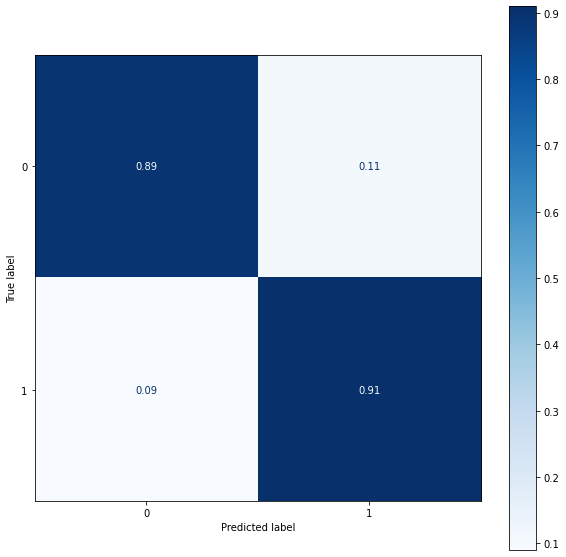

In [48]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(model, X_test, y_test, ax = ax, cmap='Blues', normalize='true', values_format='.2f')

score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f'f1_score = {score:.2f}')

In [49]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip

--2021-05-01 14:41:41--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587879973 (561M) [application/zip]
Saving to: ‘wiki-news-300d-1M-subword.vec.zip’

wiki-news-300d-1M-s 100%[===================>] 560.65M  4.70MB/s    in 2m 2s   

2021-05-01 14:43:44 (4.59 MB/s) - ‘wiki-news-300d-1M-subword.vec.zip’ saved [587879973/587879973]



In [50]:
!unzip wiki-news-300d-1M-subword.vec.zip

Archive:  wiki-news-300d-1M-subword.vec.zip
  inflating: wiki-news-300d-1M-subword.vec  


In [51]:
import gensim.models.wrappers.fasttext
model = gensim.models.KeyedVectors.load_word2vec_format('wiki-news-300d-1M-subword.vec', binary=False, encoding='utf8')

In [52]:
word_vectors = model.wv

<ipython-input-52-aa19759b2b96>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  word_vectors = model.wv


In [53]:
del model

In [54]:
word_vectors.most_similar('hi')

[('hello', 0.6933997869491577),
 ('heyy', 0.6434062719345093),
 ('heyyy', 0.6397197246551514),
 ('hiya', 0.6382022500038147),
 ('heyyyy', 0.6244087219238281),
 ('Hi', 0.622696042060852),
 ('hiiii', 0.6143085956573486),
 ('hey', 0.6041119694709778),
 ('Heyyy', 0.6016119718551636),
 ('hey.', 0.6001185178756714)]

In [59]:
train_reviews_word_embeddings = []

for i in range(len(X_train)):
    review_word_embeddings = []
    for token in tokenize_text(X_train.iloc[i]):
        try:
            review_word_embeddings.append(word_vectors[token])
        except:
            print(f"The token {token} insn't in word vectors")
    train_reviews_word_embeddings.append(torch.tensor(review_word_embeddings, dtype=torch.float32))

The token hartnett insn't in word vectors
The token hartnett insn't in word vectors
The token hartnett insn't in word vectors
The token hartnett insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token marceau insn't in word vectors
The token karloff insn't in word vectors
The token karloff insn't in word vectors
The token karloff insn't in word vectors
The token adrienne insn't in word vectors
The token corri insn't in word vectors
The token sjostrom insn't in word vectors
The token sjostrom insn't in word vectors
The token chiaki insn't in word vectors
The token kuriyama insn't in word vectors
The token ueto insn't in word vectors
The token luise insn't in word vectors
The token rainer insn't in word vectors
The token beetlejuice insn't in word vectors
The token pfeiffer insn't in word vectors
The token batmans insn't in word vectors
The token burtons insn't in word vectors
The token niets

The token austen insn't in word vectors
The token austen insn't in word vectors
The token northanger insn't in word vectors
The token bobbie insn't in word vectors
The token bobbie insn't in word vectors
The token baseketball insn't in word vectors
The token baseketball insn't in word vectors
The token izzard insn't in word vectors
The token corman insn't in word vectors
The token gein insn't in word vectors
The token gein insn't in word vectors
The token hodder insn't in word vectors
The token berryman insn't in word vectors
The token gein insn't in word vectors
The token unhollywoodized insn't in word vectors
The token portreyed insn't in word vectors
The token akwardness insn't in word vectors
The token phenominally insn't in word vectors
The token catwomen insn't in word vectors
The token walken insn't in word vectors
The token catwomen insn't in word vectors
The token devito insn't in word vectors
The token pfeiffer insn't in word vectors
The token warhols insn't in word vectors
T

The token hardiman insn't in word vectors
The token quaid insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token stanwyck insn't in word vectors
The token altamont insn't in word vectors
The token halop insn't in word vectors
The token halop insn't in word vectors
The token klondike insn't in word vectors
The token lordi insn't in word vectors
The token lordi insn't in word vectors
The token gwar insn't in word vectors
The token ghibli insn't in word vectors
The token ghibli insn't in word vectors
The token guttenberg insn't in word vectors
The token nihalani insn't in word vectors
The token smithapatel insn't in word vectors
The token naseeruddin insn't in word vectors
The token sadashiv insn't in word vectors
The token amrapurkar insn't in word vectors
The token nihalani insn't in word vectors
The token drohkaal insn't in word vectors
The token jillian insn't in word vectors
The token wilford insn't in word vectors
The tok

The token beaudin insn't in word vectors
The token noémie insn't in word vectors
The token gardeur insn't in word vectors
The token gervais insn't in word vectors
The token acoona insn't in word vectors
The token gérard insn't in word vectors
The token depardieu insn't in word vectors
The token blondeau insn't in word vectors
The token irène insn't in word vectors
The token colm insn't in word vectors
The token meaney insn't in word vectors
The token isaacs insn't in word vectors
The token gijón insn't in word vectors
The token boothe insn't in word vectors
The token sarandon insn't in word vectors
The token halmi insn't in word vectors
The token earthsea insn't in word vectors
The token halmi insn't in word vectors
The token fjs insn't in word vectors
The token deniro insn't in word vectors
The token deniro insn't in word vectors
The token deniro insn't in word vectors
The token tamerlane insn't in word vectors
The token cusack insn't in word vectors
The token cusack insn't in word ve

The token henstridge insn't in word vectors
The token rushworth insn't in word vectors
The token banton insn't in word vectors
The token lillian insn't in word vectors
The token traffaut insn't in word vectors
The token deneuvue insn't in word vectors
The token cherbourg insn't in word vectors
The token traffaut insn't in word vectors
The token koyaanisqatsi insn't in word vectors
The token powaqqatsi insn't in word vectors
The token koyaanisqatsi insn't in word vectors
The token koyaanisqatsi insn't in word vectors
The token powaqqatsi insn't in word vectors
The token koyaanisqatsi insn't in word vectors
The token koyaanisqatsi insn't in word vectors
The token jetta insn't in word vectors
The token henriette insn't in word vectors
The token edvard insn't in word vectors
The token caddyshack insn't in word vectors
The token dangerfield insn't in word vectors
The token daniele insn't in word vectors
The token mathilde insn't in word vectors
The token seigner insn't in word vectors
The t

The token fulci insn't in word vectors
The token cronkite insn't in word vectors
The token answerve insn't in word vectors
The token cronkite insn't in word vectors
The token brokaw insn't in word vectors
The token gwynne insn't in word vectors
The token cronkite insn't in word vectors
The token grunnick insn't in word vectors
The token bilson insn't in word vectors
The token thirlby insn't in word vectors
The token labeouf insn't in word vectors
The token cloris insn't in word vectors
The token wallach insn't in word vectors
The token pataki insn't in word vectors
The token mstified insn't in word vectors
The token aurelius insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token spiner insn't in word vectors
The token casablance insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token symbiopsychotaxiplasm insn't in word vectors
The token cassavetes insn't in word vectors

The token jackzilla insn't in word vectors
The token awwwwww insn't in word vectors
The token luthorcorp insn't in word vectors
The token lionels insn't in word vectors
The token aquaman insn't in word vectors
The token deknight insn't in word vectors
The token deknight insn't in word vectors
The token agless insn't in word vectors
The token deknight insn't in word vectors
The token quivvles insn't in word vectors
The token expolsion insn't in word vectors
The token aquaman insn't in word vectors
The token faulk insn't in word vectors
The token midts insn't in word vectors
The token obsurdly insn't in word vectors
The token dukakas insn't in word vectors
The token murhpy insn't in word vectors
The token deniro insn't in word vectors
The token shatner insn't in word vectors
The token murhpy insn't in word vectors
The token wesly insn't in word vectors
The token oshima insn't in word vectors
The token oshima insn't in word vectors
The token oshima insn't in word vectors
The token onibaba

The token nordman insn't in word vectors
The token cassavetes insn't in word vectors
The token poitier insn't in word vectors
The token poitier insn't in word vectors
The token cassavetes insn't in word vectors
The token poitier insn't in word vectors
The token cassavetes insn't in word vectors
The token poitier insn't in word vectors
The token cassavetes insn't in word vectors
The token cassavetes insn't in word vectors
The token deglamorized insn't in word vectors
The token cassavetes insn't in word vectors
The token auteuil insn't in word vectors
The token couperes insn't in word vectors
The token auteuil insn't in word vectors
The token hallyday insn't in word vectors
The token leconte insn't in word vectors
The token bonitzer insn't in word vectors
The token grenoble insn't in word vectors
The token krisitn insn't in word vectors
The token bonitzer insn't in word vectors
The token bonitzer insn't in word vectors
The token cassevettes insn't in word vectors
The token cassevettes in

The token coltrane insn't in word vectors
The token coleridge insn't in word vectors
The token redgrave insn't in word vectors
The token coleridge insn't in word vectors
The token deedee insn't in word vectors
The token lemmon insn't in word vectors
The token dexters insn't in word vectors
The token pninson insn't in word vectors
The token devenish insn't in word vectors
The token nickleby insn't in word vectors
The token dedlock insn't in word vectors
The token tulkinhorn insn't in word vectors
The token woodcourt insn't in word vectors
The token jarndyce insn't in word vectors
The token rouncewell insn't in word vectors
The token tulkinhorn insn't in word vectors
The token dedlock insn't in word vectors
The token dedlock insn't in word vectors
The token dedlock insn't in word vectors
The token tulkinhorn insn't in word vectors
The token hortense insn't in word vectors
The token rouncewell insn't in word vectors
The token dedlock insn't in word vectors
The token hortense insn't in wor

The token renoir insn't in word vectors
The token rossellini insn't in word vectors
The token renoir insn't in word vectors
The token renoir insn't in word vectors
The token renoir insn't in word vectors
The token renoir insn't in word vectors
The token doozys insn't in word vectors
The token renoir insn't in word vectors
The token shemp insn't in word vectors
The token floriane insn't in word vectors
The token floriane insn't in word vectors
The token sciamma insn't in word vectors
The token sciamma insn't in word vectors
The token floriane insn't in word vectors
The token floriane insn't in word vectors
The token sciamma insn't in word vectors
The token floriane insn't in word vectors
The token sciamma insn't in word vectors
The token floriane insn't in word vectors
The token blachere insn't in word vectors
The token haenel insn't in word vectors
The token floriane insn't in word vectors
The token acquart insn't in word vectors
The token rosanna insn't in word vectors
The token tenut

The token tsui insn't in word vectors
The token hsiao insn't in word vectors
The token bettie insn't in word vectors
The token gretchen insn't in word vectors
The token filmde insn't in word vectors
The token biko insn't in word vectors
The token attenborough insn't in word vectors
The token fellini insn't in word vectors
The token kinmont insn't in word vectors
The token kinmont insn't in word vectors
The token excorcist insn't in word vectors
The token wickerman insn't in word vectors
The token scuzzlebut insn't in word vectors
The token wickerman insn't in word vectors
The token wickerman insn't in word vectors
The token coppola insn't in word vectors
The token stinkingly insn't in word vectors
The token mulcahy insn't in word vectors
The token christmanish insn't in word vectors
The token cattrall insn't in word vectors
The token aykroyd insn't in word vectors
The token alloimono insn't in word vectors
The token stous insn't in word vectors
The token neous insn't in word vectors
Th

The token hedgepeth insn't in word vectors
The token leggin insn't in word vectors
The token lovejoy insn't in word vectors
The token makepeace insn't in word vectors
The token jaffe insn't in word vectors
The token makepeace insn't in word vectors
The token makepeace insn't in word vectors
The token jaffe insn't in word vectors
The token bugnion insn't in word vectors
The token conelly insn't in word vectors
The token hooror insn't in word vectors
The token babette insn't in word vectors
The token babette insn't in word vectors
The token babette insn't in word vectors
The token darr insn't in word vectors
The token juhi insn't in word vectors
The token juhi insn't in word vectors
The token juhi insn't in word vectors
The token juhi insn't in word vectors
The token darr insn't in word vectors
The token juhi insn't in word vectors
The token darr insn't in word vectors
The token jaadu insn't in word vectors
The token darr insn't in word vectors
The token barsinister insn't in word vector

The token chihuahuawoman insn't in word vectors
The token btas insn't in word vectors
The token btas insn't in word vectors
The token btas insn't in word vectors
The token bjorlin insn't in word vectors
The token antonioni insn't in word vectors
The token rodanthe insn't in word vectors
The token tyree insn't in word vectors
The token seyfriend insn't in word vectors
The token tyree insn't in word vectors
The token reenlists insn't in word vectors
The token tyree insn't in word vectors
The token tyree insn't in word vectors
The token tyree insn't in word vectors
The token tyree insn't in word vectors
The token tyree insn't in word vectors
The token tyree insn't in word vectors
The token duritz insn't in word vectors
The token miramax insn't in word vectors
The token breslin insn't in word vectors
The token osment insn't in word vectors
The token breslin insn't in word vectors
The token tomlin insn't in word vectors
The token guinevere insn't in word vectors
The token dhawan insn't in w

The token rufo insn't in word vectors
The token rufo insn't in word vectors
The token susann insn't in word vectors
The token wexler insn't in word vectors
The token wexler insn't in word vectors
The token shecky insn't in word vectors
The token hemmings insn't in word vectors
The token dionne insn't in word vectors
The token susann insn't in word vectors
The token aiello insn't in word vectors
The token dukakis insn't in word vectors
The token greenaway insn't in word vectors
The token spiret insn't in word vectors
The token fellini insn't in word vectors
The token greenaway insn't in word vectors
The token greenaway insn't in word vectors
The token mississipi insn't in word vectors
The token lleyweln insn't in word vectors
The token pumaman insn't in word vectors
The token gymkata insn't in word vectors
The token mceveety insn't in word vectors
The token strother insn't in word vectors
The token kasdan insn't in word vectors
The token skammen insn't in word vectors
The token bjornstr

The token puffinstuff insn't in word vectors
The token witchie insn't in word vectors
The token lidsville insn't in word vectors
The token sigmund insn't in word vectors
The token lynde insn't in word vectors
The token sigmund insn't in word vectors
The token kroft insn't in word vectors
The token goodtime insn't in word vectors
The token framingham insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vect

The token hearst insn't in word vectors
The token errol insn't in word vectors
The token irby insn't in word vectors
The token irby insn't in word vectors
The token hayne insn't in word vectors
The token bulette insn't in word vectors
The token irby insn't in word vectors
The token guin insn't in word vectors
The token bulette insn't in word vectors
The token proffesionalism insn't in word vectors
The token scheider insn't in word vectors
The token busey insn't in word vectors
The token defficiencies insn't in word vectors
The token seidel insn't in word vectors
The token burmeister insn't in word vectors
The token randys insn't in word vectors
The token scorsese insn't in word vectors
The token murnau insn't in word vectors
The token sirk insn't in word vectors
The token vincente insn't in word vectors
The token minnelli insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token stroheim insn't in word vectors
The token kubrick insn

The token crapo insn't in word vectors
The token nelkin insn't in word vectors
The token macchio insn't in word vectors
The token leibman insn't in word vectors
The token poston insn't in word vectors
The token leibman insn't in word vectors
The token columbo insn't in word vectors
The token reinhold insn't in word vectors
The token giacomo insn't in word vectors
The token paymer insn't in word vectors
The token stubing insn't in word vectors
The token algy insn't in word vectors
The token uninspiringly insn't in word vectors
The token bava insn't in word vectors
The token caiano insn't in word vectors
The token corman insn't in word vectors
The token moreau insn't in word vectors
The token gielgud insn't in word vectors
The token hrr insn't in word vectors
The token porizkova insn't in word vectors
The token eckhart insn't in word vectors
The token selleck insn't in word vectors
The token reubens insn't in word vectors
The token katerina insn't in word vectors
The token veronika insn'

The token whitfield insn't in word vectors
The token tromadude insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token brosnan insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token kinnear insn't in word vectors
The token redgrave insn't in word vectors
The token musgrove insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token lousia insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token lousia insn't in word vectors
The token harville insn't in word vectors
The token wentworth insn't in word vectors
The token wentworth insn't in word vectors
The token austen insn't in word 

The token heyerdahl insn't in word vectors
The token heyerdahl insn't in word vectors
The token sadfully insn't in word vectors
The token bradly insn't in word vectors
The token brommel insn't in word vectors
The token ullman insn't in word vectors
The token dorfman insn't in word vectors
The token brommel insn't in word vectors
The token ullman insn't in word vectors
The token ullman insn't in word vectors
The token dorfman insn't in word vectors
The token kusturika insn't in word vectors
The token kusturica insn't in word vectors
The token gamera insn't in word vectors
The token donlevy insn't in word vectors
The token dekker insn't in word vectors
The token gamera insn't in word vectors
The token kurosawa insn't in word vectors
The token gamera insn't in word vectors
The token biltmore insn't in word vectors
The token asheville insn't in word vectors
The token belushi insn't in word vectors
The token belushi insn't in word vectors
The token ntsc insn't in word vectors
The token avak

The token beastmaster insn't in word vectors
The token beastmaster insn't in word vectors
The token arklon insn't in word vectors
The token interdimentional insn't in word vectors
The token arklon insn't in word vectors
The token arklon insn't in word vectors
The token arklon insn't in word vectors
The token beastmaster insn't in word vectors
The token swampthing insn't in word vectors
The token coscarelli insn't in word vectors
The token brideless insn't in word vectors
The token mcintire insn't in word vectors
The token gibb insn't in word vectors
The token tenney insn't in word vectors
The token dunwich insn't in word vectors
The token dunwich insn't in word vectors
The token krueger insn't in word vectors
The token englund insn't in word vectors
The token rosanne insn't in word vectors
The token breckin insn't in word vectors
The token yaphet insn't in word vectors
The token kotto insn't in word vectors
The token donahue insn't in word vectors
The token voorhees insn't in word vect

The token reischl insn't in word vectors
The token tobey insn't in word vectors
The token alvy insn't in word vectors
The token nickys insn't in word vectors
The token mceveety insn't in word vectors
The token strother insn't in word vectors
The token alvy insn't in word vectors
The token angelika insn't in word vectors
The token harharhar insn't in word vectors
The token krycek insn't in word vectors
The token montpelier insn't in word vectors
The token rko insn't in word vectors
The token beal insn't in word vectors
The token beal insn't in word vectors
The token huston insn't in word vectors
The token rko insn't in word vectors
The token beal insn't in word vectors
The token huston insn't in word vectors
The token boreanaz insn't in word vectors
The token boreanaz insn't in word vectors
The token valenteen insn't in word vectors
The token boreanaz insn't in word vectors
The token shawshank insn't in word vectors
The token megaladon insn't in word vectors
The token kieslowski insn't 

The token wayans insn't in word vectors
The token wayans insn't in word vectors
The token wayans insn't in word vectors
The token wayans insn't in word vectors
The token wayans insn't in word vectors
The token brend insn't in word vectors
The token chasity insn't in word vectors
The token travolta insn't in word vectors
The token gilley insn't in word vectors
The token gilligan insn't in word vectors
The token redgrave insn't in word vectors
The token giancarlo insn't in word vectors
The token esposito insn't in word vectors
The token sugercoated insn't in word vectors
The token erendira insn't in word vectors
The token santoshi insn't in word vectors
The token coniff insn't in word vectors
The token sissyboy insn't in word vectors
The token scrat insn't in word vectors
The token sheedy insn't in word vectors
The token sheedy insn't in word vectors
The token lumage insn't in word vectors
The token synonamess insn't in word vectors
The token rescueman insn't in word vectors
The token fr

The token mildred insn't in word vectors
The token mildred insn't in word vectors
The token mildred insn't in word vectors
The token maugham insn't in word vectors
The token mildred insn't in word vectors
The token mildred insn't in word vectors
The token norah insn't in word vectors
The token mildred insn't in word vectors
The token mildred insn't in word vectors
The token monstervision insn't in word vectors
The token monstervision insn't in word vectors
The token monstervision insn't in word vectors
The token sheffer insn't in word vectors
The token skerritt insn't in word vectors
The token englund insn't in word vectors
The token bohringer insn't in word vectors
The token purvis insn't in word vectors
The token goremeister insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token vittorio insn't in word vectors
The token spinetti insn't in word vectors
The token eisenstein insn't in word vectors
The token tavernier insn't in word

The token sovie insn't in word vectors
The token louden insn't in word vectors
The token pufnstuf insn't in word vectors
The token witcheepoo insn't in word vectors
The token mccheese insn't in word vectors
The token witchypoo insn't in word vectors
The token pufnstuf insn't in word vectors
The token pufnstuf insn't in word vectors
The token vinson insn't in word vectors
The token rosina insn't in word vectors
The token rosina insn't in word vectors
The token langorous insn't in word vectors
The token notld insn't in word vectors
The token fulci insn't in word vectors
The token mathis insn't in word vectors
The token mathis insn't in word vectors
The token burstyn insn't in word vectors
The token jodelle insn't in word vectors
The token ferland insn't in word vectors
The token vipul insn't in word vectors
The token aankhen insn't in word vectors
The token shefali insn't in word vectors
The token chhaya insn't in word vectors
The token krabat insn't in word vectors
The token krabat insn

The token wyler insn't in word vectors
The token agnieszka insn't in word vectors
The token finney insn't in word vectors
The token delts insn't in word vectors
The token nearne insn't in word vectors
The token urbaniak insn't in word vectors
The token scorsese insn't in word vectors
The token gasmask insn't in word vectors
The token edgeware insn't in word vectors
The token kirtanas insn't in word vectors
The token bgmusic insn't in word vectors
The token shekar insn't in word vectors
The token kamalini insn't in word vectors
The token sunitha insn't in word vectors
The token kammula insn't in word vectors
The token rohmer insn't in word vectors
The token mirren insn't in word vectors
The token tomilson insn't in word vectors
The token fuckland insn't in word vectors
The token fuckland insn't in word vectors
The token fuckland insn't in word vectors
The token fuckland insn't in word vectors
The token fonz insn't in word vectors
The token wrinkler insn't in word vectors
The token potsi

The token orson insn't in word vectors
The token welles insn't in word vectors
The token sarne insn't in word vectors
The token sarne insn't in word vectors
The token cimino insn't in word vectors
The token cimino insn't in word vectors
The token sarne insn't in word vectors
The token breckinridge insn't in word vectors
The token yancy insn't in word vectors
The token laputa insn't in word vectors
The token hayao insn't in word vectors
The token miyazaki insn't in word vectors
The token laputa insn't in word vectors
The token pazu insn't in word vectors
The token sheeta insn't in word vectors
The token paquin insn't in word vectors
The token muska insn't in word vectors
The token hamill insn't in word vectors
The token cloris insn't in word vectors
The token leachman insn't in word vectors
The token laputa insn't in word vectors
The token miyazaki insn't in word vectors
The token laputa insn't in word vectors
The token laputa insn't in word vectors
The token laputa insn't in word vecto

The token chipettes insn't in word vectors
The token elmore insn't in word vectors
The token majestyk insn't in word vectors
The token elmore insn't in word vectors
The token travolta insn't in word vectors
The token deaky insn't in word vectors
The token elmore insn't in word vectors
The token malick insn't in word vectors
The token carax insn't in word vectors
The token chappan insn't in word vectors
The token pataker insn't in word vectors
The token ktma insn't in word vectors
The token vincente insn't in word vectors
The token minnelli insn't in word vectors
The token katharine insn't in word vectors
The token minnelli insn't in word vectors
The token katharine insn't in word vectors
The token garroway insn't in word vectors
The token garroway insn't in word vectors
The token garroway insn't in word vectors
The token garroway insn't in word vectors
The token middleburg insn't in word vectors
The token middleburg insn't in word vectors
The token minnelli insn't in word vectors
The t

The token selleck insn't in word vectors
The token newhart insn't in word vectors
The token cusack insn't in word vectors
The token conchatta insn't in word vectors
The token quaid insn't in word vectors
The token culkin insn't in word vectors
The token cannavale insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token culkin insn't in word vectors
The token remar insn't in word vectors
The token frankl insn't in word vectors
The token broeck insn't in word vectors
The token rififi insn't in word vectors
The token dassin insn't in word vectors
The token riker insn't in word vectors
The token klingons insn't in word vectors
The token intuitor insn't in word vectors
The token kold insn't in word vectors
The token videostore insn't in word vectors
The token gustafson insn't in word vectors
The token gösta insn't in word vectors
The token ekman insn't in word vectors
The token ekman insn't in word vectors
The token charlize insn't

The token olshansky insn't in word vectors
The token rockford insn't in word vectors
The token strelzyk insn't in word vectors
The token wetzel insn't in word vectors
The token strelzyk insn't in word vectors
The token loewitsch insn't in word vectors
The token strelzyks insn't in word vectors
The token guenter insn't in word vectors
The token gigli insn't in word vectors
The token pather insn't in word vectors
The token panchali insn't in word vectors
The token grainger insn't in word vectors
The token rychard insn't in word vectors
The token finlayson insn't in word vectors
The token finlayson insn't in word vectors
The token hately insn't in word vectors
The token flowes insn't in word vectors
The token zhivago insn't in word vectors
The token tierney insn't in word vectors
The token malden insn't in word vectors
The token posidon insn't in word vectors
The token torgoff insn't in word vectors
The token ktma insn't in word vectors
The token rhett insn't in word vectors
The token rip

The token blethyn insn't in word vectors
The token delbert insn't in word vectors
The token gtf insn't in word vectors
The token minghella insn't in word vectors
The token minghella insn't in word vectors
The token minghella insn't in word vectors
The token minghella insn't in word vectors
The token minghella insn't in word vectors
The token mckidd insn't in word vectors
The token redgrave insn't in word vectors
The token dasilva insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token wyler insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token koster insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token binnie insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token judson insn't in word vectors
The token winninger insn't in word vectors
The token deanna in

The token mitchum insn't in word vectors
The token myrna insn't in word vectors
The token foxworth insn't in word vectors
The token myrna insn't in word vectors
The token duhamel insn't in word vectors
The token marcil insn't in word vectors
The token lesure insn't in word vectors
The token poppins insn't in word vectors
The token poppins insn't in word vectors
The token flavia insn't in word vectors
The token flavia insn't in word vectors
The token flavia insn't in word vectors
The token flavia insn't in word vectors
The token gianfranco insn't in word vectors
The token mingozzi insn't in word vectors
The token flavia insn't in word vectors
The token gorehounds insn't in word vectors
The token flavia insn't in word vectors
The token flavia insn't in word vectors
The token piovani insn't in word vectors
The token florinda insn't in word vectors
The token bolkin insn't in word vectors
The token maría insn't in word vectors
The token casares insn't in word vectors
The token trelkovsky in

The token wilbert insn't in word vectors
The token mitchum insn't in word vectors
The token braindeads insn't in word vectors
The token creasy insn't in word vectors
The token creasy insn't in word vectors
The token creasy insn't in word vectors
The token cowley insn't in word vectors
The token lillian insn't in word vectors
The token strasberg insn't in word vectors
The token mciver insn't in word vectors
The token widmark insn't in word vectors
The token mciver insn't in word vectors
The token lillian insn't in word vectors
The token minelli insn't in word vectors
The token bacall insn't in word vectors
The token strasberg insn't in word vectors
The token vincenzo insn't in word vectors
The token santorini insn't in word vectors
The token strongbear insn't in word vectors
The token schreck insn't in word vectors
The token walken insn't in word vectors
The token cobblepot insn't in word vectors
The token devito insn't in word vectors
The token selina insn't in word vectors
The token p

The token dupre insn't in word vectors
The token kazaam insn't in word vectors
The token ruscico insn't in word vectors
The token zellweger insn't in word vectors
The token gwizdo insn't in word vectors
The token gwizdo insn't in word vectors
The token gwizdo insn't in word vectors
The token gwizdo insn't in word vectors
The token spicolli insn't in word vectors
The token lacksidaisical insn't in word vectors
The token mahler insn't in word vectors
The token mahler insn't in word vectors
The token solyaris insn't in word vectors
The token solyaris insn't in word vectors
The token contextlessness insn't in word vectors
The token visconti insn't in word vectors
The token scenarists insn't in word vectors
The token mcgoldrick insn't in word vectors
The token pacino insn't in word vectors
The token pacino insn't in word vectors
The token brakhage insn't in word vectors
The token brakhage insn't in word vectors
The token polarisdib insn't in word vectors
The token blainsworth insn't in word

The token spunge insn't in word vectors
The token quintin insn't in word vectors
The token terrantino insn't in word vectors
The token baigelmann insn't in word vectors
The token keanu insn't in word vectors
The token jjaks insn't in word vectors
The token jjaks insn't in word vectors
The token baigelman insn't in word vectors
The token keanu insn't in word vectors
The token baigelman insn't in word vectors
The token deniro insn't in word vectors
The token lumbly insn't in word vectors
The token rapoport insn't in word vectors
The token mcshane insn't in word vectors
The token dolemite insn't in word vectors
The token rhymin insn't in word vectors
The token snootiest insn't in word vectors
The token mundanacity insn't in word vectors
The token carradine insn't in word vectors
The token babette insn't in word vectors
The token birgitte insn't in word vectors
The token federspiel insn't in word vectors
The token bodil insn't in word vectors
The token kjer insn't in word vectors
The token

The token toshiharu insn't in word vectors
The token ikeda insn't in word vectors
The token gleeson insn't in word vectors
The token voight insn't in word vectors
The token boorman insn't in word vectors
The token deasy insn't in word vectors
The token schindler insn't in word vectors
The token schindler insn't in word vectors
The token schindler insn't in word vectors
The token gleeson insn't in word vectors
The token voight insn't in word vectors
The token gleeson insn't in word vectors
The token gleeson insn't in word vectors
The token louden insn't in word vectors
The token louden insn't in word vectors
The token louden insn't in word vectors
The token dunneare insn't in word vectors
The token hightower insn't in word vectors
The token beckettian insn't in word vectors
The token winstone insn't in word vectors
The token winstone insn't in word vectors
The token ribisi insn't in word vectors
The token epps insn't in word vectors
The token ilsa insn't in word vectors
The token blacks

The token ringwald insn't in word vectors
The token shakespere insn't in word vectors
The token rosenheim insn't in word vectors
The token palance insn't in word vectors
The token tsui insn't in word vectors
The token sammo insn't in word vectors
The token ekin insn't in word vectors
The token tsui insn't in word vectors
The token farnsworth insn't in word vectors
The token wincibly insn't in word vectors
The token drugsas insn't in word vectors
The token sarandon insn't in word vectors
The token rosanna insn't in word vectors
The token arquette insn't in word vectors
The token cronenberg insn't in word vectors
The token tribeca insn't in word vectors
The token macdowell insn't in word vectors
The token seadly insn't in word vectors
The token stanze insn't in word vectors
The token ipoyg insn't in word vectors
The token haack insn't in word vectors
The token ipoyg insn't in word vectors
The token haack insn't in word vectors
The token haack insn't in word vectors
The token stanze insn'

The token laserlight insn't in word vectors
The token preminger insn't in word vectors
The token seberg insn't in word vectors
The token niven insn't in word vectors
The token mylène insn't in word vectors
The token demongeot insn't in word vectors
The token nivens insn't in word vectors
The token seberg insn't in word vectors
The token niven insn't in word vectors
The token demongeot insn't in word vectors
The token niven insn't in word vectors
The token seberg insn't in word vectors
The token preminger insn't in word vectors
The token seberg insn't in word vectors
The token périnal insn't in word vectors
The token preminger insn't in word vectors
The token laurents insn't in word vectors
The token demongeot insn't in word vectors
The token seberg insn't in word vectors
The token niven insn't in word vectors
The token seberg insn't in word vectors
The token preminger insn't in word vectors
The token seberg insn't in word vectors
The token martita insn't in word vectors
The token julie

The token speedman insn't in word vectors
The token speedman insn't in word vectors
The token speedman insn't in word vectors
The token ilona insn't in word vectors
The token sekacz insn't in word vectors
The token moreland insn't in word vectors
The token tilney insn't in word vectors
The token tilneys insn't in word vectors
The token northanger insn't in word vectors
The token tilney insn't in word vectors
The token catherines insn't in word vectors
The token ilona insn't in word vectors
The token mathis insn't in word vectors
The token lupino insn't in word vectors
The token dinelli insn't in word vectors
The token lupino insn't in word vectors
The token diskant insn't in word vectors
The token savini insn't in word vectors
The token cannom insn't in word vectors
The token fulci insn't in word vectors
The token savini insn't in word vectors
The token aauugghh insn't in word vectors
The token jaglon insn't in word vectors
The token foyt insn't in word vectors
The token jaglon insn't 

The token miyazaki insn't in word vectors
The token miyazaki insn't in word vectors
The token nausicaa insn't in word vectors
The token chabrol insn't in word vectors
The token chabrol insn't in word vectors
The token chabrol insn't in word vectors
The token vinaigre insn't in word vectors
The token dutronc insn't in word vectors
The token huppert insn't in word vectors
The token stephane insn't in word vectors
The token audran insn't in word vectors
The token chabrol insn't in word vectors
The token etienne insn't in word vectors
The token chatilliez insn't in word vectors
The token chabrol insn't in word vectors
The token chabrol insn't in word vectors
The token chabrol insn't in word vectors
The token audran insn't in word vectors
The token chabrol insn't in word vectors
The token jory insn't in word vectors
The token vivienne insn't in word vectors
The token suprtb insn't in word vectors
The token kauffman insn't in word vectors
The token geena insn't in word vectors
The token geen

The token rouveroy insn't in word vectors
The token rouveroy insn't in word vectors
The token niven insn't in word vectors
The token niven insn't in word vectors
The token mraovich insn't in word vectors
The token mraovich insn't in word vectors
The token hollywoods insn't in word vectors
The token mraovich insn't in word vectors
The token mraovich insn't in word vectors
The token transgressively insn't in word vectors
The token cinematicism insn't in word vectors
The token miryang insn't in word vectors
The token seon insn't in word vectors
The token miryang insn't in word vectors
The token graboids insn't in word vectors
The token hiram insn't in word vectors
The token gummer insn't in word vectors
The token graboids insn't in word vectors
The token pedilla insn't in word vectors
The token brigitte insn't in word vectors
The token lahaie insn't in word vectors
The token brigitte insn't in word vectors
The token lahaie insn't in word vectors
The token britcom insn't in word vectors
Th

The token corman insn't in word vectors
The token turturro insn't in word vectors
The token ondatje insn't in word vectors
The token brosnan insn't in word vectors
The token brosnan insn't in word vectors
The token bondless insn't in word vectors
The token kinnear insn't in word vectors
The token scriptedness insn't in word vectors
The token lightfootedness insn't in word vectors
The token stalely insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token brosnan insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token gunbuster insn't in word vectors
The token gainax insn't in word vectors
The token nerae insn't in word vectors
The token gunbuster insn't in word vectors
The token noriko insn't in word vectors
The token takaya insn't in word vectors
The token noriko insn't in word vectors
The 

The token orgazmo insn't in word vectors
The token boxleitner insn't in word vectors
The token mirren insn't in word vectors
The token liev insn't in word vectors
The token schreiber insn't in word vectors
The token safran insn't in word vectors
The token hutz insn't in word vectors
The token leskin insn't in word vectors
The token kleptomaniacal insn't in word vectors
The token hutz insn't in word vectors
The token mikki insn't in word vectors
The token schreiber insn't in word vectors
The token locationing insn't in word vectors
The token mcgovern insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token rothrock insn't in word vectors
The token harvet insn't in word vectors
The token clouse insn't in word vectors
The token rothrock insn't in word vectors
The token rothrock insn't in word vectors
The token mendelsohn insn't in word vectors
The token mar

The token akronas insn't in word vectors
The token damoto insn't in word vectors
The token lugosi insn't in word vectors
The token mcguffin insn't in word vectors
The token zzzzip insn't in word vectors
The token turrin insn't in word vectors
The token crawfords insn't in word vectors
The token kopins insn't in word vectors
The token waynes insn't in word vectors
The token reshovsky insn't in word vectors
The token carhart insn't in word vectors
The token walshs insn't in word vectors
The token yoakam insn't in word vectors
The token conchata insn't in word vectors
The token austen insn't in word vectors
The token eurobe insn't in word vectors
The token weinsten insn't in word vectors
The token kier insn't in word vectors
The token nichev insn't in word vectors
The token murnau insn't in word vectors
The token murnau insn't in word vectors
The token mazursky insn't in word vectors
The token mazursky insn't in word vectors
The token cassavettes insn't in word vectors
The token cassavett

The token cusack insn't in word vectors
The token cusack insn't in word vectors
The token marisa insn't in word vectors
The token tomei insn't in word vectors
The token cusack insn't in word vectors
The token tomei insn't in word vectors
The token cusack insn't in word vectors
The token damme insn't in word vectors
The token niami insn't in word vectors
The token niami insn't in word vectors
The token ornella insn't in word vectors
The token stormare insn't in word vectors
The token bernhard insn't in word vectors
The token pheobe insn't in word vectors
The token lilllie insn't in word vectors
The token lilllie insn't in word vectors
The token lilllie insn't in word vectors
The token lilllie insn't in word vectors
The token lilllie insn't in word vectors
The token vigalondo insn't in word vectors
The token hollywoods insn't in word vectors
The token hayworth insn't in word vectors
The token fangoria insn't in word vectors
The token gorezone insn't in word vectors
The token noonan insn'

The token voight insn't in word vectors
The token ronny insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token vitavetavegamin insn't in word vectors
The token arnaz insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token lucille insn't in word vectors
The token arnaz insn't in word vectors
The token pollak insn't in word vectors
The token babette insn't in word vectors
The token impersonalized insn't in word vectors
The token brassed insn't in word vectors
The token daréus insn't in word vectors
The token ingmar insn't in word vectors
The token pollak insn't in word vectors
The token dansu insn't in word vectors
The token sugiyama insn't in word vectors
The token sugiyama insn't in word vectors
The token aoki insn't in word vectors
The token kilme

The token redford insn't in word vectors
The token redford insn't in word vectors
The token dunaway insn't in word vectors
The token megadramatisation insn't in word vectors
The token wurtzel insn't in word vectors
The token ferrands insn't in word vectors
The token pleasence insn't in word vectors
The token overton insn't in word vectors
The token overton insn't in word vectors
The token wiever insn't in word vectors
The token overton insn't in word vectors
The token lavelle insn't in word vectors
The token stanwyck insn't in word vectors
The token stanwyck insn't in word vectors
The token psychiotric insn't in word vectors
The token léos insn't in word vectors
The token carax insn't in word vectors
The token guillaume insn't in word vectors
The token deneuve insn't in word vectors
The token etepetete insn't in word vectors
The token snobistic insn't in word vectors
The token rushs insn't in word vectors
The token existencialistic insn't in word vectors
The token sartres insn't in wor

The token pando insn't in word vectors
The token pando insn't in word vectors
The token pando insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token ungar insn't in word vectors
The token lemmon insn't in word vectors
The token mathau insn't in word vectors
The token lahr insn't in word vectors
The token lucille insn't in word vectors
The token pacino insn't in word vectors
The token abrahams insn't in word vectors
The token steenky insn't in word vectors
The token hackman insn't in word vectors
The token scheider insn't in word vectors
The token frankenheimer insn't in word vectors
The token raindeer insn't in word vectors
The token moreau insn't in word vectors
The token charnier insn't in word vectors
The token marseilles insn't in word vectors
The token charnier insn't in word vectors
The token charnier insn't in word vectors
The token hackman insn't in word vectors
The token kazuo insn't in word vectors
The token komizu in

The token fessenden insn't in word vectors
The token godell insn't in word vectors
The token lemmon insn't in word vectors
The token lemmon insn't in word vectors
The token pheri insn't in word vectors
The token bci insn't in word vectors
The token vanload insn't in word vectors
The token talalay insn't in word vectors
The token roseanne insn't in word vectors
The token velde insn't in word vectors
The token kimball insn't in word vectors
The token alvy insn't in word vectors
The token tobey insn't in word vectors
The token strother insn't in word vectors
The token fishburne insn't in word vectors
The token brannagh insn't in word vectors
The token cassio insn't in word vectors
The token roderigo insn't in word vectors
The token bueller insn't in word vectors
The token retardism insn't in word vectors
The token giraurd insn't in word vectors
The token pankin insn't in word vectors
The token schlater insn't in word vectors
The token carradine insn't in word vectors
The token dobkin insn

The token mallepa insn't in word vectors
The token gackt insn't in word vectors
The token steinmann insn't in word vectors
The token steinmann insn't in word vectors
The token lassick insn't in word vectors
The token cheswick insn't in word vectors
The token kilmer insn't in word vectors
The token riffraffs insn't in word vectors
The token bosworth insn't in word vectors
The token kudrow insn't in word vectors
The token bogosian insn't in word vectors
The token tinsletown insn't in word vectors
The token launius insn't in word vectors
The token coxsucker insn't in word vectors
The token penislized insn't in word vectors
The token holmies insn't in word vectors
The token mccarey insn't in word vectors
The token spazzy insn't in word vectors
The token loonatics insn't in word vectors
The token acmetropolis insn't in word vectors
The token frelling insn't in word vectors
The token henchpeople insn't in word vectors
The token drekish insn't in word vectors
The token alik insn't in word vec

The token suzman insn't in word vectors
The token butley insn't in word vectors
The token butley insn't in word vectors
The token bry insn't in word vectors
The token georgy insn't in word vectors
The token zorba insn't in word vectors
The token finney insn't in word vectors
The token medak insn't in word vectors
The token krays insn't in word vectors
The token delon insn't in word vectors
The token bourvil insn't in word vectors
The token montand insn't in word vectors
The token bourvil insn't in word vectors
The token delon insn't in word vectors
The token montand insn't in word vectors
The token delon insn't in word vectors
The token bourvil insn't in word vectors
The token montand insn't in word vectors
The token delon insn't in word vectors
The token bourvil insn't in word vectors
The token melvillian insn't in word vectors
The token livington insn't in word vectors
The token thuy insn't in word vectors
The token anitra insn't in word vectors
The token mcmahonagement insn't in wor

The token palance insn't in word vectors
The token lethin insn't in word vectors
The token dudikoff insn't in word vectors
The token taratula insn't in word vectors
The token remini insn't in word vectors
The token gyllenhaal insn't in word vectors
The token phillipe insn't in word vectors
The token azaria insn't in word vectors
The token yaaaaaaaaaaaaaawwwwwwwwwwwwwwwwwnnnnnnnnnnnnn insn't in word vectors
The token zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz insn't in word vectors
The token mooment insn't in word vectors
The token zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz insn't in word vectors
The token yawnfest insn't in word vectors
The token moocow insn't in word vectors
The token zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz insn't in word vectors
The token blondell insn't in word vectors
The token blondell insn't in word vectors
The token blondell insn't in word vectors
The token blondell insn't in word vectors
The token blondell insn't in word vectors
The token blondell insn't in word vecto

The token dunaway insn't in word vectors
The token puckoon insn't in word vectors
The token foggerty insn't in word vectors
The token nickolas insn't in word vectors
The token puckoon insn't in word vectors
The token igby insn't in word vectors
The token noonan insn't in word vectors
The token charolotte insn't in word vectors
The token spheeris insn't in word vectors
The token spheeris insn't in word vectors
The token spheeris insn't in word vectors
The token amaerican insn't in word vectors
The token sammi insn't in word vectors
The token hartnett insn't in word vectors
The token hartnett insn't in word vectors
The token bohringer insn't in word vectors
The token bellucci insn't in word vectors
The token cassel insn't in word vectors
The token ecoffey insn't in word vectors
The token lucien insn't in word vectors
The token hatty insn't in word vectors
The token hatty insn't in word vectors
The token antonioni insn't in word vectors
The token wenders insn't in word vectors
The token t

The token westbridge insn't in word vectors
The token greendale insn't in word vectors
The token monkees insn't in word vectors
The token bedingfield insn't in word vectors
The token poehler insn't in word vectors
The token dratch insn't in word vectors
The token dratch insn't in word vectors
The token shiraki insn't in word vectors
The token shiraki insn't in word vectors
The token dratch insn't in word vectors
The token poehler insn't in word vectors
The token poehler insn't in word vectors
The token poehler insn't in word vectors
The token arnett insn't in word vectors
The token poehler insn't in word vectors
The token hartmann insn't in word vectors
The token tamblyn insn't in word vectors
The token poehler insn't in word vectors
The token dratch insn't in word vectors
The token poehler insn't in word vectors
The token shiraki insn't in word vectors
The token dratch insn't in word vectors
The token dratch insn't in word vectors
The token stiffler insn't in word vectors
The token na

The token freebird insn't in word vectors
The token freebird insn't in word vectors
The token ralli insn't in word vectors
The token pepoire insn't in word vectors
The token elinor insn't in word vectors
The token glynn insn't in word vectors
The token gribbon insn't in word vectors
The token spoler insn't in word vectors
The token adkins insn't in word vectors
The token waugh insn't in word vectors
The token splendini insn't in word vectors
The token splendini insn't in word vectors
The token sondra insn't in word vectors
The token pransky insn't in word vectors
The token strombel insn't in word vectors
The token mcshane insn't in word vectors
The token sondra insn't in word vectors
The token sondra insn't in word vectors
The token sondra insn't in word vectors
The token strombel insn't in word vectors
The token sondra insn't in word vectors
The token sondra insn't in word vectors
The token sondra insn't in word vectors
The token sondra insn't in word vectors
The token armand insn't i

The token dudleys insn't in word vectors
The token nidia insn't in word vectors
The token nidia insn't in word vectors
The token nidia insn't in word vectors
The token hurracanrana insn't in word vectors
The token swanton insn't in word vectors
The token suplexing insn't in word vectors
The token lionsault insn't in word vectors
The token lionsault insn't in word vectors
The token heyman insn't in word vectors
The token heyman insn't in word vectors
The token heyman insn't in word vectors
The token heyman insn't in word vectors
The token bishoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The token bischoff insn't in word vectors
The t

The token astin insn't in word vectors
The token astin insn't in word vectors
The token mcnaughton insn't in word vectors
The token hickok insn't in word vectors
The token loeb insn't in word vectors
The token hickok insn't in word vectors
The token goldsworthy insn't in word vectors
The token goldsworthy insn't in word vectors
The token gandolfini insn't in word vectors
The token domineers insn't in word vectors
The token melfi insn't in word vectors
The token bracco insn't in word vectors
The token gandolfini insn't in word vectors
The token carmela insn't in word vectors
The token carmela insn't in word vectors
The token carmela insn't in word vectors
The token imperioli insn't in word vectors
The token drea insn't in word vectors
The token sirico insn't in word vectors
The token bogdanovich insn't in word vectors
The token favreau insn't in word vectors
The token bacall insn't in word vectors
The token arnett insn't in word vectors
The token strathairn insn't in word vectors
The to

The token rayanne insn't in word vectors
The token galvez insn't in word vectors
The token bejarno insn't in word vectors
The token dukakis insn't in word vectors
The token schwarzeneger insn't in word vectors
The token gilliam insn't in word vectors
The token gilliam insn't in word vectors
The token whalley insn't in word vectors
The token rhett insn't in word vectors
The token jbd insn't in word vectors
The token doubtfire insn't in word vectors
The token macchindranath insn't in word vectors
The token kambli insn't in word vectors
The token mavshi insn't in word vectors
The token moruchi insn't in word vectors
The token mavshi insn't in word vectors
The token chachi insn't in word vectors
The token amrish insn't in word vectors
The token paresh insn't in word vectors
The token karva insn't in word vectors
The token chachi insn't in word vectors
The token amrish insn't in word vectors
The token paresh insn't in word vectors
The token doubtfire insn't in word vectors
The token chachi 

The token shiban insn't in word vectors
The token shiban insn't in word vectors
The token jaimie insn't in word vectors
The token zosch insn't in word vectors
The token preminger insn't in word vectors
The token remar insn't in word vectors
The token luhrman insn't in word vectors
The token worthington insn't in word vectors
The token glamis insn't in word vectors
The token worthington insn't in word vectors
The token worthington insn't in word vectors
The token worthington insn't in word vectors
The token frentically insn't in word vectors
The token shaksperian insn't in word vectors
The token shakespearian insn't in word vectors
The token worthington insn't in word vectors
The token worthington insn't in word vectors
The token kubrick insn't in word vectors
The token geeeeeetttttttt insn't in word vectors
The token itttttttt insn't in word vectors
The token burlinson insn't in word vectors
The token pluckish insn't in word vectors
The token sigrid insn't in word vectors
The token den

The token rouen insn't in word vectors
The token clausen insn't in word vectors
The token clausen insn't in word vectors
The token mamers insn't in word vectors
The token loire insn't in word vectors
The token clausen insn't in word vectors
The token sonja insn't in word vectors
The token clausen insn't in word vectors
The token moliere insn't in word vectors
The token moliere insn't in word vectors
The token jorgen insn't in word vectors
The token clausen insn't in word vectors
The token walentin insn't in word vectors
The token walentin insn't in word vectors
The token moliere insn't in word vectors
The token deleon insn't in word vectors
The token eccleston insn't in word vectors
The token timelords insn't in word vectors
The token kwijybo insn't in word vectors
The token mahe insn't in word vectors
The token belmondo insn't in word vectors
The token roussell insn't in word vectors
The token deneuve insn't in word vectors
The token deneuve insn't in word vectors
The token antibes in

The token beresford insn't in word vectors
The token dunstan insn't in word vectors
The token jacki insn't in word vectors
The token dunstan insn't in word vectors
The token medon insn't in word vectors
The token drivels insn't in word vectors
The token darwyn insn't in word vectors
The token oded insn't in word vectors
The token fehr insn't in word vectors
The token farik insn't in word vectors
The token farik insn't in word vectors
The token nesic insn't in word vectors
The token farik insn't in word vectors
The token eehaaa insn't in word vectors
The token collinson insn't in word vectors
The token halestorm insn't in word vectors
The token wayans insn't in word vectors
The token carrey insn't in word vectors
The token darryl insn't in word vectors
The token chazz insn't in word vectors
The token palminteri insn't in word vectors
The token chazz insn't in word vectors
The token wayans insn't in word vectors
The token wayans insn't in word vectors
The token frwl insn't in word vector

The token dorkins insn't in word vectors
The token dorkins insn't in word vectors
The token dorkins insn't in word vectors
The token btk insn't in word vectors
The token forlani insn't in word vectors
The token himesh insn't in word vectors
The token reshamiya insn't in word vectors
The token saroor insn't in word vectors
The token rajnikant insn't in word vectors
The token sivaji insn't in word vectors
The token himesh insn't in word vectors
The token reshamiya insn't in word vectors
The token riya insn't in word vectors
The token hansika insn't in word vectors
The token motwani insn't in word vectors
The token mallika insn't in word vectors
The token sherawat insn't in word vectors
The token himesh insn't in word vectors
The token himesh insn't in word vectors
The token himesh insn't in word vectors
The token himesh insn't in word vectors
The token himesh insn't in word vectors
The token mallika insn't in word vectors
The token sherawat insn't in word vectors
The token mallika insn't

The token hedy insn't in word vectors
The token lamarr insn't in word vectors
The token hedy insn't in word vectors
The token kiesler insn't in word vectors
The token hedy insn't in word vectors
The token lamarr insn't in word vectors
The token lamarr insn't in word vectors
The token machaty insn't in word vectors
The token lamarr insn't in word vectors
The token hedy insn't in word vectors
The token lamarr insn't in word vectors
The token machaty insn't in word vectors
The token machaty insn't in word vectors
The token lamarr insn't in word vectors
The token machaty insn't in word vectors
The token hedy insn't in word vectors
The token hedy insn't in word vectors
The token lamarr insn't in word vectors
The token candler insn't in word vectors
The token garson insn't in word vectors
The token milland insn't in word vectors
The token mccrea insn't in word vectors
The token mccrea insn't in word vectors
The token mccrea insn't in word vectors
The token mccrea insn't in word vectors
The t

The token gurland insn't in word vectors
The token darkheart insn't in word vectors
The token nightkill insn't in word vectors
The token mitchum insn't in word vectors
The token jaclyn insn't in word vectors
The token jaclyn insn't in word vectors
The token jaclyn insn't in word vectors
The token flashdance insn't in word vectors
The token flashdance insn't in word vectors
The token flashdance insn't in word vectors
The token flashdance insn't in word vectors
The token beals insn't in word vectors
The token masterson insn't in word vectors
The token dawsons insn't in word vectors
The token gandolphini insn't in word vectors
The token chazz insn't in word vectors
The token palminteri insn't in word vectors
The token mazursky insn't in word vectors
The token clichee insn't in word vectors
The token pornoshops insn't in word vectors
The token sexshop insn't in word vectors
The token datting insn't in word vectors
The token nothan insn't in word vectors
The token gershwin insn't in word ve

The token duvall insn't in word vectors
The token coppolla insn't in word vectors
The token audie insn't in word vectors
The token audie insn't in word vectors
The token quantrell insn't in word vectors
The token audie insn't in word vectors
The token hammiest insn't in word vectors
The token glimcher insn't in word vectors
The token greyscaled insn't in word vectors
The token delon insn't in word vectors
The token montand insn't in word vectors
The token andré insn't in word vectors
The token bourvil insn't in word vectors
The token huston insn't in word vectors
The token dassin insn't in word vectors
The token rififi insn't in word vectors
The token delon insn't in word vectors
The token montand insn't in word vectors
The token samourai insn't in word vectors
The token delon insn't in word vectors
The token samourai insn't in word vectors
The token korman insn't in word vectors
The token booooooooooooooooo insn't in word vectors
The token galaxina insn't in word vectors
The token bun

The token freshner insn't in word vectors
The token niellson insn't in word vectors
The token elmyra insn't in word vectors
The token foulmouth insn't in word vectors
The token foulmouth insn't in word vectors
The token shirl insn't in word vectors
The token whoosing insn't in word vectors
The token booh insn't in word vectors
The token contagonists insn't in word vectors
The token caspar insn't in word vectors
The token booooy insn't in word vectors
The token xxxxviii insn't in word vectors
The token emmanuelle insn't in word vectors
The token vaugier insn't in word vectors
The token jürgen insn't in word vectors
The token prochnow insn't in word vectors
The token fingaz insn't in word vectors
The token grauer insn't in word vectors
The token savini insn't in word vectors
The token pyun insn't in word vectors
The token mctiernan insn't in word vectors
The token lucinda insn't in word vectors
The token kusugi insn't in word vectors
The token kosugi insn't in word vectors
The token mari

The token highsmith insn't in word vectors
The token troma insn't in word vectors
The token bitings insn't in word vectors
The token herky insn't in word vectors
The token aspca insn't in word vectors
The token tieh insn't in word vectors
The token tieh insn't in word vectors
The token tieh insn't in word vectors
The token tieh insn't in word vectors
The token kwok insn't in word vectors
The token tieh insn't in word vectors
The token cheh insn't in word vectors
The token finsished insn't in word vectors
The token loneley insn't in word vectors
The token schweiger insn't in word vectors
The token kier insn't in word vectors
The token ralf insn't in word vectors
The token schweiger insn't in word vectors
The token tils insn't in word vectors
The token krieger insn't in word vectors
The token kier insn't in word vectors
The token mehehe insn't in word vectors
The token pacino insn't in word vectors
The token pacino insn't in word vectors
The token fiennes insn't in word vectors
The token

The token renne insn't in word vectors
The token estevez insn't in word vectors
The token thunderball insn't in word vectors
The token mcclory insn't in word vectors
The token whittingham insn't in word vectors
The token thunderball insn't in word vectors
The token saltzman insn't in word vectors
The token nsna insn't in word vectors
The token irvin insn't in word vectors
The token kershner insn't in word vectors
The token thunderball insn't in word vectors
The token bladerunner insn't in word vectors
The token brandeau insn't in word vectors
The token legrand insn't in word vectors
The token flemings insn't in word vectors
The token mcclory insn't in word vectors
The token mathurin insn't in word vectors
The token fdny insn't in word vectors
The token fdny insn't in word vectors
The token knightley insn't in word vectors
The token rourke insn't in word vectors
The token paquin insn't in word vectors
The token enquist insn't in word vectors
The token martínez insn't in word vectors
The

The token miklos insn't in word vectors
The token rosza insn't in word vectors
The token veidt insn't in word vectors
The token horison insn't in word vectors
The token paxton insn't in word vectors
The token bristish insn't in word vectors
The token disneyfied insn't in word vectors
The token carnivale insn't in word vectors
The token paxton insn't in word vectors
The token vardon insn't in word vectors
The token paxton insn't in word vectors
The token goerring insn't in word vectors
The token tojo insn't in word vectors
The token lantz insn't in word vectors
The token fleischer insn't in word vectors
The token oyl insn't in word vectors
The token bluto insn't in word vectors
The token bluto insn't in word vectors
The token fleischer insn't in word vectors
The token stupidgencia insn't in word vectors
The token schnitz insn't in word vectors
The token zazu insn't in word vectors
The token zazu insn't in word vectors
The token oyl insn't in word vectors
The token zazu insn't in word ve

The token zucco insn't in word vectors
The token lenora insn't in word vectors
The token nagel insn't in word vectors
The token lenora insn't in word vectors
The token zucco insn't in word vectors
The token zucco insn't in word vectors
The token zucco insn't in word vectors
The token zucco insn't in word vectors
The token midler insn't in word vectors
The token rosalind insn't in word vectors
The token paulette insn't in word vectors
The token godard insn't in word vectors
The token josé insn't in word vectors
The token belmondo insn't in word vectors
The token marceau insn't in word vectors
The token pitzalis insn't in word vectors
The token maruschka insn't in word vectors
The token detmers insn't in word vectors
The token detmers insn't in word vectors
The token pitzalis insn't in word vectors
The token detmers insn't in word vectors
The token jpii insn't in word vectors
The token jpii insn't in word vectors
The token jpii insn't in word vectors
The token jpii insn't in word vectors

The token galitzien insn't in word vectors
The token crispin insn't in word vectors
The token keanu insn't in word vectors
The token metzler insn't in word vectors
The token jürgen insn't in word vectors
The token knieper insn't in word vectors
The token cusack insn't in word vectors
The token goldwaith insn't in word vectors
The token watsamatta insn't in word vectors
The token odie insn't in word vectors
The token galaxina insn't in word vectors
The token schreiber insn't in word vectors
The token straightman insn't in word vectors
The token stratten insn't in word vectors
The token galaxina insn't in word vectors
The token madkaugh insn't in word vectors
The token emmanuelle insn't in word vectors
The token seigner insn't in word vectors
The token toreton insn't in word vectors
The token tavernier insn't in word vectors
The token bruckner insn't in word vectors
The token chabrol insn't in word vectors
The token clouzot insn't in word vectors
The token diaboliques insn't in word vect

The token urbaniak insn't in word vectors
The token fogg insn't in word vectors
The token frightmare insn't in word vectors
The token ratzoff insn't in word vectors
The token ratzoff insn't in word vectors
The token frightmare insn't in word vectors
The token frightmare insn't in word vectors
The token frightmare insn't in word vectors
The token eastwestdvd insn't in word vectors
The token troma insn't in word vectors
The token troma insn't in word vectors
The token frightmare insn't in word vectors
The token elisha insn't in word vectors
The token franchot insn't in word vectors
The token woolrich insn't in word vectors
The token woolrich insn't in word vectors
The token dumbrille insn't in word vectors
The token elisha insn't in word vectors
The token gilliam insn't in word vectors
The token denzell insn't in word vectors
The token denzell insn't in word vectors
The token ratso insn't in word vectors
The token rizzo insn't in word vectors
The token tavernier insn't in word vectors
Th

The token isak insn't in word vectors
The token dinesen insn't in word vectors
The token babette insn't in word vectors
The token dinesen insn't in word vectors
The token craggiest insn't in word vectors
The token bodil insn't in word vectors
The token kjer insn't in word vectors
The token philippa insn't in word vectors
The token dinesen insn't in word vectors
The token philippa insn't in word vectors
The token philippa insn't in word vectors
The token lafont insn't in word vectors
The token babette insn't in word vectors
The token hersant insn't in word vectors
The token babette insn't in word vectors
The token faberge insn't in word vectors
The token octopussy insn't in word vectors
The token octopussy insn't in word vectors
The token lucklily insn't in word vectors
The token magdelena insn't in word vectors
The token aberystwyth insn't in word vectors
The token anywa insn't in word vectors
The token seagal insn't in word vectors
The token hodes insn't in word vectors
The token kori

The token spoorloos insn't in word vectors
The token kiefer insn't in word vectors
The token katyn insn't in word vectors
The token andrzej insn't in word vectors
The token chyra insn't in word vectors
The token jerzy insn't in word vectors
The token ucsb insn't in word vectors
The token astaire insn't in word vectors
The token astaire insn't in word vectors
The token sandrich insn't in word vectors
The token sandrich insn't in word vectors
The token astaire insn't in word vectors
The token hilliard insn't in word vectors
The token bilgey insn't in word vectors
The token astaire insn't in word vectors
The token sandrich insn't in word vectors
The token astaire insn't in word vectors
The token hilliard insn't in word vectors
The token bakvaas insn't in word vectors
The token baghban insn't in word vectors
The token amitji insn't in word vectors
The token lovitz insn't in word vectors
The token delpy insn't in word vectors
The token wuhrer insn't in word vectors
The token estevez insn't 

The token raymar insn't in word vectors
The token raymar insn't in word vectors
The token kristel insn't in word vectors
The token kristel insn't in word vectors
The token haack insn't in word vectors
The token haack insn't in word vectors
The token haack insn't in word vectors
The token haack insn't in word vectors
The token hackula insn't in word vectors
The token haack insn't in word vectors
The token haack insn't in word vectors
The token haack insn't in word vectors
The token marienbad insn't in word vectors
The token marienbad insn't in word vectors
The token carax insn't in word vectors
The token saget insn't in word vectors
The token coulier insn't in word vectors
The token kitaen insn't in word vectors
The token coulier insn't in word vectors
The token coulier insn't in word vectors
The token alannis insn't in word vectors
The token morisette insn't in word vectors
The token aerobicide insn't in word vectors
The token silicons insn't in word vectors
The token bustiest insn't i

The token pfeiffer insn't in word vectors
The token walken insn't in word vectors
The token walken insn't in word vectors
The token devito insn't in word vectors
The token pfeiffer insn't in word vectors
The token pfieffer insn't in word vectors
The token vittorio insn't in word vectors
The token gassman insn't in word vectors
The token gassman insn't in word vectors
The token boorman insn't in word vectors
The token walley insn't in word vectors
The token walley insn't in word vectors
The token gidget insn't in word vectors
The token jatte insn't in word vectors
The token sonheim insn't in word vectors
The token jatte insn't in word vectors
The token sonheim insn't in word vectors
The token pufnstuf insn't in word vectors
The token raye insn't in word vectors
The token barty insn't in word vectors
The token pufnstuf insn't in word vectors
The token sorin insn't in word vectors
The token rickman insn't in word vectors
The token reedus insn't in word vectors
The token atwood insn't in w

The token gossett insn't in word vectors
The token atahualpa insn't in word vectors
The token yupanqui insn't in word vectors
The token dubliners insn't in word vectors
The token blooey insn't in word vectors
The token harlen insn't in word vectors
The token lewtons insn't in word vectors
The token rosetto insn't in word vectors
The token shoei insn't in word vectors
The token imamura insn't in word vectors
The token idrissa insn't in word vectors
The token ouedraogo insn't in word vectors
The token chahine insn't in word vectors
The token arguebly insn't in word vectors
The token pacino insn't in word vectors
The token elvira insn't in word vectors
The token pfeiffer insn't in word vectors
The token yulin insn't in word vectors
The token mastrantonio insn't in word vectors
The token ecxellent insn't in word vectors
The token depalma insn't in word vectors
The token pacino insn't in word vectors
The token poitier insn't in word vectors
The token cassavetes insn't in word vectors
The to

The token rigsby insn't in word vectors
The token rossiter insn't in word vectors
The token beckinsale insn't in word vectors
The token rossiter insn't in word vectors
The token untastful insn't in word vectors
The token cude insn't in word vectors
The token jordon insn't in word vectors
The token kwb insn't in word vectors
The token hasselhoff insn't in word vectors
The token dolph insn't in word vectors
The token lundgreen insn't in word vectors
The token zarabeth insn't in word vectors
The token mariette insn't in word vectors
The token zarabeth insn't in word vectors
The token nimoy insn't in word vectors
The token shatner insn't in word vectors
The token atoz insn't in word vectors
The token uzumaki insn't in word vectors
The token uzumaki insn't in word vectors
The token uzumaki insn't in word vectors
The token uzumaki insn't in word vectors
The token ringu insn't in word vectors
The token dillinger insn't in word vectors
The token tobruk insn't in word vectors
The token tobruk i

The token carrell insn't in word vectors
The token carrell insn't in word vectors
The token carrell insn't in word vectors
The token apatow insn't in word vectors
The token hartnett insn't in word vectors
The token mancoy insn't in word vectors
The token rogen insn't in word vectors
The token explitive insn't in word vectors
The token carrell insn't in word vectors
The token carrell insn't in word vectors
The token carrell insn't in word vectors
The token farrelly insn't in word vectors
The token neame insn't in word vectors
The token neame insn't in word vectors
The token sheree insn't in word vectors
The token pacino insn't in word vectors
The token zwrite insn't in word vectors
The token mcteer insn't in word vectors
The token mcteer insn't in word vectors
The token mcadams insn't in word vectors
The token mcadams insn't in word vectors
The token cillian insn't in word vectors
The token cillian insn't in word vectors
The token suchet insn't in word vectors
The token lysette insn't i

The token matheson insn't in word vectors
The token langella insn't in word vectors
The token higuchinsky insn't in word vectors
The token duvall insn't in word vectors
The token duvall insn't in word vectors
The token melnick insn't in word vectors
The token lieving insn't in word vectors
The token schaeffer insn't in word vectors
The token michale insn't in word vectors
The token katzir insn't in word vectors
The token mitchum insn't in word vectors
The token mitchum insn't in word vectors
The token bardem insn't in word vectors
The token medieros insn't in word vectors
The token especically insn't in word vectors
The token hawn insn't in word vectors
The token housesitter insn't in word vectors
The token invetigator insn't in word vectors
The token jonni insn't in word vectors
The token jonni insn't in word vectors
The token farscape insn't in word vectors
The token farscpae insn't in word vectors
The token farscape insn't in word vectors
The token moriarty insn't in word vectors
Th

The token railsback insn't in word vectors
The token goldwyn insn't in word vectors
The token eileen insn't in word vectors
The token dorff insn't in word vectors
The token spellman insn't in word vectors
The token crach insn't in word vectors
The token anoes insn't in word vectors
The token toturro insn't in word vectors
The token torturro insn't in word vectors
The token maplins insn't in word vectors
The token fairbrother insn't in word vectors
The token cadell insn't in word vectors
The token fairbrother insn't in word vectors
The token dempster insn't in word vectors
The token cadell insn't in word vectors
The token cadell insn't in word vectors
The token madoc insn't in word vectors
The token yellowcoat insn't in word vectors
The token fairbrother insn't in word vectors
The token dempster insn't in word vectors
The token ollerenshaw insn't in word vectors
The token yellowcoat insn't in word vectors
The token quilly insn't in word vectors
The token bowness insn't in word vectors
T

The token catharine insn't in word vectors
The token sautet insn't in word vectors
The token corneau insn't in word vectors
The token corneau insn't in word vectors
The token ferrot insn't in word vectors
The token montand insn't in word vectors
The token léopardi insn't in word vectors
The token stefania insn't in word vectors
The token sandrelli insn't in word vectors
The token ganay insn't in word vectors
The token périer insn't in word vectors
The token ferrot insn't in word vectors
The token corneau insn't in word vectors
The token corneau insn't in word vectors
The token corneau insn't in word vectors
The token ménard insn't in word vectors
The token mathieu insn't in word vectors
The token ferrot insn't in word vectors
The token ferrot insn't in word vectors
The token ferrot insn't in word vectors
The token orléans insn't in word vectors
The token corneau insn't in word vectors
The token rutger insn't in word vectors
The token hauer insn't in word vectors
The token dushku insn't

The token skepticle insn't in word vectors
The token gorehounds insn't in word vectors
The token grindhouses insn't in word vectors
The token wildernes insn't in word vectors
The token vespasian insn't in word vectors
The token hura insn't in word vectors
The token jaynestown insn't in word vectors
The token jayne insn't in word vectors
The token frakes insn't in word vectors
The token higres insn't in word vectors
The token dubliners insn't in word vectors
The token romulan insn't in word vectors
The token lenard insn't in word vectors
The token shatner insn't in word vectors
The token nimoy insn't in word vectors
The token seagal insn't in word vectors
The token amarcord insn't in word vectors
The token gundams insn't in word vectors
The token maximilian insn't in word vectors
The token kohler insn't in word vectors
The token preferiti insn't in word vectors
The token hassassin insn't in word vectors
The token kureishi insn't in word vectors
The token coates insn't in word vectors
Th

The token mertz insn't in word vectors
The token jarman insn't in word vectors
The token goldwin insn't in word vectors
The token jascha insn't in word vectors
The token heifetz insn't in word vectors
The token goldwyn insn't in word vectors
The token heifetz insn't in word vectors
The token vidor insn't in word vectors
The token goldwyn insn't in word vectors
The token heifetz insn't in word vectors
The token heifetz insn't in word vectors
The token heifetz insn't in word vectors
The token heifetz insn't in word vectors
The token mccrea insn't in word vectors
The token marjorie insn't in word vectors
The token hohl insn't in word vectors
The token tetley insn't in word vectors
The token kilburn insn't in word vectors
The token goldwyn insn't in word vectors
The token meremblum insn't in word vectors
The token berres insn't in word vectors
The token lurie insn't in word vectors
The token rapaport insn't in word vectors
The token facey insn't in word vectors
The token julliard insn't in

The token margera insn't in word vectors
The token curiculums insn't in word vectors
The token dostoevsky insn't in word vectors
The token soundeffects insn't in word vectors
The token scryeeee insn't in word vectors
The token scryeeee insn't in word vectors
The token scrye insn't in word vectors
The token schoedsack insn't in word vectors
The token bakhtiari insn't in word vectors
The token hargh insn't in word vectors
The token coatesville insn't in word vectors
The token lorraina insn't in word vectors
The token bobbitt insn't in word vectors
The token meryl insn't in word vectors
The token jobeth insn't in word vectors
The token boaz insn't in word vectors
The token yosi insn't in word vectors
The token monsey insn't in word vectors
The token chosson insn't in word vectors
The token gymkata insn't in word vectors
The token gymkata insn't in word vectors
The token sypnopsis insn't in word vectors
The token gymkata insn't in word vectors
The token gymkata insn't in word vectors
The t

The token gomer insn't in word vectors
The token froud insn't in word vectors
The token takashi insn't in word vectors
The token furdion insn't in word vectors
The token canfuls insn't in word vectors
The token chekhov insn't in word vectors
The token kesey insn't in word vectors
The token babbs insn't in word vectors
The token oregonian insn't in word vectors
The token garsh insn't in word vectors
The token trousdale insn't in word vectors
The token atlantean insn't in word vectors
The token ohad insn't in word vectors
The token knoller insn't in word vectors
The token sweid insn't in word vectors
The token yelli insn't in word vectors
The token sweid insn't in word vectors
The token golani insn't in word vectors
The token zohar insn't in word vectors
The token liba insn't in word vectors
The token virtzer insn't in word vectors
The token catharthic insn't in word vectors
The token ligabue insn't in word vectors
The token carachters insn't in word vectors
The token showzen insn't in w

The token attenborough insn't in word vectors
The token andie insn't in word vectors
The token macdowell insn't in word vectors
The token martineau insn't in word vectors
The token orfevres insn't in word vectors
The token martineau insn't in word vectors
The token clouzot insn't in word vectors
The token martineau insn't in word vectors
The token martineau insn't in word vectors
The token caruso insn't in word vectors
The token movergoers insn't in word vectors
The token loew insn't in word vectors
The token caruso insn't in word vectors
The token enrico insn't in word vectors
The token caruso insn't in word vectors
The token enrico insn't in word vectors
The token caruso insn't in word vectors
The token purdom insn't in word vectors
The token caruso insn't in word vectors
The token lucille insn't in word vectors
The token rosalind insn't in word vectors
The token lansbury insn't in word vectors
The token lucille insn't in word vectors
The token saks insn't in word vectors
The token s

The token nevsy insn't in word vectors
The token eisenstein insn't in word vectors
The token dmitri insn't in word vectors
The token vasilyev insn't in word vectors
The token eisenstein insn't in word vectors
The token potemkin insn't in word vectors
The token eisenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token nevsky insn't in word vectors
The token privka insn't in word vectors
The token nevsky insn't in word vectors
The token nevsky insn't in word vectors
The token nikolai insn't in word vectors
The token cherkasov insn't in word vectors
The token eistenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token prokofiev insn't in word vectors
The token nevsky insn't in word vectors
The token burce insn't in word vectors
The token antoinette insn't in word vectors
The token tatoya insn't in word vectors
The token gorski insn't in word ve

The token elvira insn't in word vectors
The token elviras insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token flashdance insn't in word vectors
The token downsyndrom insn't in word vectors
The token angelopoulos insn't in word vectors
The token angelopoulos insn't in word vectors
The token mastroianni insn't in word vectors
The token keital insn't in word vectors
The token smithee insn't in word vectors
The token shider insn't in word vectors
The token amelie insn't in word vectors
The token piemakers insn't in word vectors
The token midler insn't in word vectors
The token raunchily insn't in word vectors
The token pando insn't in word vectors
The token pando insn't in word vectors
The token gregor insn't in word vectors
The token pando insn't in word vectors
The token henriksen insn't in word vectors
The token abominável insn't in word vectors
The token salk insn't in word vectors
The 

The token carell insn't in word vectors
The token angell insn't in word vectors
The token clouseau insn't in word vectors
The token stainton insn't in word vectors
The token damme insn't in word vectors
The token unintenional insn't in word vectors
The token hayak insn't in word vectors
The token moriarty insn't in word vectors
The token masterson insn't in word vectors
The token masterson insn't in word vectors
The token laramie insn't in word vectors
The token allyson insn't in word vectors
The token dreyfuss insn't in word vectors
The token lydie insn't in word vectors
The token armand insn't in word vectors
The token assante insn't in word vectors
The token terittories insn't in word vectors
The token armand insn't in word vectors
The token assante insn't in word vectors
The token zhuzh insn't in word vectors
The token tramell insn't in word vectors
The token wonderously insn't in word vectors
The token mochary insn't in word vectors
The token afroreggae insn't in word vectors
The 

The token isten insn't in word vectors
The token kubrick insn't in word vectors
The token existenz insn't in word vectors
The token pikul insn't in word vectors
The token cronenberg insn't in word vectors
The token videodrome insn't in word vectors
The token videodrome insn't in word vectors
The token existenz insn't in word vectors
The token suschitzky insn't in word vectors
The token transcendenz insn't in word vectors
The token existenz insn't in word vectors
The token jjl insn't in word vectors
The token existenz insn't in word vectors
The token existenz insn't in word vectors
The token pikul insn't in word vectors
The token transcendenz insn't in word vectors
The token yevgeny insn't in word vectors
The token transcendenz insn't in word vectors
The token existenz insn't in word vectors
The token transcendenz insn't in word vectors
The token heidegger insn't in word vectors
The token nietschze insn't in word vectors
The token willem insn't in word vectors
The token dafoe insn't in 

The token bugsy insn't in word vectors
The token bugsy insn't in word vectors
The token bugsy insn't in word vectors
The token mantegna insn't in word vectors
The token mantegna insn't in word vectors
The token mantegna insn't in word vectors
The token redford insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token edelman insn't in word vectors
The token sheiner insn't in word vectors
The token klugman insn't in word vectors
The token precode insn't in word vectors
The token stanwyck insn't in word vectors
The token stanwyck insn't in word vectors
The token stanwyck insn't in word vectors
The token stanwyck insn't in word vectors
The token precode insn't in word vectors
The token precode insn't in word vectors
The token desegregates insn't in word vectors
The token deniro insn't in word vectors
The token bayonne insn't in word vectors
The token charleze insn't in word vectors
The token lonette insn't in word vectors
The token m

The token wenders insn't in word vectors
The token goofey insn't in word vectors
The token jovovich insn't in word vectors
The token gibsons insn't in word vectors
The token frankenstien insn't in word vectors
The token travolta insn't in word vectors
The token pergado insn't in word vectors
The token pergado insn't in word vectors
The token perilli insn't in word vectors
The token bennah insn't in word vectors
The token attenborough insn't in word vectors
The token hamlisch insn't in word vectors
The token hamlisch insn't in word vectors
The token attenborough insn't in word vectors
The token attenborough insn't in word vectors
The token broadways insn't in word vectors
The token quaid insn't in word vectors
The token redford insn't in word vectors
The token costner insn't in word vectors
The token berenger insn't in word vectors
The token gehrig insn't in word vectors
The token robald insn't in word vectors
The token dailey insn't in word vectors
The token quaid insn't in word vector

The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token culkin insn't in word vectors
The token railly insn't in word vectors
The token goines insn't in word vectors
The token gilliam insn't in word vectors
The token caddyshack insn't in word vectors
The token caddyshack insn't in word vectors
The token quaid insn't in word vectors
The token melida insn't in word vectors
The token shlitz insn't in word vectors
The token tenney insn't in word vectors
The token laputa insn't in word vectors
The token sheeta insn't in word vectors
The token pazu insn't in word vectors
The token miyazaki insn't in word vectors
The token miyazaki insn't in word vectors
The token nausicaa insn't in word vectors
The token miyazaki insn't in word vectors
The token aardman insn't in word vectors
The token aardman insn't in word vectors
The token mayeda insn't in word vectors
The token muscats in

The token jarjar insn't in word vectors
The token vomitum insn't in word vectors
The token detestably insn't in word vectors
The token steiger insn't in word vectors
The token delaurentiis insn't in word vectors
The token raffill insn't in word vectors
The token statham insn't in word vectors
The token statham insn't in word vectors
The token statham insn't in word vectors
The token statham insn't in word vectors
The token lemmon insn't in word vectors
The token lanchester insn't in word vectors
The token hermoine insn't in word vectors
The token gingold insn't in word vectors
The token kovacs insn't in word vectors
The token lemmon insn't in word vectors
The token lanchester insn't in word vectors
The token pyewacket insn't in word vectors
The token lemmon insn't in word vectors
The token kovacs insn't in word vectors
The token lanchester insn't in word vectors
The token gingold insn't in word vectors
The token lanchester insn't in word vectors
The token gingold insn't in word vectors

The token damme insn't in word vectors
The token yuji insn't in word vectors
The token okumoto insn't in word vectors
The token hynckel insn't in word vectors
The token tomania insn't in word vectors
The token hynckel insn't in word vectors
The token oakie insn't in word vectors
The token benzino insn't in word vectors
The token napaloni insn't in word vectors
The token oakie insn't in word vectors
The token hynckel insn't in word vectors
The token napaloni insn't in word vectors
The token osterlich insn't in word vectors
The token yechh insn't in word vectors
The token mamet insn't in word vectors
The token winsor insn't in word vectors
The token mccay insn't in word vectors
The token ladislaw insn't in word vectors
The token starewicz insn't in word vectors
The token starewicz insn't in word vectors
The token frogland insn't in word vectors
The token camerama insn't in word vectors
The token hickson insn't in word vectors
The token tyzack insn't in word vectors
The token hickson insn

The token mccrae insn't in word vectors
The token duvall insn't in word vectors
The token rangering insn't in word vectors
The token mccrae insn't in word vectors
The token mccrea insn't in word vectors
The token inez insn't in word vectors
The token mccrae insn't in word vectors
The token mccrae insn't in word vectors
The token capshaw insn't in word vectors
The token fishburne insn't in word vectors
The token mindf insn't in word vectors
The token tetes insn't in word vectors
The token fishburne insn't in word vectors
The token graib insn't in word vectors
The token curtiz insn't in word vectors
The token lynchian insn't in word vectors
The token epatha insn't in word vectors
The token merkerson insn't in word vectors
The token fagin insn't in word vectors
The token lubbock insn't in word vectors
The token welles insn't in word vectors
The token scorcese insn't in word vectors
The token busey insn't in word vectors
The token busey insn't in word vectors
The token busey insn't in word

The token zandalee insn't in word vectors
The token timon insn't in word vectors
The token pumbaa insn't in word vectors
The token northfork insn't in word vectors
The token northfork insn't in word vectors
The token evacuaters insn't in word vectors
The token darryl insn't in word vectors
The token errol insn't in word vectors
The token cagney insn't in word vectors
The token cagney insn't in word vectors
The token woolsey insn't in word vectors
The token winfield insn't in word vectors
The token grable insn't in word vectors
The token woolsey insn't in word vectors
The token grable insn't in word vectors
The token mchugh insn't in word vectors
The token woolsey insn't in word vectors
The token grable insn't in word vectors
The token woolsey insn't in word vectors
The token lazenby insn't in word vectors
The token sammo insn't in word vectors
The token balanchine insn't in word vectors
The token tchaikovsky insn't in word vectors
The token drosselmeier insn't in word vectors
The token

The token poirot insn't in word vectors
The token suchet insn't in word vectors
The token hercule insn't in word vectors
The token poirot insn't in word vectors
The token poirot insn't in word vectors
The token leidner insn't in word vectors
The token leatheran insn't in word vectors
The token chabon insn't in word vectors
The token bechstein insn't in word vectors
The token suvari insn't in word vectors
The token nolte insn't in word vectors
The token secrety insn't in word vectors
The token singaporeans insn't in word vectors
The token diarhhoea insn't in word vectors
The token malkovich insn't in word vectors
The token dutcher insn't in word vectors
The token dutcher insn't in word vectors
The token dutcher insn't in word vectors
The token dutcher insn't in word vectors
The token dutcher insn't in word vectors
The token dutcher insn't in word vectors
The token haaga insn't in word vectors
The token tammi insn't in word vectors
The token corman insn't in word vectors
The token manhun

The token amityville insn't in word vectors
The token amityville insn't in word vectors
The token amityville insn't in word vectors
The token bronner insn't in word vectors
The token montelli insn't in word vectors
The token amityville insn't in word vectors
The token amityville insn't in word vectors
The token murlowski insn't in word vectors
The token nickson insn't in word vectors
The token murlowski insn't in word vectors
The token madhavan insn't in word vectors
The token ratnam insn't in word vectors
The token keerthana insn't in word vectors
The token nandita insn't in word vectors
The token chakravathy insn't in word vectors
The token madhavan insn't in word vectors
The token ratnam insn't in word vectors
The token kowalkski insn't in word vectors
The token viggo insn't in word vectors
The token mortenson insn't in word vectors
The token vansishing insn't in word vectors
The token kowalkski insn't in word vectors
The token thelma insn't in word vectors
The token louese insn't i

The token rolleball insn't in word vectors
The token czeckoslavakia insn't in word vectors
The token czeckoslavakia insn't in word vectors
The token czeckoslavakia insn't in word vectors
The token cadavra insn't in word vectors
The token bobbie insn't in word vectors
The token gigglesome insn't in word vectors
The token buchholz insn't in word vectors
The token antedote insn't in word vectors
The token hendrick insn't in word vectors
The token haese insn't in word vectors
The token haggardly insn't in word vectors
The token treacher insn't in word vectors
The token schildkraut insn't in word vectors
The token winninger insn't in word vectors
The token adelle insn't in word vectors
The token adelle insn't in word vectors
The token kruegers insn't in word vectors
The token voorhees insn't in word vectors
The token michéal insn't in word vectors
The token macliammóir insn't in word vectors
The token moorehead insn't in word vectors
The token kuzco insn't in word vectors
The token yzma ins

The token suspiria insn't in word vectors
The token suspiria insn't in word vectors
The token soavi insn't in word vectors
The token soavi insn't in word vectors
The token errol insn't in word vectors
The token errol insn't in word vectors
The token errol insn't in word vectors
The token gethsemane insn't in word vectors
The token melvyn insn't in word vectors
The token melvyn insn't in word vectors
The token atwill insn't in word vectors
The token barrymore insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token greenville insn't in word vectors
The token asheville insn't in word vectors
The token gleason insn't in word vectors
The token skeets insn't in word vectors
The token gleason insn't in word vectors
The token swabby insn't in word vectors
The token guttierez insn't in word vectors
The token guttierez insn't in word vectors
The token sylvester

The token playmania insn't in word vectors
The token shandi insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token strangelove insn't in word vectors
The token kubrick insn't in word vectors
The token kalifornia insn't in word vectors
The token kalifornia insn't in word vectors
The token metaldude insn't in word vectors
The token corpsified insn't in word vectors
The token aristide insn't in word vectors
The token massacessi insn't in word vectors
The token ewa insn't in word vectors
The token aulin insn't in word vectors
The token ravensbrück insn't in word vectors
The token sturges insn't in word vectors
The token kinski insn't in word vectors
The token ravensbrück insn't in word vectors
The token massacessi insn't in word vectors
The token nekkidness insn't in word vectors
The token socos insn't in word vectors
The token sitges insn't in word vectors
The token fessenden insn't in wor

The token bueller insn't in word vectors
The token shawshank insn't in word vectors
The token heyworth insn't in word vectors
The token shawshank insn't in word vectors
The token winona insn't in word vectors
The token sarandon insn't in word vectors
The token juliette insn't in word vectors
The token romuald insn't in word vectors
The token juliette insn't in word vectors
The token kieslowski insn't in word vectors
The token kieslowski insn't in word vectors
The token vomitive insn't in word vectors
The token meryl insn't in word vectors
The token winona insn't in word vectors
The token bille insn't in word vectors
The token smilla insn't in word vectors
The token mclaglen insn't in word vectors
The token deforce insn't in word vectors
The token fagan insn't in word vectors
The token troma insn't in word vectors
The token troma insn't in word vectors
The token dicaprio insn't in word vectors
The token capulet insn't in word vectors
The token meatmen insn't in word vectors
The token tr

The token bowlo insn't in word vectors
The token coombes insn't in word vectors
The token gershwin insn't in word vectors
The token gershwin insn't in word vectors
The token gershwin insn't in word vectors
The token gershwin insn't in word vectors
The token gershwin insn't in word vectors
The token gershwin insn't in word vectors
The token gershwin insn't in word vectors
The token charisse insn't in word vectors
The token vincente insn't in word vectors
The token minnelli insn't in word vectors
The token guétary insn't in word vectors
The token foch insn't in word vectors
The token minnelli insn't in word vectors
The token vincente insn't in word vectors
The token minnelli insn't in word vectors
The token guetary insn't in word vectors
The token gershwin insn't in word vectors
The token minnelli insn't in word vectors
The token vincente insn't in word vectors
The token minnelli insn't in word vectors
The token sharaff insn't in word vectors
The token dufy insn't in word vectors
The tok

The token epatha insn't in word vectors
The token merrkensen insn't in word vectors
The token stupidhead insn't in word vectors
The token jakon insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token baltimoreans insn't in word vectors
The token nisep insn't in word vectors
The token plimpton insn't in word vectors
The token kroners insn't in word vectors
The token ichikawa insn't in word vectors
The token tamura insn't in word vectors
The token ichikawa insn't in word vectors
The token ichikawa insn't in word vectors
The token splatterish insn't in word vectors
The token doren insn't in word vectors
The token bixby insn't in word vectors
The token doren insn't in word vectors
The token bixby insn't in word vectors
The token seniorit

The token dysfunctinal insn't in word vectors
The token harilal insn't in word vectors
The token mohandas insn't in word vectors
The token karamchand insn't in word vectors
The token akshaye insn't in word vectors
The token jariwala insn't in word vectors
The token shefali insn't in word vectors
The token kasturba insn't in word vectors
The token raghupati insn't in word vectors
The token raghava insn't in word vectors
The token hiassen insn't in word vectors
The token hiassen insn't in word vectors
The token cheech insn't in word vectors
The token delinda insn't in word vectors
The token delinda insn't in word vectors
The token hansel insn't in word vectors
The token gretel insn't in word vectors
The token stormriders insn't in word vectors
The token liev insn't in word vectors
The token schriber insn't in word vectors
The token columbo insn't in word vectors
The token danner insn't in word vectors
The token cassavetes insn't in word vectors
The token columbo insn't in word vectors
Th

The token knute insn't in word vectors
The token rockne insn't in word vectors
The token rockne insn't in word vectors
The token gipp insn't in word vectors
The token knute insn't in word vectors
The token rockne insn't in word vectors
The token basserman insn't in word vectors
The token basserman insn't in word vectors
The token rockne insn't in word vectors
The token rwtd insn't in word vectors
The token enthusast insn't in word vectors
The token quantrill insn't in word vectors
The token gratitous insn't in word vectors
The token mundruczo insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token huppert insn't in word vectors
The token guttenburg insn't in word vectors
The token mcgovern insn't in word vectors
The token mckidd insn't in word vectors
The token mckidd insn't in word vectors
The token kutcher insn't in word vectors
The token kutcher insn't in word vectors
The token costner insn't in word vectors
The token krissakes

The token guetary insn't in word vectors
The token brigadoon insn't in word vectors
The token charisse insn't in word vectors
The token guetary insn't in word vectors
The token foch insn't in word vectors
The token chaplinesque insn't in word vectors
The token gershwin insn't in word vectors
The token aaip insn't in word vectors
The token guetary insn't in word vectors
The token foch insn't in word vectors
The token hummh insn't in word vectors
The token margera insn't in word vectors
The token jonze insn't in word vectors
The token sholay insn't in word vectors
The token ramghad insn't in word vectors
The token babban insn't in word vectors
The token amitabhz insn't in word vectors
The token bikumatre insn't in word vectors
The token bhavtakur insn't in word vectors
The token mallik insn't in word vectors
The token gabbar insn't in word vectors
The token babban insn't in word vectors
The token babban insn't in word vectors
The token amitabhz insn't in word vectors
The token babban ins

The token carrey insn't in word vectors
The token levinson insn't in word vectors
The token radioland insn't in word vectors
The token levinson insn't in word vectors
The token wyler insn't in word vectors
The token toland insn't in word vectors
The token toland insn't in word vectors
The token welles insn't in word vectors
The token wyler insn't in word vectors
The token goldwin insn't in word vectors
The token wyler insn't in word vectors
The token tbyool insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token nadji insn't in word vectors
The token ubasti insn't in word vectors
The token lugosi insn't in word vectors
The token dareus insn't in word vectors
The token gabriella insn't in word vectors
The token pollak insn't in word vectors
The token nykvist insn't in word vectors
The token frida insn't in word vectors
The token hallgren insn't in word vectors
The token niklas insn't in word

The token carleton insn't in word vectors
The token hendricks insn't in word vectors
The token snider insn't in word vectors
The token englund insn't in word vectors
The token snider insn't in word vectors
The token danvers insn't in word vectors
The token carrère insn't in word vectors
The token gérald insn't in word vectors
The token laroche insn't in word vectors
The token cornillac insn't in word vectors
The token pâquerette insn't in word vectors
The token dimitri insn't in word vectors
The token rataud insn't in word vectors
The token lassalle insn't in word vectors
The token laudenbach insn't in word vectors
The token carrère insn't in word vectors
The token carrère insn't in word vectors
The token carrère insn't in word vectors
The token carrère insn't in word vectors
The token pâquerette insn't in word vectors
The token pâquerette insn't in word vectors
The token lassalle insn't in word vectors
The token lassalle insn't in word vectors
The token danver insn't in word vectors
T

The token protée insn't in word vectors
The token protée insn't in word vectors
The token protée insn't in word vectors
The token africanism insn't in word vectors
The token ruehl insn't in word vectors
The token plowright insn't in word vectors
The token spacek insn't in word vectors
The token cloris insn't in word vectors
The token leachman insn't in word vectors
The token bernsen insn't in word vectors
The token gwynne insn't in word vectors
The token bernsen insn't in word vectors
The token gwynne insn't in word vectors
The token bernsen insn't in word vectors
The token bernsen insn't in word vectors
The token bernsen insn't in word vectors
The token bernsen insn't in word vectors
The token axton insn't in word vectors
The token trudy insn't in word vectors
The token lintz insn't in word vectors
The token trudy insn't in word vectors
The token trudy insn't in word vectors
The token trudy insn't in word vectors
The token trudy insn't in word vectors
The token odet insn't in word vec

The token uhhhhkkkkkkuuuuuhhhhhkkkkkk insn't in word vectors
The token gellar insn't in word vectors
The token tamblyn insn't in word vectors
The token lametrosity insn't in word vectors
The token bernède insn't in word vectors
The token belphégor insn't in word vectors
The token bernède insn't in word vectors
The token belphégor insn't in word vectors
The token marceau insn't in word vectors
The token coulais insn't in word vectors
The token marceau insn't in word vectors
The token frédéric insn't in word vectors
The token diefenthal insn't in word vectors
The token hitlerian insn't in word vectors
The token hoffbrauhaus insn't in word vectors
The token flatliners insn't in word vectors
The token substories insn't in word vectors
The token flatliners insn't in word vectors
The token flatliners insn't in word vectors
The token flatliners insn't in word vectors
The token kiefer insn't in word vectors
The token flatliners insn't in word vectors
The token flatliners insn't in word vectors

The token dassin insn't in word vectors
The token ferdinando insn't in word vectors
The token baldi insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolteland insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token milius insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token nolte insn't in word vectors
The token blankfield insn't in word vectors
The token blankfield insn't in word vectors
The token krista insn't in word vectors
The token errickson insn't in word vectors
The token thomerson insn't in word vectors
The token knute insn't in word vectors
The token lanyon insn't in word vectors
The token thomersons insn't in wo

The token chenoweth insn't in word vectors
The token lugacy insn't in word vectors
The token negrophile insn't in word vectors
The token macinnes insn't in word vectors
The token rhoda insn't in word vectors
The token morgenstern insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token smarttech insn't in word vectors
The token hayao insn't in word vectors
The token miyazaki insn't in word vectors
The token goldmember insn't in word vectors
The token chareters insn't in word vectors
The token fangoria insn't in word vectors
The token fangoria insn't in word vectors
The token bettie insn't in word vectors
The token jayne insn't in word vectors
The token bettie insn't in word vectors
The token gretchen insn't in word vectors
The token gretchen insn't in word vectors
The token bettie insn't in word vectors
The token bettie insn't in word vectors
The token harron insn't in word vectors
The token talmadges insn't in word vectors
The 

The token fichtner insn't in word vectors
The token interdiemsional insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token aurelius insn't in word vectors
The token lillian insn't in word vectors
The token hellman insn't in word vectors
The token dashiell insn't in word vectors
The token hammett insn't in word vectors
The token hellman insn't in word vectors
The token hellman insn't in word vectors
The token horthy insn't in word vectors
The token hammett insn't in word vectors
The token daniell insn't in word vectors
The token phili insn't in word vectors
The token ramme insn't in word vectors
The token blecher insn't in word vectors
The token rumanian insn't in word vectors
The token teck insn't in word vectors
The token brancovis insn't in word vectors
The token teck insn't in word vectors
The token coulouris insn't in word vectors
The token lucille insn't in word vectors
The token ramme insn't in word vectors
The token branco

The token heigl insn't in word vectors
The token boreanaz insn't in word vectors
The token deaththreats insn't in word vectors
The token powerdrill insn't in word vectors
The token boreanaz insn't in word vectors
The token heigl insn't in word vectors
The token capshaw insn't in word vectors
The token cauffiel insn't in word vectors
The token hedy insn't in word vectors
The token buress insn't in word vectors
The token batali insn't in word vectors
The token batali insn't in word vectors
The token giva insn't in word vectors
The token giva insn't in word vectors
The token giva insn't in word vectors
The token clockers insn't in word vectors
The token fetti insn't in word vectors
The token sweetttt insn't in word vectors
The token bartram insn't in word vectors
The token bartram insn't in word vectors
The token unoticeable insn't in word vectors
The token bartram insn't in word vectors
The token collora insn't in word vectors
The token collora insn't in word vectors
The token collora in

The token sandt insn't in word vectors
The token heche insn't in word vectors
The token heche insn't in word vectors
The token heche insn't in word vectors
The token heche insn't in word vectors
The token heche insn't in word vectors
The token heche insn't in word vectors
The token crumenal insn't in word vectors
The token crumenal insn't in word vectors
The token foole insn't in word vectors
The token dressler insn't in word vectors
The token praskins insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token quigley insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token pickford insn't in word vectors
The token pickford insn't in word vectors
The token ballesta insn't in word vectors
The token stanwyc

The token elam insn't in word vectors
The token barrymore insn't in word vectors
The token bunnyguards insn't in word vectors
The token erkan insn't in word vectors
The token erkan insn't in word vectors
The token melvyn insn't in word vectors
The token blondell insn't in word vectors
The token brophy insn't in word vectors
The token melvyn insn't in word vectors
The token melvyn insn't in word vectors
The token cuisinart insn't in word vectors
The token dweezil insn't in word vectors
The token conchita insn't in word vectors
The token alonzo insn't in word vectors
The token suchet insn't in word vectors
The token hercule insn't in word vectors
The token poirot insn't in word vectors
The token adrienne insn't in word vectors
The token barbeau insn't in word vectors
The token ziman insn't in word vectors
The token adrienne insn't in word vectors
The token barbeau insn't in word vectors
The token barbeau insn't in word vectors
The token jungian insn't in word vectors
The token fizzly ins

The token gallico insn't in word vectors
The token unredeeming insn't in word vectors
The token caparoula insn't in word vectors
The token formulatic insn't in word vectors
The token berkoff insn't in word vectors
The token tantoo insn't in word vectors
The token mcgillis insn't in word vectors
The token elizbeth insn't in word vectors
The token arnim insn't in word vectors
The token boccaccio insn't in word vectors
The token decameron insn't in word vectors
The token captionings insn't in word vectors
The token velez insn't in word vectors
The token delpy insn't in word vectors
The token damme insn't in word vectors
The token aykroyd insn't in word vectors
The token aykroyd insn't in word vectors
The token aykroyd insn't in word vectors
The token sexcapade insn't in word vectors
The token lampoonish insn't in word vectors
The token stagebound insn't in word vectors
The token zelleweger insn't in word vectors
The token seyfried insn't in word vectors
The token willem insn't in word vec

The token bianlian insn't in word vectors
The token renying insn't in word vectors
The token moriarty insn't in word vectors
The token moriarty insn't in word vectors
The token kwouk insn't in word vectors
The token mccloud insn't in word vectors
The token mcgarrett insn't in word vectors
The token cleese insn't in word vectors
The token pssttt insn't in word vectors
The token cimarron insn't in word vectors
The token corman insn't in word vectors
The token corman insn't in word vectors
The token corman insn't in word vectors
The token corman insn't in word vectors
The token dickenson insn't in word vectors
The token zant insn't in word vectors
The token lycans insn't in word vectors
The token lycans insn't in word vectors
The token sonya insn't in word vectors
The token studliest insn't in word vectors
The token archietecture insn't in word vectors
The token borch insn't in word vectors
The token skyggen insn't in word vectors
The token percival insn't in word vectors
The token perciv

The token modine insn't in word vectors
The token gilligan insn't in word vectors
The token oakville insn't in word vectors
The token canwest insn't in word vectors
The token miike insn't in word vectors
The token aikawa insn't in word vectors
The token riki insn't in word vectors
The token takeuchi insn't in word vectors
The token riki insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token riki insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token lansbury insn't in word vectors
The token hearn insn't in word vectors
The token groenendaal insn't in word vectors
The token mistretta insn't in word vectors
The token joslyn insn't in word vectors
The token slauters insn't in word vectors
The token hearn insn't in word vectors
The token lupone insn't in word vectors
The token adrienne insn't in word vectors
The token barbeau insn't in word vectors
The token resnick insn't in wor

The token ossie insn't in word vectors
The token yeash insn't in word vectors
The token blegh insn't in word vectors
The token delphy insn't in word vectors
The token newlwed insn't in word vectors
The token kazuo insn't in word vectors
The token komizu insn't in word vectors
The token croûtons insn't in word vectors
The token entrailing insn't in word vectors
The token nostalghia insn't in word vectors
The token roublev insn't in word vectors
The token viridiana insn't in word vectors
The token selden insn't in word vectors
The token mcinnerny insn't in word vectors
The token henshall insn't in word vectors
The token rearise insn't in word vectors
The token waterboys insn't in word vectors
The token fairbanks insn't in word vectors
The token maclaglen insn't in word vectors
The token brawlings insn't in word vectors
The token rayden insn't in word vectors
The token unmaterial insn't in word vectors
The token joshuu insn't in word vectors
The token sasori insn't in word vectors
The tok

The token roeg insn't in word vectors
The token knifeless insn't in word vectors
The token knifeless insn't in word vectors
The token roeg insn't in word vectors
The token roeg insn't in word vectors
The token marlow insn't in word vectors
The token roeg insn't in word vectors
The token malkovich insn't in word vectors
The token twus insn't in word vectors
The token yasmine insn't in word vectors
The token bleeth insn't in word vectors
The token bullitt insn't in word vectors
The token borgnine insn't in word vectors
The token bachar insn't in word vectors
The token haysbert insn't in word vectors
The token biehn insn't in word vectors
The token mentionworthy insn't in word vectors
The token kaffeine insn't in word vectors
The token proog insn't in word vectors
The token filmophiles insn't in word vectors
The token callar insn't in word vectors
The token warholian insn't in word vectors
The token morvern insn't in word vectors
The token callar insn't in word vectors
The token coppola i

The token kazuo insn't in word vectors
The token gaira insn't in word vectors
The token komizu insn't in word vectors
The token yôichi insn't in word vectors
The token takahashi insn't in word vectors
The token nobuaki insn't in word vectors
The token eccelston insn't in word vectors
The token nikolai insn't in word vectors
The token nikolaj insn't in word vectors
The token gattaca insn't in word vectors
The token mahin insn't in word vectors
The token andersonville insn't in word vectors
The token andersonville insn't in word vectors
The token curtiss insn't in word vectors
The token wiliam insn't in word vectors
The token caas insn't in word vectors
The token althea insn't in word vectors
The token macmurray insn't in word vectors
The token macmurray insn't in word vectors
The token macmurray insn't in word vectors
The token macmurray insn't in word vectors
The token macmurray insn't in word vectors
The token dehavilland insn't in word vectors
The token screecher insn't in word vecto

The token moritz insn't in word vectors
The token danning insn't in word vectors
The token cagney insn't in word vectors
The token cagney insn't in word vectors
The token cagney insn't in word vectors
The token cagney insn't in word vectors
The token vincenzo insn't in word vectors
The token natali insn't in word vectors
The token chev insn't in word vectors
The token filmfour insn't in word vectors
The token filmfour insn't in word vectors
The token mohicans insn't in word vectors
The token kincaid insn't in word vectors
The token condorman insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token waltons insn't in word vectors
The token bunuel insn't in word vectors
The token matthau insn't in word vectors
The token cactas insn't in word vectors
The token barillet insn't in word vectors
The token gredy insn't in word vectors
The token matthau insn't i

The token jaume insn't in word vectors
The token balagueró insn't in word vectors
The token amityville insn't in word vectors
The token jaume insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token karzis insn't in word vectors
The token dobó insn't in word vectors
The token jovovich insn't in word vectors
The token joplin insn't in word vectors
The token mildred insn't in word vectors
The token mildred insn't in word vectors
The token yootha insn't in word vectors
The token giogio insn't in word vectors
The token moroder insn't in word vectors
The token mccrane insn't in word vectors
The token mccrane insn't in word vectors
The token flashdance insn't in word vectors
The token braugh

The token losey insn't in word vectors
The token villon insn't in word vectors
The token villon insn't in word vectors
The token barrymore insn't in word vectors
The token rossitto insn't in word vectors
The token summerville insn't in word vectors
The token barrymore insn't in word vectors
The token fairbanks insn't in word vectors
The token veidt insn't in word vectors
The token veidt insn't in word vectors
The token veidt insn't in word vectors
The token villon insn't in word vectors
The token juhi insn't in word vectors
The token juhi insn't in word vectors
The token deol insn't in word vectors
The token juhi insn't in word vectors
The token jaadu insn't in word vectors
The token juhi insn't in word vectors
The token darr insn't in word vectors
The token baazigar insn't in word vectors
The token darr insn't in word vectors
The token keanu insn't in word vectors
The token flashdance insn't in word vectors
The token sembello insn't in word vectors
The token flashdance insn't in word 

The token runyonesque insn't in word vectors
The token inez insn't in word vectors
The token toepfer insn't in word vectors
The token chesley insn't in word vectors
The token vcds insn't in word vectors
The token westler insn't in word vectors
The token madigan insn't in word vectors
The token macauley insn't in word vectors
The token caulkin insn't in word vectors
The token rowena insn't in word vectors
The token cauklin insn't in word vectors
The token caulkin insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token applegate insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token reddick insn't in word vectors
The token hoechlin insn't in word vectors
The token rayner insn't in word vectors
The token haigh insn't in word vectors
The token dollys insn't in word vectors
The token hoechlin insn't

The token atlantian insn't in word vectors
The token rydstrom insn't in word vectors
The token rasberries insn't in word vectors
The token exploitational insn't in word vectors
The token chally insn't in word vectors
The token cenix insn't in word vectors
The token ratso insn't in word vectors
The token rizzo insn't in word vectors
The token voight insn't in word vectors
The token scuddamore insn't in word vectors
The token strenghths insn't in word vectors
The token irit insn't in word vectors
The token turandot insn't in word vectors
The token athey insn't in word vectors
The token lizabeth insn't in word vectors
The token willem insn't in word vectors
The token defoe insn't in word vectors
The token serpico insn't in word vectors
The token emefy insn't in word vectors
The token branly insn't in word vectors
The token krupa insn't in word vectors
The token elisha insn't in word vectors
The token krupa insn't in word vectors
The token carasso insn't in word vectors
The token suicune i

The token gossett insn't in word vectors
The token nicolai insn't in word vectors
The token gossett insn't in word vectors
The token raimi insn't in word vectors
The token arkin insn't in word vectors
The token luthor insn't in word vectors
The token talalay insn't in word vectors
The token englund insn't in word vectors
The token yaphet insn't in word vectors
The token kotto insn't in word vectors
The token screwfly insn't in word vectors
The token parapluies insn't in word vectors
The token cherbourg insn't in word vectors
The token cherbourg insn't in word vectors
The token tautou insn't in word vectors
The token manfredini insn't in word vectors
The token akyroyd insn't in word vectors
The token manfredini insn't in word vectors
The token scuddamore insn't in word vectors
The token seuss insn't in word vectors
The token seuss insn't in word vectors
The token seuss insn't in word vectors
The token whoville insn't in word vectors
The token carrey insn't in word vectors
The token whov

The token colm insn't in word vectors
The token meaney insn't in word vectors
The token zenda insn't in word vectors
The token nayland insn't in word vectors
The token caeser insn't in word vectors
The token mirren insn't in word vectors
The token juiliette insn't in word vectors
The token kalifornia insn't in word vectors
The token kalifornia insn't in word vectors
The token duchovny insn't in word vectors
The token duchovny insn't in word vectors
The token juliette insn't in word vectors
The token kalifornia insn't in word vectors
The token juliette insn't in word vectors
The token kalifornia insn't in word vectors
The token mcdonnell insn't in word vectors
The token moseley insn't in word vectors
The token pontypool insn't in word vectors
The token trumbo insn't in word vectors
The token trumbo insn't in word vectors
The token trumbo insn't in word vectors
The token coen insn't in word vectors
The token schlesinger insn't in word vectors
The token daulton insn't in word vectors
The 

The token apollonia insn't in word vectors
The token deniro insn't in word vectors
The token nahon insn't in word vectors
The token brodský insn't in word vectors
The token raffetto insn't in word vectors
The token zucco insn't in word vectors
The token karloff insn't in word vectors
The token zucco insn't in word vectors
The token zucco insn't in word vectors
The token professionell insn't in word vectors
The token stormriders insn't in word vectors
The token stormriders insn't in word vectors
The token seqence insn't in word vectors
The token swayze insn't in word vectors
The token tamra insn't in word vectors
The token dtr insn't in word vectors
The token kiler insn't in word vectors
The token jerzy insn't in word vectors
The token stuhr insn't in word vectors
The token ryba insn't in word vectors
The token kilerow insn't in word vectors
The token kilers insn't in word vectors
The token clift insn't in word vectors
The token walken insn't in word vectors
The token hitchcockometer in

The token brokedown insn't in word vectors
The token devito insn't in word vectors
The token devito insn't in word vectors
The token hawai insn't in word vectors
The token devito insn't in word vectors
The token creepshow insn't in word vectors
The token creepshow insn't in word vectors
The token creepshow insn't in word vectors
The token goodhead insn't in word vectors
The token moonraker insn't in word vectors
The token satterfield insn't in word vectors
The token creepshow insn't in word vectors
The token lupone insn't in word vectors
The token hearn insn't in word vectors
The token hearn insn't in word vectors
The token lansbury insn't in word vectors
The token sondheim insn't in word vectors
The token hearn insn't in word vectors
The token sssssssttttttttttuuuuuuuuuuuuuuuuuupppppiiiddd insn't in word vectors
The token stockwell insn't in word vectors
The token turturro insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token 

The token embarrassly insn't in word vectors
The token gein insn't in word vectors
The token dahmer insn't in word vectors
The token hickock insn't in word vectors
The token hickcock insn't in word vectors
The token hickcock insn't in word vectors
The token hickcock insn't in word vectors
The token malick insn't in word vectors
The token hickcock insn't in word vectors
The token vipul insn't in word vectors
The token aatish insn't in word vectors
The token kapadia insn't in word vectors
The token avjo insn't in word vectors
The token wahala insn't in word vectors
The token malishu insn't in word vectors
The token pianful insn't in word vectors
The token bleaked insn't in word vectors
The token momia insn't in word vectors
The token roboto insn't in word vectors
The token momia insn't in word vectors
The token momia insn't in word vectors
The token momia insn't in word vectors
The token midkiff insn't in word vectors
The token tasha insn't in word vectors
The token gwynne insn't in word

The token troma insn't in word vectors
The token suzi insn't in word vectors
The token downpoint insn't in word vectors
The token carlyles insn't in word vectors
The token ketamin insn't in word vectors
The token winslett insn't in word vectors
The token heffernan insn't in word vectors
The token heffernan insn't in word vectors
The token remini insn't in word vectors
The token heffernan insn't in word vectors
The token olchin insn't in word vectors
The token oswalt insn't in word vectors
The token heffernan insn't in word vectors
The token wifeless insn't in word vectors
The token heffernans insn't in word vectors
The token remini insn't in word vectors
The token cagney insn't in word vectors
The token cagney insn't in word vectors
The token bashevis insn't in word vectors
The token joline insn't in word vectors
The token joline insn't in word vectors
The token joline insn't in word vectors
The token velasquez insn't in word vectors
The token ghibli insn't in word vectors
The token ha

The token sandvoss insn't in word vectors
The token rebekah insn't in word vectors
The token janine insn't in word vectors
The token gothenburg insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token adkins insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token tandy insn't in word vectors
The token arron insn't in word vectors
The token jemima insn't in word vectors
The token parnell insn't in word vectors
The token soth insn't in word vectors
The token peebles insn't in word vectors
The token sadler insn't in word vectors
The token norberto insn't in word vectors
The token corley insn't in word vectors
The token peebels insn't in word vectors
The token peebles insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token peebles insn't in word vectors
The token sadler insn't in word ve

The token dicaprio insn't in word vectors
The token beliveable insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token mccabe insn't in word vectors
The token vilmos insn't in word vectors
The token zsigmond insn't in word vectors
The token parisians insn't in word vectors
The token vinz insn't in word vectors
The token cassell insn't in word vectors
The token bellucci insn't in word vectors
The token lucien insn't in word vectors
The token écoffey insn't in word vectors
The token bohringer insn't in word vectors
The token cassell insn't in word vectors
The token bellucci insn't in word vectors
The token cassell insn't in word vectors
The token shemp insn

The token castrol insn't in word vectors
The token liceman insn't in word vectors
The token liceman insn't in word vectors
The token poston insn't in word vectors
The token unacurate insn't in word vectors
The token satiricle insn't in word vectors
The token sheffer insn't in word vectors
The token sweeny insn't in word vectors
The token sweeny insn't in word vectors
The token siegfried insn't in word vectors
The token wertmueller insn't in word vectors
The token schepisi insn't in word vectors
The token matthau insn't in word vectors
The token frizzyhead insn't in word vectors
The token saks insn't in word vectors
The token shawshank insn't in word vectors
The token scottsboro insn't in word vectors
The token shalhoub insn't in word vectors
The token whaley insn't in word vectors
The token mastercards insn't in word vectors
The token swazy insn't in word vectors
The token monologs insn't in word vectors
The token obsticals insn't in word vectors
The token freindships insn't in word ve

The token vejigante insn't in word vectors
The token lupita insn't in word vectors
The token lupita insn't in word vectors
The token yecchy insn't in word vectors
The token imx insn't in word vectors
The token ktma insn't in word vectors
The token gamera insn't in word vectors
The token gamera insn't in word vectors
The token kareena insn't in word vectors
The token kareena insn't in word vectors
The token kareena insn't in word vectors
The token jbj insn't in word vectors
The token kareena insn't in word vectors
The token sidey insn't in word vectors
The token khiladi insn't in word vectors
The token kareena insn't in word vectors
The token kareena insn't in word vectors
The token kareena insn't in word vectors
The token jackhammered insn't in word vectors
The token cutsiness insn't in word vectors
The token decain insn't in word vectors
The token yuuck insn't in word vectors
The token remini insn't in word vectors
The token ffwd insn't in word vectors
The token decoteau insn't in wor

The token takashi insn't in word vectors
The token miike insn't in word vectors
The token yasushi insn't in word vectors
The token akimoto insn't in word vectors
The token lebowski insn't in word vectors
The token buffay insn't in word vectors
The token tribbiani insn't in word vectors
The token kieslowski insn't in word vectors
The token kieslowski insn't in word vectors
The token incredibile insn't in word vectors
The token trintignant insn't in word vectors
The token sobocinski insn't in word vectors
The token belphegor insn't in word vectors
The token verlac insn't in word vectors
The token belphégor insn't in word vectors
The token marceau insn't in word vectors
The token roseanne insn't in word vectors
The token darlene insn't in word vectors
The token pacino insn't in word vectors
The token hotz insn't in word vectors
The token spenny insn't in word vectors
The token shemp insn't in word vectors
The token shemp insn't in word vectors
The token dinkelmeyer insn't in word vectors


The token michell insn't in word vectors
The token kureishi insn't in word vectors
The token cathryn insn't in word vectors
The token kureishi insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token dolph insn't in word vectors
The token eplosive insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token turturro insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token manaro insn't in word vectors
The token travolta insn't in word vectors
The token ammityville insn't in word vectors
The token gein insn't in word vectors
The token pharaon insn't in word vectors
The token pharaon insn't in word vectors
The token pharaon insn't in word vectors
The token thunderchild insn't in word vectors
The token thunderchild insn't in word vectors
The to

The token amenabar insn't in word vectors
The token creepfest insn't in word vectors
The token deadringer insn't in word vectors
The token chema insn't in word vectors
The token amenabar insn't in word vectors
The token amenabar insn't in word vectors
The token videodrome insn't in word vectors
The token lelands insn't in word vectors
The token ooooooed insn't in word vectors
The token loooooove insn't in word vectors
The token halley insn't in word vectors
The token mathilda insn't in word vectors
The token halley insn't in word vectors
The token direlogue insn't in word vectors
The token jonestown insn't in word vectors
The token quatermass insn't in word vectors
The token gothard insn't in word vectors
The token mathilda insn't in word vectors
The token gorgo insn't in word vectors
The token battersea insn't in word vectors
The token railsback insn't in word vectors
The token heseltine insn't in word vectors
The token kinski insn't in word vectors
The token mathilda insn't in word v

The token huston insn't in word vectors
The token huston insn't in word vectors
The token verhoeven insn't in word vectors
The token urmila insn't in word vectors
The token matondkar insn't in word vectors
The token röse insn't in word vectors
The token karlsson insn't in word vectors
The token röse insn't in word vectors
The token dukakis insn't in word vectors
The token zellweger insn't in word vectors
The token zellweger insn't in word vectors
The token quaid insn't in word vectors
The token gilligans insn't in word vectors
The token disneylike insn't in word vectors
The token farceurs insn't in word vectors
The token myrna insn't in word vectors
The token melvyn insn't in word vectors
The token blandings insn't in word vectors
The token hgtv insn't in word vectors
The token blandings insn't in word vectors
The token blandings insn't in word vectors
The token blandings insn't in word vectors
The token blandings insn't in word vectors
The token myrna insn't in word vectors
The token 

The token lillian insn't in word vectors
The token hellman insn't in word vectors
The token dashiell insn't in word vectors
The token hammett insn't in word vectors
The token hellman insn't in word vectors
The token geraldine insn't in word vectors
The token jolson insn't in word vectors
The token langdon insn't in word vectors
The token langdon insn't in word vectors
The token jolson insn't in word vectors
The token belmore insn't in word vectors
The token riskin insn't in word vectors
The token tinsy insn't in word vectors
The token winsy insn't in word vectors
The token eisenstein insn't in word vectors
The token darwell insn't in word vectors
The token noelgypsy insn't in word vectors
The token michaelsen insn't in word vectors
The token michaelsen insn't in word vectors
The token sarandon insn't in word vectors
The token michaelsen insn't in word vectors
The token paperhouse insn't in word vectors
The token paperhouse insn't in word vectors
The token paperhouse insn't in word vect

The token milyang insn't in word vectors
The token aristocats insn't in word vectors
The token aristocats insn't in word vectors
The token hayao insn't in word vectors
The token miyazaki insn't in word vectors
The token fujimoto insn't in word vectors
The token fujimoto insn't in word vectors
The token stromberg insn't in word vectors
The token sosuke insn't in word vectors
The token sosuke insn't in word vectors
The token koichi insn't in word vectors
The token sosuke insn't in word vectors
The token frizzly insn't in word vectors
The token coraline insn't in word vectors
The token hayao insn't in word vectors
The token miyazaki insn't in word vectors
The token costner insn't in word vectors
The token aaaaahhhh insn't in word vectors
The token treach insn't in word vectors
The token seagal insn't in word vectors
The token tyd insn't in word vectors
The token seagal insn't in word vectors
The token treach insn't in word vectors
The token seagal insn't in word vectors
The token stormare

The token sarandon insn't in word vectors
The token eboshi insn't in word vectors
The token gabriele insn't in word vectors
The token muccino insn't in word vectors
The token gonzález insn't in word vectors
The token iñárritu insn't in word vectors
The token phenix insn't in word vectors
The token phenix insn't in word vectors
The token mcintire insn't in word vectors
The token phenix insn't in word vectors
The token phenix insn't in word vectors
The token phenix insn't in word vectors
The token kiley insn't in word vectors
The token phenix insn't in word vectors
The token phenix insn't in word vectors
The token phenix insn't in word vectors
The token phenix insn't in word vectors
The token departmentn insn't in word vectors
The token envirofascist insn't in word vectors
The token tropicana insn't in word vectors
The token swip insn't in word vectors
The token frankily insn't in word vectors
The token flavia insn't in word vectors
The token florinda insn't in word vectors
The token bol

The token kinski insn't in word vectors
The token geraldine insn't in word vectors
The token chross insn't in word vectors
The token quinnell insn't in word vectors
The token walken insn't in word vectors
The token schwarzenneger insn't in word vectors
The token ticotin insn't in word vectors
The token hermanidad insn't in word vectors
The token peckinpah insn't in word vectors
The token debussy insn't in word vectors
The token ronstadt insn't in word vectors
The token ungar insn't in word vectors
The token ungar insn't in word vectors
The token sadoul insn't in word vectors
The token herge insn't in word vectors
The token sadoul insn't in word vectors
The token herge insn't in word vectors
The token herge insn't in word vectors
The token herge insn't in word vectors
The token bonham insn't in word vectors
The token torrens insn't in word vectors
The token pygmalion insn't in word vectors
The token redgrave insn't in word vectors
The token villiers insn't in word vectors
The token bonh

The token depalma insn't in word vectors
The token bernsen insn't in word vectors
The token feinstone insn't in word vectors
The token foree insn't in word vectors
The token stembridge insn't in word vectors
The token exorcismo insn't in word vectors
The token naschy insn't in word vectors
The token exorcismo insn't in word vectors
The token sondra insn't in word vectors
The token pransky insn't in word vectors
The token sondra insn't in word vectors
The token strombel insn't in word vectors
The token sondra insn't in word vectors
The token splendini insn't in word vectors
The token sondra insn't in word vectors
The token sondra insn't in word vectors
The token mcshane insn't in word vectors
The token kajawari insn't in word vectors
The token yoshiaki insn't in word vectors
The token helumis insn't in word vectors
The token worsle insn't in word vectors
The token lackawanna insn't in word vectors
The token epatha insn't in word vectors
The token maddin insn't in word vectors
The token 

The token stinkbomb insn't in word vectors
The token squeed insn't in word vectors
The token wowzers insn't in word vectors
The token yipe insn't in word vectors
The token yipe insn't in word vectors
The token meryl insn't in word vectors
The token azaria insn't in word vectors
The token azaria insn't in word vectors
The token azaria insn't in word vectors
The token azaria insn't in word vectors
The token rammel insn't in word vectors
The token mccrae insn't in word vectors
The token meara insn't in word vectors
The token meara insn't in word vectors
The token meara insn't in word vectors
The token krabbé insn't in word vectors
The token huêt insn't in word vectors
The token hensema insn't in word vectors
The token wagter insn't in word vectors
The token celie insn't in word vectors
The token celie insn't in word vectors
The token celie insn't in word vectors
The token nettie insn't in word vectors
The token nettie insn't in word vectors
The token celie insn't in word vectors
The token

The token maltin insn't in word vectors
The token maltin insn't in word vectors
The token godard insn't in word vectors
The token holdridge insn't in word vectors
The token sirk insn't in word vectors
The token bacall insn't in word vectors
The token verhoeven insn't in word vectors
The token sirk insn't in word vectors
The token fineman insn't in word vectors
The token ptss insn't in word vectors
The token cheadle insn't in word vectors
The token pinkett insn't in word vectors
The token collosus insn't in word vectors
The token cheadle insn't in word vectors
The token cheadle insn't in word vectors
The token rfk insn't in word vectors
The token sirhan insn't in word vectors
The token sirhan insn't in word vectors
The token bremer insn't in word vectors
The token hinkley insn't in word vectors
The token lubitsch insn't in word vectors
The token lubitsch insn't in word vectors
The token sullavan insn't in word vectors
The token schildkraut insn't in word vectors
The token bressart insn'

The token selleck insn't in word vectors
The token cliver insn't in word vectors
The token vinchenzo insn't in word vectors
The token vittorio insn't in word vectors
The token caprioli insn't in word vectors
The token manzari insn't in word vectors
The token palance insn't in word vectors
The token libbed insn't in word vectors
The token gratuatis insn't in word vectors
The token caddyshack insn't in word vectors
The token untastful insn't in word vectors
The token cude insn't in word vectors
The token raoul insn't in word vectors
The token katakuris insn't in word vectors
The token markie insn't in word vectors
The token broderick insn't in word vectors
The token funkily insn't in word vectors
The token speilberg insn't in word vectors
The token scorsese insn't in word vectors
The token vajyanti insn't in word vectors
The token tanuja insn't in word vectors
The token burman insn't in word vectors
The token majrooh insn't in word vectors
The token sultanpuri insn't in word vectors
The 

The token phillippe insn't in word vectors
The token zahn insn't in word vectors
The token mccrae insn't in word vectors
The token forenelli insn't in word vectors
The token yasnaya insn't in word vectors
The token polyana insn't in word vectors
The token mirren insn't in word vectors
The token chertkov insn't in word vectors
The token giamatti insn't in word vectors
The token bulgakov insn't in word vectors
The token mcavoy insn't in word vectors
The token parini insn't in word vectors
The token ravelling insn't in word vectors
The token mirren insn't in word vectors
The token mirren insn't in word vectors
The token mirren insn't in word vectors
The token giammati insn't in word vectors
The token mcavoy insn't in word vectors
The token giamatti insn't in word vectors
The token chertkov insn't in word vectors
The token mirren insn't in word vectors
The token corrigan insn't in word vectors
The token parnell insn't in word vectors
The token ordway insn't in word vectors
The token ordway

The token yigal insn't in word vectors
The token naor insn't in word vectors
The token gyllenhaal insn't in word vectors
The token matthau insn't in word vectors
The token hawn insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token hawn insn't in word vectors
The token suzanna insn't in word vectors
The token prophess insn't in word vectors
The token djakarta insn't in word vectors
The token aznar insn't in word vectors
The token northfork insn't in word vectors
The token nolte insn't in word vectors
The token minnelli insn't in word vectors
The token marolla insn't in word vectors
The token gielgud insn't in word vectors
The token burkewaite insn't in word vectors
The token layne insn't in word vectors
The token chaffeured insn't in word vectors
The token layne insn't in word vectors
The token crispin insn't in word vectors
The token layne insn't in word vectors
The token layne insn't in word vectors
The token tacones insn't 

The token ggrobar insn't in word vectors
The token pfest insn't in word vectors
The token clicheish insn't in word vectors
The token epps insn't in word vectors
The token ramundo insn't in word vectors
The token villaness insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token siani insn't in word vectors
The token nighy insn't in word vectors
The token fumblingly insn't in word vectors
The token matheson insn't in word vectors
The token frenais insn't in word vectors
The token bittersweetly insn't in word vectors
The token mitzi insn't in word vectors
The token kapture insn't in word vectors
The token mitzi insn't in word vectors
The token hitchcockian insn't in word vectors
The token corridoor insn't in word vectors
The token zudina insn't in word vectors
The token elmyra insn't in word vectors
The token looniversity insn't in word vectors
The token sta

The token dorif insn't in word vectors
The token marsha insn't in word vectors
The token dourif insn't in word vectors
The token blammo insn't in word vectors
The token kroger insn't in word vectors
The token cathryn insn't in word vectors
The token kureishi insn't in word vectors
The token aiieeee insn't in word vectors
The token leatherheads insn't in word vectors
The token christansan insn't in word vectors
The token voight insn't in word vectors
The token fonze insn't in word vectors
The token revolta insn't in word vectors
The token thuggie insn't in word vectors
The token mcadams insn't in word vectors
The token cillian insn't in word vectors
The token reisert insn't in word vectors
The token mcadams insn't in word vectors
The token ripner insn't in word vectors
The token secreteary insn't in word vectors
The token ripner insn't in word vectors
The token vcd insn't in word vectors
The token dhishum insn't in word vectors
The token urmila insn't in word vectors
The token zayed ins

The token duchovny insn't in word vectors
The token berkley insn't in word vectors
The token berkley insn't in word vectors
The token keats insn't in word vectors
The token whalin insn't in word vectors
The token corman insn't in word vectors
The token amenabar insn't in word vectors
The token sampedro insn't in word vectors
The token bardem insn't in word vectors
The token duenas insn't in word vectors
The token sampedro insn't in word vectors
The token sampedro insn't in word vectors
The token belen insn't in word vectors
The token belen insn't in word vectors
The token ramons insn't in word vectors
The token videoshop insn't in word vectors
The token danner insn't in word vectors
The token ivey insn't in word vectors
The token dillinger insn't in word vectors
The token danner insn't in word vectors
The token ivey insn't in word vectors
The token landon insn't in word vectors
The token landon insn't in word vectors
The token midkiff insn't in word vectors
The token midkiff insn't in 

The token adkins insn't in word vectors
The token jcvd insn't in word vectors
The token jcvd insn't in word vectors
The token jcvd insn't in word vectors
The token joneses insn't in word vectors
The token chomiak insn't in word vectors
The token czerny insn't in word vectors
The token sonja insn't in word vectors
The token hgtv insn't in word vectors
The token achad insn't in word vectors
The token eberl insn't in word vectors
The token mulholland insn't in word vectors
The token badalamenti insn't in word vectors
The token selwyn insn't in word vectors
The token rowles insn't in word vectors
The token kesher insn't in word vectors
The token selwyn insn't in word vectors
The token winkies insn't in word vectors
The token lynchian insn't in word vectors
The token rogert insn't in word vectors
The token mulholland insn't in word vectors
The token obessions insn't in word vectors
The token lynchian insn't in word vectors
The token castigliane insn't in word vectors
The token badalamenti i

The token rinkydink insn't in word vectors
The token wendkos insn't in word vectors
The token vallone insn't in word vectors
The token giovanna insn't in word vectors
The token ralli insn't in word vectors
The token gabriele insn't in word vectors
The token tinti insn't in word vectors
The token peppard insn't in word vectors
The token brewskies insn't in word vectors
The token thundercats insn't in word vectors
The token carrere insn't in word vectors
The token alexondra insn't in word vectors
The token carrere insn't in word vectors
The token alexondra insn't in word vectors
The token alexondra insn't in word vectors
The token alexondra insn't in word vectors
The token ebeltoft insn't in word vectors
The token razbin insn't in word vectors
The token feinstone insn't in word vectors
The token poolman insn't in word vectors
The token saget insn't in word vectors
The token joliet insn't in word vectors
The token melfi insn't in word vectors
The token gandolfini insn't in word vectors
Th

The token santoshi insn't in word vectors
The token raveena insn't in word vectors
The token raveena insn't in word vectors
The token tandon insn't in word vectors
The token ramgopal insn't in word vectors
The token paresh insn't in word vectors
The token raveena insn't in word vectors
The token raveena insn't in word vectors
The token ramgopal insn't in word vectors
The token shyamgopal insn't in word vectors
The token raveena insn't in word vectors
The token karishma insn't in word vectors
The token karishma insn't in word vectors
The token vijoo insn't in word vectors
The token khote insn't in word vectors
The token bhalla insn't in word vectors
The token shehzad insn't in word vectors
The token ajeet insn't in word vectors
The token santoshi insn't in word vectors
The token majrooh insn't in word vectors
The token sultanpuri insn't in word vectors
The token saroj insn't in word vectors
The token doori insn't in word vectors
The token aaoon insn't in word vectors
The token paresh in

The token wexler insn't in word vectors
The token avildsen insn't in word vectors
The token kitamura insn't in word vectors
The token kitamura insn't in word vectors
The token ephron insn't in word vectors
The token travolta insn't in word vectors
The token kralik insn't in word vectors
The token sullavan insn't in word vectors
The token sullavan insn't in word vectors
The token heyward insn't in word vectors
The token sullavan insn't in word vectors
The token lubitsch insn't in word vectors
The token kanoodling insn't in word vectors
The token bressart insn't in word vectors
The token schildkraut insn't in word vectors
The token bressart insn't in word vectors
The token schildkraut insn't in word vectors
The token schildkraut insn't in word vectors
The token mallika insn't in word vectors
The token sherawat insn't in word vectors
The token himash insn't in word vectors
The token gelwix insn't in word vectors
The token baseketball insn't in word vectors
The token baseketball insn't in 

The token cirus insn't in word vectors
The token midler insn't in word vectors
The token midler insn't in word vectors
The token midler insn't in word vectors
The token linnea insn't in word vectors
The token quigley insn't in word vectors
The token quigley insn't in word vectors
The token carradine insn't in word vectors
The token brinke insn't in word vectors
The token carradine insn't in word vectors
The token brinke insn't in word vectors
The token brinke insn't in word vectors
The token retromedia insn't in word vectors
The token meryl insn't in word vectors
The token cotswolds insn't in word vectors
The token tulliver insn't in word vectors
The token tulliver insn't in word vectors
The token wakeham insn't in word vectors
The token martita insn't in word vectors
The token branagh insn't in word vectors
The token majestys insn't in word vectors
The token thugee insn't in word vectors
The token ballantine insn't in word vectors
The token ballantine insn't in word vectors
The token 

The token zwick insn't in word vectors
The token cassavetes insn't in word vectors
The token cassavetes insn't in word vectors
The token poppins insn't in word vectors
The token strangelove insn't in word vectors
The token baddeley insn't in word vectors
The token scatman insn't in word vectors
The token crothers insn't in word vectors
The token scatman insn't in word vectors
The token okish insn't in word vectors
The token ekspres insn't in word vectors
The token ekspres insn't in word vectors
The token bakovic insn't in word vectors
The token cerar insn't in word vectors
The token ekspres insn't in word vectors
The token ekspres insn't in word vectors
The token bakovic insn't in word vectors
The token blackbelts insn't in word vectors
The token sellars insn't in word vectors
The token renzi insn't in word vectors
The token winship insn't in word vectors
The token faison insn't in word vectors
The token sellars insn't in word vectors
The token sellars insn't in word vectors
The token 

The token telefair insn't in word vectors
The token vidor insn't in word vectors
The token roeg insn't in word vectors
The token roegs insn't in word vectors
The token roegs insn't in word vectors
The token busey insn't in word vectors
The token busey insn't in word vectors
The token roeg insn't in word vectors
The token sallu insn't in word vectors
The token sallu insn't in word vectors
The token rajpal insn't in word vectors
The token stanwyck insn't in word vectors
The token blane insn't in word vectors
The token owsley insn't in word vectors
The token unmemorably insn't in word vectors
The token wingy insn't in word vectors
The token hanshaw insn't in word vectors
The token barrymore insn't in word vectors
The token elia insn't in word vectors
The token anhalt insn't in word vectors
The token broklynese insn't in word vectors
The token palance insn't in word vectors
The token palance insn't in word vectors
The token mostel insn't in word vectors
The token widmark insn't in word vec

The token resch insn't in word vectors
The token caroles insn't in word vectors
The token allenish insn't in word vectors
The token pacino insn't in word vectors
The token nastassja insn't in word vectors
The token kinski insn't in word vectors
The token pacino insn't in word vectors
The token kinski insn't in word vectors
The token pacino insn't in word vectors
The token rko insn't in word vectors
The token fernack insn't in word vectors
The token guilfoyle insn't in word vectors
The token wendie insn't in word vectors
The token fernack insn't in word vectors
The token pasdar insn't in word vectors
The token geraldine insn't in word vectors
The token geraldine insn't in word vectors
The token dieterle insn't in word vectors
The token mchugh insn't in word vectors
The token stanislavsky insn't in word vectors
The token goren insn't in word vectors
The token stanislavsky insn't in word vectors
The token gottschalk insn't in word vectors
The token karns insn't in word vectors
The token s

The token kazaam insn't in word vectors
The token tubb insn't in word vectors
The token robison insn't in word vectors
The token tremblay insn't in word vectors
The token tremblay insn't in word vectors
The token dicaprio insn't in word vectors
The token suspenser insn't in word vectors
The token topor insn't in word vectors
The token trekovsky insn't in word vectors
The token mademouiselle insn't in word vectors
The token choule insn't in word vectors
The token trelkovsky insn't in word vectors
The token choule insn't in word vectors
The token chirico insn't in word vectors
The token marceau insn't in word vectors
The token renaue insn't in word vectors
The token marceau insn't in word vectors
The token malcovic insn't in word vectors
The token marceau insn't in word vectors
The token malcovic insn't in word vectors
The token reneau insn't in word vectors
The token ferrera insn't in word vectors
The token antonioni insn't in word vectors
The token ghotic insn't in word vectors
The tok

The token stearns insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token guideon insn't in word vectors
The token memoriable insn't in word vectors
The token caliban insn't in word vectors
The token transferrence insn't in word vectors
The token branagh insn't in word vectors
The token tolly insn't in word vectors
The token unneccisary insn't in word vectors
The token gambon insn't in word vectors
The token blackbooks insn't in word vectors
The token gambon insn't in word vectors
The token cusack insn't in word vectors
The token akroyd insn't in word vectors
The token incredidly insn't in word vectors
The token stratham insn't in word vectors
The token paulette insn't in word vectors
The token oakie insn't in word vectors
The token benzini insn't in word vectors
The token napaloni insn't in word vectors
The token hynkel insn't in word vectors
The token daniell insn't in word vectors
The to

The token buaku insn't in word vectors
The token madama insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token cannavale insn't in word vectors
The token culkin insn't in word vectors
The token logand insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token stettner insn't in word vectors
The token stettner insn't in word vectors
The token armistead insn't in word vectors
The token maupin insn't in word vectors
The token stettner insn't in word vectors
The token collette insn't in word vectors
The token culkin insn't in word vectors
The token shootist insn't in word vectors
The token streetists insn't in word vectors
The token gilda insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token se

The token mummifies insn't in word vectors
The token brisson insn't in word vectors
The token lillian insn't in word vectors
The token brisson insn't in word vectors
The token harker insn't in word vectors
The token uuniversity insn't in word vectors
The token hennessy insn't in word vectors
The token briget insn't in word vectors
The token animitronics insn't in word vectors
The token arzenta insn't in word vectors
The token arzenta insn't in word vectors
The token hollywoodian insn't in word vectors
The token delon insn't in word vectors
The token delon insn't in word vectors
The token delon insn't in word vectors
The token eurocrime insn't in word vectors
The token arzenta insn't in word vectors
The token gravina insn't in word vectors
The token arzenta insn't in word vectors
The token duccio insn't in word vectors
The token tessari insn't in word vectors
The token delon insn't in word vectors
The token arzenta insn't in word vectors
The token tessari insn't in word vectors
The toke

The token johnathon insn't in word vectors
The token schaech insn't in word vectors
The token heuring insn't in word vectors
The token schaech insn't in word vectors
The token herren insn't in word vectors
The token huston insn't in word vectors
The token copperfield insn't in word vectors
The token copperfield insn't in word vectors
The token micawber insn't in word vectors
The token micawber insn't in word vectors
The token uriah insn't in word vectors
The token micawber insn't in word vectors
The token murdstone insn't in word vectors
The token murdstone insn't in word vectors
The token murdstone insn't in word vectors
The token dolph insn't in word vectors
The token lungren insn't in word vectors
The token vanne insn't in word vectors
The token damme insn't in word vectors
The token soderbergh insn't in word vectors
The token soderbergh insn't in word vectors
The token brooksophile insn't in word vectors
The token harrold insn't in word vectors
The token travolta insn't in word vec

The token suyin insn't in word vectors
The token torin insn't in word vectors
The token isobel insn't in word vectors
The token elsom insn't in word vectors
The token matheson insn't in word vectors
The token jorja insn't in word vectors
The token curtright insn't in word vectors
The token martell insn't in word vectors
The token shamroy insn't in word vectors
The token turpin insn't in word vectors
The token greenaway insn't in word vectors
The token plympton insn't in word vectors
The token matthau insn't in word vectors
The token gambon insn't in word vectors
The token gambon insn't in word vectors
The token gambon insn't in word vectors
The token renfield insn't in word vectors
The token atwill insn't in word vectors
The token wray insn't in word vectors
The token buñuel insn't in word vectors
The token buñuel insn't in word vectors
The token buñuel insn't in word vectors
The token buñuel insn't in word vectors
The token firstryke insn't in word vectors
The token ustinov insn't in 

The token faulk insn't in word vectors
The token dukakis insn't in word vectors
The token chokher insn't in word vectors
The token rituparno insn't in word vectors
The token aishwarya insn't in word vectors
The token binodini insn't in word vectors
The token binodini insn't in word vectors
The token aishwarya insn't in word vectors
The token binodini insn't in word vectors
The token binodini insn't in word vectors
The token locarno insn't in word vectors
The token binodini insn't in word vectors
The token binodini insn't in word vectors
The token behari insn't in word vectors
The token behari insn't in word vectors
The token binodini insn't in word vectors
The token ashalata insn't in word vectors
The token binodini insn't in word vectors
The token behari insn't in word vectors
The token mitzi insn't in word vectors
The token kapture insn't in word vectors
The token macisaac insn't in word vectors
The token mancuso insn't in word vectors
The token sluizer insn't in word vectors
The tok

The token bernhard insn't in word vectors
The token gaspingly insn't in word vectors
The token roeg insn't in word vectors
The token bernhard insn't in word vectors
The token boskovich insn't in word vectors
The token loooooovvveeee insn't in word vectors
The token octoman insn't in word vectors
The token nicolson insn't in word vectors
The token karloff insn't in word vectors
The token condensened insn't in word vectors
The token condensend insn't in word vectors
The token desade insn't in word vectors
The token desade insn't in word vectors
The token claudius insn't in word vectors
The token levinson insn't in word vectors
The token weisz insn't in word vectors
The token walken insn't in word vectors
The token weisz insn't in word vectors
The token walken insn't in word vectors
The token ngoombujarra insn't in word vectors
The token allyson insn't in word vectors
The token sullavan insn't in word vectors
The token delorean insn't in word vectors
The token lubitsch insn't in word vect

The token robeson insn't in word vectors
The token robeson insn't in word vectors
The token adah insn't in word vectors
The token adah insn't in word vectors
The token robeson insn't in word vectors
The token astrid insn't in word vectors
The token adah insn't in word vectors
The token shakespearian insn't in word vectors
The token liverpudlian insn't in word vectors
The token merseyrail insn't in word vectors
The token charicatures insn't in word vectors
The token runnerish insn't in word vectors
The token medichlorians insn't in word vectors
The token winterbolt insn't in word vectors
The token phineas insn't in word vectors
The token ferb insn't in word vectors
The token doofenshmirtz insn't in word vectors
The token winterbolt insn't in word vectors
The token rosalina insn't in word vectors
The token busey insn't in word vectors
The token wagoneer insn't in word vectors
The token roxbury insn't in word vectors
The token thiessen insn't in word vectors
The token schneebaum insn't in

The token anglade insn't in word vectors
The token anglade insn't in word vectors
The token klingons insn't in word vectors
The token drebin insn't in word vectors
The token groening insn't in word vectors
The token luchino insn't in word vectors
The token visconti insn't in word vectors
The token alida insn't in word vectors
The token galiena insn't in word vectors
The token cillian insn't in word vectors
The token knightley insn't in word vectors
The token suggs insn't in word vectors
The token peidmont insn't in word vectors
The token bisset insn't in word vectors
The token bisset insn't in word vectors
The token cheech insn't in word vectors
The token thewlis insn't in word vectors
The token jemma insn't in word vectors
The token redgrave insn't in word vectors
The token blethlyn insn't in word vectors
The token ritson insn't in word vectors
The token kinnear insn't in word vectors
The token romuald insn't in word vectors
The token juliette insn't in word vectors
The token juliette

The token razrukha insn't in word vectors
The token sharikov insn't in word vectors
The token sharikovs insn't in word vectors
The token greenaway insn't in word vectors
The token redfield insn't in word vectors
The token redfield insn't in word vectors
The token roodt insn't in word vectors
The token paton insn't in word vectors
The token kumalo insn't in word vectors
The token kumalo insn't in word vectors
The token suspensefully insn't in word vectors
The token paton insn't in word vectors
The token lucienne insn't in word vectors
The token veidt insn't in word vectors
The token vincente insn't in word vectors
The token minelli insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token bonet insn't in word vectors
The token boaz insn't in word vectors
The token pontins insn't in word vectors
The token prestatyn insn't in word vectors
The token blakey insn't in word vectors
The token blakey insn't in word vectors
The token brillian

The token cooney insn't in word vectors
The token gatiss insn't in word vectors
The token pemberton insn't in word vectors
The token shearsmith insn't in word vectors
The token royston insn't in word vectors
The token vasey insn't in word vectors
The token spano insn't in word vectors
The token matlock insn't in word vectors
The token matlock insn't in word vectors
The token matlock insn't in word vectors
The token spano insn't in word vectors
The token dubliners insn't in word vectors
The token dubliners insn't in word vectors
The token anjelica insn't in word vectors
The token huston insn't in word vectors
The token huston insn't in word vectors
The token donal insn't in word vectors
The token footlight insn't in word vectors
The token berkely insn't in word vectors
The token keeler insn't in word vectors
The token footlight insn't in word vectors
The token cagney insn't in word vectors
The token blondell insn't in word vectors
The token cagney insn't in word vectors
The token blonde

The token zoolander insn't in word vectors
The token starsky insn't in word vectors
The token zoolander insn't in word vectors
The token walken insn't in word vectors
The token peahi insn't in word vectors
The token noll insn't in word vectors
The token frayne insn't in word vectors
The token bassanio insn't in word vectors
The token fiennes insn't in word vectors
The token pacino insn't in word vectors
The token bassiano insn't in word vectors
The token sypathises insn't in word vectors
The token antonios insn't in word vectors
The token shylocks insn't in word vectors
The token macgregor insn't in word vectors
The token greenaway insn't in word vectors
The token jeunet insn't in word vectors
The token coppola insn't in word vectors
The token greenaway insn't in word vectors
The token keanu insn't in word vectors
The token devgan insn't in word vectors
The token vimbley insn't in word vectors
The token vipul insn't in word vectors
The token bharatnatyam insn't in word vectors
The toke

The token merriman insn't in word vectors
The token gretchen insn't in word vectors
The token hedy insn't in word vectors
The token traffik insn't in word vectors
The token traffik insn't in word vectors
The token traffik insn't in word vectors
The token traffik insn't in word vectors
The token cassel insn't in word vectors
The token belluci insn't in word vectors
The token lewises insn't in word vectors
The token betacam insn't in word vectors
The token trivette insn't in word vectors
The token dresdel insn't in word vectors
The token rosetti insn't in word vectors
The token pinnochio insn't in word vectors
The token econovan insn't in word vectors
The token brentwood insn't in word vectors
The token moragn insn't in word vectors
The token brentwood insn't in word vectors
The token rickman insn't in word vectors
The token rickman insn't in word vectors
The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The toke

The token roby insn't in word vectors
The token keeler insn't in word vectors
The token decapitron insn't in word vectors
The token decapitrons insn't in word vectors
The token zenobia insn't in word vectors
The token idiotized insn't in word vectors
The token nolte insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token claudius insn't in word vectors
The token lemmon insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token radzoff insn't in word vectors
The token radzoff insn't in word vectors
The token frightmare insn't in word vectors
The token radzoffs insn't in word vectors
The token porkys insn't in word vectors
The token ferdy insn't in word vectors
The token ra

The token mallachi insn't in word vectors
The token mervis insn't in word vectors
The token forsberg insn't in word vectors
The token bujo insn't in word vectors
The token mervis insn't in word vectors
The token keightley insn't in word vectors
The token magasiva insn't in word vectors
The token seagal insn't in word vectors
The token characatures insn't in word vectors
The token jimmie insn't in word vectors
The token egyptianas insn't in word vectors
The token flashdance insn't in word vectors
The token flashdance insn't in word vectors
The token samberg insn't in word vectors
The token lowerclass insn't in word vectors
The token comesup insn't in word vectors
The token krell insn't in word vectors
The token pscychological insn't in word vectors
The token soundtract insn't in word vectors
The token syched insn't in word vectors
The token orko insn't in word vectors
The token darkwolf insn't in word vectors
The token shaunessy insn't in word vectors
The token shaunessy insn't in word 

The token catiii insn't in word vectors
The token arghhhh insn't in word vectors
The token rudyard insn't in word vectors
The token coixet insn't in word vectors
The token cuaron insn't in word vectors
The token outspooks insn't in word vectors
The token monaghan insn't in word vectors
The token livien insn't in word vectors
The token monaghan insn't in word vectors
The token pertwee insn't in word vectors
The token tegan insn't in word vectors
The token tardises insn't in word vectors
The token eccleston insn't in word vectors
The token humas insn't in word vectors
The token verhoeven insn't in word vectors
The token antonie insn't in word vectors
The token kamerling insn't in word vectors
The token schijf insn't in word vectors
The token schijf insn't in word vectors
The token antonie insn't in word vectors
The token kamerling insn't in word vectors
The token renny insn't in word vectors
The token harlin insn't in word vectors
The token erven insn't in word vectors
The token dorens i

The token meryl insn't in word vectors
The token brosnan insn't in word vectors
The token brosnan insn't in word vectors
The token stahl insn't in word vectors
The token lillie insn't in word vectors
The token busey insn't in word vectors
The token busey insn't in word vectors
The token tatsuhito insn't in word vectors
The token shihito insn't in word vectors
The token miike insn't in word vectors
The token shinjuku insn't in word vectors
The token tatsuhito insn't in word vectors
The token tatsuhito insn't in word vectors
The token tatsuhito insn't in word vectors
The token tatsuhito insn't in word vectors
The token tatsuhito insn't in word vectors
The token shakespearian insn't in word vectors
The token tatsuhito insn't in word vectors
The token tatsuhito insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token polarisdib insn't in word vectors
The token llyod insn't in word vectors
The token troma insn't in word vectors
The token

The token frederikson insn't in word vectors
The token frederikson insn't in word vectors
The token exfriend insn't in word vectors
The token daniella insn't in word vectors
The token sheppherd insn't in word vectors
The token exobiologist insn't in word vectors
The token chubacabra insn't in word vectors
The token zarathustra insn't in word vectors
The token kubrick insn't in word vectors
The token gayne insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token astin insn't in word vectors
The token hollister insn't in word vectors
The token hoagan insn't in word vectors
The token backlund insn't in word vectors
The token backlund insn't in word vectors
The token backlund insn't in word vectors
The token blassie insn't in word vectors
The token studd insn't in word vectors
The token snuka insn't in word vectors
The token snuka insn't in word vectors
The token kress insn't in word vectors
The token jennette insn't in word vectors

The token waterston insn't in word vectors
The token bardot insn't in word vectors
The token dietrich insn't in word vectors
The token bardot insn't in word vectors
The token deneuve insn't in word vectors
The token bardot insn't in word vectors
The token brigitte insn't in word vectors
The token bardot insn't in word vectors
The token fleischer insn't in word vectors
The token fleischer insn't in word vectors
The token brawlin insn't in word vectors
The token fleischers insn't in word vectors
The token hearst insn't in word vectors
The token fleischer insn't in word vectors
The token fleischer insn't in word vectors
The token fleischer insn't in word vectors
The token fleischer insn't in word vectors
The token undoubetly insn't in word vectors
The token fleischer insn't in word vectors
The token schnitz insn't in word vectors
The token wermacht insn't in word vectors
The token morissey insn't in word vectors
The token tramell insn't in word vectors
The token riddick insn't in word vec

The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token hallworth insn't in word vectors
The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token moitessier insn't in word vectors
The token crowhurst insn't in word vectors
The token crowhurst insn't in word vectors
The token luise insn't in word vectors
The token rainer insn't in word vectors
The token luise insn't in word vectors
The token luise insn't in word vectors
The token pacino insn't in word vectors
The token luise insn't in word vectors
The token hazlehurst insn't in word vectors
The token friels insn't in word vectors
The token chrissie insn't in word vectors
The token amphlett insn't in word vectors
The token hazlehurst insn't in word vectors
The token friels insn't in word vec

The token cassel insn't in word vectors
The token bellucci insn't in word vectors
The token cassel insn't in word vectors
The token bellucci insn't in word vectors
The token bohringer insn't in word vectors
The token beija insn't in word vectors
The token duprée insn't in word vectors
The token xtragavaganza insn't in word vectors
The token glimse insn't in word vectors
The token doult insn't in word vectors
The token nancys insn't in word vectors
The token damato insn't in word vectors
The token aerky insn't in word vectors
The token herbst insn't in word vectors
The token allyn insn't in word vectors
The token rosete insn't in word vectors
The token zaragoza insn't in word vectors
The token quiroz insn't in word vectors
The token deepa insn't in word vectors
The token westernism insn't in word vectors
The token toler insn't in word vectors
The token marjorie insn't in word vectors
The token aveneger insn't in word vectors
The token altamura insn't in word vectors
The token fazio insn

The token graffitiing insn't in word vectors
The token bambaataa insn't in word vectors
The token melle insn't in word vectors
The token carradine insn't in word vectors
The token mitchum insn't in word vectors
The token chimayó insn't in word vectors
The token muniz insn't in word vectors
The token giamatti insn't in word vectors
The token kaylee insn't in word vectors
The token bynes insn't in word vectors
The token kaylee insn't in word vectors
The token detmer insn't in word vectors
The token kirkham insn't in word vectors
The token adeosun insn't in word vectors
The token faison insn't in word vectors
The token hornsby insn't in word vectors
The token tucci insn't in word vectors
The token muniz insn't in word vectors
The token byrnes insn't in word vectors
The token giamatti insn't in word vectors
The token enterntainment insn't in word vectors
The token collette insn't in word vectors
The token cannavale insn't in word vectors
The token culkin insn't in word vectors
The token cu

The token pterdactyl insn't in word vectors
The token ogar insn't in word vectors
The token oates insn't in word vectors
The token rowlands insn't in word vectors
The token sorvino insn't in word vectors
The token friedkin insn't in word vectors
The token columbo insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token yehweh insn't in word vectors
The token lumpens insn't in word vectors
The token graúda insn't in word vectors
The token godard insn't in word vectors
The token dreyfus insn't in word vectors
The token moorhouse insn't in word vectors
The token pfeiffer insn't in word vectors
The token carradine insn't in word vectors
The token robards insn't in word vectors
The token dujardin ins

The token julianne insn't in word vectors
The token caddyshack insn't in word vectors
The token ramis insn't in word vectors
The token dangerfield insn't in word vectors
The token caddyshack insn't in word vectors
The token quaid insn't in word vectors
The token quaid insn't in word vectors
The token dangerfield insn't in word vectors
The token quaid insn't in word vectors
The token brisson insn't in word vectors
The token brisson insn't in word vectors
The token mclaglen insn't in word vectors
The token oakie insn't in word vectors
The token lucille insn't in word vectors
The token ernestine insn't in word vectors
The token copperfield insn't in word vectors
The token peggoty insn't in word vectors
The token brisson insn't in word vectors
The token ellington insn't in word vectors
The token calitri insn't in word vectors
The token calitri insn't in word vectors
The token duvall insn't in word vectors
The token delroy insn't in word vectors
The token ribisi insn't in word vectors
The t

The token grispin insn't in word vectors
The token fulci insn't in word vectors
The token bava insn't in word vectors
The token bava insn't in word vectors
The token maledette insn't in word vectors
The token ausino insn't in word vectors
The token amytville insn't in word vectors
The token amityville insn't in word vectors
The token damiano insn't in word vectors
The token damiani insn't in word vectors
The token bava insn't in word vectors
The token bava insn't in word vectors
The token hollywoodian insn't in word vectors
The token pycho insn't in word vectors
The token verhoeven insn't in word vectors
The token jeroen insn't in word vectors
The token krabbe insn't in word vectors
The token soultendieck insn't in word vectors
The token orson insn't in word vectors
The token krabbe insn't in word vectors
The token pfeiffer insn't in word vectors
The token pfeiffer insn't in word vectors
The token dreyfus insn't in word vectors
The token raoul insn't in word vectors
The token moreau in

The token freshmens insn't in word vectors
The token rustys insn't in word vectors
The token cappie insn't in word vectors
The token lorna insn't in word vectors
The token janine insn't in word vectors
The token reynaud insn't in word vectors
The token lorna insn't in word vectors
The token lorna insn't in word vectors
The token godard insn't in word vectors
The token corman insn't in word vectors
The token lorna insn't in word vectors
The token lorna insn't in word vectors
The token mulholland insn't in word vectors
The token mckellen insn't in word vectors
The token faberge insn't in word vectors
The token olsens insn't in word vectors
The token moyer insn't in word vectors
The token kells insn't in word vectors
The token kells insn't in word vectors
The token kells insn't in word vectors
The token cellach insn't in word vectors
The token gleeson insn't in word vectors
The token cellach insn't in word vectors
The token cellach insn't in word vectors
The token iona insn't in word vect

The token crichton insn't in word vectors
The token pasqual insn't in word vectors
The token duquenne insn't in word vectors
The token ladyland insn't in word vectors
The token rocka insn't in word vectors
The token rourke insn't in word vectors
The token excitd insn't in word vectors
The token martijn insn't in word vectors
The token martijn insn't in word vectors
The token abahy insn't in word vectors
The token lumet insn't in word vectors
The token julianne insn't in word vectors
The token melora insn't in word vectors
The token lockett insn't in word vectors
The token leesville insn't in word vectors
The token lockett insn't in word vectors
The token leesville insn't in word vectors
The token adgth insn't in word vectors
The token barsi insn't in word vectors
The token deluise insn't in word vectors
The token seekwet insn't in word vectors
The token treasha insn't in word vectors
The token dangerfield insn't in word vectors
The token kirstie insn't in word vectors
The token harland

The token rawcore insn't in word vectors
The token nakatomi insn't in word vectors
The token struther insn't in word vectors
The token juano insn't in word vectors
The token jarmin insn't in word vectors
The token juano insn't in word vectors
The token trumbull insn't in word vectors
The token lucille insn't in word vectors
The token liberace insn't in word vectors
The token parminder insn't in word vectors
The token nagra insn't in word vectors
The token knightley insn't in word vectors
The token staab insn't in word vectors
The token culp insn't in word vectors
The token plath insn't in word vectors
The token plath insn't in word vectors
The token plath insn't in word vectors
The token hassett insn't in word vectors
The token plath insn't in word vectors
The token hassett insn't in word vectors
The token lycans insn't in word vectors
The token mandingo insn't in word vectors
The token aicn insn't in word vectors
The token ballinger insn't in word vectors
The token ballinger insn't in

The token marlee insn't in word vectors
The token matlin insn't in word vectors
The token matlin insn't in word vectors
The token mitchim insn't in word vectors
The token mitchim insn't in word vectors
The token coleridge insn't in word vectors
The token redgrave insn't in word vectors
The token gustave insn't in word vectors
The token coleridge insn't in word vectors
The token bowlo insn't in word vectors
The token bowlo insn't in word vectors
The token bowlo insn't in word vectors
The token clausen insn't in word vectors
The token clausen insn't in word vectors
The token sonja insn't in word vectors
The token morita insn't in word vectors
The token skifee insn't in word vectors
The token moonraker insn't in word vectors
The token scalling insn't in word vectors
The token cerils insn't in word vectors
The token mcguinness insn't in word vectors
The token mcguinness insn't in word vectors
The token mcguinness insn't in word vectors
The token sodeberg insn't in word vectors
The token kh

The token mpaa insn't in word vectors
The token jodelle insn't in word vectors
The token ferland insn't in word vectors
The token milligan insn't in word vectors
The token cancerman insn't in word vectors
The token rourke insn't in word vectors
The token tsui insn't in word vectors
The token ekin insn't in word vectors
The token tsui insn't in word vectors
The token ekin insn't in word vectors
The token brigitte insn't in word vectors
The token tsui insn't in word vectors
The token tsui insn't in word vectors
The token abernethie insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token scre insn't in word vectors
The token lydon insn't in word vectors
The token keitel insn't in word vectors
The token ezio insn't in word vectors
The token pinza insn't in word vectors
The token fredda insn't in word vectors
The token barlo insn't in word vectors
The toke

The token wynorski insn't in word vectors
The token sigourney insn't in word vectors
The token wayan insn't in word vectors
The token ferell insn't in word vectors
The token wayans insn't in word vectors
The token zucker insn't in word vectors
The token koechner insn't in word vectors
The token koechner insn't in word vectors
The token koechner insn't in word vectors
The token balcans insn't in word vectors
The token hanzo insn't in word vectors
The token shintaro insn't in word vectors
The token hanzo insn't in word vectors
The token hanzo insn't in word vectors
The token milius insn't in word vectors
The token nolte insn't in word vectors
The token learoyd insn't in word vectors
The token lumet insn't in word vectors
The token hickock insn't in word vectors
The token belushi insn't in word vectors
The token tucci insn't in word vectors
The token zues insn't in word vectors
The token belushi insn't in word vectors
The token belushi insn't in word vectors
The token belushi insn't in wo

The token marishcka insn't in word vectors
The token detmers insn't in word vectors
The token detmers insn't in word vectors
The token detmers insn't in word vectors
The token ament insn't in word vectors
The token pfiffer insn't in word vectors
The token finklea insn't in word vectors
The token miike insn't in word vectors
The token chabrol insn't in word vectors
The token chabrol insn't in word vectors
The token miike insn't in word vectors
The token chakushin insn't in word vectors
The token ochiai insn't in word vectors
The token renji insn't in word vectors
The token ishibashi insn't in word vectors
The token walken insn't in word vectors
The token ishibashi insn't in word vectors
The token aoki insn't in word vectors
The token pacino insn't in word vectors
The token mcconaughey insn't in word vectors
The token pacino insn't in word vectors
The token pacino insn't in word vectors
The token godather insn't in word vectors
The token pacino insn't in word vectors
The token mork insn'

The token leisen insn't in word vectors
The token leeringly insn't in word vectors
The token oakie insn't in word vectors
The token mclaglen insn't in word vectors
The token ellington insn't in word vectors
The token louella insn't in word vectors
The token grauman insn't in word vectors
The token mclaglen insn't in word vectors
The token stickney insn't in word vectors
The token brisson insn't in word vectors
The token villianess insn't in word vectors
The token oakie insn't in word vectors
The token fritchie insn't in word vectors
The token leisen insn't in word vectors
The token coslow insn't in word vectors
The token leisen insn't in word vectors
The token adrienne insn't in word vectors
The token flanner insn't in word vectors
The token rodanthe insn't in word vectors
The token rodanthe insn't in word vectors
The token adrienne insn't in word vectors
The token adrienne insn't in word vectors
The token rodanthe insn't in word vectors
The token cheadle insn't in word vectors
The tok

The token estevez insn't in word vectors
The token berseker insn't in word vectors
The token dejá insn't in word vectors
The token deniro insn't in word vectors
The token remar insn't in word vectors
The token corman insn't in word vectors
The token madiba insn't in word vectors
The token madiba insn't in word vectors
The token becket insn't in word vectors
The token belzer insn't in word vectors
The token darlanne insn't in word vectors
The token fluegel insn't in word vectors
The token aikawa insn't in word vectors
The token riki insn't in word vectors
The token takeuchi insn't in word vectors
The token takashi insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token creamtor insn't in word vectors
The token bruiting insn't in word vectors
The token cromoscope insn't in word vectors
The token malden insn't in word vectors
The token franciscus insn't in word vectors
The token toplining insn't in word vectors
The token malden insn't

The token orfevres insn't in word vectors
The token clouzot insn't in word vectors
The token corbeau insn't in word vectors
The token clouzot insn't in word vectors
The token orfevres insn't in word vectors
The token martineau insn't in word vectors
The token delair insn't in word vectors
The token latour insn't in word vectors
The token martineau insn't in word vectors
The token blier insn't in word vectors
The token martineau insn't in word vectors
The token monnier insn't in word vectors
The token renant insn't in word vectors
The token hayworth insn't in word vectors
The token martineau insn't in word vectors
The token brignon insn't in word vectors
The token dullin insn't in word vectors
The token brignon insn't in word vectors
The token jouvet insn't in word vectors
The token brignon insn't in word vectors
The token latour insn't in word vectors
The token clouzot insn't in word vectors
The token latour insn't in word vectors
The token gartered insn't in word vectors
The token del

The token seuss insn't in word vectors
The token momsen insn't in word vectors
The token seuss insn't in word vectors
The token carrey insn't in word vectors
The token carell insn't in word vectors
The token kristol insn't in word vectors
The token maltin insn't in word vectors
The token sturges insn't in word vectors
The token stanwyck insn't in word vectors
The token stanwyck insn't in word vectors
The token krabbe insn't in word vectors
The token krabbe insn't in word vectors
The token verhoeven insn't in word vectors
The token bakula insn't in word vectors
The token perlman insn't in word vectors
The token garver insn't in word vectors
The token bakula insn't in word vectors
The token perlman insn't in word vectors
The token scarman insn't in word vectors
The token shirely insn't in word vectors
The token bettie insn't in word vectors
The token harron insn't in word vectors
The token gretchen insn't in word vectors
The token paulson insn't in word vectors
The token strathairn insn'

The token chevette insn't in word vectors
The token gordano insn't in word vectors
The token endre insn't in word vectors
The token sällskapsresan insn't in word vectors
The token hammerstein insn't in word vectors
The token brynner insn't in word vectors
The token bugaloo insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token zuniga insn't in word vectors
The token travolta insn't in word vectors
The token thurman insn't in word vectors
The token plup insn't in word vectors
The token wadey insn't in word vectors
The token mcteer insn't in word vectors
The token sarn insn't in word vectors
The token mcteer insn't in word vectors
The token snides insn't in word vectors
The token gleason insn't in word vectors
The token belushi insn't in word vectors
The token remini insn't in word vectors
The token langorous insn't in word vectors
The token visconti insn't in word vectors
The token mahler insn't in word vectors
The token 

The token luzhini insn't in word vectors
The token turturro insn't in word vectors
The token luzhin insn't in word vectors
The token luzhin insn't in word vectors
The token lumet insn't in word vectors
The token lumet insn't in word vectors
The token masterson insn't in word vectors
The token marisa insn't in word vectors
The token tomei insn't in word vectors
The token drumnadrochit insn't in word vectors
The token pembrooke insn't in word vectors
The token locksley insn't in word vectors
The token haggarts insn't in word vectors
The token chilman insn't in word vectors
The token macgubbin insn't in word vectors
The token verhoeven insn't in word vectors
The token sequiteurs insn't in word vectors
The token epater insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token du

The token jaclyn insn't in word vectors
The token mcmurtry insn't in word vectors
The token mccrae insn't in word vectors
The token duvall insn't in word vectors
The token mccrae insn't in word vectors
The token dearwood insn't in word vectors
The token elisha insn't in word vectors
The token bardem insn't in word vectors
The token cloony insn't in word vectors
The token iommi insn't in word vectors
The token marjorie insn't in word vectors
The token crenna insn't in word vectors
The token trautman insn't in word vectors
The token astaire insn't in word vectors
The token schepisi insn't in word vectors
The token shawshank insn't in word vectors
The token matthau insn't in word vectors
The token moreland insn't in word vectors
The token kressley insn't in word vectors
The token mancuso insn't in word vectors
The token malysheva insn't in word vectors
The token gimli insn't in word vectors
The token kalifornia insn't in word vectors
The token kalifornia insn't in word vectors
The token b

The token creepshow insn't in word vectors
The token atenborough insn't in word vectors
The token atenborough insn't in word vectors
The token atenborough insn't in word vectors
The token hamlisch insn't in word vectors
The token kleban insn't in word vectors
The token schulman insn't in word vectors
The token alyson insn't in word vectors
The token cukor insn't in word vectors
The token colman insn't in word vectors
The token cukor insn't in word vectors
The token garson insn't in word vectors
The token kanin insn't in word vectors
The token colman insn't in word vectors
The token britta insn't in word vectors
The token hasso insn't in word vectors
The token andie insn't in word vectors
The token macdowell insn't in word vectors
The token knowledgement insn't in word vectors
The token jobson insn't in word vectors
The token jobson insn't in word vectors
The token jobson insn't in word vectors
The token annuder insn't in word vectors
The token gliss insn't in word vectors
The token wis

The token dengler insn't in word vectors
The token iliad insn't in word vectors
The token milland insn't in word vectors
The token milland insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token keanu insn't in word vectors
The token seberg insn't in word vectors
The token maclaine insn't in word vectors
The token geralding insn't in word vectors
The token sondra insn't in word vectors
The token genevieve insn't in word vectors
The token bujold insn't in word vectors
The token marsha insn't in word vectors
The token burnadette insn't in word vectors
The token meryl insn't in word vectors
The token braley insn't in word vectors
The token keefe insn't in word vectors
The token braselle insn't in word vectors
The token walchek insn't in word vectors
The token braselle insn't in word vectors
The token menendez insn't in word vectors
The token garson insn't in word vectors
The token auteuil insn't in word vectors
The token chavalier i

The token kubrick insn't in word vectors
The token kilmer insn't in word vectors
The token lucille insn't in word vectors
The token allyson insn't in word vectors
The token harburg insn't in word vectors
The token arlen insn't in word vectors
The token lucille insn't in word vectors
The token lahr insn't in word vectors
The token arlen insn't in word vectors
The token harburg insn't in word vectors
The token lahr insn't in word vectors
The token toulon insn't in word vectors
The token fundsa insn't in word vectors
The token tieh insn't in word vectors
The token tieh insn't in word vectors
The token tieh insn't in word vectors
The token tchaikovsky insn't in word vectors
The token overton insn't in word vectors
The token overton insn't in word vectors
The token spiers insn't in word vectors
The token spiers insn't in word vectors
The token glenne insn't in word vectors
The token headley insn't in word vectors
The token walmington insn't in word vectors
The token zosch insn't in word vec

The token enumerous insn't in word vectors
The token sapir insn't in word vectors
The token sapir insn't in word vectors
The token sapir insn't in word vectors
The token martino insn't in word vectors
The token savalas insn't in word vectors
The token paola insn't in word vectors
The token lollobrigida insn't in word vectors
The token tramonti insn't in word vectors
The token morgia insn't in word vectors
The token cheungs insn't in word vectors
The token moldavia insn't in word vectors
The token daneliuc insn't in word vectors
The token gogu insn't in word vectors
The token cântarea insn't in word vectors
The token româniei insn't in word vectors
The token necula insn't in word vectors
The token raducanu insn't in word vectors
The token nicodim insn't in word vectors
The token ungureanu insn't in word vectors
The token oana insn't in word vectors
The token piecnita insn't in word vectors
The token daneliuc insn't in word vectors
The token kolchak insn't in word vectors
The token äänek

The token remini insn't in word vectors
The token borzage insn't in word vectors
The token swerling insn't in word vectors
The token aparnaji insn't in word vectors
The token joydeep insn't in word vectors
The token savini insn't in word vectors
The token chungking insn't in word vectors
The token wenders insn't in word vectors
The token chosun insn't in word vectors
The token seopyonje insn't in word vectors
The token chunhyang insn't in word vectors
The token seon insn't in word vectors
The token chosun insn't in word vectors
The token oldboy insn't in word vectors
The token matthau insn't in word vectors
The token crotchy insn't in word vectors
The token mccormack insn't in word vectors
The token pryce insn't in word vectors
The token veronika insn't in word vectors
The token ebenezer insn't in word vectors
The token horrocks insn't in word vectors
The token gambon insn't in word vectors
The token winslet insn't in word vectors
The token ifans insn't in word vectors
The token cratch

The token frankenheimer insn't in word vectors
The token frankenheimer insn't in word vectors
The token bissell insn't in word vectors
The token frankenheimer insn't in word vectors
The token frankenheimer insn't in word vectors
The token dozier insn't in word vectors
The token bassinger insn't in word vectors
The token devito insn't in word vectors
The token devito insn't in word vectors
The token devito insn't in word vectors
The token devito insn't in word vectors
The token scheider insn't in word vectors
The token costra insn't in word vectors
The token scheider insn't in word vectors
The token bullitt insn't in word vectors
The token scheider insn't in word vectors
The token liotta insn't in word vectors
The token hulce insn't in word vectors
The token hulce insn't in word vectors
The token dominick insn't in word vectors
The token liotta insn't in word vectors
The token mazzello insn't in word vectors
The token elija insn't in word vectors
The token frf insn't in word vectors
The

The token bogdonavitch insn't in word vectors
The token stratten insn't in word vectors
The token stratten insn't in word vectors
The token stratten insn't in word vectors
The token kroeger insn't in word vectors
The token bardem insn't in word vectors
The token traci insn't in word vectors
The token schaffer insn't in word vectors
The token traci insn't in word vectors
The token hellooooo insn't in word vectors
The token rosanna insn't in word vectors
The token arquette insn't in word vectors
The token jürgen insn't in word vectors
The token prochnow insn't in word vectors
The token jeffries insn't in word vectors
The token galiano insn't in word vectors
The token soderbergh insn't in word vectors
The token soderbergh insn't in word vectors
The token shue insn't in word vectors
The token loni insn't in word vectors
The token nabors insn't in word vectors
The token nonaquatic insn't in word vectors
The token selander insn't in word vectors
The token silverheels insn't in word vectors
T

The token schirripa insn't in word vectors
The token barmans insn't in word vectors
The token flemmish insn't in word vectors
The token daerden insn't in word vectors
The token flemmish insn't in word vectors
The token jamel insn't in word vectors
The token astérix insn't in word vectors
The token obélix insn't in word vectors
The token césar insn't in word vectors
The token bellucci insn't in word vectors
The token goscinny insn't in word vectors
The token uderzo insn't in word vectors
The token chabat insn't in word vectors
The token jamel insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token knightley insn't in word vectors
The token dattilo insn't in word vectors
The token figueroa insn't in word vectors
The token bunuel insn't in word vectors
The token nazarin insn't in word vectors
The token quijote insn't in word vectors
The token nazarin insn't in word vectors
The token bunuel insn't in word vectors
The token sarsgaard 

The token gentileschi insn't in word vectors
The token nuristanis insn't in word vectors
The token aghnaistan insn't in word vectors
The token milenia insn't in word vectors
The token hadha insn't in word vectors
The token rujal insn't in word vectors
The token ferdos insn't in word vectors
The token jehaan insn't in word vectors
The token sahlan insn't in word vectors
The token nuristan insn't in word vectors
The token ferhan insn't in word vectors
The token sensoy insn't in word vectors
The token gibbers insn't in word vectors
The token ozdemir insn't in word vectors
The token mcheath insn't in word vectors
The token nevez insn't in word vectors
The token mcheath insn't in word vectors
The token mcheath insn't in word vectors
The token broome insn't in word vectors
The token mcheath insn't in word vectors
The token mcheath insn't in word vectors
The token gunsels insn't in word vectors
The token coppin insn't in word vectors
The token mcheath insn't in word vectors
The token mcheath 

The token lowpoints insn't in word vectors
The token lonelyhearts insn't in word vectors
The token simonetti insn't in word vectors
The token yardley insn't in word vectors
The token greenstreet insn't in word vectors
The token stanwyck insn't in word vectors
The token sakall insn't in word vectors
The token sakall insn't in word vectors
The token basternook insn't in word vectors
The token hasselhoff insn't in word vectors
The token turturro insn't in word vectors
The token hogwallop insn't in word vectors
The token delmar insn't in word vectors
The token priestley insn't in word vectors
The token janeane insn't in word vectors
The token garofalo insn't in word vectors
The token riegert insn't in word vectors
The token wolodarksy insn't in word vectors
The token ullman insn't in word vectors
The token wolodarsky insn't in word vectors
The token riegert insn't in word vectors
The token janeane insn't in word vectors
The token garofalo insn't in word vectors
The token garofalo insn't in

The token cooney insn't in word vectors
The token phillippe insn't in word vectors
The token cusack insn't in word vectors
The token cooney insn't in word vectors
The token belmondo insn't in word vectors
The token chabrol insn't in word vectors
The token chabrol insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token adkins insn't in word vectors
The token adkins insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token adkins insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token tamura insn't in word vectors
The token tamura insn't in word vectors
The token ichikawa insn't in word vectors
The token tamura insn't in word vectors
The token palompa insn't in word vectors
The token tamura insn't in word vectors
The token ichikawa insn't in word vect

The token visconti insn't in word vectors
The token bogarde insn't in word vectors
The token mahler insn't in word vectors
The token aschenbach insn't in word vectors
The token tadzio insn't in word vectors
The token kensit insn't in word vectors
The token kensit insn't in word vectors
The token freiss insn't in word vectors
The token cayouette insn't in word vectors
The token defitnly insn't in word vectors
The token moldiest insn't in word vectors
The token spoilerphobic insn't in word vectors
The token oyelowo insn't in word vectors
The token malahide insn't in word vectors
The token mcteer insn't in word vectors
The token kinnear insn't in word vectors
The token margot insn't in word vectors
The token lucinda insn't in word vectors
The token dryzek insn't in word vectors
The token lucinda insn't in word vectors
The token epatha insn't in word vectors
The token merkerson insn't in word vectors
The token merkerson insn't in word vectors
The token alfre insn't in word vectors
The toke

The token ceta insn't in word vectors
The token mikels insn't in word vectors
The token mikels insn't in word vectors
The token mikels insn't in word vectors
The token mikels insn't in word vectors
The token cappie insn't in word vectors
The token cappie insn't in word vectors
The token marceau insn't in word vectors
The token frederic insn't in word vectors
The token pardue insn't in word vectors
The token sigourney insn't in word vectors
The token heidenreich insn't in word vectors
The token heidenreich insn't in word vectors
The token snitcky insn't in word vectors
The token jbl insn't in word vectors
The token poirot insn't in word vectors
The token suchet insn't in word vectors
The token poirot insn't in word vectors
The token gilchrist insn't in word vectors
The token glasscott insn't in word vectors
The token rosamund insn't in word vectors
The token abernethie insn't in word vectors
The token enderby insn't in word vectors
The token poirot insn't in word vectors
The token desot

The token lumumba insn't in word vectors
The token carlucci insn't in word vectors
The token fonz insn't in word vectors
The token hervé insn't in word vectors
The token villechaize insn't in word vectors
The token madigan insn't in word vectors
The token evie insn't in word vectors
The token evie insn't in word vectors
The token evie insn't in word vectors
The token kranz insn't in word vectors
The token evie insn't in word vectors
The token cumplicidade insn't in word vectors
The token earthman insn't in word vectors
The token crabbe insn't in word vectors
The token crabbe insn't in word vectors
The token zarkov insn't in word vectors
The token barin insn't in word vectors
The token crabbe insn't in word vectors
The token naschy insn't in word vectors
The token lilted insn't in word vectors
The token naschy insn't in word vectors
The token manuela insn't in word vectors
The token velasco insn't in word vectors
The token tarrentino insn't in word vectors
The token satuday insn't in wo

The token kristy insn't in word vectors
The token mcnichol insn't in word vectors
The token milford insn't in word vectors
The token matthau insn't in word vectors
The token lenoire insn't in word vectors
The token hesseman insn't in word vectors
The token diller insn't in word vectors
The token dressler insn't in word vectors
The token brox insn't in word vectors
The token simonds insn't in word vectors
The token greenaway insn't in word vectors
The token shiri insn't in word vectors
The token appleby insn't in word vectors
The token brillantly insn't in word vectors
The token dcom insn't in word vectors
The token huuuuuuuarrrrghhhhhh insn't in word vectors
The token pegg insn't in word vectors
The token atkinmson insn't in word vectors
The token pegg insn't in word vectors
The token moodpiece insn't in word vectors
The token magwood insn't in word vectors
The token oates insn't in word vectors
The token grahame insn't in word vectors
The token stensvold insn't in word vectors
The tok

The token rififi insn't in word vectors
The token mattei insn't in word vectors
The token garson insn't in word vectors
The token kanin insn't in word vectors
The token kanin insn't in word vectors
The token ringwald insn't in word vectors
The token redgrave insn't in word vectors
The token redgrave insn't in word vectors
The token redgrave insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token mamie insn't in word vectors
The token gummer insn't in word vectors
The token meryl insn't in word vectors
The token gummer insn't in word vectors
The token meryl insn't in word vectors
The token lajos insn't in word vectors
The token koltai insn't in word vectors
The token misforgivings insn't in word vectors
The token redgrave insn't in word vectors
The token guildenstern insn't in word vectors
The token rosencrantz insn't in word vectors
The token stoppard insn't in word vectors
The token timon insn't in word vectors
The token pum

The token raimi insn't in word vectors
The token hackman insn't in word vectors
The token sinise insn't in word vectors
The token ryoko insn't in word vectors
The token yonekura insn't in word vectors
The token tojo insn't in word vectors
The token shingo insn't in word vectors
The token tsurumi insn't in word vectors
The token tojo insn't in word vectors
The token tojo insn't in word vectors
The token skeffington insn't in word vectors
The token mchugh insn't in word vectors
The token footlight insn't in word vectors
The token schnieder insn't in word vectors
The token mumba insn't in word vectors
The token morlock insn't in word vectors
The token mumba insn't in word vectors
The token mumba insn't in word vectors
The token mumba insn't in word vectors
The token mandingo insn't in word vectors
The token smithee insn't in word vectors
The token kurosawa insn't in word vectors
The token sarno insn't in word vectors
The token bloodbank insn't in word vectors
The token hokie insn't in wor

The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token lundgren insn't in word vectors
The token mcmurty insn't in word vectors
The token syriana insn't in word vectors
The token chernitsky insn't in word vectors
The token rewinded insn't in word vectors
The token mildred insn't in word vectors
The token mildred insn't in word vectors
The token heinie insn't in word vectors
The token mccloud insn't in word vectors
The token kristoffer insn't in word vectors
The token tabori insn't in word vectors
The token tabori insn't in word vectors
The token deyniacs insn't in word vectors
The token dinocroc insn't in word vectors
The t

The token sherri insn't in word vectors
The token bendorf insn't in word vectors
The token broeck insn't in word vectors
The token pauly insn't in word vectors
The token pauley insn't in word vectors
The token pauly insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token cheadle insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token swope insn't in word vectors
The token putney insn't in word vectors
The token swope insn't in word vectors
The token ta

The token latoya insn't in word vectors
The token absolom insn't in word vectors
The token bathsheba insn't in word vectors
The token shamroy insn't in word vectors
The token wyler insn't in word vectors
The token bathsheba insn't in word vectors
The token mobstyle insn't in word vectors
The token lechter insn't in word vectors
The token arik insn't in word vectors
The token calismani insn't in word vectors
The token istemiyorum insn't in word vectors
The token calismasam insn't in word vectors
The token kirayi insn't in word vectors
The token odeyecek insn't in word vectors
The token kiefer insn't in word vectors
The token salk insn't in word vectors
The token impregnations insn't in word vectors
The token tulane insn't in word vectors
The token dicaprio insn't in word vectors
The token karloff insn't in word vectors
The token lugosi insn't in word vectors
The token dafoe insn't in word vectors
The token willem insn't in word vectors
The token dafoe insn't in word vectors
The token st

The token haddonfield insn't in word vectors
The token wendt insn't in word vectors
The token rawrrr insn't in word vectors
The token quiznos insn't in word vectors
The token chihaweseon insn't in word vectors
The token capted insn't in word vectors
The token chiahweson insn't in word vectors
The token snider insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token fragasso insn't in word vectors
The token mattei insn't in word vectors
The token ottaviano insn't in word vectors
The token dellacqua insn't in word vectors
The token deran insn't in word vectors
The token serafin insn't in word vectors
The token romeros insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token mattei insn't in word vectors
The token fragasso insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't

The token bourdain insn't in word vectors
The token nocternal insn't in word vectors
The token sleptwalked insn't in word vectors
The token unlikelies insn't in word vectors
The token skullbone insn't in word vectors
The token langoliers insn't in word vectors
The token comstock insn't in word vectors
The token pernell insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token schnaas insn't in word vectors
The token schnaas insn't in word vectors
The token hedy insn't in word vectors
The token lamarr insn't in word vectors
The token extase insn't in word vectors
The token hedy insn't in word vectors
The token lamarr insn't in word vectors
The token êxtase insn't in word vectors
The token belushi insn't in word vectors
The token peerce insn't in word vectors
The token chiklis insn't in word vectors
The token belushi insn't in word vectors
The token lucille insn't in word vectors
The token belushi insn't in word vectors
The token chi

The token pocketful insn't in word vectors
The token remini insn't in word vectors
The token oswalt insn't in word vectors
The token fantomas insn't in word vectors
The token sandokan insn't in word vectors
The token hervé insn't in word vectors
The token hadmar insn't in word vectors
The token hadmar insn't in word vectors
The token klenhard insn't in word vectors
The token klenhard insn't in word vectors
The token xanadu insn't in word vectors
The token barkin insn't in word vectors
The token borderlined insn't in word vectors
The token senial insn't in word vectors
The token pavarotti insn't in word vectors
The token giorgio insn't in word vectors
The token pavarotti insn't in word vectors
The token pavarotti insn't in word vectors
The token harrold insn't in word vectors
The token pavarotti insn't in word vectors
The token pavarotti insn't in word vectors
The token pavarotti insn't in word vectors
The token pavarotti insn't in word vectors
The token pavarotti insn't in word vectors

The token akroyd insn't in word vectors
The token grodin insn't in word vectors
The token matthau insn't in word vectors
The token akroyd insn't in word vectors
The token matthau insn't in word vectors
The token martino insn't in word vectors
The token strindberg insn't in word vectors
The token martino insn't in word vectors
The token convincedness insn't in word vectors
The token kusturica insn't in word vectors
The token trancers insn't in word vectors
The token trancers insn't in word vectors
The token trancers insn't in word vectors
The token thomerson insn't in word vectors
The token thomerson insn't in word vectors
The token trancers insn't in word vectors
The token trancers insn't in word vectors
The token trancers insn't in word vectors
The token trancers insn't in word vectors
The token stilwell insn't in word vectors
The token trancers insn't in word vectors
The token trancers insn't in word vectors
The token erhardt insn't in word vectors
The token horvarth insn't in word v

The token lewises insn't in word vectors
The token langella insn't in word vectors
The token langella insn't in word vectors
The token eckhart insn't in word vectors
The token unfollowable insn't in word vectors
The token narcotizing insn't in word vectors
The token daulton insn't in word vectors
The token daulton insn't in word vectors
The token suchet insn't in word vectors
The token warnaby insn't in word vectors
The token ertha insn't in word vectors
The token kitt insn't in word vectors
The token kitt insn't in word vectors
The token baseketball insn't in word vectors
The token phoolan insn't in word vectors
The token nusrat insn't in word vectors
The token adoor insn't in word vectors
The token gopalakrishnan insn't in word vectors
The token mrinal insn't in word vectors
The token girish insn't in word vectors
The token karnad insn't in word vectors
The token muzaffar insn't in word vectors
The token umrao insn't in word vectors
The token oorie insn't in word vectors
The token sa

The token voight insn't in word vectors
The token rizzo insn't in word vectors
The token ratso insn't in word vectors
The token ratso insn't in word vectors
The token voight insn't in word vectors
The token rennt insn't in word vectors
The token michaelsen insn't in word vectors
The token billingsley insn't in word vectors
The token berkley insn't in word vectors
The token sevier insn't in word vectors
The token berkley insn't in word vectors
The token berkley insn't in word vectors
The token letourneau insn't in word vectors
The token sevier insn't in word vectors
The token berkley insn't in word vectors
The token udit insn't in word vectors
The token burnstyn insn't in word vectors
The token burnstyn insn't in word vectors
The token skogland insn't in word vectors
The token chappelle insn't in word vectors
The token carolla insn't in word vectors
The token scandavian insn't in word vectors
The token niflheim insn't in word vectors
The token adrienne insn't in word vectors
The token b

The token montrocity insn't in word vectors
The token minghella insn't in word vectors
The token zellweger insn't in word vectors
The token minghella insn't in word vectors
The token minghella insn't in word vectors
The token cleese insn't in word vectors
The token gowky insn't in word vectors
The token essanay insn't in word vectors
The token ingersoll insn't in word vectors
The token theby insn't in word vectors
The token theby insn't in word vectors
The token theby insn't in word vectors
The token everson insn't in word vectors
The token ullmann insn't in word vectors
The token sydow insn't in word vectors
The token lingenberry insn't in word vectors
The token gunnar insn't in word vectors
The token björnstrand insn't in word vectors
The token ingmar insn't in word vectors
The token ullmann insn't in word vectors
The token sydow insn't in word vectors
The token ullmann insn't in word vectors
The token vergonha insn't in word vectors
The token midler insn't in word vectors
The token 

The token antz insn't in word vectors
The token antz insn't in word vectors
The token panettiere insn't in word vectors
The token antz insn't in word vectors
The token collete insn't in word vectors
The token taupin insn't in word vectors
The token candians insn't in word vectors
The token maratonci insn't in word vectors
The token trce insn't in word vectors
The token pocasni insn't in word vectors
The token balkanski insn't in word vectors
The token spijun insn't in word vectors
The token sluzbenom insn't in word vectors
The token proppers insn't in word vectors
The token rohal insn't in word vectors
The token knuckleface insn't in word vectors
The token reaking insn't in word vectors
The token tabonga insn't in word vectors
The token anycow insn't in word vectors
The token kimo insn't in word vectors
The token mcnamara insn't in word vectors
The token kilgore insn't in word vectors
The token anycow insn't in word vectors
The token korey insn't in word vectors
The token kimo insn't i

The token ladiesman insn't in word vectors
The token glenrowan insn't in word vectors
The token inem insn't in word vectors
The token belen insn't in word vectors
The token belen insn't in word vectors
The token corman insn't in word vectors
The token stk insn't in word vectors
The token jancie insn't in word vectors
The token santoshi insn't in word vectors
The token bhoomika insn't in word vectors
The token sushant insn't in word vectors
The token neeson insn't in word vectors
The token macgregor insn't in word vectors
The token lupino insn't in word vectors
The token lupino insn't in word vectors
The token lupino insn't in word vectors
The token lupino insn't in word vectors
The token lupino insn't in word vectors
The token rko insn't in word vectors
The token stellas insn't in word vectors
The token kilmer insn't in word vectors
The token kilmer insn't in word vectors
The token kudrow insn't in word vectors
The token bosworth insn't in word vectors
The token bosworth insn't in word

The token zadora insn't in word vectors
The token liotta insn't in word vectors
The token lindburgh insn't in word vectors
The token bancroft insn't in word vectors
The token estelle insn't in word vectors
The token estelle insn't in word vectors
The token bancroft insn't in word vectors
The token lumet insn't in word vectors
The token bancroft insn't in word vectors
The token estelle insn't in word vectors
The token édith insn't in word vectors
The token piaf insn't in word vectors
The token renoir insn't in word vectors
The token renoir insn't in word vectors
The token branagh insn't in word vectors
The token maslin insn't in word vectors
The token fleurieu insn't in word vectors
The token maslin insn't in word vectors
The token marcie insn't in word vectors
The token lovell insn't in word vectors
The token marcie insn't in word vectors
The token marcie insn't in word vectors
The token waddell insn't in word vectors
The token maslin insn't in word vectors
The token maslin insn't in w

The token soundmen insn't in word vectors
The token mellisa insn't in word vectors
The token mellisa insn't in word vectors
The token mellisa insn't in word vectors
The token brandie insn't in word vectors
The token mellisa insn't in word vectors
The token mellisa insn't in word vectors
The token mellisa insn't in word vectors
The token peretti insn't in word vectors
The token silverstein insn't in word vectors
The token luque insn't in word vectors
The token silverstein insn't in word vectors
The token silverstein insn't in word vectors
The token peretti insn't in word vectors
The token luque insn't in word vectors
The token peretti insn't in word vectors
The token szifron insn't in word vectors
The token tenney insn't in word vectors
The token linnea insn't in word vectors
The token quigley insn't in word vectors
The token cronenberg insn't in word vectors
The token celebi insn't in word vectors
The token suicune insn't in word vectors
The token taranitar insn't in word vectors
The t

The token godard insn't in word vectors
The token aragorn insn't in word vectors
The token rotk insn't in word vectors
The token earp insn't in word vectors
The token earp insn't in word vectors
The token wyat insn't in word vectors
The token earp insn't in word vectors
The token earps insn't in word vectors
The token giallio insn't in word vectors
The token martino insn't in word vectors
The token sanguinusa insn't in word vectors
The token rizzo insn't in word vectors
The token martino insn't in word vectors
The token rizzo insn't in word vectors
The token borske insn't in word vectors
The token rothrock insn't in word vectors
The token rothrock insn't in word vectors
The token zaphod insn't in word vectors
The token zaphod insn't in word vectors
The token zaphod insn't in word vectors
The token zaphod insn't in word vectors
The token zaphod insn't in word vectors
The token zaphod insn't in word vectors
The token opiemar insn't in word vectors
The token flaubert insn't in word vector

The token torrence insn't in word vectors
The token guinn insn't in word vectors
The token pickford insn't in word vectors
The token bruckheimer insn't in word vectors
The token pertwee insn't in word vectors
The token epps insn't in word vectors
The token montmarte insn't in word vectors
The token kikuno insn't in word vectors
The token fusanosuke insn't in word vectors
The token kikuno insn't in word vectors
The token kikuno insn't in word vectors
The token ryosuke insn't in word vectors
The token lemmon insn't in word vectors
The token kovacs insn't in word vectors
The token widmark insn't in word vectors
The token palance insn't in word vectors
The token geddes insn't in word vectors
The token elia insn't in word vectors
The token widmark insn't in word vectors
The token thinnes insn't in word vectors
The token hackett insn't in word vectors
The token maitland insn't in word vectors
The token uncaptivating insn't in word vectors
The token artemesia insn't in word vectors
The token 

The token grint insn't in word vectors
The token evie insn't in word vectors
The token grint insn't in word vectors
The token evie insn't in word vectors
The token baghban insn't in word vectors
The token trapps insn't in word vectors
The token baghban insn't in word vectors
The token baghban insn't in word vectors
The token baghban insn't in word vectors
The token raoul insn't in word vectors
The token breck insn't in word vectors
The token raoul insn't in word vectors
The token pacino insn't in word vectors
The token pfeiffer insn't in word vectors
The token mastrantonio insn't in word vectors
The token pacino insn't in word vectors
The token iwerks insn't in word vectors
The token jayne insn't in word vectors
The token marjorie insn't in word vectors
The token sharkboy insn't in word vectors
The token lavagirl insn't in word vectors
The token culkin insn't in word vectors
The token demetrius insn't in word vectors
The token lysander insn't in word vectors
The token lucien insn't in 

The token deedee insn't in word vectors
The token pfieffer insn't in word vectors
The token lmn insn't in word vectors
The token macabro insn't in word vectors
The token ratman insn't in word vectors
The token dallamano insn't in word vectors
The token mondovis insn't in word vectors
The token debeers insn't in word vectors
The token knightley insn't in word vectors
The token mvd insn't in word vectors
The token lateesha insn't in word vectors
The token chocco insn't in word vectors
The token dakus insn't in word vectors
The token dhakus insn't in word vectors
The token bharatbala insn't in word vectors
The token cocunutshell insn't in word vectors
The token vija insn't in word vectors
The token raaz insn't in word vectors
The token natta insn't in word vectors
The token lamour insn't in word vectors
The token natta insn't in word vectors
The token bharatbala insn't in word vectors
The token sacci insn't in word vectors
The token marlowe insn't in word vectors
The token sacchi insn't i

The token zellweger insn't in word vectors
The token meryl insn't in word vectors
The token cheadle insn't in word vectors
The token fineman insn't in word vectors
The token oakhurts insn't in word vectors
The token pinkett insn't in word vectors
The token adell insn't in word vectors
The token baio insn't in word vectors
The token superbabies insn't in word vectors
The token schlatter insn't in word vectors
The token baio insn't in word vectors
The token tucci insn't in word vectors
The token delores insn't in word vectors
The token moovies insn't in word vectors
The token costumy insn't in word vectors
The token rosabla insn't in word vectors
The token almoost insn't in word vectors
The token mooves insn't in word vectors
The token theurmer insn't in word vectors
The token moocow insn't in word vectors
The token mooves insn't in word vectors
The token antonioni insn't in word vectors
The token zefferelli insn't in word vectors
The token antonioni insn't in word vectors
The token daul

The token mendelito insn't in word vectors
The token frasncisco insn't in word vectors
The token corson insn't in word vectors
The token zfl insn't in word vectors
The token legionairres insn't in word vectors
The token braddock insn't in word vectors
The token carleton insn't in word vectors
The token mendelito insn't in word vectors
The token zenobia insn't in word vectors
The token repubhlic insn't in word vectors
The token guadalcanal insn't in word vectors
The token superbad insn't in word vectors
The token bunuel insn't in word vectors
The token surealism insn't in word vectors
The token bunuel insn't in word vectors
The token rambaud insn't in word vectors
The token edvard insn't in word vectors
The token magritte insn't in word vectors
The token leatherheads insn't in word vectors
The token franfreako insn't in word vectors
The token busey insn't in word vectors
The token ironside insn't in word vectors
The token cagney insn't in word vectors
The token keeler insn't in word vec

The token badiel insn't in word vectors
The token gaggling insn't in word vectors
The token slothy insn't in word vectors
The token crouse insn't in word vectors
The token mantegna insn't in word vectors
The token mamet insn't in word vectors
The token crouse insn't in word vectors
The token mantegna insn't in word vectors
The token ziyi insn't in word vectors
The token ziyi insn't in word vectors
The token monkees insn't in word vectors
The token saks insn't in word vectors
The token matthau insn't in word vectors
The token pixyish insn't in word vectors
The token hawn insn't in word vectors
The token matthau insn't in word vectors
The token lenz insn't in word vectors
The token saks insn't in word vectors
The token garson insn't in word vectors
The token faaaaaabulous insn't in word vectors
The token garson insn't in word vectors
The token garson insn't in word vectors
The token waylon insn't in word vectors
The token garson insn't in word vectors
The token garson insn't in word vect

The token pfeiffer insn't in word vectors
The token jocelhyn insn't in word vectors
The token moorehouse insn't in word vectors
The token rooker insn't in word vectors
The token looooooonnnnnggggggg insn't in word vectors
The token rooker insn't in word vectors
The token jackzilla insn't in word vectors
The token kaspar insn't in word vectors
The token attenborough insn't in word vectors
The token dietrich insn't in word vectors
The token dietrich insn't in word vectors
The token dietrich insn't in word vectors
The token milland insn't in word vectors
The token marlene insn't in word vectors
The token dietrich insn't in word vectors
The token milland insn't in word vectors
The token dietrich insn't in word vectors
The token milland insn't in word vectors
The token murvyn insn't in word vectors
The token zoltan insn't in word vectors
The token lucille insn't in word vectors
The token lansbury insn't in word vectors
The token miramax insn't in word vectors
The token weinstein insn't in w

The token pelagia insn't in word vectors
The token corelli insn't in word vectors
The token gackt insn't in word vectors
The token mallepa insn't in word vectors
The token gackt insn't in word vectors
The token surperb insn't in word vectors
The token kants insn't in word vectors
The token ringwald insn't in word vectors
The token raffy insn't in word vectors
The token bostocks insn't in word vectors
The token pontefract insn't in word vectors
The token ponty insn't in word vectors
The token ponty insn't in word vectors
The token masson insn't in word vectors
The token bostock insn't in word vectors
The token lindenmuth insn't in word vectors
The token lindenmuth insn't in word vectors
The token lindemuth insn't in word vectors
The token manbeast insn't in word vectors
The token resivior insn't in word vectors
The token malkovich insn't in word vectors
The token riegert insn't in word vectors
The token ganzel insn't in word vectors
The token wanters insn't in word vectors
The token dus

The token mechanizations insn't in word vectors
The token ivey insn't in word vectors
The token mwanza insn't in word vectors
The token mwanza insn't in word vectors
The token mwanza insn't in word vectors
The token paymer insn't in word vectors
The token shalhoub insn't in word vectors
The token hallie insn't in word vectors
The token eisenberg insn't in word vectors
The token nicol insn't in word vectors
The token jenni insn't in word vectors
The token jenni insn't in word vectors
The token jenni insn't in word vectors
The token eegah insn't in word vectors
The token eegah insn't in word vectors
The token eegah insn't in word vectors
The token octress insn't in word vectors
The token villainry insn't in word vectors
The token sorvino insn't in word vectors
The token ovitz insn't in word vectors
The token glengerry insn't in word vectors
The token nolte insn't in word vectors
The token sheryl insn't in word vectors
The token arkin insn't in word vectors
The token stanwyck insn't in wo

The token gooooo insn't in word vectors
The token kavanah insn't in word vectors
The token magorian insn't in word vectors
The token basinger insn't in word vectors
The token basinger insn't in word vectors
The token landon insn't in word vectors
The token valalola insn't in word vectors
The token sabretoothes insn't in word vectors
The token jurassik insn't in word vectors
The token sabretoothes insn't in word vectors
The token petronius insn't in word vectors
The token frederic insn't in word vectors
The token brandauer insn't in word vectors
The token sydow insn't in word vectors
The token travolta insn't in word vectors
The token northfork insn't in word vectors
The token wenders insn't in word vectors
The token fouke insn't in word vectors
The token stierman insn't in word vectors
The token fouke insn't in word vectors
The token shreveport insn't in word vectors
The token fozzie insn't in word vectors
The token rowlf insn't in word vectors
The token camillia insn't in word vectors

The token cheh insn't in word vectors
The token cheh insn't in word vectors
The token keighley insn't in word vectors
The token cheh insn't in word vectors
The token mccullum insn't in word vectors
The token ekland insn't in word vectors
The token mccullums insn't in word vectors
The token ustinov insn't in word vectors
The token ustinov insn't in word vectors
The token malden insn't in word vectors
The token newhart insn't in word vectors
The token antoinette insn't in word vectors
The token outsings insn't in word vectors
The token corsaut insn't in word vectors
The token cardella insn't in word vectors
The token hyman insn't in word vectors
The token kacey insn't in word vectors
The token kacey insn't in word vectors
The token hacke insn't in word vectors
The token einstürzende insn't in word vectors
The token neubauten insn't in word vectors
The token zula insn't in word vectors
The token duman insn't in word vectors
The token replikas insn't in word vectors
The token erkin insn't 

The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The token gélin insn't in word vectors
The token hitchcok insn't in word vectors
The token bogosian insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token metaller insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token bogosian insn't in word vectors
The token bogosians insn't in word vectors
The token champlains insn't in word vectors
The token mcginley insn't in word vectors
The token champlains insn't in word vectors
The token pankow insn't in word vectors
The token wincott insn't in word vectors
The token champlain insn't in word vectors
The token bogosian insn't in word vectors
The token fleischer insn't in word vectors
The token tchaikovsky insn't in word vectors
The token grieg insn't in word vectors
The token kretschmann insn't in word vectors
The token rhett insn't in 

The token unfaith insn't in word vectors
The token eglimata insn't in word vectors
The token alekos insn't in word vectors
The token achilleas insn't in word vectors
The token alekos insn't in word vectors
The token pepi insn't in word vectors
The token alekos insn't in word vectors
The token alekos insn't in word vectors
The token achilleas insn't in word vectors
The token korina insn't in word vectors
The token aristidis insn't in word vectors
The token aristidis insn't in word vectors
The token michalakis insn't in word vectors
The token halloweed insn't in word vectors
The token anaheim insn't in word vectors
The token lazaro insn't in word vectors
The token doiiing insn't in word vectors
The token chasey insn't in word vectors
The token grieco insn't in word vectors
The token cauffiel insn't in word vectors
The token heigl insn't in word vectors
The token capshaw insn't in word vectors
The token benita insn't in word vectors
The token cocteau insn't in word vectors
The token renoi

The token rohmer insn't in word vectors
The token syberberg insn't in word vectors
The token syberberg insn't in word vectors
The token syberberg insn't in word vectors
The token frommage insn't in word vectors
The token rohmer insn't in word vectors
The token syberberg insn't in word vectors
The token parsifal insn't in word vectors
The token syberberg insn't in word vectors
The token parsifal insn't in word vectors
The token akhenaton insn't in word vectors
The token sinuhe insn't in word vectors
The token akhenaton insn't in word vectors
The token sinuhe insn't in word vectors
The token akhenaton insn't in word vectors
The token sinuhe insn't in word vectors
The token sinuhe insn't in word vectors
The token nefer insn't in word vectors
The token nefer insn't in word vectors
The token nefertitti insn't in word vectors
The token akhenaton insn't in word vectors
The token horemheb insn't in word vectors
The token tutankhamen insn't in word vectors
The token akhenaton insn't in word vec

The token dreyfuss insn't in word vectors
The token dreyfuss insn't in word vectors
The token barkin insn't in word vectors
The token maclachlan insn't in word vectors
The token atoz insn't in word vectors
The token atoz insn't in word vectors
The token mariette insn't in word vectors
The token atoz insn't in word vectors
The token rochefort insn't in word vectors
The token lando insn't in word vectors
The token chewie insn't in word vectors
The token tatooine insn't in word vectors
The token dagobah insn't in word vectors
The token lando insn't in word vectors
The token endor insn't in word vectors
The token wladyslaw insn't in word vectors
The token starewicz insn't in word vectors
The token seberg insn't in word vectors
The token niven insn't in word vectors
The token niven insn't in word vectors
The token lärm insn't in word vectors
The token brosnon insn't in word vectors
The token kinnear insn't in word vectors
The token errol insn't in word vectors
The token gunga insn't in word

The token brownrigg insn't in word vectors
The token brownrigg insn't in word vectors
The token brownrigg insn't in word vectors
The token brownrigg insn't in word vectors
The token dayo insn't in word vectors
The token hkers insn't in word vectors
The token gyllenhaal insn't in word vectors
The token linney insn't in word vectors
The token silverfox insn't in word vectors
The token silverfox insn't in word vectors
The token machinas insn't in word vectors
The token mcilwraith insn't in word vectors
The token grier insn't in word vectors
The token chaykin insn't in word vectors
The token cronjager insn't in word vectors
The token mclane insn't in word vectors
The token welby insn't in word vectors
The token mclane insn't in word vectors
The token summerville insn't in word vectors
The token carradine insn't in word vectors
The token caddyshack insn't in word vectors
The token suprsingly insn't in word vectors
The token firmansyah insn't in word vectors
The token burnama insn't in word 

The token calson insn't in word vectors
The token calson insn't in word vectors
The token zelinas insn't in word vectors
The token zelinas insn't in word vectors
The token stepp insn't in word vectors
The token derris insn't in word vectors
The token zelinas insn't in word vectors
The token massironi insn't in word vectors
The token littizzetto insn't in word vectors
The token bertram insn't in word vectors
The token bertram insn't in word vectors
The token esposito insn't in word vectors
The token pembleton insn't in word vectors
The token bayliss insn't in word vectors
The token braugher insn't in word vectors
The token secor insn't in word vectors
The token courttv insn't in word vectors
The token gershwin insn't in word vectors
The token guetary insn't in word vectors
The token lorelai insn't in word vectors
The token lorelai insn't in word vectors
The token bledel insn't in word vectors
The token lorelai insn't in word vectors
The token vtt insn't in word vectors
The token vtt ins

The token redgrave insn't in word vectors
The token collette insn't in word vectors
The token mamie insn't in word vectors
The token gummer insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token mamie insn't in word vectors
The token gummer insn't in word vectors
The token redgrave insn't in word vectors
The token redgrave insn't in word vectors
The token wittenborn insn't in word vectors
The token pados insn't in word vectors
The token schneebaum insn't in word vectors
The token yamika insn't in word vectors
The token schneebaum insn't in word vectors
The token bernadette insn't in word vectors
The token bacall insn't in word vectors
The token bacall insn't in word vectors
The token bacall insn't in word vectors
The token bacall insn't in word vectors
The token katina insn't in word vectors
The token paxinou insn't in word vectors
The token lorre insn't in word vectors
The token paxinou insn't in word vectors
The token muck

The token kogan insn't in word vectors
The token nfb insn't in word vectors
The token holotik insn't in word vectors
The token geraldine insn't in word vectors
The token annabelle insn't in word vectors
The token weenick insn't in word vectors
The token brownrigg insn't in word vectors
The token mcghee insn't in word vectors
The token callingham insn't in word vectors
The token macadams insn't in word vectors
The token allingham insn't in word vectors
The token jaffee insn't in word vectors
The token feagin insn't in word vectors
The token allyson insn't in word vectors
The token brownrigg insn't in word vectors
The token holotik insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom insn't in word vectors
The token liliom in

The token degression insn't in word vectors
The token dostoyevsky insn't in word vectors
The token coloric insn't in word vectors
The token mindstate insn't in word vectors
The token thesiger insn't in word vectors
The token wegener insn't in word vectors
The token cammeron insn't in word vectors
The token giorgino insn't in word vectors
The token domergue insn't in word vectors
The token tibetian insn't in word vectors
The token carradine insn't in word vectors
The token carradine insn't in word vectors
The token tibetian insn't in word vectors
The token milligan insn't in word vectors
The token milligan insn't in word vectors
The token milligan insn't in word vectors
The token milligan insn't in word vectors
The token susannah insn't in word vectors
The token susannah insn't in word vectors
The token runteldat insn't in word vectors
The token shaquille insn't in word vectors
The token stanwyck insn't in word vectors
The token jobson insn't in word vectors
The token mckidd insn't in w

The token culp insn't in word vectors
The token culp insn't in word vectors
The token marlyn insn't in word vectors
The token culp insn't in word vectors
The token wrassle insn't in word vectors
The token mres insn't in word vectors
The token comiccon insn't in word vectors
The token ungratifying insn't in word vectors
The token kristi insn't in word vectors
The token trixie insn't in word vectors
The token shaffer insn't in word vectors
The token cuervo insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token madsen insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token flatliners insn't in word vectors
The token stepin insn't in word vectors
The token fetchit insn't in word vectors
The token sebben insn't in word vectors
The token deschanel insn't in word vectors
The token deschanel insn't in word vectors
The token rubell insn't in word vectors
The token debney insn't in 

The token softley insn't in word vectors
The token softley insn't in word vectors
The token fishburne insn't in word vectors
The token lequizamo insn't in word vectors
The token sooooooooooooooooo insn't in word vectors
The token richet insn't in word vectors
The token demonaco insn't in word vectors
The token miscelanious insn't in word vectors
The token fuzion insn't in word vectors
The token leguizamo insn't in word vectors
The token huston insn't in word vectors
The token sierre insn't in word vectors
The token tamblyn insn't in word vectors
The token tamblyn insn't in word vectors
The token troma insn't in word vectors
The token unspeaksble insn't in word vectors
The token troma insn't in word vectors
The token lambasters insn't in word vectors
The token seuss insn't in word vectors
The token carrey insn't in word vectors
The token breslin insn't in word vectors
The token focalize insn't in word vectors
The token capitaes insn't in word vectors
The token accorsi insn't in word vec

The token travolta insn't in word vectors
The token gilley insn't in word vectors
The token travolta insn't in word vectors
The token homesetting insn't in word vectors
The token fictively insn't in word vectors
The token lanchester insn't in word vectors
The token slained insn't in word vectors
The token dickenson insn't in word vectors
The token rober insn't in word vectors
The token belushi insn't in word vectors
The token porizkova insn't in word vectors
The token pakeezah insn't in word vectors
The token pakeezah insn't in word vectors
The token mangeshkar insn't in word vectors
The token rahiyo insn't in word vectors
The token pakeezah insn't in word vectors
The token pakeezah insn't in word vectors
The token pakeezah insn't in word vectors
The token hickam insn't in word vectors
The token sputnick insn't in word vectors
The token gyllenhaal insn't in word vectors
The token hickam insn't in word vectors
The token hickam insn't in word vectors
The token raunchily insn't in word ve

The token inki insn't in word vectors
The token inki insn't in word vectors
The token maltin insn't in word vectors
The token inki insn't in word vectors
The token inki insn't in word vectors
The token inki insn't in word vectors
The token minah insn't in word vectors
The token inki insn't in word vectors
The token bonanno insn't in word vectors
The token tobey insn't in word vectors
The token bushwackers insn't in word vectors
The token bushwacker insn't in word vectors
The token tobey insn't in word vectors
The token custer insn't in word vectors
The token searcy insn't in word vectors
The token gleason insn't in word vectors
The token carnys insn't in word vectors
The token rko insn't in word vectors
The token cheesie insn't in word vectors
The token bogarde insn't in word vectors
The token pasqualino insn't in word vectors
The token santis insn't in word vectors
The token visconti insn't in word vectors
The token bogarde insn't in word vectors
The token aschenbach insn't in word ve

The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token distantiate insn't in word vectors
The token ghoultown insn't in word vectors
The token elvira insn't in word vectors
The token terrorvision insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token falwell insn't in word vectors
The token albot insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token falwell insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token elvira insn't in word vectors
The token flanner insn't in word vectors
The token adrienne insn't in word vectors
The token rodanthe insn't in word vectors
The token wayans insn't in word vectors
The token keanu insn't in word vectors
The token mccormack insn't in word vectors
The token basinger

The token aaarrrgh insn't in word vectors
The token gitai insn't in word vectors
The token shohei insn't in word vectors
The token imamura insn't in word vectors
The token lasalle insn't in word vectors
The token samira insn't in word vectors
The token makhmalbaf insn't in word vectors
The token idrissa insn't in word vectors
The token ouedraogo insn't in word vectors
The token chahine insn't in word vectors
The token delon insn't in word vectors
The token delon insn't in word vectors
The token fresson insn't in word vectors
The token hackman insn't in word vectors
The token brigitte insn't in word vectors
The token fossey insn't in word vectors
The token arnetia insn't in word vectors
The token kilmer insn't in word vectors
The token brillaintly insn't in word vectors
The token malkovich insn't in word vectors
The token malkovich insn't in word vectors
The token malkovich insn't in word vectors
The token malkovich insn't in word vectors
The token hithcock insn't in word vectors
The to

The token dangerfield insn't in word vectors
The token caddyshack insn't in word vectors
The token dangerfield insn't in word vectors
The token bushwood insn't in word vectors
The token bushwood insn't in word vectors
The token aykroyd insn't in word vectors
The token ramtha insn't in word vectors
The token vessela insn't in word vectors
The token dimitrova insn't in word vectors
The token bussle insn't in word vectors
The token maltin insn't in word vectors
The token henriksen insn't in word vectors
The token biocomp insn't in word vectors
The token uncolorful insn't in word vectors
The token henriksen insn't in word vectors
The token comcastic insn't in word vectors
The token nordestina insn't in word vectors
The token antônio insn't in word vectors
The token falcão insn't in word vectors
The token karina insn't in word vectors
The token ximenes insn't in word vectors
The token antônio insn't in word vectors
The token karina insn't in word vectors
The token nordestina insn't in word 

The token moriarity insn't in word vectors
The token fairuza insn't in word vectors
The token laughton insn't in word vectors
The token nofth insn't in word vectors
The token lillian insn't in word vectors
The token daoism insn't in word vectors
The token unstylized insn't in word vectors
The token visconti insn't in word vectors
The token obssessions insn't in word vectors
The token visconti insn't in word vectors
The token robespierre insn't in word vectors
The token armand insn't in word vectors
The token assante insn't in word vectors
The token feinstone insn't in word vectors
The token bernsen insn't in word vectors
The token feinstone insn't in word vectors
The token bernsen insn't in word vectors
The token feinstone insn't in word vectors
The token kentuckian insn't in word vectors
The token roloff insn't in word vectors
The token toxie insn't in word vectors
The token toxie insn't in word vectors
The token tittas insn't in word vectors
The token sorrentino insn't in word vector

The token deniro insn't in word vectors
The token brashear insn't in word vectors
The token lumbly insn't in word vectors
The token brashear insn't in word vectors
The token verhoeven insn't in word vectors
The token jeroen insn't in word vectors
The token krabbe insn't in word vectors
The token renée insn't in word vectors
The token soutendijk insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token apke insn't in word vectors
The token oedipial insn't in word vectors
The token btk insn't in word vectors
The token goldsworthy insn't in word vectors
The token riedelsheimer insn't in word vectors
The token daniella insn't in word vectors
The token annik insn't in word vectors
The token borel insn't in word vectors
The token silvestro insn't in word vectors
The token magder insn't in word vectors
The token pieuvres insn't in word vectors
The token pieuvres insn't in word vectors
The token kellerman insn't in word vectors
The t

The token beegees insn't in word vectors
The token klaymation insn't in word vectors
The token azumi insn't in word vectors
The token azumi insn't in word vectors
The token ueto insn't in word vectors
The token nachi insn't in word vectors
The token azumi insn't in word vectors
The token azumi insn't in word vectors
The token kiyomasa insn't in word vectors
The token azumi insn't in word vectors
The token sitr insn't in word vectors
The token zentropa insn't in word vectors
The token zentropa insn't in word vectors
The token jeffries insn't in word vectors
The token nesbit insn't in word vectors
The token ibbetson insn't in word vectors
The token agutter insn't in word vectors
The token bobbie insn't in word vectors
The token cribbins insn't in word vectors
The token jeffries insn't in word vectors
The token gallipoli insn't in word vectors
The token gorehounds insn't in word vectors
The token sccm insn't in word vectors
The token videofilming insn't in word vectors
The token chiwton i

The token longoria insn't in word vectors
The token reviewied insn't in word vectors
The token carax insn't in word vectors
The token heathcliff insn't in word vectors
The token bronte insn't in word vectors
The token kiefer insn't in word vectors
The token uhhum insn't in word vectors
The token pankin insn't in word vectors
The token stoller insn't in word vectors
The token sheez insn't in word vectors
The token basinger insn't in word vectors
The token sheffer insn't in word vectors
The token vingh insn't in word vectors
The token tomás insn't in word vectors
The token chávez insn't in word vectors
The token basinger insn't in word vectors
The token gymkata insn't in word vectors
The token melvyn insn't in word vectors
The token ninotchka insn't in word vectors
The token blondell insn't in word vectors
The token maxine insn't in word vectors
The token kolb insn't in word vectors
The token macbride insn't in word vectors
The token beddoe insn't in word vectors
The token veronika insn'

The token ziyi insn't in word vectors
The token chinbotsu insn't in word vectors
The token chinbotsu insn't in word vectors
The token greengass insn't in word vectors
The token greengrass insn't in word vectors
The token enid insn't in word vectors
The token bagnold insn't in word vectors
The token belushi insn't in word vectors
The token manuccie insn't in word vectors
The token manuccie insn't in word vectors
The token lovecraftian insn't in word vectors
The token monaghan insn't in word vectors
The token traceys insn't in word vectors
The token tribeca insn't in word vectors
The token karloff insn't in word vectors
The token mcnally insn't in word vectors
The token gargon insn't in word vectors
The token karloff insn't in word vectors
The token meissen insn't in word vectors
The token meissen insn't in word vectors
The token corday insn't in word vectors
The token frakes insn't in word vectors
The token tracys insn't in word vectors
The token supermarionation insn't in word vectors


The token dreyfuss insn't in word vectors
The token dreufuss insn't in word vectors
The token vincente insn't in word vectors
The token minnelli insn't in word vectors
The token gershwin insn't in word vectors
The token kenan insn't in word vectors
The token koechner insn't in word vectors
The token julianna insn't in word vectors
The token margulies insn't in word vectors
The token gigli insn't in word vectors
The token tessa insn't in word vectors
The token tessa insn't in word vectors
The token bunuel insn't in word vectors
The token yelnats insn't in word vectors
The token yelnats insn't in word vectors
The token voight insn't in word vectors
The token pendanski insn't in word vectors
The token willem insn't in word vectors
The token dafoe insn't in word vectors
The token giada insn't in word vectors
The token colagrande insn't in word vectors
The token giff insn't in word vectors
The token maruschka insn't in word vectors
The token detmers insn't in word vectors
The token kieslows

The token schaffner insn't in word vectors
The token kristoffersen insn't in word vectors
The token schaffner insn't in word vectors
The token deneuve insn't in word vectors
The token alisan insn't in word vectors
The token belushi insn't in word vectors
The token austen insn't in word vectors
The token northam insn't in word vectors
The token phyllida insn't in word vectors
The token voorhees insn't in word vectors
The token mpaa insn't in word vectors
The token pertwee insn't in word vectors
The token pertwee insn't in word vectors
The token angelique insn't in word vectors
The token smithee insn't in word vectors
The token smithee insn't in word vectors
The token angelique insn't in word vectors
The token gorehounds insn't in word vectors
The token flyyn insn't in word vectors
The token ardolino insn't in word vectors
The token cybill insn't in word vectors
The token masterson insn't in word vectors
The token masterson insn't in word vectors
The token ardolino insn't in word vectors

The token reubens insn't in word vectors
The token kinnear insn't in word vectors
The token garafolo insn't in word vectors
The token barkin insn't in word vectors
The token nandini insn't in word vectors
The token karishma insn't in word vectors
The token aishwarya insn't in word vectors
The token karishma insn't in word vectors
The token patekar insn't in word vectors
The token narsimha insn't in word vectors
The token patekar insn't in word vectors
The token karishma insn't in word vectors
The token shakespearian insn't in word vectors
The token kayako insn't in word vectors
The token mamet insn't in word vectors
The token julianne insn't in word vectors
The token keanu insn't in word vectors
The token liotta insn't in word vectors
The token agnew insn't in word vectors
The token emmanuelle insn't in word vectors
The token vaugier insn't in word vectors
The token beiser insn't in word vectors
The token maldive insn't in word vectors
The token morty insn't in word vectors
The token m

The token lorre insn't in word vectors
The token dujardin insn't in word vectors
The token handpuppets insn't in word vectors
The token italiensk insn't in word vectors
The token begyndere insn't in word vectors
The token mifunes insn't in word vectors
The token mifune insn't in word vectors
The token piccin insn't in word vectors
The token friedo insn't in word vectors
The token urucows insn't in word vectors
The token uruk insn't in word vectors
The token friedo insn't in word vectors
The token pupsi insn't in word vectors
The token telehobbie insn't in word vectors
The token rackaroll insn't in word vectors
The token schleimli insn't in word vectors
The token sauraus insn't in word vectors
The token spaceballs insn't in word vectors
The token branagh insn't in word vectors
The token duchovny insn't in word vectors
The token juliette insn't in word vectors
The token grayce insn't in word vectors
The token duchovny insn't in word vectors
The token chabon insn't in word vectors
The tok

The token damme insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token legoinairre insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token lubitsch insn't in word vectors
The token lubitsch insn't in word vectors
The token sullavan insn't in word vectors
The token lubitsch insn't in word vectors
The token raphaelson insn't in word vectors
The token klara insn't in word vectors
The token sullavan insn't in word vectors
The token kralik insn't in word vectors
The token lubitsch insn't in word vectors
The token matuschek insn't in word vectors
The token matuschek insn't in word vectors
The token lubitsch insn't in word vectors
The token sullavan insn't in word vectors
The token lubitsch insn't in word vectors
The token matuschek insn't in word vectors
The token matuschek insn't in word vectors
The token carlucci insn't in word vectors
The token guttenberg insn't in word vectors
T

The token milgram insn't in word vectors
The token peirced insn't in word vectors
The token zamora insn't in word vectors
The token kappellas insn't in word vectors
The token chaevsky insn't in word vectors
The token sarandon insn't in word vectors
The token stockard insn't in word vectors
The token vidor insn't in word vectors
The token sennett insn't in word vectors
The token stroheim insn't in word vectors
The token demille insn't in word vectors
The token marmaduke insn't in word vectors
The token oldfish insn't in word vectors
The token pepoire insn't in word vectors
The token vidor insn't in word vectors
The token louella insn't in word vectors
The token estelle insn't in word vectors
The token aileen insn't in word vectors
The token leatrice insn't in word vectors
The token adoree insn't in word vectors
The token rocque insn't in word vectors
The token eeeww insn't in word vectors
The token talmadge insn't in word vectors
The token antoinette insn't in word vectors
The token fai

The token contrivedly insn't in word vectors
The token amateurly insn't in word vectors
The token beckinsale insn't in word vectors
The token northam insn't in word vectors
The token hepton insn't in word vectors
The token emmas insn't in word vectors
The token austen insn't in word vectors
The token chippettes insn't in word vectors
The token fassbinder insn't in word vectors
The token preminger insn't in word vectors
The token zosch insn't in word vectors
The token mcgavin insn't in word vectors
The token bendar insn't in word vectors
The token schiefka insn't in word vectors
The token mcgavin insn't in word vectors
The token preminger insn't in word vectors
The token turturro insn't in word vectors
The token luzhin insn't in word vectors
The token relatonship insn't in word vectors
The token gorris insn't in word vectors
The token nabokov insn't in word vectors
The token naish insn't in word vectors
The token climby insn't in word vectors
The token farscape insn't in word vectors
Th

The token oyama insn't in word vectors
The token oyama insn't in word vectors
The token oyama insn't in word vectors
The token oyama insn't in word vectors
The token elmstreet insn't in word vectors
The token ringu insn't in word vectors
The token ringu insn't in word vectors
The token ryeong insn't in word vectors
The token ringu insn't in word vectors
The token ryeong insn't in word vectors
The token cherise insn't in word vectors
The token usaffe insn't in word vectors
The token bataan insn't in word vectors
The token usaffe insn't in word vectors
The token volpi insn't in word vectors
The token freakness insn't in word vectors
The token kannathil insn't in word vectors
The token muthamittal insn't in word vectors
The token ratnam insn't in word vectors
The token deedeedee insn't in word vectors
The token durdurdur insn't in word vectors
The token emmanuelle insn't in word vectors
The token sleazefest insn't in word vectors
The token illona insn't in word vectors
The token staller i

The token hasselhoff insn't in word vectors
The token hildegard insn't in word vectors
The token knef insn't in word vectors
The token hasselhoff insn't in word vectors
The token hasselhoff insn't in word vectors
The token beack insn't in word vectors
The token ecchhhh insn't in word vectors
The token zelniker insn't in word vectors
The token zelniker insn't in word vectors
The token sorvino insn't in word vectors
The token zabriskie insn't in word vectors
The token antonioni insn't in word vectors
The token psychedelicrazies insn't in word vectors
The token zabriskie insn't in word vectors
The token antonioni insn't in word vectors
The token headace insn't in word vectors
The token alderich insn't in word vectors
The token maltin insn't in word vectors
The token maltin insn't in word vectors
The token maltin insn't in word vectors
The token karloff insn't in word vectors
The token lugosi insn't in word vectors
The token karloff insn't in word vectors
The token karloff insn't in word v

The token beligium insn't in word vectors
The token huppert insn't in word vectors
The token haneke insn't in word vectors
The token wilford insn't in word vectors
The token brimley insn't in word vectors
The token lemmon insn't in word vectors
The token damiano insn't in word vectors
The token damiani insn't in word vectors
The token damiani insn't in word vectors
The token biehn insn't in word vectors
The token biehn insn't in word vectors
The token biehn insn't in word vectors
The token biehn insn't in word vectors
The token biehn insn't in word vectors
The token biehn insn't in word vectors
The token pacino insn't in word vectors
The token isthar insn't in word vectors
The token ishtar insn't in word vectors
The token damme insn't in word vectors
The token deveraux insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in 

The token ziegfield insn't in word vectors
The token oldboy insn't in word vectors
The token gamera insn't in word vectors
The token gamera insn't in word vectors
The token viras insn't in word vectors
The token gamera insn't in word vectors
The token gamera insn't in word vectors
The token stockhausen insn't in word vectors
The token kraftwerk insn't in word vectors
The token mamangakis insn't in word vectors
The token gisela insn't in word vectors
The token salome insn't in word vectors
The token kammer insn't in word vectors
The token snider insn't in word vectors
The token snider insn't in word vectors
The token rullet insn't in word vectors
The token cusak insn't in word vectors
The token neikov insn't in word vectors
The token turaqistan insn't in word vectors
The token cusak insn't in word vectors
The token cusak insn't in word vectors
The token cusak insn't in word vectors
The token cusak insn't in word vectors
The token cusak insn't in word vectors
The token marisa insn't in w

The token cinemax insn't in word vectors
The token poitier insn't in word vectors
The token cassavetes insn't in word vectors
The token poitier insn't in word vectors
The token poitier insn't in word vectors
The token boatwoman insn't in word vectors
The token makavejev insn't in word vectors
The token laure insn't in word vectors
The token dressler insn't in word vectors
The token dressler insn't in word vectors
The token fidgetting insn't in word vectors
The token freddys insn't in word vectors
The token jasons insn't in word vectors
The token hooten insn't in word vectors
The token hooten insn't in word vectors
The token hooten insn't in word vectors
The token schow insn't in word vectors
The token knightley insn't in word vectors
The token knightley insn't in word vectors
The token wayans insn't in word vectors
The token thatcherist insn't in word vectors
The token clannad insn't in word vectors
The token skepsis insn't in word vectors
The token praed insn't in word vectors
The tok

The token tromatized insn't in word vectors
The token troma insn't in word vectors
The token troma insn't in word vectors
The token dicaprio insn't in word vectors
The token shakespearian insn't in word vectors
The token tromeo insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token savini insn't in word vectors
The token hilbrand insn't in word vectors
The token hilbrand insn't in word vectors
The token infommercial insn't in word vectors
The token golgotha insn't in word vectors
The token rubinstein insn't in word vectors
The token rubinstein insn't in word vectors
The token rubinstein insn't in word vectors
The token lebrock insn't in word vectors
The token kincaid insn't in word vectors
The token kincaid insn't in word vectors
The token gorehounds insn't in word vectors
The token disneyesque insn't in word vectors
The token tetsuo insn't i

The token minchin insn't in word vectors
The token minchin insn't in word vectors
The token minchin insn't in word vectors
The token wladyslaw insn't in word vectors
The token starewicz insn't in word vectors
The token starewicz insn't in word vectors
The token harryhausen insn't in word vectors
The token winsor insn't in word vectors
The token maccay insn't in word vectors
The token galipeau insn't in word vectors
The token tsuburaya insn't in word vectors
The token ultraman insn't in word vectors
The token keats insn't in word vectors
The token tsuburaya insn't in word vectors
The token tsuburaya insn't in word vectors
The token nastie insn't in word vectors
The token galindo insn't in word vectors
The token boobilicious insn't in word vectors
The token dussaut insn't in word vectors
The token trintignant insn't in word vectors
The token krzysztof insn't in word vectors
The token kieslowski insn't in word vectors
The token lorit insn't in word vectors
The token kieslowski insn't in w

The token rajni insn't in word vectors
The token chandramukhi insn't in word vectors
The token rajni insn't in word vectors
The token rajni insn't in word vectors
The token rajni insn't in word vectors
The token rajni insn't in word vectors
The token jkd insn't in word vectors
The token germanish insn't in word vectors
The token peavey insn't in word vectors
The token kurasawa insn't in word vectors
The token kurasawa insn't in word vectors
The token raimi insn't in word vectors
The token touristas insn't in word vectors
The token haddonfield insn't in word vectors
The token shatner insn't in word vectors
The token generification insn't in word vectors
The token pleasence insn't in word vectors
The token loomis insn't in word vectors
The token blethyn insn't in word vectors
The token ballykissangel insn't in word vectors
The token unintense insn't in word vectors
The token midkiff insn't in word vectors
The token gwynne insn't in word vectors
The token underact insn't in word vectors
T

The token zucker insn't in word vectors
The token morstan insn't in word vectors
The token moreau insn't in word vectors
The token sherlockian insn't in word vectors
The token zentropa insn't in word vectors
The token urmitz insn't in word vectors
The token perturbances insn't in word vectors
The token thinnes insn't in word vectors
The token thinnes insn't in word vectors
The token thinnes insn't in word vectors
The token counterearth insn't in word vectors
The token thinnes insn't in word vectors
The token thinnes insn't in word vectors
The token thinnes insn't in word vectors
The token anywhoo insn't in word vectors
The token elanor insn't in word vectors
The token hackenstein insn't in word vectors
The token hackenstein insn't in word vectors
The token hackenstein insn't in word vectors
The token slesinger insn't in word vectors
The token slesinger insn't in word vectors
The token hackenstein insn't in word vectors
The token hackenstien insn't in word vectors
The token slesinger in

The token julianne insn't in word vectors
The token rollergirl insn't in word vectors
The token diggler insn't in word vectors
The token diggler insn't in word vectors
The token cheadle insn't in word vectors
The token dermot insn't in word vectors
The token mulroney insn't in word vectors
The token arquette insn't in word vectors
The token dermot insn't in word vectors
The token mulroney insn't in word vectors
The token chirila insn't in word vectors
The token popistasu insn't in word vectors
The token ioana insn't in word vectors
The token giurgiu insn't in word vectors
The token heche insn't in word vectors
The token herrman insn't in word vectors
The token elfman insn't in word vectors
The token heche insn't in word vectors
The token ruggero insn't in word vectors
The token deodato insn't in word vectors
The token kutchek insn't in word vectors
The token arbuckle insn't in word vectors
The token arbuckle insn't in word vectors
The token ettore insn't in word vectors
The token scola

The token pmrc insn't in word vectors
The token oingo insn't in word vectors
The token boingo insn't in word vectors
The token fixx insn't in word vectors
The token gaimans insn't in word vectors
The token gaiman insn't in word vectors
The token daines insn't in word vectors
The token yvaine insn't in word vectors
The token gaiman insn't in word vectors
The token stormhold insn't in word vectors
The token yvaine insn't in word vectors
The token gaiman insn't in word vectors
The token coraline insn't in word vectors
The token crudup insn't in word vectors
The token julianne insn't in word vectors
The token legross insn't in word vectors
The token caruso insn't in word vectors
The token caruso insn't in word vectors
The token pavarotti insn't in word vectors
The token girlfight insn't in word vectors
The token shakespearian insn't in word vectors
The token cringeful insn't in word vectors
The token ekin insn't in word vectors
The token carto insn't in word vectors
The token nyberg insn't

The token columbo insn't in word vectors
The token mariette insn't in word vectors
The token columbo insn't in word vectors
The token columbo insn't in word vectors
The token shatner insn't in word vectors
The token shatner insn't in word vectors
The token nimoy insn't in word vectors
The token actreesess insn't in word vectors
The token northam insn't in word vectors
The token sacchi insn't in word vectors
The token austen insn't in word vectors
The token cmi insn't in word vectors
The token guybrush insn't in word vectors
The token threepwood insn't in word vectors
The token cmi insn't in word vectors
The token cmi insn't in word vectors
The token selleck insn't in word vectors
The token japn insn't in word vectors
The token wayans insn't in word vectors
The token sahlep insn't in word vectors
The token sahlep insn't in word vectors
The token cappy insn't in word vectors
The token kutcher insn't in word vectors
The token imprezza insn't in word vectors
The token belushi insn't in wor

The token hillyer insn't in word vectors
The token denholm insn't in word vectors
The token nyree insn't in word vectors
The token ackland insn't in word vectors
The token pertwee insn't in word vectors
The token parrotosaurus insn't in word vectors
The token burrough insn't in word vectors
The token pellucidar insn't in word vectors
The token hoojah insn't in word vectors
The token jubal insn't in word vectors
The token oley insn't in word vectors
The token sassone insn't in word vectors
The token culp insn't in word vectors
The token lecarre insn't in word vectors
The token ludlum insn't in word vectors
The token eviscerations insn't in word vectors
The token whitesnake insn't in word vectors
The token seagal insn't in word vectors
The token faberge insn't in word vectors
The token graceland insn't in word vectors
The token balchin insn't in word vectors
The token gosford insn't in word vectors
The token buel insn't in word vectors
The token balchin insn't in word vectors
The token w

The token crenna insn't in word vectors
The token chinpira insn't in word vectors
The token stanwyck insn't in word vectors
The token greenstreet insn't in word vectors
The token sakall insn't in word vectors
The token stanwyck insn't in word vectors
The token muniz insn't in word vectors
The token bynes insn't in word vectors
The token mckee insn't in word vectors
The token susannah insn't in word vectors
The token lowber insn't in word vectors
The token walken insn't in word vectors
The token walken insn't in word vectors
The token walken insn't in word vectors
The token walken insn't in word vectors
The token aloung insn't in word vectors
The token wolfit insn't in word vectors
The token finney insn't in word vectors
The token finney insn't in word vectors
The token courtenay insn't in word vectors
The token finney insn't in word vectors
The token courtenay insn't in word vectors
The token finney insn't in word vectors
The token alois insn't in word vectors
The token dietrich insn't

The token luzhin insn't in word vectors
The token turturro insn't in word vectors
The token turturro insn't in word vectors
The token turturro insn't in word vectors
The token yasuko insn't in word vectors
The token yasuko insn't in word vectors
The token magruder insn't in word vectors
The token branagh insn't in word vectors
The token embeth insn't in word vectors
The token davidtz insn't in word vectors
The token magruder insn't in word vectors
The token magruder insn't in word vectors
The token magruder insn't in word vectors
The token carrey insn't in word vectors
The token bromell insn't in word vectors
The token ullman insn't in word vectors
The token dorfman insn't in word vectors
The token semetary insn't in word vectors
The token monetegna insn't in word vectors
The token grem insn't in word vectors
The token onorati insn't in word vectors
The token bgm insn't in word vectors
The token celie insn't in word vectors
The token schindler insn't in word vectors
The token winfrey i

The token katyn insn't in word vectors
The token katyn insn't in word vectors
The token unpredictiable insn't in word vectors
The token baain insn't in word vectors
The token chaffey insn't in word vectors
The token bertinelli insn't in word vectors
The token backus insn't in word vectors
The token hermoine insn't in word vectors
The token baddeley insn't in word vectors
The token herculis insn't in word vectors
The token puaro insn't in word vectors
The token herculis insn't in word vectors
The token puaro insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token pasternak insn't in word vectors
The token durbin insn't in word vectors
The token iturbi insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn't in word vectors
The token durbin insn

The token dedee insn't in word vectors
The token duvivier insn't in word vectors
The token duvivier insn't in word vectors
The token welles insn't in word vectors
The token duvivier insn't in word vectors
The token wellesian insn't in word vectors
The token duvivier insn't in word vectors
The token moorehead insn't in word vectors
The token moorehead insn't in word vectors
The token welles insn't in word vectors
The token desdemona insn't in word vectors
The token cloutier insn't in word vectors
The token duvivier insn't in word vectors
The token duvivier insn't in word vectors
The token duvivier insn't in word vectors
The token dalio insn't in word vectors
The token branagh insn't in word vectors
The token shakespearian insn't in word vectors
The token nivoli insn't in word vectors
The token mcelhone insn't in word vectors
The token mccool insn't in word vectors
The token hawn insn't in word vectors
The token cyndi insn't in word vectors
The token lauper insn't in word vectors
The tok

The token korda insn't in word vectors
The token veidt insn't in word vectors
The token jaffar insn't in word vectors
The token duprez insn't in word vectors
The token jeayes insn't in word vectors
The token malleson insn't in word vectors
The token malleson insn't in word vectors
The token jaffar insn't in word vectors
The token korda insn't in word vectors
The token dastagir insn't in word vectors
The token korda insn't in word vectors
The token shalhoub insn't in word vectors
The token rowlands insn't in word vectors
The token cheech insn't in word vectors
The token hackett insn't in word vectors
The token hallie insn't in word vectors
The token eisenberg insn't in word vectors
The token trini insn't in word vectors
The token alvarado insn't in word vectors
The token stanwyck insn't in word vectors
The token greenstreet insn't in word vectors
The token sakall insn't in word vectors
The token cassavetes insn't in word vectors
The token cassavetes insn't in word vectors
The token goda

The token cheepo insn't in word vectors
The token bohringer insn't in word vectors
The token cassel insn't in word vectors
The token bellucci insn't in word vectors
The token bellucci insn't in word vectors
The token jorney insn't in word vectors
The token panzerkreuzer insn't in word vectors
The token potemkin insn't in word vectors
The token eraserhead insn't in word vectors
The token aguirre insn't in word vectors
The token jorney insn't in word vectors
The token gadgetinis insn't in word vectors
The token toulon insn't in word vectors
The token sutek insn't in word vectors
The token decoteau insn't in word vectors
The token azfel insn't in word vectors
The token toulon insn't in word vectors
The token massari insn't in word vectors
The token nazarin insn't in word vectors
The token bunuel insn't in word vectors
The token ovbviously insn't in word vectors
The token bunuel insn't in word vectors
The token nazarene insn't in word vectors
The token bunuel insn't in word vectors
The tok

The token theobald insn't in word vectors
The token ugghhh insn't in word vectors
The token coogan insn't in word vectors
The token thelma insn't in word vectors
The token widmark insn't in word vectors
The token kiley insn't in word vectors
The token milland insn't in word vectors
The token galaxina insn't in word vectors
The token platefull insn't in word vectors
The token macready insn't in word vectors
The token macready insn't in word vectors
The token bottin insn't in word vectors
The token sarafina insn't in word vectors
The token sarafina insn't in word vectors
The token soweto insn't in word vectors
The token sarafina insn't in word vectors
The token soweto insn't in word vectors
The token soweto insn't in word vectors
The token sarafina insn't in word vectors
The token soweto insn't in word vectors
The token aranoa insn't in word vectors
The token aranoa insn't in word vectors
The token goyas insn't in word vectors
The token aranoa insn't in word vectors
The token belmondo in

The token cartlidge insn't in word vectors
The token prunella insn't in word vectors
The token wilby insn't in word vectors
The token trevyn insn't in word vectors
The token beesley insn't in word vectors
The token bynes insn't in word vectors
The token bynes insn't in word vectors
The token alberson insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token majidi insn't in word vectors
The token aretha insn't in word vectors
The token darwell insn't in word vectors
The token mowbray insn't in word vectors
The token eccleston insn't in word vectors
The token eccleston insn't in word vectors
The token eccleston insn't in word vectors
The token cribbins insn't in word vectors
The token paulsen insn't in word vectors
The token cagney insn't in word vectors
The token blondel insn't in word vectors
The token cagne

The token fyc insn't in word vectors
The token morningbear insn't in word vectors
The token prepon insn't in word vectors
The token kurtwood insn't in word vectors
The token rupp insn't in word vectors
The token erics insn't in word vectors
The token magdalena insn't in word vectors
The token sydow insn't in word vectors
The token pfeffercorn insn't in word vectors
The token miho insn't in word vectors
The token nikaido insn't in word vectors
The token simonds insn't in word vectors
The token urbaniak insn't in word vectors
The token katreen insn't in word vectors
The token hardt insn't in word vectors
The token kohler insn't in word vectors
The token andrzej insn't in word vectors
The token wajda insn't in word vectors
The token seekin insn't in word vectors
The token olbrychski insn't in word vectors
The token yothers insn't in word vectors
The token teancous insn't in word vectors
The token sindbad insn't in word vectors
The token volckman insn't in word vectors
The token volckman i

The token chiklis insn't in word vectors
The token beals insn't in word vectors
The token ticotin insn't in word vectors
The token steiger insn't in word vectors
The token mantegna insn't in word vectors
The token delilah insn't in word vectors
The token blier insn't in word vectors
The token destabalizes insn't in word vectors
The token teruhiko insn't in word vectors
The token belushi insn't in word vectors
The token comeundone insn't in word vectors
The token comeundone insn't in word vectors
The token mithi insn't in word vectors
The token priety insn't in word vectors
The token priety insn't in word vectors
The token preity insn't in word vectors
The token godsakes insn't in word vectors
The token bridgette insn't in word vectors
The token beetleborgs insn't in word vectors
The token fellini insn't in word vectors
The token jolivet insn't in word vectors
The token quixote insn't in word vectors
The token quixote insn't in word vectors
The token rocicante insn't in word vectors
The

The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token hershell insn't in word vectors
The token branaghs insn't in word vectors
The token branagh insn't in word vectors
The token branagh insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token derec insn't in word vectors
The token patric insn't in word vectors
The token micallef insn't in word vectors
The token reucassel insn't in word vectors
The token cnnnn insn't in word vectors
The token spicks insn't in word vectors
The token jodelle insn't in word vectors
The token ferland insn't in word vectors
The token danton insn't in word vectors
The token danton insn't in word vectors
The token danton insn't in word vectors
The token robespierre insn't in word vectors
The token wajda insn't in word vectors
The token danton insn't in word vectors
The token robespierre insn't in word vectors
The token robespierre insn't in word vectors
The toke

The token blockbust insn't in word vectors
The token corsia insn't in word vectors
The token bandolero insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token porshe insn't in word vectors
The token duritz insn't in word vectors
The token duritz insn't in word vectors
The token breslin insn't in word vectors
The token lillie insn't in word vectors
The token tomlin insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The

The token sugimoto insn't in word vectors
The token kubrick insn't in word vectors
The token devito insn't in word vectors
The token pfeiffer insn't in word vectors
The token elfman insn't in word vectors
The token walken insn't in word vectors
The token shreck insn't in word vectors
The token hingle insn't in word vectors
The token bryniarski insn't in word vectors
The token schiavelli insn't in word vectors
The token fawlty insn't in word vectors
The token piccirillo insn't in word vectors
The token speedman insn't in word vectors
The token speedman insn't in word vectors
The token jorja insn't in word vectors
The token nunn insn't in word vectors
The token nunn insn't in word vectors
The token bathouse insn't in word vectors
The token seidl insn't in word vectors
The token foxfur insn't in word vectors
The token pegg insn't in word vectors
The token duchovny insn't in word vectors
The token beetlejuice insn't in word vectors
The token burtonesque insn't in word vectors
The token man

The token tsst insn't in word vectors
The token goobacks insn't in word vectors
The token wyld insn't in word vectors
The token stallyns insn't in word vectors
The token schwarzeneggar insn't in word vectors
The token safran insn't in word vectors
The token leskin insn't in word vectors
The token liev insn't in word vectors
The token schreiber insn't in word vectors
The token chichester insn't in word vectors
The token dicaprio insn't in word vectors
The token dicaprio insn't in word vectors
The token unfooled insn't in word vectors
The token uncomputer insn't in word vectors
The token hagelin insn't in word vectors
The token cathryn insn't in word vectors
The token sawahla insn't in word vectors
The token sammi insn't in word vectors
The token sammi insn't in word vectors
The token extravaganze insn't in word vectors
The token gershwin insn't in word vectors
The token romulus insn't in word vectors
The token franka insn't in word vectors
The token romulus insn't in word vectors
The to

The token sedahl insn't in word vectors
The token kronfeld insn't in word vectors
The token hotvedt insn't in word vectors
The token picturisations insn't in word vectors
The token preity insn't in word vectors
The token halperin insn't in word vectors
The token halperin insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token maneating insn't in word vectors
The token cybersix insn't in word vectors
The token cybersix insn't in word vectors
The token luved insn't in word vectors
The token cybersix insn't in word vectors
The token sieldman insn't in word vectors
The token cybersix insn't in word vectors
The token cybersix insn't in word vectors
The token reichter insn't in word vectors
The token cybersix insn't in word vectors
The token yonfan insn't in word vectors
The token takeko insn't in word vectors
The token rainie insn't in word vectors
The token takeko insn't in word vectors
The token takeko insn't in word vectors
The tok

The token jule insn't in word vectors
The token styne insn't in word vectors
The token ragland insn't in word vectors
The token stockwell insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token stockwell insn't in word vectors
The token iturbi insn't in word vectors
The token subtracto insn't in word vectors
The token veidt insn't in word vectors
The token veidt insn't in word vectors
The token heigel insn't in word vectors
The token jarman insn't in word vectors
The token jarman insn't in word vectors
The token sycorax insn't in word vectors
The token caliban insn't in word vectors
The token branagh insn't in word vectors
The token sjunde insn't in word vectors
The token inseglet insn't in word vectors
The token pinjar insn't in wor

The token skammen insn't in word vectors
The token ingmar insn't in word vectors
The token ingmar insn't in word vectors
The token gattaca insn't in word vectors
The token gigglo insn't in word vectors
The token sheryl insn't in word vectors
The token jover insn't in word vectors
The token dresch insn't in word vectors
The token jorja insn't in word vectors
The token delmar insn't in word vectors
The token krimi insn't in word vectors
The token krimi insn't in word vectors
The token latt insn't in word vectors
The token rhett insn't in word vectors
The token busey insn't in word vectors
The token laughtrack insn't in word vectors
The token santino insn't in word vectors
The token ril insn't in word vectors
The token ril insn't in word vectors
The token aiello insn't in word vectors
The token clotilde insn't in word vectors
The token courau insn't in word vectors
The token munchauhsen insn't in word vectors
The token azaria insn't in word vectors
The token wecis insn't in word vectors
T

The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token teenagery insn't in word vectors
The token deanna insn't in word vectors
The token deanna insn't in word vectors
The token deanna insn't in word vectors
The token deanna insn't in word vectors
The token deanna insn't in word vectors
The token durbin insn't in word vectors
The token deanna insn't in word vectors
The token mindwalk insn't in word vectors
The token robeson insn't in word vectors
The token gleason insn't in word vectors
The token wexler insn't in word vectors
The token hensley insn't in word vectors
The token koenekamp insn't in word vectors
The token marlow insn't in word vectors
The token rozema insn't in word vectors
The token austen insn't in word vectors
The token rozema insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token jemma insn't in word vectors
The token redgrave insn't in word vectors
The token ritson insn't in w

The token weissmuller insn't in word vectors
The token weissmuller insn't in word vectors
The token weissmuller insn't in word vectors
The token weissmuller insn't in word vectors
The token kristofferson insn't in word vectors
The token kristofferson insn't in word vectors
The token kristofferson insn't in word vectors
The token bernadette insn't in word vectors
The token cassetti insn't in word vectors
The token succo insn't in word vectors
The token succo insn't in word vectors
The token gugino insn't in word vectors
The token ricchi insn't in word vectors
The token hearst insn't in word vectors
The token rowell insn't in word vectors
The token adrienne insn't in word vectors
The token barbeau insn't in word vectors
The token riker insn't in word vectors
The token spiner insn't in word vectors
The token lucille insn't in word vectors
The token nielson insn't in word vectors
The token castellaneta insn't in word vectors
The token lucille insn't in word vectors
The token enki insn't in

The token barrymore insn't in word vectors
The token dooright insn't in word vectors
The token barrymore insn't in word vectors
The token raimi insn't in word vectors
The token palance insn't in word vectors
The token diamont insn't in word vectors
The token anvar insn't in word vectors
The token salmonius insn't in word vectors
The token lovecraftian insn't in word vectors
The token lovecraft insn't in word vectors
The token schieder insn't in word vectors
The token conchita insn't in word vectors
The token alonzo insn't in word vectors
The token troma insn't in word vectors
The token mcclure insn't in word vectors
The token potemkin insn't in word vectors
The token eistenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token murnau insn't in word vectors
The token eistenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token eisenstein insn't in word vectors
The token kubrick insn't in word vectors
The token eisenstein insn't in 

In [60]:
test_reviews_word_embeddings = []

for i in range(len(X_test)):
    review_word_embeddings = []
    for token in tokenize_text(X_test.iloc[i]):
        try:
            review_word_embeddings.append(word_vectors[token])
        except:
            print(f"The token {token} insn't in word vectors")
    test_reviews_word_embeddings.append(torch.tensor(review_word_embeddings, dtype=torch.float32))

The token mumba insn't in word vectors
The token johanson insn't in word vectors
The token strangeland insn't in word vectors
The token pieplow insn't in word vectors
The token harrelson insn't in word vectors
The token englund insn't in word vectors
The token smallwood insn't in word vectors
The token snider insn't in word vectors
The token rhoe insn't in word vectors
The token snider insn't in word vectors
The token harrelson insn't in word vectors
The token rhoe insn't in word vectors
The token poiré insn't in word vectors
The token chazel insn't in word vectors
The token bujeau insn't in word vectors
The token poiré insn't in word vectors
The token burlinson insn't in word vectors
The token dennehy insn't in word vectors
The token surtees insn't in word vectors
The token kissless insn't in word vectors
The token repore insn't in word vectors
The token cardellini insn't in word vectors
The token farrel insn't in word vectors
The token loeb insn't in word vectors
The token rathbone i

The token gimickry insn't in word vectors
The token beewise insn't in word vectors
The token assy insn't in word vectors
The token assy insn't in word vectors
The token enrico insn't in word vectors
The token rizzo insn't in word vectors
The token ratso insn't in word vectors
The token lando insn't in word vectors
The token calrissian insn't in word vectors
The token rizzo insn't in word vectors
The token ratso insn't in word vectors
The token ratso insn't in word vectors
The token voight insn't in word vectors
The token ratso insn't in word vectors
The token rizzo insn't in word vectors
The token ratso insn't in word vectors
The token rizzo insn't in word vectors
The token linehan insn't in word vectors
The token purbs insn't in word vectors
The token pegg insn't in word vectors
The token colman insn't in word vectors
The token colman insn't in word vectors
The token redgrave insn't in word vectors
The token colman insn't in word vectors
The token colman insn't in word vectors
The tok

The token fidois insn't in word vectors
The token robinon insn't in word vectors
The token joneses insn't in word vectors
The token conelley insn't in word vectors
The token beatriz insn't in word vectors
The token batarda insn't in word vectors
The token ichabod insn't in word vectors
The token reechi insn't in word vectors
The token lubezki insn't in word vectors
The token haattte insn't in word vectors
The token leatherface insn't in word vectors
The token voorhees insn't in word vectors
The token yeeeeah insn't in word vectors
The token mcnamee insn't in word vectors
The token pegler insn't in word vectors
The token pegler insn't in word vectors
The token matthau insn't in word vectors
The token hawn insn't in word vectors
The token raveena insn't in word vectors
The token klebold insn't in word vectors
The token mccoys insn't in word vectors
The token ladykillers insn't in word vectors
The token tafler insn't in word vectors
The token gregson insn't in word vectors
The token lacke

The token astin insn't in word vectors
The token couldd insn't in word vectors
The token ramone insn't in word vectors
The token trogar insn't in word vectors
The token randell insn't in word vectors
The token cowpies insn't in word vectors
The token lovelace insn't in word vectors
The token swinton insn't in word vectors
The token swinton insn't in word vectors
The token swinton insn't in word vectors
The token lovelace insn't in word vectors
The token swinton insn't in word vectors
The token swinton insn't in word vectors
The token babette insn't in word vectors
The token kookoo insn't in word vectors
The token kookoo insn't in word vectors
The token raposo insn't in word vectors
The token barnabas insn't in word vectors
The token ananias insn't in word vectors
The token barnabas insn't in word vectors
The token apollos insn't in word vectors
The token meryl insn't in word vectors
The token tribeca insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't

The token carrey insn't in word vectors
The token murhphy insn't in word vectors
The token carrell insn't in word vectors
The token rickman insn't in word vectors
The token rickman insn't in word vectors
The token zeke insn't in word vectors
The token rippy insn't in word vectors
The token mellifluousness insn't in word vectors
The token meryl insn't in word vectors
The token redgrave insn't in word vectors
The token bille insn't in word vectors
The token miramax insn't in word vectors
The token midler insn't in word vectors
The token midler insn't in word vectors
The token midler insn't in word vectors
The token midler insn't in word vectors
The token michell insn't in word vectors
The token kureshi insn't in word vectors
The token michell insn't in word vectors
The token resnais insn't in word vectors
The token crankers insn't in word vectors
The token tautou insn't in word vectors
The token resnais insn't in word vectors
The token resnais insn't in word vectors
The token arkin insn'

The token penquin insn't in word vectors
The token penquin insn't in word vectors
The token schlesinger insn't in word vectors
The token voight insn't in word vectors
The token ratso insn't in word vectors
The token rizzo insn't in word vectors
The token ratso insn't in word vectors
The token ratso insn't in word vectors
The token ratso insn't in word vectors
The token csikos insn't in word vectors
The token penzance insn't in word vectors
The token kristy insn't in word vectors
The token mcnichol insn't in word vectors
The token mcnichol insn't in word vectors
The token woolrich insn't in word vectors
The token jenks insn't in word vectors
The token egbert insn't in word vectors
The token egglehoffer insn't in word vectors
The token jenks insn't in word vectors
The token nbb insn't in word vectors
The token herbie insn't in word vectors
The token algernon insn't in word vectors
The token preminger insn't in word vectors
The token preminger insn't in word vectors
The token tierney insn

The token haneke insn't in word vectors
The token huppert insn't in word vectors
The token huppert insn't in word vectors
The token huppert insn't in word vectors
The token haneke insn't in word vectors
The token pickford insn't in word vectors
The token pedopheliac insn't in word vectors
The token iwo insn't in word vectors
The token drainingly insn't in word vectors
The token eggert insn't in word vectors
The token alanis insn't in word vectors
The token morrisette insn't in word vectors
The token eggert insn't in word vectors
The token winstone insn't in word vectors
The token despairable insn't in word vectors
The token tredge insn't in word vectors
The token winstone insn't in word vectors
The token winstone insn't in word vectors
The token baftas insn't in word vectors
The token ferhan insn't in word vectors
The token sensoy insn't in word vectors
The token maguires insn't in word vectors
The token emmaus insn't in word vectors
The token varricchio insn't in word vectors
The toke

The token tookey insn't in word vectors
The token tookey insn't in word vectors
The token yobbishness insn't in word vectors
The token tookey insn't in word vectors
The token fawlty insn't in word vectors
The token steptoe insn't in word vectors
The token cockernee insn't in word vectors
The token gatiss insn't in word vectors
The token gatiss insn't in word vectors
The token pemberton insn't in word vectors
The token kasporov insn't in word vectors
The token kasporov insn't in word vectors
The token kasporov insn't in word vectors
The token kasparov insn't in word vectors
The token wesker insn't in word vectors
The token shakespearian insn't in word vectors
The token romeos insn't in word vectors
The token juliets insn't in word vectors
The token arlette insn't in word vectors
The token marchal insn't in word vectors
The token haldane insn't in word vectors
The token truax insn't in word vectors
The token nelkin insn't in word vectors
The token leibman insn't in word vectors
The token

The token scheider insn't in word vectors
The token adivl insn't in word vectors
The token robicheaux insn't in word vectors
The token acadiana insn't in word vectors
The token robicheaux insn't in word vectors
The token robicheaux insn't in word vectors
The token veging insn't in word vectors
The token rko insn't in word vectors
The token mitchum insn't in word vectors
The token domergue insn't in word vectors
The token musuraca insn't in word vectors
The token rivkin insn't in word vectors
The token baseheart insn't in word vectors
The token stradling insn't in word vectors
The token previn insn't in word vectors
The token charisse insn't in word vectors
The token rko insn't in word vectors
The token mitchum insn't in word vectors
The token sarno insn't in word vectors
The token fraulein insn't in word vectors
The token gertz insn't in word vectors
The token merv insn't in word vectors
The token goldwyn insn't in word vectors
The token duguay insn't in word vectors
The token spliss i

The token weisz insn't in word vectors
The token cravens insn't in word vectors
The token cravens insn't in word vectors
The token weisz insn't in word vectors
The token mallachi insn't in word vectors
The token chayefsky insn't in word vectors
The token kildare insn't in word vectors
The token britcoms insn't in word vectors
The token britcoms insn't in word vectors
The token mildred insn't in word vectors
The token krell insn't in word vectors
The token gedren insn't in word vectors
The token sonja insn't in word vectors
The token gedren insn't in word vectors
The token sonja insn't in word vectors
The token sonja insn't in word vectors
The token kalidor insn't in word vectors
The token sonja insn't in word vectors
The token sonja insn't in word vectors
The token kalidor insn't in word vectors
The token suckfest insn't in word vectors
The token craptitude insn't in word vectors
The token degeneres insn't in word vectors
The token degeneres insn't in word vectors
The token tabani insn

The token dormael insn't in word vectors
The token levinson insn't in word vectors
The token zemeckis insn't in word vectors
The token auteuil insn't in word vectors
The token duquenne insn't in word vectors
The token baywatch insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token beckinsale insn't in word vectors
The token austen insn't in word vectors
The token beckinsale insn't in word vectors
The token branagh insn't in word vectors
The token northam insn't in word vectors
The token knightley insn't in word vectors
The token knightley insn't in word vectors
The token northam insn't in word vectors
The token austen insn't in word vectors
The token namibian insn't in word vectors
The token elizabethan insn't in word vectors
The token lithgow insn't in word vectors
The token haroun insn't in word vectors
The token tribeca insn't in word vectors
The 

The token angelique insn't in word vectors
The token greenstreet insn't in word vectors
The token spurist insn't in word vectors
The token greenstreet insn't in word vectors
The token solyaris insn't in word vectors
The token slavoj insn't in word vectors
The token alvina insn't in word vectors
The token hingle insn't in word vectors
The token sematary insn't in word vectors
The token gwyne insn't in word vectors
The token sematary insn't in word vectors
The token sematary insn't in word vectors
The token sematary insn't in word vectors
The token frederic insn't in word vectors
The token weisz insn't in word vectors
The token frightless insn't in word vectors
The token ullmer insn't in word vectors
The token theobald insn't in word vectors
The token fillmore insn't in word vectors
The token whidbey insn't in word vectors
The token stockwell insn't in word vectors
The token iturbi insn't in word vectors
The token merkle insn't in word vectors
The token merkle insn't in word vectors
The 

The token valletta insn't in word vectors
The token swayze insn't in word vectors
The token quatermain insn't in word vectors
The token soloman insn't in word vectors
The token quatermain insn't in word vectors
The token fernanda insn't in word vectors
The token collera insn't in word vectors
The token kaczorowski insn't in word vectors
The token bartram insn't in word vectors
The token hinson insn't in word vectors
The token sickingly insn't in word vectors
The token siodmak insn't in word vectors
The token franchot insn't in word vectors
The token elisha insn't in word vectors
The token franchot insn't in word vectors
The token wincott insn't in word vectors
The token bridgette insn't in word vectors
The token nielson insn't in word vectors
The token wincott insn't in word vectors
The token rothrock insn't in word vectors
The token plopper insn't in word vectors
The token ïts insn't in word vectors
The token burtynsky insn't in word vectors
The token igby insn't in word vectors
The t

The token siskel insn't in word vectors
The token siskel insn't in word vectors
The token zeng insn't in word vectors
The token xuejian insn't in word vectors
The token unbearableness insn't in word vectors
The token godard insn't in word vectors
The token coppola insn't in word vectors
The token schwartzman insn't in word vectors
The token depardieu insn't in word vectors
The token romy insn't in word vectors
The token kelso insn't in word vectors
The token moreau insn't in word vectors
The token thiller insn't in word vectors
The token okkadu insn't in word vectors
The token okkadu insn't in word vectors
The token vijays insn't in word vectors
The token trishas insn't in word vectors
The token zarkov insn't in word vectors
The token zarkov insn't in word vectors
The token barin insn't in word vectors
The token vultan insn't in word vectors
The token aggamemnon insn't in word vectors
The token gwenevere insn't in word vectors
The token zarkov insn't in word vectors
The token odysseus 

The token ctu insn't in word vectors
The token fiennes insn't in word vectors
The token oné insn't in word vectors
The token druedain insn't in word vectors
The token herrmann insn't in word vectors
The token monogamistic insn't in word vectors
The token macgregor insn't in word vectors
The token montrose insn't in word vectors
The token montrose insn't in word vectors
The token montrose insn't in word vectors
The token neeson insn't in word vectors
The token montrose insn't in word vectors
The token macgregor insn't in word vectors
The token killearn insn't in word vectors
The token keir insn't in word vectors
The token montrose insn't in word vectors
The token argyll insn't in word vectors
The token antonioni insn't in word vectors
The token antonioni insn't in word vectors
The token zabriskie insn't in word vectors
The token antonioni insn't in word vectors
The token antonioni insn't in word vectors
The token antonioni insn't in word vectors
The token antonioni insn't in word vector

The token copouts insn't in word vectors
The token tacloban insn't in word vectors
The token burauen insn't in word vectors
The token overdramaticism insn't in word vectors
The token atots insn't in word vectors
The token yolande insn't in word vectors
The token donlon insn't in word vectors
The token lampidorra insn't in word vectors
The token lampidorrans insn't in word vectors
The token lampidorrans insn't in word vectors
The token donlan insn't in word vectors
The token bogarde insn't in word vectors
The token lampidorrans insn't in word vectors
The token schmeeze insn't in word vectors
The token schmeeze insn't in word vectors
The token donlan insn't in word vectors
The token schmeeze insn't in word vectors
The token kruschen insn't in word vectors
The token schmeeze insn't in word vectors
The token yolande insn't in word vectors
The token donlon insn't in word vectors
The token bogarde insn't in word vectors
The token bedelia insn't in word vectors
The token lembeck insn't in wor

The token biba insn't in word vectors
The token jewison insn't in word vectors
The token lisbeth insn't in word vectors
The token searcy insn't in word vectors
The token maren insn't in word vectors
The token mccheese insn't in word vectors
The token seifeld insn't in word vectors
The token hayworth insn't in word vectors
The token brambury insn't in word vectors
The token phillis insn't in word vectors
The token coates insn't in word vectors
The token payaso insn't in word vectors
The token plinplin insn't in word vectors
The token samberg insn't in word vectors
The token hader insn't in word vectors
The token hurran insn't in word vectors
The token blethyn insn't in word vectors
The token walken insn't in word vectors
The token bethlyn insn't in word vectors
The token walken insn't in word vectors
The token walken insn't in word vectors
The token bloodrayne insn't in word vectors
The token exploitational insn't in word vectors
The token weisz insn't in word vectors
The token mccurdy 

The token showalter insn't in word vectors
The token galifianakis insn't in word vectors
The token truglio insn't in word vectors
The token holoubek insn't in word vectors
The token showalter insn't in word vectors
The token fatone insn't in word vectors
The token adrienne insn't in word vectors
The token rodanthe insn't in word vectors
The token adrienne insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token neeson insn't in word vectors
The token farrelly insn't in word vectors
The token busey insn't in word vectors
The token superstuds insn't in word vectors
The token elfriede insn't in word vectors
The token jelinek insn't in word vectors
The token kohut insn't in word vectors
The token accoladed insn't in word vectors
The token elrika insn't in word vectors
The token elrika insn't in word vectors
The token enid insn't in word vectors
The token bagnold insn't in word vectors
The token yumiko insn't in word vectors
The toke

The token charicaturish insn't in word vectors
The token kristy insn't in word vectors
The token madsen insn't in word vectors
The token perlman insn't in word vectors
The token kristy insn't in word vectors
The token hlots insn't in word vectors
The token hlots insn't in word vectors
The token hlots insn't in word vectors
The token mitchum insn't in word vectors
The token mcnally insn't in word vectors
The token karloff insn't in word vectors
The token sackheim insn't in word vectors
The token cimino insn't in word vectors
The token kubrick insn't in word vectors
The token cimino insn't in word vectors
The token monkees insn't in word vectors
The token widmark insn't in word vectors
The token elia insn't in word vectors
The token widmark insn't in word vectors
The token geddes insn't in word vectors
The token palance insn't in word vectors
The token mostel insn't in word vectors
The token palance insn't in word vectors
The token fishburne insn't in word vectors
The token leguizamo ins

The token sargeants insn't in word vectors
The token indianness insn't in word vectors
The token barrymore insn't in word vectors
The token pugalia insn't in word vectors
The token barrymore insn't in word vectors
The token gulia insn't in word vectors
The token rappaport insn't in word vectors
The token copland insn't in word vectors
The token halholbrook insn't in word vectors
The token gugino insn't in word vectors
The token famme insn't in word vectors
The token coen insn't in word vectors
The token cyndy insn't in word vectors
The token tatyana insn't in word vectors
The token samojlova insn't in word vectors
The token aynur insn't in word vectors
The token dogan insn't in word vectors
The token aynur insn't in word vectors
The token hackman insn't in word vectors
The token meryl insn't in word vectors
The token gyllenhal insn't in word vectors
The token reisman insn't in word vectors
The token kinsella insn't in word vectors
The token mithi insn't in word vectors
The token aparna

The token tmnt insn't in word vectors
The token nananana insn't in word vectors
The token hamel insn't in word vectors
The token pacino insn't in word vectors
The token phieffer insn't in word vectors
The token columbos insn't in word vectors
The token culp insn't in word vectors
The token milland insn't in word vectors
The token culp insn't in word vectors
The token columbo insn't in word vectors
The token mcgoohan insn't in word vectors
The token shatner insn't in word vectors
The token milland insn't in word vectors
The token milland insn't in word vectors
The token culp insn't in word vectors
The token culp insn't in word vectors
The token milland insn't in word vectors
The token culp insn't in word vectors
The token culp insn't in word vectors
The token columbo insn't in word vectors
The token columbo insn't in word vectors
The token grier insn't in word vectors
The token coffy insn't in word vectors
The token dolemite insn't in word vectors
The token blaxplotation insn't in word 

The token mcallister insn't in word vectors
The token margera insn't in word vectors
The token sosn insn't in word vectors
The token brynner insn't in word vectors
The token wallach insn't in word vectors
The token delpy insn't in word vectors
The token béatrice insn't in word vectors
The token cortemart insn't in word vectors
The token delpy insn't in word vectors
The token béatrice insn't in word vectors
The token béatrice insn't in word vectors
The token delpy insn't in word vectors
The token béatrice insn't in word vectors
The token béatrice insn't in word vectors
The token delpy insn't in word vectors
The token césar insn't in word vectors
The token puivert insn't in word vectors
The token césar insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token gobbleygook insn't in word vectors
The token seagal insn't in word vectors
The token sapir insn't in word vectors
The token melies insn't in word vectors
The token ghibli insn't

The token jox insn't in word vectors
The token jox insn't in word vectors
The token jox insn't in word vectors
The token jox insn't in word vectors
The token jox insn't in word vectors
The token morphin insn't in word vectors
The token mcclure insn't in word vectors
The token mcclure insn't in word vectors
The token mcclure insn't in word vectors
The token dressler insn't in word vectors
The token bickford insn't in word vectors
The token dafoe insn't in word vectors
The token colagrande insn't in word vectors
The token willem insn't in word vectors
The token dafoe insn't in word vectors
The token dafoe insn't in word vectors
The token dafoe insn't in word vectors
The token chasidik insn't in word vectors
The token chasidik insn't in word vectors
The token orthodoxs insn't in word vectors
The token chuppa insn't in word vectors
The token orthodoxs insn't in word vectors
The token balanit insn't in word vectors
The token orthodoxs insn't in word vectors
The token europien insn't in word

The token feresten insn't in word vectors
The token feresten insn't in word vectors
The token feresten insn't in word vectors
The token feresten insn't in word vectors
The token silsby insn't in word vectors
The token namib insn't in word vectors
The token bairstow insn't in word vectors
The token warrick insn't in word vectors
The token grier insn't in word vectors
The token rotflmao insn't in word vectors
The token rappaport insn't in word vectors
The token epps insn't in word vectors
The token epps insn't in word vectors
The token epps insn't in word vectors
The token blandings insn't in word vectors
The token blandings insn't in word vectors
The token blandings insn't in word vectors
The token blandings insn't in word vectors
The token fieldsian insn't in word vectors
The token myrna insn't in word vectors
The token blandings insn't in word vectors
The token melvyn insn't in word vectors
The token cimino insn't in word vectors
The token averell insn't in word vectors
The token wsga

The token cagney insn't in word vectors
The token cagney insn't in word vectors
The token quisessential insn't in word vectors
The token keeler insn't in word vectors
The token jolson insn't in word vectors
The token cagney insn't in word vectors
The token askey insn't in word vectors
The token treadworn insn't in word vectors
The token baaaaaaaaaddddddd insn't in word vectors
The token ironheart insn't in word vectors
The token existience insn't in word vectors
The token glamous insn't in word vectors
The token licoln insn't in word vectors
The token sose insn't in word vectors
The token shachnovelle insn't in word vectors
The token ritchy insn't in word vectors
The token ritchy insn't in word vectors
The token sundayafternoon insn't in word vectors
The token daulton insn't in word vectors
The token daulton insn't in word vectors
The token daulton insn't in word vectors
The token daulton insn't in word vectors
The token ringu insn't in word vectors
The token truffaut insn't in word ve

The token jodorowsky insn't in word vectors
The token tarkovski insn't in word vectors
The token kubrick insn't in word vectors
The token jodorowsky insn't in word vectors
The token jodorowsky insn't in word vectors
The token cassavetes insn't in word vectors
The token galens insn't in word vectors
The token vitameatavegamin insn't in word vectors
The token lucille insn't in word vectors
The token unscary insn't in word vectors
The token hebert insn't in word vectors
The token castorini insn't in word vectors
The token cammareri insn't in word vectors
The token aiello insn't in word vectors
The token ronny insn't in word vectors
The token castorini insn't in word vectors
The token dukakis insn't in word vectors
The token castorini insn't in word vectors
The token mahoney insn't in word vectors
The token ronny insn't in word vectors
The token jewison insn't in word vectors
The token baftas insn't in word vectors
The token hyman insn't in word vectors
The token jandals insn't in word vec

The token lwr insn't in word vectors
The token lwr insn't in word vectors
The token burwell insn't in word vectors
The token watros insn't in word vectors
The token bunuel insn't in word vectors
The token tamizh insn't in word vectors
The token namba insn't in word vectors
The token maadri insn't in word vectors
The token innum insn't in word vectors
The token namba insn't in word vectors
The token jeyaraj insn't in word vectors
The token jeyaraj insn't in word vectors
The token jeyaraj insn't in word vectors
The token kamalini insn't in word vectors
The token mukerjhee insn't in word vectors
The token jothika insn't in word vectors
The token haasan insn't in word vectors
The token thoongadae insn't in word vectors
The token keeranor insn't in word vectors
The token sathoor insn't in word vectors
The token kamanglish insn't in word vectors
The token kuttram insn't in word vectors
The token gautum insn't in word vectors
The token animie insn't in word vectors
The token karloff insn't in

The token devito insn't in word vectors
The token mulgrew insn't in word vectors
The token janeway insn't in word vectors
The token devito insn't in word vectors
The token mcconaughey insn't in word vectors
The token brandford insn't in word vectors
The token marsalis insn't in word vectors
The token devito insn't in word vectors
The token devito insn't in word vectors
The token flannery insn't in word vectors
The token flannery insn't in word vectors
The token huston insn't in word vectors
The token huston insn't in word vectors
The token flannery insn't in word vectors
The token flannery insn't in word vectors
The token dyptic insn't in word vectors
The token deneuve insn't in word vectors
The token spaceballs insn't in word vectors
The token ingeniosity insn't in word vectors
The token altioklar insn't in word vectors
The token altioklar insn't in word vectors
The token karadagli insn't in word vectors
The token demet insn't in word vectors
The token evgar insn't in word vectors
The

The token kober insn't in word vectors
The token seaton insn't in word vectors
The token kober insn't in word vectors
The token pickford insn't in word vectors
The token pickford insn't in word vectors
The token hersholt insn't in word vectors
The token liebmann insn't in word vectors
The token macchio insn't in word vectors
The token vaugn insn't in word vectors
The token zeenat insn't in word vectors
The token mangeshkar insn't in word vectors
The token mangeshkar insn't in word vectors
The token pacino insn't in word vectors
The token bassanio insn't in word vectors
The token elizabethan insn't in word vectors
The token pacino insn't in word vectors
The token radford insn't in word vectors
The token fiennes insn't in word vectors
The token bassanio insn't in word vectors
The token pacino insn't in word vectors
The token yassir insn't in word vectors
The token caddyshack insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token s

The token loafness insn't in word vectors
The token steinman insn't in word vectors
The token stanislavsky insn't in word vectors
The token paymer insn't in word vectors
The token demille insn't in word vectors
The token curtiz insn't in word vectors
The token waltari insn't in word vectors
The token curtiz insn't in word vectors
The token purdom insn't in word vectors
The token sinuhe insn't in word vectors
The token nefer insn't in word vectors
The token darvi insn't in word vectors
The token curtiz insn't in word vectors
The token demetrius insn't in word vectors
The token horemheb insn't in word vectors
The token sinuhe insn't in word vectors
The token ustinov insn't in word vectors
The token kaptah insn't in word vectors
The token sinuhe insn't in word vectors
The token tierney insn't in word vectors
The token tierney insn't in word vectors
The token baketamon insn't in word vectors
The token akhnaton insn't in word vectors
The token akhnaton insn't in word vectors
The token darvi

The token luthor insn't in word vectors
The token bosworth insn't in word vectors
The token mullholland insn't in word vectors
The token tarkovsky insn't in word vectors
The token coppola insn't in word vectors
The token scavanged insn't in word vectors
The token hwang insn't in word vectors
The token måns insn't in word vectors
The token mårlind insn't in word vectors
The token björn insn't in word vectors
The token mårlind insn't in word vectors
The token ericson insn't in word vectors
The token karlsson insn't in word vectors
The token röse insn't in word vectors
The token ericson insn't in word vectors
The token hayao insn't in word vectors
The token miyazaki insn't in word vectors
The token miyazaki insn't in word vectors
The token yuria insn't in word vectors
The token sosuke insn't in word vectors
The token hiroki insn't in word vectors
The token tomoko insn't in word vectors
The token yamaguchi insn't in word vectors
The token sosuke insn't in word vectors
The token sosuke insn

The token whalley insn't in word vectors
The token alston insn't in word vectors
The token armand insn't in word vectors
The token asante insn't in word vectors
The token pirone insn't in word vectors
The token pirone insn't in word vectors
The token whalley insn't in word vectors
The token interspread insn't in word vectors
The token willam insn't in word vectors
The token asante insn't in word vectors
The token whalley insn't in word vectors
The token hemsley insn't in word vectors
The token clevon insn't in word vectors
The token cassel insn't in word vectors
The token cinemax insn't in word vectors
The token skinamax insn't in word vectors
The token ekin insn't in word vectors
The token trueba insn't in word vectors
The token zalman insn't in word vectors
The token marceau insn't in word vectors
The token malkovich insn't in word vectors
The token caselli insn't in word vectors
The token inés insn't in word vectors
The token sastre insn't in word vectors
The token firecombe insn't 

The token kolya insn't in word vectors
The token witzland insn't in word vectors
The token kretschmann insn't in word vectors
The token transsiberian insn't in word vectors
The token kretschmann insn't in word vectors
The token bonsall insn't in word vectors
The token ironside insn't in word vectors
The token swayze insn't in word vectors
The token formulamatic insn't in word vectors
The token patric insn't in word vectors
The token patric insn't in word vectors
The token wharton insn't in word vectors
The token takashi insn't in word vectors
The token miike insn't in word vectors
The token adness insn't in word vectors
The token distasful insn't in word vectors
The token reeeealllly insn't in word vectors
The token tzipora insn't in word vectors
The token batia insn't in word vectors
The token wayans insn't in word vectors
The token standable insn't in word vectors
The token wayan insn't in word vectors
The token blethyn insn't in word vectors
The token branagh insn't in word vectors


The token proust insn't in word vectors
The token antwone insn't in word vectors
The token antwone insn't in word vectors
The token antwone insn't in word vectors
The token antwone insn't in word vectors
The token antwone insn't in word vectors
The token yolonda insn't in word vectors
The token jascha insn't in word vectors
The token antwone insn't in word vectors
The token antwone insn't in word vectors
The token sahl insn't in word vectors
The token antwone insn't in word vectors
The token mathau insn't in word vectors
The token hawn insn't in word vectors
The token syriana insn't in word vectors
The token encor insn't in word vectors
The token keeanu insn't in word vectors
The token broussard insn't in word vectors
The token marcy insn't in word vectors
The token milpitas insn't in word vectors
The token keeanu insn't in word vectors
The token crispon insn't in word vectors
The token courtenay insn't in word vectors
The token courtenay insn't in word vectors
The token oxenby insn't 

The token kwong insn't in word vectors
The token booooooorrrring insn't in word vectors
The token creepazoid insn't in word vectors
The token busey insn't in word vectors
The token busey insn't in word vectors
The token difranco insn't in word vectors
The token manischewitz insn't in word vectors
The token surfari insn't in word vectors
The token hanukkah insn't in word vectors
The token pickford insn't in word vectors
The token pickford insn't in word vectors
The token hersholt insn't in word vectors
The token hersholt insn't in word vectors
The token letts insn't in word vectors
The token pickford insn't in word vectors
The token wildboyz insn't in word vectors
The token franke insn't in word vectors
The token sarlaac insn't in word vectors
The token endor insn't in word vectors
The token cuddlesome insn't in word vectors
The token warrick insn't in word vectors
The token lando insn't in word vectors
The token hamill insn't in word vectors
The token mcdiarmid insn't in word vectors
T

The token eklavya insn't in word vectors
The token khakee insn't in word vectors
The token awarapan insn't in word vectors
The token zakhm insn't in word vectors
The token sholay insn't in word vectors
The token lagaan insn't in word vectors
The token burman insn't in word vectors
The token dvrd insn't in word vectors
The token kazzam insn't in word vectors
The token kazzam insn't in word vectors
The token fredric insn't in word vectors
The token redgrave insn't in word vectors
The token maybury insn't in word vectors
The token knightley insn't in word vectors
The token maybury insn't in word vectors
The token rebekah insn't in word vectors
The token gilbertson insn't in word vectors
The token killick insn't in word vectors
The token cillian insn't in word vectors
The token gilbertson insn't in word vectors
The token sharman insn't in word vectors
The token knightley insn't in word vectors
The token knightley insn't in word vectors
The token killick insn't in word vectors
The token lla

The token escavate insn't in word vectors
The token geneve insn't in word vectors
The token ingmar insn't in word vectors
The token northfork insn't in word vectors
The token northfork insn't in word vectors
The token nolte insn't in word vectors
The token andie insn't in word vectors
The token macdowell insn't in word vectors
The token everrrryone insn't in word vectors
The token unawkward insn't in word vectors
The token ormond insn't in word vectors
The token paxton insn't in word vectors
The token ormond insn't in word vectors
The token junuary insn't in word vectors
The token daussois insn't in word vectors
The token brice insn't in word vectors
The token daussois insn't in word vectors
The token brice insn't in word vectors
The token paley insn't in word vectors
The token nepalease insn't in word vectors
The token totenkopf insn't in word vectors
The token totenkopf insn't in word vectors
The token hickock insn't in word vectors
The token hickock insn't in word vectors
The token 

The token scatman insn't in word vectors
The token crothers insn't in word vectors
The token kubrick insn't in word vectors
The token gordone insn't in word vectors
The token crothers insn't in word vectors
The token blacksploitation insn't in word vectors
The token elam insn't in word vectors
The token gambon insn't in word vectors
The token headey insn't in word vectors
The token sequitors insn't in word vectors
The token drebin insn't in word vectors
The token norberg insn't in word vectors
The token duell insn't in word vectors
The token drebin insn't in word vectors
The token lasorda insn't in word vectors
The token zucker insn't in word vectors
The token ifan insn't in word vectors
The token fauntleroy insn't in word vectors
The token seagal insn't in word vectors
The token treach insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token treach insn't in word vectors
The token seagal in

The token iphigenia insn't in word vectors
The token mikhali insn't in word vectors
The token cacoyannis insn't in word vectors
The token euripides insn't in word vectors
The token euripides insn't in word vectors
The token cacoyannis insn't in word vectors
The token euripides insn't in word vectors
The token odysseus insn't in word vectors
The token calchas insn't in word vectors
The token euripides insn't in word vectors
The token cacoyannis insn't in word vectors
The token iphigenia insn't in word vectors
The token aulis insn't in word vectors
The token giorgos insn't in word vectors
The token arvanitis insn't in word vectors
The token agamemnon insn't in word vectors
The token kazakos insn't in word vectors
The token agamemnon insn't in word vectors
The token clytemnestra insn't in word vectors
The token papamoschou insn't in word vectors
The token iphigenia insn't in word vectors
The token kazakos insn't in word vectors
The token kazakos insn't in word vectors
The token iphigenia 

The token tetsuo insn't in word vectors
The token ferrigno insn't in word vectors
The token mirren insn't in word vectors
The token mirren insn't in word vectors
The token hussey insn't in word vectors
The token margot insn't in word vectors
The token keir insn't in word vectors
The token dullea insn't in word vectors
The token keir insn't in word vectors
The token dullea insn't in word vectors
The token clunes insn't in word vectors
The token ballarat insn't in word vectors
The token maría insn't in word vectors
The token lidón insn't in word vectors
The token serbedzija insn't in word vectors
The token oksana insn't in word vectors
The token akinshina insn't in word vectors
The token kilmer insn't in word vectors
The token charlotee insn't in word vectors
The token holotik insn't in word vectors
The token macadams insn't in word vectors
The token czj insn't in word vectors
The token chunnng insn't in word vectors
The token dreyfuss insn't in word vectors
The token dreyfuss insn't in 

The token fiedel insn't in word vectors
The token enoyable insn't in word vectors
The token rickles insn't in word vectors
The token marcy insn't in word vectors
The token marcy insn't in word vectors
The token wickes insn't in word vectors
The token wickes insn't in word vectors
The token errol insn't in word vectors
The token torme insn't in word vectors
The token borge insn't in word vectors
The token racocevic insn't in word vectors
The token krista insn't in word vectors
The token krista insn't in word vectors
The token whyfores insn't in word vectors
The token gorshin insn't in word vectors
The token newmar insn't in word vectors
The token sqeamish insn't in word vectors
The token kholi insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token austen insn't in word vectors
The token mcfayden insn't in word v

The token vidor insn't in word vectors
The token barrymore insn't in word vectors
The token mccamus insn't in word vectors
The token travolta insn't in word vectors
The token himesh insn't in word vectors
The token himesh insn't in word vectors
The token hansika insn't in word vectors
The token hershall insn't in word vectors
The token henny insn't in word vectors
The token stripteasers insn't in word vectors
The token corman insn't in word vectors
The token myrna insn't in word vectors
The token fulci insn't in word vectors
The token subtextually insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token saban insn't in word vectors
The token voltron insn't in word vectors
The token cannonite insn't in word vectors
The token allport insn't in word vectors
The token eileen insn't in word vectors
The token seeley insn't in word vectors
The token marsha insn't in word vectors
The token cooney insn't in word vectors
The token jaffar insn

The token ridgemont insn't in word vectors
The token incontinuities insn't in word vectors
The token siegfried insn't in word vectors
The token pixote insn't in word vectors
The token pixote insn't in word vectors
The token pixote insn't in word vectors
The token pixotes insn't in word vectors
The token zarkorr insn't in word vectors
The token zarkorr insn't in word vectors
The token zarkorr insn't in word vectors
The token dolelemite insn't in word vectors
The token dolemite insn't in word vectors
The token dolemite insn't in word vectors
The token blacksploitation insn't in word vectors
The token dolemite insn't in word vectors
The token dolemite insn't in word vectors
The token dolemite insn't in word vectors
The token garris insn't in word vectors
The token garris insn't in word vectors
The token garris insn't in word vectors
The token shadix insn't in word vectors
The token krause insn't in word vectors
The token krige insn't in word vectors
The token mädchen insn't in word vector

The token elr insn't in word vectors
The token koqs insn't in word vectors
The token koqs insn't in word vectors
The token koqs insn't in word vectors
The token elr insn't in word vectors
The token koqs insn't in word vectors
The token meadowvale insn't in word vectors
The token blakely insn't in word vectors
The token majelewski insn't in word vectors
The token bresnahan insn't in word vectors
The token cyndy insn't in word vectors
The token buza insn't in word vectors
The token kossak insn't in word vectors
The token kossack insn't in word vectors
The token bruckheimer insn't in word vectors
The token bruckheimer insn't in word vectors
The token bruckheimer insn't in word vectors
The token pannings insn't in word vectors
The token bruckheimer insn't in word vectors
The token foch insn't in word vectors
The token foch insn't in word vectors
The token cheadle insn't in word vectors
The token newsome insn't in word vectors
The token cheadle insn't in word vectors
The token lieh insn't i

The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token tessie insn't in word vectors
The token roddy insn't in word vectors
The token mcdowall insn't in word vectors
The token jaffe insn't in word vectors
The token wladyslaw insn't in word vectors
The token starewicz insn't in word vectors
The token starewicz insn't in word vectors
The token starewicz insn't in word vectors
The token starewicz insn't in word vectors
The token frogland insn't in word vectors
The token starewicz insn't in word vectors
The token frogland insn't in word vectors
The token starewicz insn't in word vectors
The token frogland insn't in word vectors
The token frogland insn't in word vectors
The token phelan insn't in word vectors
The token mcadam insn't in word vectors
The token millard insn't in word vectors
The token mcnally insn't in word vectors
The token earp insn't in word vectors
The token duryea insn't in word vectors
The t

The token merriwether insn't in word vectors
The token antwone insn't in word vectors
The token antwone insn't in word vectors
The token decarlo insn't in word vectors
The token screwier insn't in word vectors
The token decarlo insn't in word vectors
The token salome insn't in word vectors
The token montez insn't in word vectors
The token salome insn't in word vectors
The token montez insn't in word vectors
The token salome insn't in word vectors
The token cleve insn't in word vectors
The token decarlo insn't in word vectors
The token damme insn't in word vectors
The token kazuko insn't in word vectors
The token yoshiyuki insn't in word vectors
The token gisaburo insn't in word vectors
The token takahiro insn't in word vectors
The token tamura insn't in word vectors
The token toyoji insn't in word vectors
The token tatsuya insn't in word vectors
The token gisaburo insn't in word vectors
The token toyoji insn't in word vectors
The token seiko insn't in word vectors
The token toyoji insn

The token roedel insn't in word vectors
The token bushwackers insn't in word vectors
The token geurilla insn't in word vectors
The token roedel insn't in word vectors
The token roedel insn't in word vectors
The token roedel insn't in word vectors
The token nobuo insn't in word vectors
The token burana insn't in word vectors
The token marlene insn't in word vectors
The token marlene insn't in word vectors
The token latt insn't in word vectors
The token dangerfield insn't in word vectors
The token quaid insn't in word vectors
The token akyroyd insn't in word vectors
The token akyroyd insn't in word vectors
The token maitlin insn't in word vectors
The token grodin insn't in word vectors
The token akyroyd insn't in word vectors
The token akyroyd insn't in word vectors
The token akyroyd insn't in word vectors
The token akyroyd insn't in word vectors
The token matthau insn't in word vectors
The token grodin insn't in word vectors
The token grodin insn't in word vectors
The token grodin insn'

The token andie insn't in word vectors
The token malachi insn't in word vectors
The token gigli insn't in word vectors
The token trask insn't in word vectors
The token trask insn't in word vectors
The token leadenly insn't in word vectors
The token sinese insn't in word vectors
The token mantaga insn't in word vectors
The token fischter insn't in word vectors
The token dunaway insn't in word vectors
The token ullrich insn't in word vectors
The token mamet insn't in word vectors
The token mantagna insn't in word vectors
The token sinese insn't in word vectors
The token fischter insn't in word vectors
The token dillion insn't in word vectors
The token aaran insn't in word vectors
The token mohanlal insn't in word vectors
The token havaldar insn't in word vectors
The token jaykumar insn't in word vectors
The token horndogging insn't in word vectors
The token corman insn't in word vectors
The token elene insn't in word vectors
The token luthor insn't in word vectors
The token krypyonite in

The token fiedel insn't in word vectors
The token lemmon insn't in word vectors
The token kellin insn't in word vectors
The token uhum insn't in word vectors
The token whalburg insn't in word vectors
The token maclachlan insn't in word vectors
The token dorkily insn't in word vectors
The token dreyfuss insn't in word vectors
The token lizardry insn't in word vectors
The token hawn insn't in word vectors
The token hawn insn't in word vectors
The token wusa insn't in word vectors
The token cheech insn't in word vectors
The token cheech insn't in word vectors
The token cheech insn't in word vectors
The token cheech insn't in word vectors
The token cheech insn't in word vectors
The token cheech insn't in word vectors
The token schleps insn't in word vectors
The token navaho insn't in word vectors
The token navaho insn't in word vectors
The token deluise insn't in word vectors
The token bergl insn't in word vectors
The token mainwaring insn't in word vectors
The token mesurier insn't in wor

The token ramtha insn't in word vectors
The token susannah insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token gugino insn't in word vectors
The token thompsom insn't in word vectors
The token altioklar insn't in word vectors
The token janset insn't in word vectors
The token altioklar insn't in word vectors
The token byington insn't in word vectors
The token albeniz insn't in word vectors
The token albeniz insn't in word vectors
The token prue insn't in word vectors
The token prue insn't in word vectors
The token strucks insn't in word vectors
The token prue insn't in word vectors
The token prue insn't in word vectors
The token prue insn't in word vectors
The token prue insn't in word vectors
The token prue insn't in word vectors
The token swayze insn't in word vectors
The token swayze insn't in word vectors
The token althrue insn't in word vectors
The token witer insn't in word vectors
The token ronnies insn't in word vectors


The token berkowitz insn't in word vectors
The token samaha insn't in word vectors
The token berkowitz insn't in word vectors
The token dehavilland insn't in word vectors
The token jimmie insn't in word vectors
The token calvalcade insn't in word vectors
The token caulfield insn't in word vectors
The token eggert insn't in word vectors
The token tylo insn't in word vectors
The token tylo insn't in word vectors
The token forsythe insn't in word vectors
The token tylo insn't in word vectors
The token forsythe insn't in word vectors
The token tylo insn't in word vectors
The token tylo insn't in word vectors
The token mariya insn't in word vectors
The token ignatova insn't in word vectors
The token tylo insn't in word vectors
The token forsythe insn't in word vectors
The token ignatova insn't in word vectors
The token oblowitz insn't in word vectors
The token forsythe insn't in word vectors
The token tylo insn't in word vectors
The token forythe insn't in word vectors
The token tylo insn't

The token sirtis insn't in word vectors
The token ringling insn't in word vectors
The token barnum insn't in word vectors
The token hrothgar insn't in word vectors
The token hrothgar insn't in word vectors
The token heorot insn't in word vectors
The token unferth insn't in word vectors
The token unferth insn't in word vectors
The token benigni insn't in word vectors
The token pacula insn't in word vectors
The token meryl insn't in word vectors
The token fascim insn't in word vectors
The token lugosi insn't in word vectors
The token keeler insn't in word vectors
The token footlight insn't in word vectors
The token koontz insn't in word vectors
The token koontz insn't in word vectors
The token edulcorated insn't in word vectors
The token greenaway insn't in word vectors
The token coulardeau insn't in word vectors
The token sorbonne insn't in word vectors
The token yvelines insn't in word vectors
The token cegid insn't in word vectors
The token nimoy insn't in word vectors
The token conch

The token reitz insn't in word vectors
The token widmark insn't in word vectors
The token thelma insn't in word vectors
The token fishburne insn't in word vectors
The token capshaw insn't in word vectors
The token thigpen insn't in word vectors
The token slezak insn't in word vectors
The token plimpton insn't in word vectors
The token corman insn't in word vectors
The token corman insn't in word vectors
The token armitage insn't in word vectors
The token corman insn't in word vectors
The token pleasance insn't in word vectors
The token pleasance insn't in word vectors
The token arkin insn't in word vectors
The token arkin insn't in word vectors
The token arkin insn't in word vectors
The token neworleans insn't in word vectors
The token vereen insn't in word vectors
The token grier insn't in word vectors
The token eartha insn't in word vectors
The token kitt insn't in word vectors
The token cuttrell insn't in word vectors
The token ossie insn't in word vectors
The token renée insn't in 

The token intervallists insn't in word vectors
The token goudurix insn't in word vectors
The token scaramouche insn't in word vectors
The token rathbone insn't in word vectors
The token superking insn't in word vectors
The token schlatter insn't in word vectors
The token pimpy insn't in word vectors
The token waylon insn't in word vectors
The token bobrick insn't in word vectors
The token guttenberg insn't in word vectors
The token coates insn't in word vectors
The token dangerfield insn't in word vectors
The token rodrigues insn't in word vectors
The token lovecraftian insn't in word vectors
The token odete insn't in word vectors
The token troma insn't in word vectors
The token filmfestival insn't in word vectors
The token gershuni insn't in word vectors
The token gershuni insn't in word vectors
The token herz insn't in word vectors
The token troma insn't in word vectors
The token woronow insn't in word vectors
The token roeg insn't in word vectors
The token cammell insn't in word vec

The token fassbinder insn't in word vectors
The token wilkie insn't in word vectors
The token fassbinder insn't in word vectors
The token marleen insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token schmid insn't in word vectors
The token fassbinder insn't in word vectors
The token marleen insn't in word vectors
The token tlw insn't in word vectors
The token tarkovsky insn't in word vectors
The token chekhov insn't in word vectors
The token masha insn't in word vectors
The token masha insn't in word vectors
The token veronika insn't in word vectors
The token veronika insn't in word vectors
The token spindash insn't in word vectors
The token dänemark insn't in word vectors
The token maximilian insn't in word vectors
The token schell insn't in word vectors
The token schell insn't in word vectors
The token schell insn't in word vectors

The token hartmen insn't in word vectors
The token piana insn't in word vectors
The token celebertis insn't in word vectors
The token henstridge insn't in word vectors
The token portrayla insn't in word vectors
The token impluasability insn't in word vectors
The token efeminant insn't in word vectors
The token viusit insn't in word vectors
The token dragqueen insn't in word vectors
The token gambon insn't in word vectors
The token walliams insn't in word vectors
The token lynchianism insn't in word vectors
The token shemp insn't in word vectors
The token pancho insn't in word vectors
The token kohner insn't in word vectors
The token kinjite insn't in word vectors
The token alissia insn't in word vectors
The token alissia insn't in word vectors
The token aranda insn't in word vectors
The token juana insn't in word vectors
The token lópez insn't in word vectors
The token sbaraglia insn't in word vectors
The token aranda insn't in word vectors
The token farrelly insn't in word vectors
The

The token begininning insn't in word vectors
The token doofas insn't in word vectors
The token sharman insn't in word vectors
The token knightley insn't in word vectors
The token maybury insn't in word vectors
The token knightley insn't in word vectors
The token cillian insn't in word vectors
The token killick insn't in word vectors
The token willaim insn't in word vectors
The token knightley insn't in word vectors
The token murpy insn't in word vectors
The token purgers insn't in word vectors
The token maybury insn't in word vectors
The token knightley insn't in word vectors
The token hulce insn't in word vectors
The token pettigrew insn't in word vectors
The token brideshead insn't in word vectors
The token knightley insn't in word vectors
The token petersson insn't in word vectors
The token lousiness insn't in word vectors
The token lousiness insn't in word vectors
The token petersson insn't in word vectors
The token reggio insn't in word vectors
The token muybridge insn't in word v

The token bouvier insn't in word vectors
The token jacquelyn insn't in word vectors
The token onasis insn't in word vectors
The token demornay insn't in word vectors
The token bucarest insn't in word vectors
The token brotheresque insn't in word vectors
The token caucescu insn't in word vectors
The token bucarest insn't in word vectors
The token bucarest insn't in word vectors
The token barrymore insn't in word vectors
The token barrymore insn't in word vectors
The token arquette insn't in word vectors
The token vartan insn't in word vectors
The token leelee insn't in word vectors
The token sobieski insn't in word vectors
The token midwood insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token brolin insn't in word vectors
The token beecher insn't in word vectors
The token tergesen insn't in word vectors
The token meloni insn't in word vectors
The token beecher insn't in word vectors
The token barlog insn't in word vectors

The token burstyn insn't in word vectors
The token mathis insn't in word vectors
The token jodelle insn't in word vectors
The token ferland insn't in word vectors
The token gomeda insn't in word vectors
The token gomeda insn't in word vectors
The token breoken insn't in word vectors
The token dolittle insn't in word vectors
The token tabatabai insn't in word vectors
The token bertinelli insn't in word vectors
The token mcallister insn't in word vectors
The token greeley insn't in word vectors
The token cubitt insn't in word vectors
The token socorro insn't in word vectors
The token stoltz insn't in word vectors
The token bloss insn't in word vectors
The token forsythe insn't in word vectors
The token bloss insn't in word vectors
The token stoltz insn't in word vectors
The token forsythe insn't in word vectors
The token zabriskie insn't in word vectors
The token bloss insn't in word vectors
The token crampton insn't in word vectors
The token crampton insn't in word vectors
The token int

The token aoki insn't in word vectors
The token estevez insn't in word vectors
The token estevez insn't in word vectors
The token cyf insn't in word vectors
The token cyf insn't in word vectors
The token cyf insn't in word vectors
The token cyf insn't in word vectors
The token cyf insn't in word vectors
The token cyf insn't in word vectors
The token attenborough insn't in word vectors
The token koresh insn't in word vectors
The token koresh insn't in word vectors
The token davidians insn't in word vectors
The token koresh insn't in word vectors
The token davidians insn't in word vectors
The token koresh insn't in word vectors
The token krzysztof insn't in word vectors
The token kieslowski insn't in word vectors
The token alladin insn't in word vectors
The token urich insn't in word vectors
The token jungmann insn't in word vectors
The token swayze insn't in word vectors
The token capshaw insn't in word vectors
The token quatermain insn't in word vectors
The token doctresses insn't in w

The token labourous insn't in word vectors
The token redgrave insn't in word vectors
The token flemyng insn't in word vectors
The token rosanna insn't in word vectors
The token arquette insn't in word vectors
The token razdan insn't in word vectors
The token vrajesh insn't in word vectors
The token hirjee insn't in word vectors
The token kurush insn't in word vectors
The token deboo insn't in word vectors
The token tehmul insn't in word vectors
The token gustad insn't in word vectors
The token kurosawa insn't in word vectors
The token puckett insn't in word vectors
The token sotd insn't in word vectors
The token pufnstuff insn't in word vectors
The token briant insn't in word vectors
The token karlen insn't in word vectors
The token karlen insn't in word vectors
The token karlen insn't in word vectors
The token advani insn't in word vectors
The token glencoe insn't in word vectors
The token rrrrowf insn't in word vectors
The token grrrrrrr insn't in word vectors
The token rrroo insn't 

The token carrell insn't in word vectors
The token dowler insn't in word vectors
The token sheeba insn't in word vectors
The token lorre insn't in word vectors
The token atwill insn't in word vectors
The token huntley insn't in word vectors
The token lorre insn't in word vectors
The token takashi insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token tingler insn't in word vectors
The token tingler insn't in word vectors
The token sapir insn't in word vectors
The token sapir insn't in word vectors
The token sapir insn't in word vectors
The token sujatovich insn't in word vectors
The token sapir insn't in word vectors
The token cottet insn't in word vectors
The token sapir insn't in word vectors
The token sigourney insn't in word vectors
The token naamah insn't in word vectors
The token gamorrah insn't in word vectors
The token gamorrah insn't in word vec

The token crypton insn't in word vectors
The token petula insn't in word vectors
The token chippington insn't in word vectors
The token voight insn't in word vectors
The token petula insn't in word vectors
The token chippington insn't in word vectors
The token demille insn't in word vectors
The token hickock insn't in word vectors
The token arthor insn't in word vectors
The token bruckheimer insn't in word vectors
The token widmark insn't in word vectors
The token palance insn't in word vectors
The token widmark insn't in word vectors
The token zebbedy insn't in word vectors
The token padget insn't in word vectors
The token padget insn't in word vectors
The token cinemax insn't in word vectors
The token reinhold insn't in word vectors
The token gioconda insn't in word vectors
The token arsène insn't in word vectors
The token arsène insn't in word vectors
The token barrymore insn't in word vectors
The token tully insn't in word vectors
The token barrymore insn't in word vectors
The toke

The token wigstock insn't in word vectors
The token moynahan insn't in word vectors
The token huppert insn't in word vectors
The token omosis insn't in word vectors
The token prizzi insn't in word vectors
The token fairchild insn't in word vectors
The token deezen insn't in word vectors
The token carlito insn't in word vectors
The token lawler insn't in word vectors
The token schrader insn't in word vectors
The token schrader insn't in word vectors
The token merrin insn't in word vectors
The token harlin insn't in word vectors
The token schrader insn't in word vectors
The token shroeder insn't in word vectors
The token palance insn't in word vectors
The token widmark insn't in word vectors
The token geddes insn't in word vectors
The token widmark insn't in word vectors
The token mostel insn't in word vectors
The token mostel insn't in word vectors
The token palance insn't in word vectors
The token mostel insn't in word vectors
The token liswood insn't in word vectors
The token mostel i

The token krista insn't in word vectors
The token krista insn't in word vectors
The token shreck insn't in word vectors
The token walken insn't in word vectors
The token michèle insn't in word vectors
The token pfeiffer insn't in word vectors
The token ornsby insn't in word vectors
The token ormsby insn't in word vectors
The token straange insn't in word vectors
The token ormsby insn't in word vectors
The token nastasia insn't in word vectors
The token moocow insn't in word vectors
The token monaghan insn't in word vectors
The token leatherface insn't in word vectors
The token sixgun insn't in word vectors
The token vca insn't in word vectors
The token poitier insn't in word vectors
The token blyth insn't in word vectors
The token blyth insn't in word vectors
The token rohmer insn't in word vectors
The token rohmer insn't in word vectors
The token rohmer insn't in word vectors
The token rohmer insn't in word vectors
The token pickford insn't in word vectors
The token zukor insn't in wo

The token druten insn't in word vectors
The token lemmon insn't in word vectors
The token lanchester insn't in word vectors
The token kovacs insn't in word vectors
The token gingold insn't in word vectors
The token substories insn't in word vectors
The token chandon insn't in word vectors
The token talalay insn't in word vectors
The token krueger insn't in word vectors
The token breckin insn't in word vectors
The token springwood insn't in word vectors
The token springwood insn't in word vectors
The token krueger insn't in word vectors
The token krueger insn't in word vectors
The token bedoya insn't in word vectors
The token traci insn't in word vectors
The token nikol insn't in word vectors
The token nesbitt insn't in word vectors
The token berenger insn't in word vectors
The token berenger insn't in word vectors
The token strangeland insn't in word vectors
The token snider insn't in word vectors
The token carleton insn't in word vectors
The token hendricks insn't in word vectors
The 

The token peebles insn't in word vectors
The token demornay insn't in word vectors
The token demornay insn't in word vectors
The token demornay insn't in word vectors
The token rmftm insn't in word vectors
The token doooor insn't in word vectors
The token clouzot insn't in word vectors
The token corbeau insn't in word vectors
The token orfevres insn't in word vectors
The token jouvet insn't in word vectors
The token clouzot insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token delair insn't in word vectors
The token blier insn't in word vectors
The token delair insn't in word vectors
The token jouvet insn't in word vectors
The token clouzot insn't in word vectors
The token diaboliques insn't in word vectors
The token rathbone insn't in word vectors
The token jeunet insn't in word vectors
The token polticaly insn't in word vectors
The token korvin insn't in word vectors
The token bissell insn't in word vectors
The token cagn

The token aots insn't in word vectors
The token techtv insn't in word vectors
The token aots insn't in word vectors
The token aots insn't in word vectors
The token munn insn't in word vectors
The token cinemax insn't in word vectors
The token spiketv insn't in word vectors
The token aots insn't in word vectors
The token lampedusa insn't in word vectors
The token crialese insn't in word vectors
The token valeria insn't in word vectors
The token golino insn't in word vectors
The token golino insn't in word vectors
The token quaintification insn't in word vectors
The token crialese insn't in word vectors
The token fabrizio insn't in word vectors
The token bentivoglio insn't in word vectors
The token lampedusan insn't in word vectors
The token gianni insn't in word vectors
The token amelio insn't in word vectors
The token lamerica insn't in word vectors
The token ridevano insn't in word vectors
The token amelio insn't in word vectors
The token crialese insn't in word vectors
The token nuov

The token terrfic insn't in word vectors
The token slightyly insn't in word vectors
The token buscemi insn't in word vectors
The token streeter insn't in word vectors
The token blais insn't in word vectors
The token jutra insn't in word vectors
The token syvlie insn't in word vectors
The token moreau insn't in word vectors
The token pelletier insn't in word vectors
The token lepage insn't in word vectors
The token ducharme insn't in word vectors
The token pastorelli insn't in word vectors
The token gregson insn't in word vectors
The token ribisi insn't in word vectors
The token henriksen insn't in word vectors
The token meeuwsen insn't in word vectors
The token popoff insn't in word vectors
The token absalom insn't in word vectors
The token burgermeister insn't in word vectors
The token absalom insn't in word vectors
The token burgermeister insn't in word vectors
The token holbrook insn't in word vectors
The token coffeyville insn't in word vectors
The token millard insn't in word vect

The token mcmichael insn't in word vectors
The token mcmichael insn't in word vectors
The token lawler insn't in word vectors
The token bishoff insn't in word vectors
The token rgv insn't in word vectors
The token rgv insn't in word vectors
The token veeru insn't in word vectors
The token heero insn't in word vectors
The token heeru insn't in word vectors
The token devgan insn't in word vectors
The token heero insn't in word vectors
The token heero insn't in word vectors
The token gunghroo insn't in word vectors
The token nisha insn't in word vectors
The token nisha insn't in word vectors
The token babban insn't in word vectors
The token gabbar insn't in word vectors
The token millicent insn't in word vectors
The token millicent insn't in word vectors
The token carrow insn't in word vectors
The token carrow insn't in word vectors
The token jaimie insn't in word vectors
The token shiban insn't in word vectors
The token acupat insn't in word vectors
The token eod insn't in word vectors
T

The token wagnalls insn't in word vectors
The token cucamonga insn't in word vectors
The token banjoing insn't in word vectors
The token béla insn't in word vectors
The token bartók insn't in word vectors
The token coogan insn't in word vectors
The token bumbly insn't in word vectors
The token carel insn't in word vectors
The token struycken insn't in word vectors
The token addams insn't in word vectors
The token voorhees insn't in word vectors
The token krueger insn't in word vectors
The token scroat insn't in word vectors
The token rourke insn't in word vectors
The token roasario insn't in word vectors
The token dawsons insn't in word vectors
The token rourke insn't in word vectors
The token rourkes insn't in word vectors
The token eisenstein insn't in word vectors
The token potemkin insn't in word vectors
The token potemkin insn't in word vectors
The token potyomkin insn't in word vectors
The token flabbergastingly insn't in word vectors
The token stanwyck insn't in word vectors
The

The token mcpoodle insn't in word vectors
The token mcpoodle insn't in word vectors
The token dahmer insn't in word vectors
The token dahmer insn't in word vectors
The token dahmer insn't in word vectors
The token dahmer insn't in word vectors
The token dillion insn't in word vectors
The token brackett insn't in word vectors
The token dillion insn't in word vectors
The token dillion insn't in word vectors
The token selleck insn't in word vectors
The token selleck insn't in word vectors
The token slightless insn't in word vectors
The token brackett insn't in word vectors
The token weissmuller insn't in word vectors
The token rko insn't in word vectors
The token weissmuller insn't in word vectors
The token méxico insn't in word vectors
The token figueroa insn't in word vectors
The token dimitri insn't in word vectors
The token tiomkin insn't in word vectors
The token rko insn't in word vectors
The token acapulco insn't in word vectors
The token aquatania insn't in word vectors
The token 

The token cribbins insn't in word vectors
The token libbed insn't in word vectors
The token fitzcarraldo insn't in word vectors
The token errol insn't in word vectors
The token kazaam insn't in word vectors
The token schmid insn't in word vectors
The token tenaru insn't in word vectors
The token guadalcanal insn't in word vectors
The token schmid insn't in word vectors
The token butterfield insn't in word vectors
The token schmid insn't in word vectors
The token schmid insn't in word vectors
The token thuy insn't in word vectors
The token keisha insn't in word vectors
The token kier insn't in word vectors
The token virgine insn't in word vectors
The token ledoyen insn't in word vectors
The token leydon insn't in word vectors
The token dajani insn't in word vectors
The token leydon insn't in word vectors
The token crispen insn't in word vectors
The token busey insn't in word vectors
The token turpin insn't in word vectors
The token vuitton insn't in word vectors
The token carrey insn't 

The token costner insn't in word vectors
The token kiefer insn't in word vectors
The token berle insn't in word vectors
The token deluise insn't in word vectors
The token keitel insn't in word vectors
The token lithgow insn't in word vectors
The token perlman insn't in word vectors
The token devito insn't in word vectors
The token swayze insn't in word vectors
The token lockhart insn't in word vectors
The token yankovich insn't in word vectors
The token garris insn't in word vectors
The token bartel insn't in word vectors
The token zemeckis insn't in word vectors
The token devito insn't in word vectors
The token scorsese insn't in word vectors
The token tvpg insn't in word vectors
The token palomar insn't in word vectors
The token palomar insn't in word vectors
The token langford insn't in word vectors
The token viggo insn't in word vectors
The token mortensen insn't in word vectors
The token rawlins insn't in word vectors
The token renny insn't in word vectors
The token harlin insn't 

The token channy insn't in word vectors
The token gorshin insn't in word vectors
The token damme insn't in word vectors
The token palillo insn't in word vectors
The token atwill insn't in word vectors
The token melvyn insn't in word vectors
The token melvyn insn't in word vectors
The token atwill insn't in word vectors
The token wray insn't in word vectors
The token coltrane insn't in word vectors
The token mcgovern insn't in word vectors
The token coltrane insn't in word vectors
The token mcgovern insn't in word vectors
The token fitzs insn't in word vectors
The token mcgovern insn't in word vectors
The token coltrane insn't in word vectors
The token issuey insn't in word vectors
The token mcgovern insn't in word vectors
The token madigan insn't in word vectors
The token bilson insn't in word vectors
The token ratner insn't in word vectors
The token antonius insn't in word vectors
The token trajan insn't in word vectors
The token hadrian insn't in word vectors
The token caligula insn'

The token estevez insn't in word vectors
The token estevez insn't in word vectors
The token estevez insn't in word vectors
The token estevez insn't in word vectors
The token rourke insn't in word vectors
The token aaaaaaahhhhhhggg insn't in word vectors
The token henstridge insn't in word vectors
The token vandamme insn't in word vectors
The token deslys insn't in word vectors
The token vivien insn't in word vectors
The token mccarey insn't in word vectors
The token seiter insn't in word vectors
The token deslys insn't in word vectors
The token stynwyck insn't in word vectors
The token stynwyck insn't in word vectors
The token ballping insn't in word vectors
The token quentinesque insn't in word vectors
The token blakey insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token chiaki insn't in word vectors
The token ku

The token murrayest insn't in word vectors
The token lassalle insn't in word vectors
The token danvers insn't in word vectors
The token malefique insn't in word vectors
The token lovecraft insn't in word vectors
The token valette insn't in word vectors
The token heckerling insn't in word vectors
The token stapleton insn't in word vectors
The token fargan insn't in word vectors
The token dimitri insn't in word vectors
The token piscopo insn't in word vectors
The token glynnis insn't in word vectors
The token marilu insn't in word vectors
The token henner insn't in word vectors
The token cagney insn't in word vectors
The token stapleton insn't in word vectors
The token piscopo insn't in word vectors
The token devito insn't in word vectors
The token deluise insn't in word vectors
The token walston insn't in word vectors
The token sudie insn't in word vectors
The token heckerling insn't in word vectors
The token colm insn't in word vectors
The token meaney insn't in word vectors
The token 

The token lamberto insn't in word vectors
The token bava insn't in word vectors
The token lamberto insn't in word vectors
The token bava insn't in word vectors
The token rhonda insn't in word vectors
The token alisande insn't in word vectors
The token lancelot insn't in word vectors
The token hardwicke insn't in word vectors
The token sagramore insn't in word vectors
The token bendix insn't in word vectors
The token bendix insn't in word vectors
The token thinnes insn't in word vectors
The token thinnes insn't in word vectors
The token thinnes insn't in word vectors
The token mcshane insn't in word vectors
The token mcshane insn't in word vectors
The token ngyuen insn't in word vectors
The token thinnes insn't in word vectors
The token marsha insn't in word vectors
The token whoooole insn't in word vectors
The token louella insn't in word vectors
The token ouspenskaya insn't in word vectors
The token fagin insn't in word vectors
The token fagin insn't in word vectors
The token fagin in

The token pakeezah insn't in word vectors
The token dudikoff insn't in word vectors
The token greystoke insn't in word vectors
The token kenobe insn't in word vectors
The token fujioka insn't in word vectors
The token dudikoff insn't in word vectors
The token dudikoff insn't in word vectors
The token dudikoff insn't in word vectors
The token dudikoff insn't in word vectors
The token ackland insn't in word vectors
The token pertwee insn't in word vectors
The token duffell insn't in word vectors
The token bryans insn't in word vectors
The token denholm insn't in word vectors
The token denholm insn't in word vectors
The token ackland insn't in word vectors
The token ackland insn't in word vectors
The token pertwee insn't in word vectors
The token ribisi insn't in word vectors
The token ribisi insn't in word vectors
The token ribisi insn't in word vectors
The token woohhh insn't in word vectors
The token woooohhhh insn't in word vectors
The token foxworthy insn't in word vectors
The token 

The token ligitt insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token lyndon insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token phillipe insn't in word vectors
The token phillipe insn't in word vectors
The token forlani insn't in word vectors
The token nolte insn't in word vectors
The token connely insn't in word vectors
The token madsen insn't in word vectors
The token nolte insn't in word vectors
The token deluise insn't in word vectors
The token malozzie insn't in word vectors
The token mullie insn't in word vectors
The token skeeziest insn't in word vectors
The token dermot insn't in word vectors
The token mulroney insn't in word vectors
The token glassner insn't in word vectors
The token serling insn't in word vectors
The token plumtree insn't in word vectors
The token finlayson insn't in word vectors
The token mcmurtry insn't in word vectors
The token lare

The token krell insn't in word vectors
The token morbius insn't in word vectors
The token robby insn't in word vectors
The token robby insn't in word vectors
The token robby insn't in word vectors
The token morbius insn't in word vectors
The token morbius insn't in word vectors
The token morbius insn't in word vectors
The token krell insn't in word vectors
The token krell insn't in word vectors
The token zowee insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token renaldo insn't in word vectors
The token airwolf insn't in word vectors
The token stringfellow insn't in word vectors
The token airwolf insn't in word vectors
The token airwolf insn't in word vectors
The token airwolf insn't in word vectors
The token airwolf insn't in word vectors
The token dmax insn't in word vectors
The token airwolf insn't in word vectors
The token adrienne insn't in w

The token dudikoff insn't in word vectors
The token begiing insn't in word vectors
The token styne insn't in word vectors
The token cahn insn't in word vectors
The token britten insn't in word vectors
The token iturbi insn't in word vectors
The token iturbi insn't in word vectors
The token starfucker insn't in word vectors
The token borgost insn't in word vectors
The token eisenmann insn't in word vectors
The token crenna insn't in word vectors
The token schmoeller insn't in word vectors
The token slausen insn't in word vectors
The token slausen insn't in word vectors
The token meryl insn't in word vectors
The token dinaggio insn't in word vectors
The token jocelyn insn't in word vectors
The token dinaggio insn't in word vectors
The token trancers insn't in word vectors
The token armand insn't in word vectors
The token louque insn't in word vectors
The token tsiang insn't in word vectors
The token crowell insn't in word vectors
The token tsiang insn't in word vectors
The token mazovia 

The token ramgopal insn't in word vectors
The token patekar insn't in word vectors
The token maxine insn't in word vectors
The token peake insn't in word vectors
The token moseley insn't in word vectors
The token peake insn't in word vectors
The token morressey insn't in word vectors
The token parkes insn't in word vectors
The token miep insn't in word vectors
The token goslar insn't in word vectors
The token mcmansions insn't in word vectors
The token mctoys insn't in word vectors
The token mcchildren insn't in word vectors
The token mcillegals insn't in word vectors
The token mcmansions insn't in word vectors
The token mctoys insn't in word vectors
The token mcchildren insn't in word vectors
The token forsythe insn't in word vectors
The token fantafestival insn't in word vectors
The token mutia insn't in word vectors
The token yodeller insn't in word vectors
The token weismuller insn't in word vectors
The token weismuller insn't in word vectors
The token maysles insn't in word vector

The token hawn insn't in word vectors
The token hawn insn't in word vectors
The token magdalene insn't in word vectors
The token ambersons insn't in word vectors
The token welles insn't in word vectors
The token welles insn't in word vectors
The token arkadin insn't in word vectors
The token welles insn't in word vectors
The token hayworth insn't in word vectors
The token welles insn't in word vectors
The token welles insn't in word vectors
The token riker insn't in word vectors
The token muldaur insn't in word vectors
The token pulaski insn't in word vectors
The token antonioni insn't in word vectors
The token antonioni insn't in word vectors
The token antonioni insn't in word vectors
The token zabriski insn't in word vectors
The token panavision insn't in word vectors
The token kieth insn't in word vectors
The token frechette insn't in word vectors
The token antonioni insn't in word vectors
The token spradling insn't in word vectors
The token antonioni insn't in word vectors
The toke

The token björks insn't in word vectors
The token stuningly insn't in word vectors
The token utena insn't in word vectors
The token myrna insn't in word vectors
The token brophy insn't in word vectors
The token berke insn't in word vectors
The token brophy insn't in word vectors
The token vanna insn't in word vectors
The token mcginley insn't in word vectors
The token mcginley insn't in word vectors
The token ungar insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token crappus insn't in word vectors
The token glenda insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token glenda insn't in word vectors
The token scorsese insn't in word vectors
The token rochon insn't in word vectors
The token rochon insn't in word vectors
The token rochon insn't in word vectors
The token russianness insn't in wor

The token godard insn't in word vectors
The token norbit insn't in word vectors
The token hawn insn't in word vectors
The token matthau insn't in word vectors
The token hawn insn't in word vectors
The token innsbruck insn't in word vectors
The token brassed insn't in word vectors
The token niklas insn't in word vectors
The token nyqvist insn't in word vectors
The token akshaye insn't in word vectors
The token yummm insn't in word vectors
The token lakshya insn't in word vectors
The token hrithik insn't in word vectors
The token jalla insn't in word vectors
The token jalla insn't in word vectors
The token garver insn't in word vectors
The token cornillac insn't in word vectors
The token paquerette insn't in word vectors
The token dimitri insn't in word vectors
The token rataud insn't in word vectors
The token lassalle insn't in word vectors
The token laudenbach insn't in word vectors
The token carrère insn't in word vectors
The token gérald insn't in word vectors
The token laroche insn'

The token barcleona insn't in word vectors
The token europeean insn't in word vectors
The token metcalfe insn't in word vectors
The token nathalie insn't in word vectors
The token nathalie insn't in word vectors
The token keena insn't in word vectors
The token kolchak insn't in word vectors
The token mcgavin insn't in word vectors
The token kolchak insn't in word vectors
The token cogburn insn't in word vectors
The token rockford insn't in word vectors
The token selleck insn't in word vectors
The token mcgavin insn't in word vectors
The token kolchak insn't in word vectors
The token mcgavin insn't in word vectors
The token kolchak insn't in word vectors
The token kolchak insn't in word vectors
The token kolchak insn't in word vectors
The token kolchak insn't in word vectors
The token mcgavin insn't in word vectors
The token kolchak insn't in word vectors
The token hendricks insn't in word vectors
The token mpondo insn't in word vectors
The token chiwetel insn't in word vectors
The toke

The token chipe insn't in word vectors
The token dehner insn't in word vectors
The token millican insn't in word vectors
The token bigelow insn't in word vectors
The token travolta insn't in word vectors
The token macdowell insn't in word vectors
The token ephron insn't in word vectors
The token ephron insn't in word vectors
The token ephron insn't in word vectors
The token brosnan insn't in word vectors
The token kinnear insn't in word vectors
The token brosnan insn't in word vectors
The token brosnan insn't in word vectors
The token brosnan insn't in word vectors
The token impurest insn't in word vectors
The token blushy insn't in word vectors
The token blushy insn't in word vectors
The token fucky insn't in word vectors
The token brosnan insn't in word vectors
The token candler insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in wor

The token lodz insn't in word vectors
The token kilcher insn't in word vectors
The token slobbishness insn't in word vectors
The token bathsheba insn't in word vectors
The token jayne insn't in word vectors
The token bathsheba insn't in word vectors
The token uriah insn't in word vectors
The token uriah insn't in word vectors
The token bathsheba insn't in word vectors
The token uriah insn't in word vectors
The token bathsheba insn't in word vectors
The token bathsheba insn't in word vectors
The token bathsheba insn't in word vectors
The token bathsheba insn't in word vectors
The token uriah insn't in word vectors
The token kieron insn't in word vectors
The token kieron insn't in word vectors
The token bathsheba insn't in word vectors
The token walken insn't in word vectors
The token fuchsberger insn't in word vectors
The token galbo insn't in word vectors
The token itwont insn't in word vectors
The token devito insn't in word vectors
The token devito insn't in word vectors
The token wa

The token haruhi insn't in word vectors
The token astley insn't in word vectors
The token keeley insn't in word vectors
The token hawes insn't in word vectors
The token hawes insn't in word vectors
The token hooooot insn't in word vectors
The token hayworth insn't in word vectors
The token coudair insn't in word vectors
The token maribelle insn't in word vectors
The token hayworth insn't in word vectors
The token maribelle insn't in word vectors
The token gershwin insn't in word vectors
The token hayworth insn't in word vectors
The token maribelle insn't in word vectors
The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The token keeley insn't in word vectors
The token hawes insn't in word vectors
The token hensel insn't in word vectors
The token trixie insn't in word vectors
The token maylo insn't in word vectors
The token mccaslin insn't in word vectors
The token venoc

The token roberta insn't in word vectors
The token kapoera insn't in word vectors
The token noooooooooooooooo insn't in word vectors
The token lithgow insn't in word vectors
The token thorton insn't in word vectors
The token greast insn't in word vectors
The token daens insn't in word vectors
The token rajpal insn't in word vectors
The token paresh insn't in word vectors
The token raval insn't in word vectors
The token rimi insn't in word vectors
The token kumars insn't in word vectors
The token dupia insn't in word vectors
The token kumars insn't in word vectors
The token dupia insn't in word vectors
The token nitu insn't in word vectors
The token nargis insn't in word vectors
The token bagheri insn't in word vectors
The token boppana insn't in word vectors
The token inhi insn't in word vectors
The token amrohi insn't in word vectors
The token sumptous insn't in word vectors
The token inhi insn't in word vectors
The token dildar insn't in word vectors
The token dildar insn't in word v

The token suspiria insn't in word vectors
The token martino insn't in word vectors
The token noshame insn't in word vectors
The token kinkade insn't in word vectors
The token linnea insn't in word vectors
The token quigley insn't in word vectors
The token esposito insn't in word vectors
The token pembleton insn't in word vectors
The token bayliss insn't in word vectors
The token braugher insn't in word vectors
The token secor insn't in word vectors
The token courttv insn't in word vectors
The token eissenman insn't in word vectors
The token crenna insn't in word vectors
The token schmid insn't in word vectors
The token guadalcanal insn't in word vectors
The token schmid insn't in word vectors
The token guadalcanal insn't in word vectors
The token schmid insn't in word vectors
The token schmid insn't in word vectors
The token schmid insn't in word vectors
The token fawlty insn't in word vectors
The token unnattractive insn't in word vectors
The token farrelly insn't in word vectors
The 

The token jerico insn't in word vectors
The token stanwyck insn't in word vectors
The token lusitania insn't in word vectors
The token woar insn't in word vectors
The token geraldine insn't in word vectors
The token stanwyck insn't in word vectors
The token broderick insn't in word vectors
The token dabney insn't in word vectors
The token quimby insn't in word vectors
The token saldy insn't in word vectors
The token borderick insn't in word vectors
The token keil insn't in word vectors
The token herve insn't in word vectors
The token villacheze insn't in word vectors
The token oddjob insn't in word vectors
The token pickens insn't in word vectors
The token bathsheba insn't in word vectors
The token bathsheba insn't in word vectors
The token verdon insn't in word vectors
The token pantoliano insn't in word vectors
The token chianese insn't in word vectors
The token demension insn't in word vectors
The token buechler insn't in word vectors
The token wastell insn't in word vectors
The tok

The token sequiters insn't in word vectors
The token knightley insn't in word vectors
The token lizabeth insn't in word vectors
The token cardenas insn't in word vectors
The token trivette insn't in word vectors
The token saget insn't in word vectors
The token palance insn't in word vectors
The token koteas insn't in word vectors
The token damme insn't in word vectors
The token pemberton insn't in word vectors
The token gatiss insn't in word vectors
The token shearsmith insn't in word vectors
The token bogdanovich insn't in word vectors
The token coen insn't in word vectors
The token cuaron insn't in word vectors
The token willem insn't in word vectors
The token dafoe insn't in word vectors
The token buscemi insn't in word vectors
The token depardieu insn't in word vectors
The token ralf insn't in word vectors
The token westhoff insn't in word vectors
The token stadtgespräch insn't in word vectors
The token shoppen insn't in word vectors
The token böger insn't in word vectors
The token

The token lacanian insn't in word vectors
The token slavoj insn't in word vectors
The token lacanians insn't in word vectors
The token zeppo insn't in word vectors
The token gummo insn't in word vectors
The token sinthome insn't in word vectors
The token lacan insn't in word vectors
The token rossilini insn't in word vectors
The token maclachalan insn't in word vectors
The token lacan insn't in word vectors
The token botega insn't in word vectors
The token steiger insn't in word vectors
The token lacan insn't in word vectors
The token serling insn't in word vectors
The token cassevetes insn't in word vectors
The token montand insn't in word vectors
The token turturro insn't in word vectors
The token heche insn't in word vectors
The token julianne insn't in word vectors
The token viggio insn't in word vectors
The token mortenson insn't in word vectors
The token whalley insn't in word vectors
The token jessalyn insn't in word vectors
The token gilseg insn't in word vectors
The token cour

The token suxor insn't in word vectors
The token gérard insn't in word vectors
The token depardieu insn't in word vectors
The token devirginized insn't in word vectors
The token phillippe insn't in word vectors
The token rubell insn't in word vectors
The token lemmon insn't in word vectors
The token rickman insn't in word vectors
The token reedus insn't in word vectors
The token rickman insn't in word vectors
The token rickman insn't in word vectors
The token quaid insn't in word vectors
The token tressa insn't in word vectors
The token tressa insn't in word vectors
The token tressa insn't in word vectors
The token baldwins insn't in word vectors
The token velaise insn't in word vectors
The token kristofferson insn't in word vectors
The token bernadette insn't in word vectors
The token peeters insn't in word vectors
The token stirton insn't in word vectors
The token farscape insn't in word vectors
The token balmedie insn't in word vectors
The token coen insn't in word vectors
The token

The token duvall insn't in word vectors
The token fishburne insn't in word vectors
The token scorcese insn't in word vectors
The token kubrick insn't in word vectors
The token kubrick insn't in word vectors
The token renny insn't in word vectors
The token harlin insn't in word vectors
The token mcclane insn't in word vectors
The token geena insn't in word vectors
The token bscdb insn't in word vectors
The token amillenialist insn't in word vectors
The token vinterkriget insn't in word vectors
The token benning insn't in word vectors
The token cloris insn't in word vectors
The token leachman insn't in word vectors
The token midler insn't in word vectors
The token aiello insn't in word vectors
The token aiello insn't in word vectors
The token jewison insn't in word vectors
The token estevez insn't in word vectors
The token estevez insn't in word vectors
The token grenfell insn't in word vectors
The token wattis insn't in word vectors
The token dighton insn't in word vectors
The token koo

The token sammo insn't in word vectors
The token tsui insn't in word vectors
The token hsiao insn't in word vectors
The token tsing insn't in word vectors
The token hsiao insn't in word vectors
The token tsing insn't in word vectors
The token zhongwen insn't in word vectors
The token hsiao insn't in word vectors
The token tsing insn't in word vectors
The token hsiao insn't in word vectors
The token tsing insn't in word vectors
The token duguay insn't in word vectors
The token toorture insn't in word vectors
The token charmin insn't in word vectors
The token desilva insn't in word vectors
The token doria insn't in word vectors
The token bressani insn't in word vectors
The token matthau insn't in word vectors
The token lemmon insn't in word vectors
The token lemmon insn't in word vectors
The token neatnik insn't in word vectors
The token ungar insn't in word vectors
The token matthau insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
T

The token blethyn insn't in word vectors
The token englund insn't in word vectors
The token poppins insn't in word vectors
The token bedknobs insn't in word vectors
The token lansbury insn't in word vectors
The token dulhan insn't in word vectors
The token jayenge insn't in word vectors
The token saathiya insn't in word vectors
The token saathiya insn't in word vectors
The token batra insn't in word vectors
The token kashmira insn't in word vectors
The token raveena insn't in word vectors
The token tandon insn't in word vectors
The token mohnish insn't in word vectors
The token behl insn't in word vectors
The token raveena insn't in word vectors
The token batra insn't in word vectors
The token savariya insn't in word vectors
The token ncis insn't in word vectors
The token mpaa insn't in word vectors
The token mpaa insn't in word vectors
The token havegotten insn't in word vectors
The token boreanaz insn't in word vectors
The token deschanel insn't in word vectors
The token haliday insn

The token moxley insn't in word vectors
The token fuhrman insn't in word vectors
The token skakel insn't in word vectors
The token skakel insn't in word vectors
The token skakel insn't in word vectors
The token bueller insn't in word vectors
The token ppppuuuulllleeeeeez insn't in word vectors
The token feinstone insn't in word vectors
The token bernsen insn't in word vectors
The token poolguy insn't in word vectors
The token ruffalo insn't in word vectors
The token masterson insn't in word vectors
The token thomerson insn't in word vectors
The token trammell insn't in word vectors
The token thewlis insn't in word vectors
The token morrisey insn't in word vectors
The token vunerablitity insn't in word vectors
The token thewlis insn't in word vectors
The token thewlis insn't in word vectors
The token schindler insn't in word vectors
The token walder insn't in word vectors
The token nettie insn't in word vectors
The token menno insn't in word vectors
The token meyjes insn't in word vecto

The token bedknobs insn't in word vectors
The token poppins insn't in word vectors
The token rawlins insn't in word vectors
The token pevensie insn't in word vectors
The token lansbury insn't in word vectors
The token lansbury insn't in word vectors
The token bedknobs insn't in word vectors
The token tessie insn't in word vectors
The token poppins insn't in word vectors
The token bedknobs insn't in word vectors
The token geico insn't in word vectors
The token geico insn't in word vectors
The token geico insn't in word vectors
The token scheider insn't in word vectors
The token scheider insn't in word vectors
The token bullitt insn't in word vectors
The token littlefield insn't in word vectors
The token kaddiddlehopper insn't in word vectors
The token knotts insn't in word vectors
The token berle insn't in word vectors
The token dolph insn't in word vectors
The token lundgren insn't in word vectors
The token ecki insn't in word vectors
The token framke insn't in word vectors
The token j

The token thade insn't in word vectors
The token scissorhands insn't in word vectors
The token beaudelaire insn't in word vectors
The token fellini insn't in word vectors
The token metzergenstein insn't in word vectors
The token vadim insn't in word vectors
The token metzergenstein insn't in word vectors
The token fellini insn't in word vectors
The token meryl insn't in word vectors
The token fellini insn't in word vectors
The token byelorussian insn't in word vectors
The token voskhozhdeniye insn't in word vectors
The token larisa insn't in word vectors
The token shepitko insn't in word vectors
The token shepitko insn't in word vectors
The token shepitko insn't in word vectors
The token gostyukhin insn't in word vectors
The token rybak insn't in word vectors
The token plotnikov insn't in word vectors
The token shepitko insn't in word vectors
The token voskhozhdeniye insn't in word vectors
The token larisa insn't in word vectors
The token shepitko insn't in word vectors
The token gosty

The token tantoo insn't in word vectors
The token maryl insn't in word vectors
The token starfix insn't in word vectors
The token revenation insn't in word vectors
The token necropole insn't in word vectors
The token valerio insn't in word vectors
The token evangelisti insn't in word vectors
The token ramboesque insn't in word vectors
The token iwo insn't in word vectors
The token escpically insn't in word vectors
The token eeewww insn't in word vectors
The token horribble insn't in word vectors
The token motorama insn't in word vectors
The token diehl insn't in word vectors
The token motorama insn't in word vectors
The token motorama insn't in word vectors
The token woronov insn't in word vectors
The token thelma insn't in word vectors
The token barrymore insn't in word vectors
The token motorama insn't in word vectors
The token cheadle insn't in word vectors
The token cheadle insn't in word vectors
The token pryce insn't in word vectors
The token pryce insn't in word vectors
The toke

The token tourneur insn't in word vectors
The token pickford insn't in word vectors
The token pickford insn't in word vectors
The token pickford insn't in word vectors
The token picford insn't in word vectors
The token pickford insn't in word vectors
The token leatrice insn't in word vectors
The token dressler insn't in word vectors
The token yaniss insn't in word vectors
The token lespart insn't in word vectors
The token mignard insn't in word vectors
The token aristocats insn't in word vectors
The token hamiltons insn't in word vectors
The token knauf insn't in word vectors
The token wendell insn't in word vectors
The token mckelheer insn't in word vectors
The token darlene insn't in word vectors
The token firgens insn't in word vectors
The token franics insn't in word vectors
The token altieri insn't in word vectors
The token horrorfest insn't in word vectors
The token hamiltons insn't in word vectors
The token hamiltons insn't in word vectors
The token hamiltons insn't in word vect

The token redford insn't in word vectors
The token redford insn't in word vectors
The token dunaway insn't in word vectors
The token glenne insn't in word vectors
The token healdy insn't in word vectors
The token spoorloos insn't in word vectors
The token spoorloos insn't in word vectors
The token saskia insn't in word vectors
The token saskia insn't in word vectors
The token saskia insn't in word vectors
The token hulce insn't in word vectors
The token hulce insn't in word vectors
The token madsen insn't in word vectors
The token beattle insn't in word vectors
The token madsen insn't in word vectors
The token sepet insn't in word vectors
The token gubra insn't in word vectors
The token mukhsin insn't in word vectors
The token barbra insn't in word vectors
The token belaney insn't in word vectors
The token brosnan insn't in word vectors
The token zorie insn't in word vectors
The token abrahams insn't in word vectors
The token domke insn't in word vectors
The token kattan insn't in word

The token huntz insn't in word vectors
The token sartre insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token ungar insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token lemmon insn't in word vectors
The token ungar insn't in word vectors
The token matthau insn't in word vectors
The token lemmon insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token matthau insn't in word vectors
The token lemmon insn't in word vectors
The token lemmon insn't in word vectors
The token matthau insn't in word vectors
The token ungar insn't in word vectors
The token grier insn't in word vectors
The token grier insn't in word vectors
The token grier insn't in word vectors
The token grier insn't in word vectors
The token grier insn't in word vectors
The token bmwm insn't in word vectors
The token robles insn't in word vectors
The t

The token ghostley insn't in word vectors
The token brisson insn't in word vectors
The token ellington insn't in word vectors
The token verónica insn't in word vectors
The token luján insn't in word vectors
The token amorós insn't in word vectors
The token fabián insn't in word vectors
The token ramón insn't in word vectors
The token lillo insn't in word vectors
The token josé insn't in word vectors
The token zorrilla insn't in word vectors
The token tazmainian insn't in word vectors
The token verónica insn't in word vectors
The token luján insn't in word vectors
The token amorós insn't in word vectors
The token fabián insn't in word vectors
The token ramón insn't in word vectors
The token lillo insn't in word vectors
The token josé insn't in word vectors
The token zorrilla insn't in word vectors
The token werewold insn't in word vectors
The token nuttball insn't in word vectors
The token costell insn't in word vectors
The token metalbeast insn't in word vectors
The token maddin insn't

The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token chayevsky insn't in word vectors
The token cronin insn't in word vectors
The token arrowsmith insn't in word vectors
The token chayevsky insn't in word vectors
The token stockard insn't in word vectors
The token steenhagen insn't in word vectors
The token strangelove insn't in word vectors
The token steenhagen insn't in word vectors
The token dysart insn't in word vectors
The token elwell insn't in word vectors
The token elwell insn't in word vectors
The token elwell insn't in word vectors
The token begbie insn't in word vectors
The token tylers insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token carrey insn't in word vectors
The token bortchart insn't in word vectors
The token sh

The token rollseyes insn't in word vectors
The token bosley insn't in word vectors
The token katkin insn't in word vectors
The token ruscico insn't in word vectors
The token hindersome insn't in word vectors
The token clomps insn't in word vectors
The token gariazzo insn't in word vectors
The token gilligan insn't in word vectors
The token breck insn't in word vectors
The token statham insn't in word vectors
The token liotta insn't in word vectors
The token figtings insn't in word vectors
The token dillinger insn't in word vectors
The token allyson insn't in word vectors
The token azaria insn't in word vectors
The token lasser insn't in word vectors
The token janeane insn't in word vectors
The token garofalo insn't in word vectors
The token reubens insn't in word vectors
The token kusminsky insn't in word vectors
The token binoche insn't in word vectors
The token feinnnes insn't in word vectors
The token heathcliff insn't in word vectors
The token angellic insn't in word vectors
The to

The token riddick insn't in word vectors
The token riddick insn't in word vectors
The token riddick insn't in word vectors
The token khouri insn't in word vectors
The token dalia insn't in word vectors
The token dalia insn't in word vectors
The token broinowski insn't in word vectors
The token khouri insn't in word vectors
The token khouri insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token gorefests insn't in word vectors
The token patrizia insn't in word vectors
The token bouchet insn't in word vectors
The token kristofferson insn't in word vectors
The token coville insn't in word vectors
The token kinneson insn't in word vectors
The token memphramagog insn't in word vectors
The token willoughby insn't in word vectors
The token bujold insn't in word vectors
The token cordelia insn't in word vectors
The token dahmer insn't in word vectors
The token dahmer insn't in word vectors
The token 

The token moroni insn't in word vectors
The token mildred insn't in word vectors
The token lahr insn't in word vectors
The token byrnes insn't in word vectors
The token cleef insn't in word vectors
The token heflin insn't in word vectors
The token kinski insn't in word vectors
The token carradine insn't in word vectors
The token roddy insn't in word vectors
The token mcdowall insn't in word vectors
The token capshaw insn't in word vectors
The token degeneres insn't in word vectors
The token selleck insn't in word vectors
The token julianne insn't in word vectors
The token danner insn't in word vectors
The token tlr insn't in word vectors
The token silverheels insn't in word vectors
The token mahoney insn't in word vectors
The token bolliwood insn't in word vectors
The token gagool insn't in word vectors
The token excretable insn't in word vectors
The token schlussel insn't in word vectors
The token marsha insn't in word vectors
The token podunksville insn't in word vectors
The token va

The token prue insn't in word vectors
The token kester insn't in word vectors
The token woodseaves insn't in word vectors
The token kester insn't in word vectors
The token meryl insn't in word vectors
The token subjectified insn't in word vectors
The token ucsb insn't in word vectors
The token montecito insn't in word vectors
The token dougray insn't in word vectors
The token katya insn't in word vectors
The token branka insn't in word vectors
The token katic insn't in word vectors
The token bloore insn't in word vectors
The token ferrara insn't in word vectors
The token gangues insn't in word vectors
The token gueto insn't in word vectors
The token minchin insn't in word vectors
The token minchin insn't in word vectors
The token minchin insn't in word vectors
The token minchin insn't in word vectors
The token minchin insn't in word vectors
The token betuel insn't in word vectors
The token copola insn't in word vectors
The token scorcese insn't in word vectors
The token orson insn't in

The token darrow insn't in word vectors
The token pussiest insn't in word vectors
The token moulimix insn't in word vectors
The token sorrentino insn't in word vectors
The token sorrentino insn't in word vectors
The token servillo insn't in word vectors
The token bigazzi insn't in word vectors
The token magnani insn't in word vectors
The token slipknotian insn't in word vectors
The token gein insn't in word vectors
The token mustaine insn't in word vectors
The token cityside insn't in word vectors
The token cityside insn't in word vectors
The token molloys insn't in word vectors
The token lynchian insn't in word vectors
The token maitland insn't in word vectors
The token chalmers insn't in word vectors
The token savini insn't in word vectors
The token cowatonga insn't in word vectors
The token allport insn't in word vectors
The token eileen insn't in word vectors
The token seeley insn't in word vectors
The token garrel insn't in word vectors
The token bresson insn't in word vectors
The

The token blaise insn't in word vectors
The token bigalc insn't in word vectors
The token selleck insn't in word vectors
The token selleck insn't in word vectors
The token selleck insn't in word vectors
The token crichton insn't in word vectors
The token fahey insn't in word vectors
The token capano insn't in word vectors
The token capano insn't in word vectors
The token carper insn't in word vectors
The token capano insn't in word vectors
The token schnikey insn't in word vectors
The token akyroid insn't in word vectors
The token belushi insn't in word vectors
The token garlin insn't in word vectors
The token garlin insn't in word vectors
The token matheson insn't in word vectors
The token canadie insn't in word vectors
The token kerman insn't in word vectors
The token gummersall insn't in word vectors
The token rosanna insn't in word vectors
The token arquette insn't in word vectors
The token arquettes insn't in word vectors
The token rosanna insn't in word vectors
The token arquette

The token marcil insn't in word vectors
The token delinda insn't in word vectors
The token delinda insn't in word vectors
The token duhamel insn't in word vectors
The token marcil insn't in word vectors
The token ishimoto insn't in word vectors
The token levinson insn't in word vectors
The token cusack insn't in word vectors
The token nietsche insn't in word vectors
The token hussey insn't in word vectors
The token gielghud insn't in word vectors
The token jpc insn't in word vectors
The token delimma insn't in word vectors
The token halmark insn't in word vectors
The token halmark insn't in word vectors
The token dorff insn't in word vectors
The token kilmer insn't in word vectors
The token belzer insn't in word vectors
The token belzer insn't in word vectors
The token overedited insn't in word vectors
The token sullavan insn't in word vectors
The token lubitsch insn't in word vectors
The token sullavan insn't in word vectors
The token lubitsch insn't in word vectors
The token riccardo

The token jamestown insn't in word vectors
The token warhols insn't in word vectors
The token warhols insn't in word vectors
The token jamestown insn't in word vectors
The token jamestown insn't in word vectors
The token polarisdib insn't in word vectors
The token spicoli insn't in word vectors
The token spicoli insn't in word vectors
The token quaid insn't in word vectors
The token gastineau insn't in word vectors
The token gastineau insn't in word vectors
The token dibley insn't in word vectors
The token baldry insn't in word vectors
The token glenda insn't in word vectors
The token gambon insn't in word vectors
The token rhona insn't in word vectors
The token eberhardt insn't in word vectors
The token hiassen insn't in word vectors
The token shriner insn't in word vectors
The token lerman insn't in word vectors
The token linley insn't in word vectors
The token hiassen insn't in word vectors
The token radford insn't in word vectors
The token bassanio insn't in word vectors
The token 

The token lovecraft insn't in word vectors
The token denholm insn't in word vectors
The token pertwee insn't in word vectors
The token chinaski insn't in word vectors
The token bukowski insn't in word vectors
The token babenco insn't in word vectors
The token ferreri insn't in word vectors
The token ribisi insn't in word vectors
The token cheadle insn't in word vectors
The token farpoint insn't in word vectors
The token syfi insn't in word vectors
The token bsg insn't in word vectors
The token progrmmer insn't in word vectors
The token ahab insn't in word vectors
The token simpons insn't in word vectors
The token mpaa insn't in word vectors
The token mpaa insn't in word vectors
The token björks insn't in word vectors
The token stuningly insn't in word vectors
The token utena insn't in word vectors
The token subtelly insn't in word vectors
The token gackt insn't in word vectors
The token camui insn't in word vectors
The token heartrenching insn't in word vectors
The token jeannie insn't

The token dushku insn't in word vectors
The token starewicz insn't in word vectors
The token vampyr insn't in word vectors
The token starewicz insn't in word vectors
The token cheadle insn't in word vectors
The token cheadle insn't in word vectors
The token fineman insn't in word vectors
The token nonchristians insn't in word vectors
The token pelman insn't in word vectors
The token nicodemus insn't in word vectors
The token steiger insn't in word vectors
The token steiger insn't in word vectors
The token abudantly insn't in word vectors
The token delaurentis insn't in word vectors
The token arbouet insn't in word vectors
The token signior insn't in word vectors
The token arbutny insn't in word vectors
The token grodman insn't in word vectors
The token fosco insn't in word vectors
The token semple insn't in word vectors
The token greenstreet insn't in word vectors
The token lorre insn't in word vectors
The token yardley insn't in word vectors
The token stanwyck insn't in word vectors
T

The token bogasian insn't in word vectors
The token champlain insn't in word vectors
The token bogasian insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token deeriving insn't in word vectors
The token inaneities insn't in word vectors
The token puveyors insn't in word vectors
The token champlain insn't in word vectors
The token misconceptualization insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token champlain insn't in word vectors
The token bogosian insn't in word vectors
The token iaac insn't in word vectors
The token msinabottle insn't in word vectors
The token raisuli insn't in word vectors
The token pedecaris insn't in word vectors
The token raisuli insn't in word vectors
The token 

The token denham insn't in word vectors
The token maddern insn't in word vectors
The token newgate insn't in word vectors
The token glencree insn't in word vectors
The token wicklow insn't in word vectors
The token clavell insn't in word vectors
The token clavell insn't in word vectors
The token clavell insn't in word vectors
The token reasonn insn't in word vectors
The token philidelphia insn't in word vectors
The token brosnan insn't in word vectors
The token kinear insn't in word vectors
The token brosnan insn't in word vectors
The token lloyed insn't in word vectors
The token walhberg insn't in word vectors
The token ooooohhhh insn't in word vectors
The token barrymore insn't in word vectors
The token widmark insn't in word vectors
The token thelma insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token bonilla insn't in word vectors
The token

The token tersteeghe insn't in word vectors
The token soiler insn't in word vectors
The token johnlewis insn't in word vectors
The token thibault insn't in word vectors
The token godamit insn't in word vectors
The token zealander insn't in word vectors
The token shortland insn't in word vectors
The token shortland insn't in word vectors
The token malkovich insn't in word vectors
The token scandanavia insn't in word vectors
The token mccabe insn't in word vectors
The token mccloud insn't in word vectors
The token coppola insn't in word vectors
The token scorsese insn't in word vectors
The token bogdonovitch insn't in word vectors
The token corman insn't in word vectors
The token corman insn't in word vectors
The token snartlebutt insn't in word vectors
The token sipho insn't in word vectors
The token velka insn't in word vectors
The token pacino insn't in word vectors
The token margera insn't in word vectors
The token ehren insn't in word vectors
The token mcghehey insn't in word vector

The token filmcritics insn't in word vectors
The token duvall insn't in word vectors
The token eccleston insn't in word vectors
The token lepew insn't in word vectors
The token faat insn't in word vectors
The token faat insn't in word vectors
The token ousmane insn't in word vectors
The token sembene insn't in word vectors
The token faat insn't in word vectors
The token sembene insn't in word vectors
The token semebene insn't in word vectors
The token faat insn't in word vectors
The token faat insn't in word vectors
The token georgio insn't in word vectors
The token pavarotti insn't in word vectors
The token pavarotti insn't in word vectors
The token georgio insn't in word vectors
The token pavarotti insn't in word vectors
The token georgio insn't in word vectors
The token pavarotti insn't in word vectors
The token puccini insn't in word vectors
The token turandot insn't in word vectors
The token schachter insn't in word vectors
The token arness insn't in word vectors
The token crocket

The token sokko insn't in word vectors
The token deran insn't in word vectors
The token serafian insn't in word vectors
The token cerchi insn't in word vectors
The token ruggero insn't in word vectors
The token deodato insn't in word vectors
The token martino insn't in word vectors
The token lamberto insn't in word vectors
The token bava insn't in word vectors
The token castellari insn't in word vectors
The token turninging insn't in word vectors
The token kralik insn't in word vectors
The token sullavan insn't in word vectors
The token klara insn't in word vectors
The token kralik insn't in word vectors
The token klara insn't in word vectors
The token klara insn't in word vectors
The token kralik insn't in word vectors
The token kralik insn't in word vectors
The token kralik insn't in word vectors
The token klara insn't in word vectors
The token matuschek insn't in word vectors
The token bressart insn't in word vectors
The token pirovitch insn't in word vectors
The token kralik insn't

The token bioforge insn't in word vectors
The token voight insn't in word vectors
The token voight insn't in word vectors
The token marienbad insn't in word vectors
The token preminger insn't in word vectors
The token seberg insn't in word vectors
The token niven insn't in word vectors
The token seberg insn't in word vectors
The token seberg insn't in word vectors
The token niven insn't in word vectors
The token bertolucci insn't in word vectors
The token allyson insn't in word vectors
The token estee insn't in word vectors
The token lansbury insn't in word vectors
The token burbank insn't in word vectors
The token mariette insn't in word vectors
The token coppola insn't in word vectors
The token duvall insn't in word vectors
The token coppola insn't in word vectors
The token eccleston insn't in word vectors
The token izzard insn't in word vectors
The token lestat insn't in word vectors
The token lestat insn't in word vectors
The token lestat insn't in word vectors
The token heero insn

The token miyazaki insn't in word vectors
The token ghibli insn't in word vectors
The token nausicaa insn't in word vectors
The token chihiro insn't in word vectors
The token ghibli insn't in word vectors
The token takahata insn't in word vectors
The token laputa insn't in word vectors
The token miyazaki insn't in word vectors
The token miyazakis insn't in word vectors
The token hayao insn't in word vectors
The token miyazaki insn't in word vectors
The token emraan insn't in word vectors
The token jawani insn't in word vectors
The token mustan insn't in word vectors
The token anant insn't in word vectors
The token mahadevan insn't in word vectors
The token emraan insn't in word vectors
The token udita insn't in word vectors
The token earthman insn't in word vectors
The token zarkov insn't in word vectors
The token barin insn't in word vectors
The token vultan insn't in word vectors
The token priness insn't in word vectors
The token octasacks insn't in word vectors
The token orangapoids

The token creepshow insn't in word vectors
The token gornick insn't in word vectors
The token gornick insn't in word vectors
The token woodenhead insn't in word vectors
The token woodenhead insn't in word vectors
The token lamour insn't in word vectors
The token gornick insn't in word vectors
The token margheriti insn't in word vectors
The token margheriti insn't in word vectors
The token corbucci insn't in word vectors
The token gellar insn't in word vectors
The token barrymore insn't in word vectors
The token wickerman insn't in word vectors
The token thtdb insn't in word vectors
The token carrey insn't in word vectors
The token duvall insn't in word vectors
The token carrey insn't in word vectors
The token cronenberg insn't in word vectors
The token huggins insn't in word vectors
The token huggaland insn't in word vectors
The token huggins insn't in word vectors
The token huggins insn't in word vectors
The token huggins insn't in word vectors
The token huggins insn't in word vectors

The token rutger insn't in word vectors
The token redford insn't in word vectors
The token hauer insn't in word vectors
The token lillith insn't in word vectors
The token lillith insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token welles insn't in word vectors
The token welles insn't in word vectors
The token welles insn't in word vectors
The token welles insn't in word vectors
The token soultaker insn't in word vectors
The token estevez insn't in word vectors
The token thomsen insn't in word vectors
The token soultaker insn't in word vectors
The token estevez insn't in word vectors
The token soultaker insn't in word vectors
The token summerfest insn't in word vectors
The token summerfest insn't in word vectors
The token soultaker insn't in word vectors
The token soultaker insn't in word vectors
The token summerfest insn't in word vectors
The token soultaker insn't in word vectors
The token soultaker insn't in word vectors
The

The token snuffleupagus insn't in word vectors
The token quaid insn't in word vectors
The token dennehy insn't in word vectors
The token amilie insn't in word vectors
The token amilie insn't in word vectors
The token fangoria insn't in word vectors
The token walken insn't in word vectors
The token creasy insn't in word vectors
The token creasy insn't in word vectors
The token creasy insn't in word vectors
The token creasy insn't in word vectors
The token creasy insn't in word vectors
The token quinnell insn't in word vectors
The token helgeland insn't in word vectors
The token creasy insn't in word vectors
The token walken insn't in word vectors
The token rourke insn't in word vectors
The token ticotin insn't in word vectors
The token giancarlo insn't in word vectors
The token giannini insn't in word vectors
The token decivilization insn't in word vectors
The token fricker insn't in word vectors
The token adrien insn't in word vectors
The token jgl insn't in word vectors
The token anah

The token ringwald insn't in word vectors
The token raffy insn't in word vectors
The token antonioni insn't in word vectors
The token zabriskie insn't in word vectors
The token artisty insn't in word vectors
The token antonioni insn't in word vectors
The token insititue insn't in word vectors
The token antonioni insn't in word vectors
The token zabriskie insn't in word vectors
The token antonioni insn't in word vectors
The token aleination insn't in word vectors
The token zabriskie insn't in word vectors
The token woodoo insn't in word vectors
The token garson insn't in word vectors
The token dugan insn't in word vectors
The token bobrick insn't in word vectors
The token garson insn't in word vectors
The token gft insn't in word vectors
The token harron insn't in word vectors
The token bettie insn't in word vectors
The token bettie insn't in word vectors
The token bettie insn't in word vectors
The token bettie insn't in word vectors
The token bettie insn't in word vectors
The token har

The token bogdanovich insn't in word vectors
The token hearst insn't in word vectors
The token cockold insn't in word vectors
The token dunst insn't in word vectors
The token lumley insn't in word vectors
The token bogdanovich insn't in word vectors
The token oneida insn't in word vectors
The token valeria insn't in word vectors
The token latronic insn't in word vectors
The token highen insn't in word vectors
The token brosnan insn't in word vectors
The token huldre insn't in word vectors
The token vassiliova insn't in word vectors
The token jacoby insn't in word vectors
The token daréus insn't in word vectors
The token nyqvist insn't in word vectors
The token conny insn't in word vectors
The token niklas insn't in word vectors
The token frida insn't in word vectors
The token hallgren insn't in word vectors
The token andré insn't in word vectors
The token sjöberg insn't in word vectors
The token ingela insn't in word vectors
The token olsson insn't in word vectors
The token gabriella i

The token neagle insn't in word vectors
The token neagle insn't in word vectors
The token aggrapina insn't in word vectors
The token ditka insn't in word vectors
The token ryne insn't in word vectors
The token sandberg insn't in word vectors
The token jeffersons insn't in word vectors
The token tolly insn't in word vectors
The token gattis insn't in word vectors
The token clarice insn't in word vectors
The token townful insn't in word vectors
The token middletown insn't in word vectors
The token macfadyen insn't in word vectors
The token paisleyite insn't in word vectors
The token gaybo insn't in word vectors
The token heigths insn't in word vectors
The token scoobidoo insn't in word vectors
The token quaid insn't in word vectors
The token dennehy insn't in word vectors
The token errol insn't in word vectors
The token custer insn't in word vectors
The token custer insn't in word vectors
The token raoul insn't in word vectors
The token custer insn't in word vectors
The token havilland i

The token rawandan insn't in word vectors
The token rawanda insn't in word vectors
The token rawandan insn't in word vectors
The token rawanda insn't in word vectors
The token rawanda insn't in word vectors
The token mcquade insn't in word vectors
The token hodder insn't in word vectors
The token hodder insn't in word vectors
The token voorhees insn't in word vectors
The token hodder insn't in word vectors
The token berryman insn't in word vectors
The token gein insn't in word vectors
The token adrienne insn't in word vectors
The token frantz insn't in word vectors
The token uvw insn't in word vectors
The token dolemite insn't in word vectors
The token dolemite insn't in word vectors
The token warburton insn't in word vectors
The token dujardin insn't in word vectors
The token clouseau insn't in word vectors
The token dujardin insn't in word vectors
The token julianne insn't in word vectors
The token renny insn't in word vectors
The token harlin insn't in word vectors
The token rooker 

The token lalaurie insn't in word vectors
The token pliskin insn't in word vectors
The token liotta insn't in word vectors
The token liotta insn't in word vectors
The token damme insn't in word vectors
The token sematary insn't in word vectors
The token bresson insn't in word vectors
The token dreyer insn't in word vectors
The token rossellini insn't in word vectors
The token verne insn't in word vectors
The token lorre insn't in word vectors
The token verne insn't in word vectors
The token hessler insn't in word vectors
The token cambreau insn't in word vectors
The token hessler insn't in word vectors
The token cambreau insn't in word vectors
The token hessler insn't in word vectors
The token hessler insn't in word vectors
The token gulpilil insn't in word vectors
The token mainwaring insn't in word vectors
The token gulpilil insn't in word vectors
The token gulpilil insn't in word vectors
The token krueger insn't in word vectors
The token krueger insn't in word vectors
The token vorh

The token salinger insn't in word vectors
The token bananafish insn't in word vectors
The token sigourney insn't in word vectors
The token atlantean insn't in word vectors
The token shadowcaster insn't in word vectors
The token zagarino insn't in word vectors
The token undestructable insn't in word vectors
The token revard insn't in word vectors
The token tehnicians insn't in word vectors
The token crackd insn't in word vectors
The token horripilante insn't in word vectors
The token lazareno insn't in word vectors
The token vomitron insn't in word vectors
The token vomitron insn't in word vectors
The token booooring insn't in word vectors
The token renzi insn't in word vectors
The token renzi insn't in word vectors
The token scenry insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token anyworse insn't in word vectors
The token suuden insn't in word vectors
The token seagal insn't in word v

The token pancho insn't in word vectors
The token cyrano insn't in word vectors
The token janeane insn't in word vectors
The token garofalo insn't in word vectors
The token frasier insn't in word vectors
The token thurman insn't in word vectors
The token malick insn't in word vectors
The token thurman insn't in word vectors
The token lehmann insn't in word vectors
The token hearst insn't in word vectors
The token prepoire insn't in word vectors
The token ralli insn't in word vectors
The token telfair insn't in word vectors
The token avignon insn't in word vectors
The token tellegen insn't in word vectors
The token bernhardt insn't in word vectors
The token geraldine insn't in word vectors
The token farrar insn't in word vectors
The token fairbanks insn't in word vectors
The token boardman insn't in word vectors
The token bobbie insn't in word vectors
The token bobbie insn't in word vectors
The token bobbie insn't in word vectors
The token sapkowski insn't in word vectors
The token bach

The token riell insn't in word vectors
The token herge insn't in word vectors
The token kurosawa insn't in word vectors
The token kurosawa insn't in word vectors
The token lenghtened insn't in word vectors
The token dodesukaden insn't in word vectors
The token kurosawa insn't in word vectors
The token leisen insn't in word vectors
The token cinematographed insn't in word vectors
The token hollywod insn't in word vectors
The token macmurray insn't in word vectors
The token macmurray insn't in word vectors
The token lamour insn't in word vectors
The token hokuto insn't in word vectors
The token kenshiro insn't in word vectors
The token hokuto insn't in word vectors
The token nanto insn't in word vectors
The token nanto insn't in word vectors
The token nanto insn't in word vectors
The token hokuto insn't in word vectors
The token hokuto insn't in word vectors
The token nanto insn't in word vectors
The token kenshiro insn't in word vectors
The token nanto insn't in word vectors
The token k

The token naudet insn't in word vectors
The token whittaker insn't in word vectors
The token garrigan insn't in word vectors
The token gungans insn't in word vectors
The token garrigan insn't in word vectors
The token garrigan insn't in word vectors
The token akiva insn't in word vectors
The token goldsman insn't in word vectors
The token afghansitan insn't in word vectors
The token dedovshina insn't in word vectors
The token ncos insn't in word vectors
The token lns insn't in word vectors
The token bakersfield insn't in word vectors
The token yaphet insn't in word vectors
The token kotto insn't in word vectors
The token marita insn't in word vectors
The token conchita insn't in word vectors
The token brackett insn't in word vectors
The token cusack insn't in word vectors
The token cusack insn't in word vectors
The token newhart insn't in word vectors
The token rudnick insn't in word vectors
The token zabka insn't in word vectors
The token amenabar insn't in word vectors
The token heye

The token gyllenhaal insn't in word vectors
The token niven insn't in word vectors
The token krugerrands insn't in word vectors
The token chiswick insn't in word vectors
The token sommers insn't in word vectors
The token alongide insn't in word vectors
The token twickenham insn't in word vectors
The token ivans insn't in word vectors
The token chiswick insn't in word vectors
The token sommers insn't in word vectors
The token honeywells insn't in word vectors
The token chiswick insn't in word vectors
The token twickenham insn't in word vectors
The token niven insn't in word vectors
The token niven insn't in word vectors
The token connaught insn't in word vectors
The token eion insn't in word vectors
The token forlani insn't in word vectors
The token unwatchability insn't in word vectors
The token morrisey insn't in word vectors
The token tramell insn't in word vectors
The token soderbergh insn't in word vectors
The token mvovies insn't in word vectors
The token englund insn't in word ve

The token arkin insn't in word vectors
The token pigsy insn't in word vectors
The token cinemax insn't in word vectors
The token arliss insn't in word vectors
The token arliss insn't in word vectors
The token quaid insn't in word vectors
The token quaid insn't in word vectors
The token quaid insn't in word vectors
The token hondas insn't in word vectors
The token harleys insn't in word vectors
The token bancroft insn't in word vectors
The token yipes insn't in word vectors
The token stinkpile insn't in word vectors
The token poloni insn't in word vectors
The token mandylor insn't in word vectors
The token polonis insn't in word vectors
The token polonis insn't in word vectors
The token mandylor insn't in word vectors
The token vaccaro insn't in word vectors
The token merendino insn't in word vectors
The token forlani insn't in word vectors
The token heflin insn't in word vectors
The token wheww insn't in word vectors
The token ardelean insn't in word vectors
The token priveghi insn't i

The token langhella insn't in word vectors
The token esposito insn't in word vectors
The token meryl insn't in word vectors
The token paxton insn't in word vectors
The token paxton insn't in word vectors
The token paxton insn't in word vectors
The token pepi insn't in word vectors
The token schildkraut insn't in word vectors
The token matuschek insn't in word vectors
The token bressart insn't in word vectors
The token pirovitch insn't in word vectors
The token stewarts insn't in word vectors
The token hegedus insn't in word vectors
The token hegedus insn't in word vectors
The token ameragosa insn't in word vectors
The token sixtyish insn't in word vectors
The token candleshoe insn't in word vectors
The token hasselhoff insn't in word vectors
The token fabrizio insn't in word vectors
The token laurenti insn't in word vectors
The token raimi insn't in word vectors
The token laurenti insn't in word vectors
The token laughters insn't in word vectors
The token hasselhoff insn't in word vect

The token trapse insn't in word vectors
The token unbeliaveble insn't in word vectors
The token vicey insn't in word vectors
The token conaughey insn't in word vectors
The token zombiez insn't in word vectors
The token edendale insn't in word vectors
The token duchovny insn't in word vectors
The token gigli insn't in word vectors
The token gigli insn't in word vectors
The token warshaw insn't in word vectors
The token pappas insn't in word vectors
The token duchovny insn't in word vectors
The token pappas insn't in word vectors
The token duchovny insn't in word vectors
The token cornier insn't in word vectors
The token cornier insn't in word vectors
The token delores insn't in word vectors
The token salk insn't in word vectors
The token creepshow insn't in word vectors
The token englund insn't in word vectors
The token knautz insn't in word vectors
The token geronimi insn't in word vectors
The token wilfred insn't in word vectors
The token luske insn't in word vectors
The token bibbidi

The token kalatozov insn't in word vectors
The token letyat insn't in word vectors
The token zhuravli insn't in word vectors
The token rozov insn't in word vectors
The token kalatozov insn't in word vectors
The token veronika insn't in word vectors
The token stepan insn't in word vectors
The token antonina insn't in word vectors
The token bogdanova insn't in word vectors
The token vasili insn't in word vectors
The token merkuryev insn't in word vectors
The token fyodor insn't in word vectors
The token ivanovich insn't in word vectors
The token merkuryev insn't in word vectors
The token aleksey insn't in word vectors
The token batalov insn't in word vectors
The token aleksandr insn't in word vectors
The token shvorin insn't in word vectors
The token tatyana insn't in word vectors
The token samojlova insn't in word vectors
The token urusevsky insn't in word vectors
The token veronika insn't in word vectors
The token chelan insn't in word vectors
The token magdelena insn't in word vectors

The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token fulci insn't in word vectors
The token martelli insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token arrie insn't in word vectors
The token widmark insn't in word vectors
The token kiley insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token widmark insn't in word vectors
The token thelma insn't in word vectors
The token widmark insn't in word vectors
The token mcgowan insn't in word vectors
The token consilation insn't in word vectors
The token kiger insn't in word vectors
The token shayne insn't in word vectors
The token emmontional insn't in word vectors
The token malick insn't in word vectors
The token keach insn't in word v

The token loni insn't in word vectors
The token nabors insn't in word vectors
The token josé insn't in word vectors
The token kelso insn't in word vectors
The token cédric insn't in word vectors
The token klapisch insn't in word vectors
The token glenda insn't in word vectors
The token pembleton insn't in word vectors
The token attenborough insn't in word vectors
The token rochon insn't in word vectors
The token rochon insn't in word vectors
The token brinke insn't in word vectors
The token sondra insn't in word vectors
The token traumitized insn't in word vectors
The token frownland insn't in word vectors
The token linklater insn't in word vectors
The token gamera insn't in word vectors
The token viras insn't in word vectors
The token gamera insn't in word vectors
The token gamera insn't in word vectors
The token gamera insn't in word vectors
The token viras insn't in word vectors
The token viras insn't in word vectors
The token apendages insn't in word vectors
The token weopon insn't

The token astaire insn't in word vectors
The token mcgowan insn't in word vectors
The token attenborough insn't in word vectors
The token willett insn't in word vectors
The token welles insn't in word vectors
The token rififi insn't in word vectors
The token hitcher insn't in word vectors
The token conaway insn't in word vectors
The token monkees insn't in word vectors
The token valeri insn't in word vectors
The token nikolayev insn't in word vectors
The token kristofferson insn't in word vectors
The token kristofferson insn't in word vectors
The token carlino insn't in word vectors
The token errol insn't in word vectors
The token ballantrae insn't in word vectors
The token brasiliano insn't in word vectors
The token falworth insn't in word vectors
The token mcclure insn't in word vectors
The token doule insn't in word vectors
The token errol insn't in word vectors
The token dmytyk insn't in word vectors
The token dolemite insn't in word vectors
The token dolemite insn't in word vector

The token ivey insn't in word vectors
The token ivey insn't in word vectors
The token ivey insn't in word vectors
The token videoteque insn't in word vectors
The token morant insn't in word vectors
The token bootmen insn't in word vectors
The token giannopoulos insn't in word vectors
The token blodger insn't in word vectors
The token krantz insn't in word vectors
The token boxleitner insn't in word vectors
The token katonas insn't in word vectors
The token krantz insn't in word vectors
The token krantz insn't in word vectors
The token petesake insn't in word vectors
The token koenig insn't in word vectors
The token adoni insn't in word vectors
The token maropis insn't in word vectors
The token boxleitner insn't in word vectors
The token carnotaur insn't in word vectors
The token carnotaur insn't in word vectors
The token zapar insn't in word vectors
The token brosnan insn't in word vectors
The token lantos insn't in word vectors
The token izetbegovich insn't in word vectors
The token t

The token mitb insn't in word vectors
The token lashley insn't in word vectors
The token rainer insn't in word vectors
The token fassbinder insn't in word vectors
The token schygulla insn't in word vectors
The token schygulla insn't in word vectors
The token lowitsch insn't in word vectors
The token desny insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token schygulla insn't in word vectors
The token schygulla insn't in word vectors
The token schygulla insn't in word vectors
The token fassbinder insn't in word vectors
The token schygulla insn't in word vectors
The token fassbinder insn't in word vectors
The token pempeit insn't in word vectors
The token ehmke insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token assy insn't in word vectors
The token assy insn't in word vectors
The token assy insn't in word vectors
The token assy insn't in word vectors
Th

The token bluth insn't in word vectors
The token redgrave insn't in word vectors
The token mamie insn't in word vectors
The token gummer insn't in word vectors
The token collette insn't in word vectors
The token collette insn't in word vectors
The token meryl insn't in word vectors
The token eileen insn't in word vectors
The token redgrave insn't in word vectors
The token enlivenes insn't in word vectors
The token pangborn insn't in word vectors
The token thaxter insn't in word vectors
The token milian insn't in word vectors
The token travolta insn't in word vectors
The token thurman insn't in word vectors
The token fictionalizers insn't in word vectors
The token cathrine insn't in word vectors
The token delany insn't in word vectors
The token bsg insn't in word vectors
The token bsg insn't in word vectors
The token bsg insn't in word vectors
The token astaire insn't in word vectors
The token hilliard insn't in word vectors
The token astaire insn't in word vectors
The token hilliard in

The token gulliver insn't in word vectors
The token gulliver insn't in word vectors
The token gulliver insn't in word vectors
The token lilleput insn't in word vectors
The token gulligan insn't in word vectors
The token danson insn't in word vectors
The token steenbergen insn't in word vectors
The token gulliver insn't in word vectors
The token danson insn't in word vectors
The token gulliver insn't in word vectors
The token weeeeel insn't in word vectors
The token yeeeaaah insn't in word vectors
The token gulliver insn't in word vectors
The token gulliver insn't in word vectors
The token backflashes insn't in word vectors
The token ornithochirus insn't in word vectors
The token sammo insn't in word vectors
The token yunfei insn't in word vectors
The token xiaofeng insn't in word vectors
The token yunfei insn't in word vectors
The token sammo insn't in word vectors
The token sammo insn't in word vectors
The token sammo insn't in word vectors
The token sammo insn't in word vectors
The t

The token barbra insn't in word vectors
The token mathis insn't in word vectors
The token sigourney insn't in word vectors
The token sigourney insn't in word vectors
The token yawk insn't in word vectors
The token briget insn't in word vectors
The token bardot insn't in word vectors
The token mercurially insn't in word vectors
The token andrus insn't in word vectors
The token hedlund insn't in word vectors
The token elwes insn't in word vectors
The token dermot insn't in word vectors
The token mulroney insn't in word vectors
The token metcalf insn't in word vectors
The token elizondo insn't in word vectors
The token andrus insn't in word vectors
The token unsuspensful insn't in word vectors
The token farnsworth insn't in word vectors
The token spacek insn't in word vectors
The token farnsworth insn't in word vectors
The token farnsworth insn't in word vectors
The token centerers insn't in word vectors
The token ghengis insn't in word vectors
The token spettatrice insn't in word vectors

The token dahmer insn't in word vectors
The token dahmer insn't in word vectors
The token dahmer insn't in word vectors
The token dahm insn't in word vectors
The token brainsadillas insn't in word vectors
The token pheri insn't in word vectors
The token hunchul insn't in word vectors
The token chupke insn't in word vectors
The token chupke insn't in word vectors
The token khemu insn't in word vectors
The token rajpal insn't in word vectors
The token sharman insn't in word vectors
The token tusshar insn't in word vectors
The token tanushree insn't in word vectors
The token khemu insn't in word vectors
The token actionless insn't in word vectors
The token braniac insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token jcvd insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token adkins insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vec

The token sigrist insn't in word vectors
The token coppola insn't in word vectors
The token valmont insn't in word vectors
The token anette insn't in word vectors
The token cecile insn't in word vectors
The token frears insn't in word vectors
The token bigelow insn't in word vectors
The token boal insn't in word vectors
The token panicy insn't in word vectors
The token morrie insn't in word vectors
The token mcclure insn't in word vectors
The token mcclure insn't in word vectors
The token gorganus insn't in word vectors
The token nimbar insn't in word vectors
The token nimbar insn't in word vectors
The token hershel insn't in word vectors
The token arbus insn't in word vectors
The token arbus insn't in word vectors
The token arbus insn't in word vectors
The token hasselhoff insn't in word vectors
The token hasselhoff insn't in word vectors
The token burstyn insn't in word vectors
The token mathis insn't in word vectors
The token jodelle insn't in word vectors
The token ferland insn't i

The token huston insn't in word vectors
The token marlene insn't in word vectors
The token delmar insn't in word vectors
The token delmar insn't in word vectors
The token kannathil insn't in word vectors
The token muthamittal insn't in word vectors
The token tamilese insn't in word vectors
The token belmondo insn't in word vectors
The token winslow insn't in word vectors
The token urich insn't in word vectors
The token regalbuto insn't in word vectors
The token winslow insn't in word vectors
The token lucci insn't in word vectors
The token stepford insn't in word vectors
The token barrymore insn't in word vectors
The token barrymore insn't in word vectors
The token barrymore insn't in word vectors
The token asner insn't in word vectors
The token shaloub insn't in word vectors
The token decameron insn't in word vectors
The token stirton insn't in word vectors
The token busey insn't in word vectors
The token mcbain insn't in word vectors
The token thunderblast insn't in word vectors
The 

The token kubrick insn't in word vectors
The token miyazaki insn't in word vectors
The token bruckheimer insn't in word vectors
The token macleod insn't in word vectors
The token turturro insn't in word vectors
The token modine insn't in word vectors
The token berkley insn't in word vectors
The token berkley insn't in word vectors
The token modine insn't in word vectors
The token halperin insn't in word vectors
The token lugosi insn't in word vectors
The token robespierre insn't in word vectors
The token guillotin insn't in word vectors
The token lavoisier insn't in word vectors
The token keir insn't in word vectors
The token dullea insn't in word vectors
The token huston insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token keusch insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token dudikoff insn't in word vectors
The token mochcinno insn't in word vectors
The token v

The token bashki insn't in word vectors
The token bashki insn't in word vectors
The token edies insn't in word vectors
The token sinise insn't in word vectors
The token zemeckis insn't in word vectors
The token zemeckis insn't in word vectors
The token zemeckis insn't in word vectors
The token dunst insn't in word vectors
The token elizabethtown insn't in word vectors
The token elizabethtown insn't in word vectors
The token chayevsky insn't in word vectors
The token chayevsky insn't in word vectors
The token parakleet insn't in word vectors
The token kaborka insn't in word vectors
The token dysart insn't in word vectors
The token chayevsky insn't in word vectors
The token chayevsky insn't in word vectors
The token bellocchio insn't in word vectors
The token giullia insn't in word vectors
The token upatz insn't in word vectors
The token giullia insn't in word vectors
The token marushka insn't in word vectors
The token detmars insn't in word vectors
The token detmars insn't in word vecto

The token bovon insn't in word vectors
The token magdalene insn't in word vectors
The token mariamene insn't in word vectors
The token bovon insn't in word vectors
The token mariamene insn't in word vectors
The token talpiot insn't in word vectors
The token magdalene insn't in word vectors
The token bovon insn't in word vectors
The token magdalene insn't in word vectors
The token bueller insn't in word vectors
The token uzumaki insn't in word vectors
The token lovecraftian insn't in word vectors
The token uzumaki insn't in word vectors
The token lovecraftian insn't in word vectors
The token lovecraft insn't in word vectors
The token malenkaya insn't in word vectors
The token natalya insn't in word vectors
The token negoda insn't in word vectors
The token zhdanov insn't in word vectors
The token andrey insn't in word vectors
The token sokolov insn't in word vectors
The token resfest insn't in word vectors
The token austen insn't in word vectors
The token sylvestra insn't in word vectors

The token dougherty insn't in word vectors
The token dougherty insn't in word vectors
The token dougherty insn't in word vectors
The token dougherty insn't in word vectors
The token lacrymose insn't in word vectors
The token dougherty insn't in word vectors
The token asner insn't in word vectors
The token asner insn't in word vectors
The token paxton insn't in word vectors
The token unca insn't in word vectors
The token hearst insn't in word vectors
The token tahou insn't in word vectors
The token burtynsky insn't in word vectors
The token baichwal insn't in word vectors
The token burtynsky insn't in word vectors
The token iraquis insn't in word vectors
The token harilall insn't in word vectors
The token harilall insn't in word vectors
The token duckman insn't in word vectors
The token duckman insn't in word vectors
The token chockful insn't in word vectors
The token zeoy insn't in word vectors
The token glimcher insn't in word vectors
The token fishburne insn't in word vectors
The tok

The token bogotanos insn't in word vectors
The token goldsworthy insn't in word vectors
The token goldsworthy insn't in word vectors
The token kieth insn't in word vectors
The token sharkey insn't in word vectors
The token dominoe insn't in word vectors
The token dominoe insn't in word vectors
The token dominoe insn't in word vectors
The token sharkey insn't in word vectors
The token girlfight insn't in word vectors
The token girlfight insn't in word vectors
The token makepeace insn't in word vectors
The token mcgyver insn't in word vectors
The token makepeace insn't in word vectors
The token looooonnnggg insn't in word vectors
The token whitecloud insn't in word vectors
The token cloris insn't in word vectors
The token leachman insn't in word vectors
The token duvall insn't in word vectors
The token honshu insn't in word vectors
The token toshiaki insn't in word vectors
The token toyada insn't in word vectors
The token michiru insn't in word vectors
The token torakichi insn't in word 

The token orville insn't in word vectors
The token mcnasty insn't in word vectors
The token bestul insn't in word vectors
The token macaulay insn't in word vectors
The token culkin insn't in word vectors
The token vanna insn't in word vectors
The token cleese insn't in word vectors
The token aloma insn't in word vectors
The token glenda insn't in word vectors
The token scheider insn't in word vectors
The token muldoon insn't in word vectors
The token farrelly insn't in word vectors
The token coen insn't in word vectors
The token genxyz insn't in word vectors
The token bueller insn't in word vectors
The token varney insn't in word vectors
The token bumblingly insn't in word vectors
The token varney insn't in word vectors
The token wilfrid insn't in word vectors
The token brambell insn't in word vectors
The token steptoe insn't in word vectors
The token syrrealistic insn't in word vectors
The token fortunetly insn't in word vectors
The token ozu insn't in word vectors
The token yasujiro 

The token fricker insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token herbie insn't in word vectors
The token fordian insn't in word vectors
The token ledyard insn't in word vectors
The token darwell insn't in word vectors
The token locksley insn't in word vectors
The token mowbray insn't in word vectors
The token cussword insn't in word vectors
The token reisert insn't in word vectors
The token rippner insn't in word vectors
The token racheal insn't in word vectors
The token mcadams insn't in word vectors
The token cillian insn't in word vectors
The token jayma insn't in word vectors
The token zucker insn't in word vectors
The token mellencamp insn't in word vectors
The token mellencamp insn't in word vectors
The token mcmurtry insn't in word vectors
The token lenz insn't in word vectors
The token mariel in

The token boorman insn't in word vectors
The token voight insn't in word vectors
The token ronny insn't in word vectors
The token canoing insn't in word vectors
The token gulliver insn't in word vectors
The token gulliver insn't in word vectors
The token gulliver insn't in word vectors
The token gci insn't in word vectors
The token mcinnerny insn't in word vectors
The token baldrick insn't in word vectors
The token knute insn't in word vectors
The token rockne insn't in word vectors
The token rockne insn't in word vectors
The token rockne insn't in word vectors
The token guffman insn't in word vectors
The token guffman insn't in word vectors
The token terriors insn't in word vectors
The token vanderhoof insn't in word vectors
The token mckean insn't in word vectors
The token sheri insn't in word vectors
The token coolidge insn't in word vectors
The token guffman insn't in word vectors
The token williard insn't in word vectors
The token laughlin insn't in word vectors
The token williard

The token groening insn't in word vectors
The token imagina insn't in word vectors
The token volckman insn't in word vectors
The token luckyly insn't in word vectors
The token venezia insn't in word vectors
The token visconti insn't in word vectors
The token aschenbach insn't in word vectors
The token tadzio insn't in word vectors
The token tadzio insn't in word vectors
The token visconti insn't in word vectors
The token tadzio insn't in word vectors
The token rockford insn't in word vectors
The token rockford insn't in word vectors
The token rockford insn't in word vectors
The token spillane insn't in word vectors
The token rockford insn't in word vectors
The token rockford insn't in word vectors
The token rockford insn't in word vectors
The token rockford insn't in word vectors
The token rockford insn't in word vectors
The token sillas insn't in word vectors
The token alyson insn't in word vectors
The token alyson insn't in word vectors
The token alyson insn't in word vectors
The tok

The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token anitra insn't in word vectors
The token mehaffey insn't in word vectors
The token troma insn't in word vectors
The token herschell insn't in word vectors
The token mehaffey insn't in word vectors
The token kilmer insn't in word vectors
The token surov insn't in word vectors
The token godard insn't in word vectors
The token godard insn't in word vectors
The token ackland insn't in word vectors
The token ackland insn't in word vectors
The token shadowlands insn't in word vectors
The token luchino insn't in word vectors
The token visconti insn't in word vectors
The token luchino insn't in word vectors
The token visconti insn't in word vectors
The token ossessione insn't in word vectors
The token visconti insn't in word vectors
The token luchino insn't in word vectors
The token visconti insn't in word vectors
The token moravia insn't in word vectors
The to

The token norwell insn't in word vectors
The token norwell insn't in word vectors
The token norwell insn't in word vectors
The token jaume insn't in word vectors
The token balangueró insn't in word vectors
The token balangueró insn't in word vectors
The token orfanato insn't in word vectors
The token coolidge insn't in word vectors
The token coolidge insn't in word vectors
The token sytles insn't in word vectors
The token coolidge insn't in word vectors
The token ebenezer insn't in word vectors
The token duchovny insn't in word vectors
The token grier insn't in word vectors
The token joley insn't in word vectors
The token belushi insn't in word vectors
The token caiano insn't in word vectors
The token adolfo insn't in word vectors
The token alida insn't in word vectors
The token angella insn't in word vectors
The token angella insn't in word vectors
The token angella insn't in word vectors
The token voight insn't in word vectors
The token steenburgen insn't in word vectors
The token th

The token hictcock insn't in word vectors
The token oacd insn't in word vectors
The token ycsf insn't in word vectors
The token musicalization insn't in word vectors
The token montand insn't in word vectors
The token montand insn't in word vectors
The token minelli insn't in word vectors
The token chabot insn't in word vectors
The token montand insn't in word vectors
The token corparation insn't in word vectors
The token logies insn't in word vectors
The token mclaglen insn't in word vectors
The token mclaglen insn't in word vectors
The token walken insn't in word vectors
The token ironside insn't in word vectors
The token conchita insn't in word vectors
The token walken insn't in word vectors
The token walken insn't in word vectors
The token cengiz insn't in word vectors
The token cengiz insn't in word vectors
The token cengiz insn't in word vectors
The token cengiz insn't in word vectors
The token cengiz insn't in word vectors
The token cengiz insn't in word vectors
The token wienber

The token joline insn't in word vectors
The token volvos insn't in word vectors
The token priuses insn't in word vectors
The token verhoeven insn't in word vectors
The token pscychosexual insn't in word vectors
The token verhoeven insn't in word vectors
The token pscychosexual insn't in word vectors
The token krabbe insn't in word vectors
The token verhoeven insn't in word vectors
The token krabbe insn't in word vectors
The token paulette insn't in word vectors
The token jōb insn't in word vectors
The token henriksen insn't in word vectors
The token taos insn't in word vectors
The token jōb insn't in word vectors
The token kristofferson insn't in word vectors
The token jōb insn't in word vectors
The token paulin insn't in word vectors
The token coppola insn't in word vectors
The token hackman insn't in word vectors
The token neeson insn't in word vectors
The token glaswegian insn't in word vectors
The token mchales insn't in word vectors
The token sonarman insn't in word vectors
The to

The token chauvelin insn't in word vectors
The token mckellen insn't in word vectors
The token shephered insn't in word vectors
The token hayman insn't in word vectors
The token mears insn't in word vectors
The token sctv insn't in word vectors
The token seasame insn't in word vectors
The token paxton insn't in word vectors
The token rageddy insn't in word vectors
The token babette insn't in word vectors
The token brokedown insn't in word vectors
The token darlene insn't in word vectors
The token beckinsale insn't in word vectors
The token darlene insn't in word vectors
The token lapaine insn't in word vectors
The token bightman insn't in word vectors
The token furtado insn't in word vectors
The token vulturine insn't in word vectors
The token squirmishness insn't in word vectors
The token gorehounds insn't in word vectors
The token pleasance insn't in word vectors
The token deville insn't in word vectors
The token deville insn't in word vectors
The token enrapt insn't in word vectors


The token zelah insn't in word vectors
The token velma insn't in word vectors
The token velma insn't in word vectors
The token huppert insn't in word vectors
The token clarens insn't in word vectors
The token longoria insn't in word vectors
The token clure insn't in word vectors
The token cahiil insn't in word vectors
The token stakingly insn't in word vectors
The token inthused insn't in word vectors
The token barrymore insn't in word vectors
The token barrymore insn't in word vectors
The token kerby insn't in word vectors
The token buscemi insn't in word vectors
The token eraserhead insn't in word vectors
The token felini insn't in word vectors
The token sheryll insn't in word vectors
The token fenn insn't in word vectors
The token fenn insn't in word vectors
The token maclachlan insn't in word vectors
The token krueger insn't in word vectors
The token englund insn't in word vectors
The token greenblatt insn't in word vectors
The token springwood insn't in word vectors
The token spri

The token fejda insn't in word vectors
The token huet insn't in word vectors
The token pretensiousless insn't in word vectors
The token masterson insn't in word vectors
The token mankiewicz insn't in word vectors
The token goldwyn insn't in word vectors
The token goldwyn insn't in word vectors
The token quartermain insn't in word vectors
The token quartermain insn't in word vectors
The token quartermain insn't in word vectors
The token boyum insn't in word vectors
The token dicken insn't in word vectors
The token borowcyzk insn't in word vectors
The token earthian insn't in word vectors
The token lenz insn't in word vectors
The token conover insn't in word vectors
The token jeannette insn't in word vectors
The token hammerstein insn't in word vectors
The token duckman insn't in word vectors
The token duckman insn't in word vectors
The token duckman insn't in word vectors
The token bernice insn't in word vectors
The token duckman insn't in word vectors
The token cornfed insn't in word v

The token flik insn't in word vectors
The token aames insn't in word vectors
The token gianni insn't in word vectors
The token penélope insn't in word vectors
The token lamberto insn't in word vectors
The token bava insn't in word vectors
The token sheirk insn't in word vectors
The token sondheim insn't in word vectors
The token styne insn't in word vectors
The token raimi insn't in word vectors
The token raimi insn't in word vectors
The token keach insn't in word vectors
The token ivanovich insn't in word vectors
The token ivanov insn't in word vectors
The token demme insn't in word vectors
The token liotta insn't in word vectors
The token liotta insn't in word vectors
The token liotta insn't in word vectors
The token garbagey insn't in word vectors
The token garbagey insn't in word vectors
The token liotta insn't in word vectors
The token liotta insn't in word vectors
The token liotta insn't in word vectors
The token lumumba insn't in word vectors
The token mobutu insn't in word vect

The token tkia insn't in word vectors
The token tkia insn't in word vectors
The token mifunes insn't in word vectors
The token dogmefilms insn't in word vectors
The token dogmefilms insn't in word vectors
The token aake insn't in word vectors
The token sandgren insn't in word vectors
The token vinterberg insn't in word vectors
The token jacobsen insn't in word vectors
The token buchfellner insn't in word vectors
The token cliver insn't in word vectors
The token buchfellner insn't in word vectors
The token changling insn't in word vectors
The token lafanu insn't in word vectors
The token matheson insn't in word vectors
The token piltdown insn't in word vectors
The token chesterton insn't in word vectors
The token sonja insn't in word vectors
The token sonja insn't in word vectors
The token hyborian insn't in word vectors
The token gedren insn't in word vectors
The token sonja insn't in word vectors
The token gedren insn't in word vectors
The token sonja insn't in word vectors
The token 

The token forlani insn't in word vectors
The token forlani insn't in word vectors
The token forlani insn't in word vectors
The token superfriends insn't in word vectors
The token tanisha insn't in word vectors
The token hayworth insn't in word vectors
The token maganzine insn't in word vectors
The token hayworth insn't in word vectors
The token hayworth insn't in word vectors
The token astaire insn't in word vectors
The token hayworth insn't in word vectors
The token thumbelina insn't in word vectors
The token odette insn't in word vectors
The token duryea insn't in word vectors
The token millard insn't in word vectors
The token mcnally insn't in word vectors
The token mcintire insn't in word vectors
The token flippen insn't in word vectors
The token pinchot insn't in word vectors
The token gailard insn't in word vectors
The token sartain insn't in word vectors
The token sofcore insn't in word vectors
The token depardieu insn't in word vectors
The token moreau insn't in word vectors
Th

The token arquette insn't in word vectors
The token lofl insn't in word vectors
The token thinnes insn't in word vectors
The token hendry insn't in word vectors
The token thinnes insn't in word vectors
The token hendry insn't in word vectors
The token thinnes insn't in word vectors
The token winckler insn't in word vectors
The token mammarian insn't in word vectors
The token natividad insn't in word vectors
The token lorna insn't in word vectors
The token maitland insn't in word vectors
The token babette insn't in word vectors
The token bardot insn't in word vectors
The token cockazilla insn't in word vectors
The token megalunged insn't in word vectors
The token sheri insn't in word vectors
The token ooga insn't in word vectors
The token giardello insn't in word vectors
The token giancarlo insn't in word vectors
The token esposito insn't in word vectors
The token pembleton insn't in word vectors
The token braugher insn't in word vectors
The token bayliss insn't in word vectors
The toke

The token thinnes insn't in word vectors
The token hackett insn't in word vectors
The token draza insn't in word vectors
The token milhalovitch insn't in word vectors
The token milhalovitch insn't in word vectors
The token milhalovitch insn't in word vectors
The token icg insn't in word vectors
The token icg insn't in word vectors
The token stimpy insn't in word vectors
The token rockos insn't in word vectors
The token elderbush insn't in word vectors
The token gilch insn't in word vectors
The token thurroughly insn't in word vectors
The token lillian insn't in word vectors
The token niven insn't in word vectors
The token livesy insn't in word vectors
The token attenborough insn't in word vectors
The token cinemax insn't in word vectors
The token animaniacs insn't in word vectors
The token harnell insn't in word vectors
The token macneille insn't in word vectors
The token patb insn't in word vectors
The token animaniacs insn't in word vectors
The token sonja insn't in word vectors
The 

The token hardcastle insn't in word vectors
The token cannell insn't in word vectors
The token sheffer insn't in word vectors
The token redford insn't in word vectors
The token raimi insn't in word vectors
The token dvoriane insn't in word vectors
The token matsushima insn't in word vectors
The token nanako insn't in word vectors
The token ringu insn't in word vectors
The token kirie insn't in word vectors
The token shuichi insn't in word vectors
The token kirie insn't in word vectors
The token picardo insn't in word vectors
The token jeri insn't in word vectors
The token picardo insn't in word vectors
The token tuvoc insn't in word vectors
The token bonaduce insn't in word vectors
The token preminger insn't in word vectors
The token tierney insn't in word vectors
The token tierney insn't in word vectors
The token tierney insn't in word vectors
The token malden insn't in word vectors
The token barrymore insn't in word vectors
The token coutney insn't in word vectors
The token estelle i

The token francisaco insn't in word vectors
The token willam insn't in word vectors
The token bischoff insn't in word vectors
The token blandings insn't in word vectors
The token blanding insn't in word vectors
The token myrna insn't in word vectors
The token melvyn insn't in word vectors
The token blanding insn't in word vectors
The token blandings insn't in word vectors
The token deveraux insn't in word vectors
The token damme insn't in word vectors
The token deveraux insn't in word vectors
The token damme insn't in word vectors
The token damme insn't in word vectors
The token dolph insn't in word vectors
The token mulholland insn't in word vectors
The token farnsworth insn't in word vectors
The token whitechapel insn't in word vectors
The token mclaglin insn't in word vectors
The token mclaglen insn't in word vectors
The token mclaglen insn't in word vectors
The token herzegowina insn't in word vectors
The token balcan insn't in word vectors
The token slobodan insn't in word vectors

The token cybill insn't in word vectors
The token masterson insn't in word vectors
The token cheeesy insn't in word vectors
The token blockbutser insn't in word vectors
The token spielbergian insn't in word vectors
The token conley insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token lucio insn't in word vectors
The token fulci insn't in word vectors
The token holicker insn't in word vectors
The token ralphie insn't in word vectors
The token tamilyn insn't in word vectors
The token tomita insn't in word vectors
The token verheyen insn't in word vectors
The token verheyen insn't in word vectors
The token souler insn't in word vectors
The token meloni insn't in word vectors
The token allard insn't in word vectors
The token allard insn't in word vectors
The token kells insn't in word vectors
The token kells insn't in word vectors
The token kells insn't in word vectors
The token kells insn't in word vectors
The token coulais insn't 

The token geeson insn't in word vectors
The token seagal insn't in word vectors
The token seagal insn't in word vectors
The token badassness insn't in word vectors
The token treach insn't in word vectors
The token seagal insn't in word vectors
The token lanie insn't in word vectors
The token racquel insn't in word vectors
The token priyadarshan insn't in word vectors
The token michels insn't in word vectors
The token mandrakis insn't in word vectors
The token tiredest insn't in word vectors
The token amityville insn't in word vectors
The token scoggins insn't in word vectors
The token macshane insn't in word vectors
The token scoggins insn't in word vectors
The token mikio insn't in word vectors
The token naruse insn't in word vectors
The token quandt insn't in word vectors
The token fumiko insn't in word vectors
The token haruko insn't in word vectors
The token sugimura insn't in word vectors
The token ozu insn't in word vectors
The token sugimura insn't in word vectors
The token nobu

The token englund insn't in word vectors
The token juliano insn't in word vectors
The token englund insn't in word vectors
The token nichole insn't in word vectors
The token holliston insn't in word vectors
The token holliston insn't in word vectors
The token holliston insn't in word vectors
The token holliston insn't in word vectors
The token karloff insn't in word vectors
The token roddy insn't in word vectors
The token mcdowall insn't in word vectors
The token margera insn't in word vectors
The token brandom insn't in word vectors
The token margera insn't in word vectors
The token rivell insn't in word vectors
The token glauren insn't in word vectors
The token rakeyohn insn't in word vectors
The token fassbinder insn't in word vectors
The token surpased insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token fassbinder insn't in word vectors
The token ballhaus insn't in word vectors
The token dietrich insn't in word ve

The token escanaba insn't in word vectors
The token escanaba insn't in word vectors
The token rebuen insn't in word vectors
The token soady insn't in word vectors
The token soady insn't in word vectors
The token soady insn't in word vectors
The token albery insn't in word vectors
The token soady insn't in word vectors
The token harve insn't in word vectors
The token presnell insn't in word vectors
The token remnar insn't in word vectors
The token escanaba insn't in word vectors
The token masauki insn't in word vectors
The token kusakari insn't in word vectors
The token tamiyo insn't in word vectors
The token yakusyo insn't in word vectors
The token companyman insn't in word vectors
The token takenaka insn't in word vectors
The token naoto insn't in word vectors
The token watanabe insn't in word vectors
The token eriko insn't in word vectors
The token dansu insn't in word vectors
The token epps insn't in word vectors
The token remmi insn't in word vectors
The token hecht insn't in word 

The token balwin insn't in word vectors
The token santini insn't in word vectors
The token seuss insn't in word vectors
The token maughan insn't in word vectors
The token bullitt insn't in word vectors
The token bullitt insn't in word vectors
The token noatable insn't in word vectors
The token attenborough insn't in word vectors
The token attenborough insn't in word vectors
The token attenborough insn't in word vectors
The token attanborough insn't in word vectors
The token zentropa insn't in word vectors
The token coen insn't in word vectors
The token zentropa insn't in word vectors
The token kemosabe insn't in word vectors
The token kemosabe insn't in word vectors
The token silverheels insn't in word vectors
The token martine insn't in word vectors
The token rhoda insn't in word vectors
The token juliette insn't in word vectors
The token binoche insn't in word vectors
The token schrage insn't in word vectors
The token loyd insn't in word vectors
The token schrage insn't in word vecto

The token footlight insn't in word vectors
The token bochner insn't in word vectors
The token unmysterious insn't in word vectors
The token karloff insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token karloff insn't in word vectors
The token hillyer insn't in word vectors
The token janos insn't in word vectors
The token karloff insn't in word vectors
The token benet insn't in word vectors
The token lugosi insn't in word vectors
The token kingsford insn't in word vectors
The token higgin insn't in word vectors
The token karloff insn't in word vectors
The token lugosi insn't in word vectors
The token hillyer insn't in word vectors
The token hillyer insn't in word vectors
The token hillyer insn't in word vectors
The token hillyer insn't in word vectors
The token lugosi insn't in word vectors
The token karloff insn't in word vectors
The token karloff insn't in word vectors
The token benet insn't in word vectors
The token luogis in

The token hackman insn't in word vectors
The token ustinov insn't in word vectors
The token malden insn't in word vectors
The token newhart insn't in word vectors
The token ustinov insn't in word vectors
The token malden insn't in word vectors
The token newhart insn't in word vectors
The token newhart insn't in word vectors
The token ustinov insn't in word vectors
The token ustinov insn't in word vectors
The token ustinov insn't in word vectors
The token ustinov insn't in word vectors
The token geart insn't in word vectors
The token truffaut insn't in word vectors
The token caladonia insn't in word vectors
The token deneuve insn't in word vectors
The token truffaut insn't in word vectors
The token truffaut insn't in word vectors
The token huston insn't in word vectors
The token huston insn't in word vectors
The token huston insn't in word vectors
The token huston insn't in word vectors
The token kilmer insn't in word vectors
The token wadd insn't in word vectors
The token batmans insn'

The token dopiness insn't in word vectors
The token renoir insn't in word vectors
The token huppert insn't in word vectors
The token huppert insn't in word vectors
The token huppert insn't in word vectors
The token madsen insn't in word vectors
The token madsen insn't in word vectors
The token originalities insn't in word vectors
The token preffere insn't in word vectors
The token connel insn't in word vectors
The token duvall insn't in word vectors
The token hateeeeeeedddd insn't in word vectors
The token ittttt insn't in word vectors
The token angelena insn't in word vectors
The token uzumaki insn't in word vectors
The token mnm insn't in word vectors
The token mnm insn't in word vectors
The token dains insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token scorsese insn't in word vectors
The token agnew insn't in word vectors
The token coulardeau insn't in word vectors
The token sorbonne insn't in word vectors
The token y

The token ulli insn't in word vectors
The token lommel insn't in word vectors
The token teuton insn't in word vectors
The token lommel insn't in word vectors
The token lommel insn't in word vectors
The token lommel insn't in word vectors
The token mimbos insn't in word vectors
The token efx insn't in word vectors
The token voodooism insn't in word vectors
The token lommel insn't in word vectors
The token lommel insn't in word vectors
The token lommel insn't in word vectors
The token lommel insn't in word vectors
The token aishwarya insn't in word vectors
The token aishwarya insn't in word vectors
The token aishwarya insn't in word vectors
The token sonali insn't in word vectors
The token bendre insn't in word vectors
The token laughfest insn't in word vectors
The token dhoom insn't in word vectors
The token rempit insn't in word vectors
The token enzos insn't in word vectors
The token porshe insn't in word vectors
The token carerra insn't in word vectors
The token gts insn't in word ve

The token newsom insn't in word vectors
The token ferdy insn't in word vectors
The token stirba insn't in word vectors
The token danning insn't in word vectors
The token danning insn't in word vectors
The token miyan insn't in word vectors
The token chote insn't in word vectors
The token miyan insn't in word vectors
The token dhavan insn't in word vectors
The token shabnam insn't in word vectors
The token aankhen insn't in word vectors
The token saajan insn't in word vectors
The token sasural insn't in word vectors
The token mastana insn't in word vectors
The token haseena insn't in word vectors
The token manjayegi insn't in word vectors
The token gyarah insn't in word vectors
The token augustin insn't in word vectors
The token napoleanic insn't in word vectors
The token sandscapes insn't in word vectors
The token augustin insn't in word vectors
The token augustin insn't in word vectors
The token sirk insn't in word vectors
The token orson insn't in word vectors
The token welles insn't

The token stewarts insn't in word vectors
The token stewarts insn't in word vectors
The token confusicus insn't in word vectors
The token vivienne insn't in word vectors
The token kibbee insn't in word vectors
The token kibbee insn't in word vectors
The token woolsey insn't in word vectors
The token mchugh insn't in word vectors
The token ceza insn't in word vectors
The token duman insn't in word vectors
The token zula insn't in word vectors
The token aynur insn't in word vectors
The token müzeyyan insn't in word vectors
The token senar insn't in word vectors
The token orhan insn't in word vectors
The token gencebay insn't in word vectors
The token sezen insn't in word vectors
The token aksu insn't in word vectors
The token inflexed insn't in word vectors
The token stetting insn't in word vectors
The token yawws insn't in word vectors
The token warnning insn't in word vectors
The token atemp insn't in word vectors
The token affectts insn't in word vectors
The token enguled insn't in wo

The token mccool insn't in word vectors
The token mccool insn't in word vectors
The token gambon insn't in word vectors
The token hollywoods insn't in word vectors
The token mclaglen insn't in word vectors
The token fairbanks insn't in word vectors
The token jaffe insn't in word vectors
The token ciannelli insn't in word vectors
The token changruputra insn't in word vectors
The token gunga insn't in word vectors
The token paget insn't in word vectors
The token rennie insn't in word vectors
The token travilla insn't in word vectors
The token drayson insn't in word vectors
The token grecianized insn't in word vectors
The token ansara insn't in word vectors
The token cassell insn't in word vectors
The token elam insn't in word vectors
The token misprize insn't in word vectors
The token sorvino insn't in word vectors
The token emeric insn't in word vectors
The token pressberger insn't in word vectors
The token pressberger insn't in word vectors
The token niven insn't in word vectors
The to

The token hwang insn't in word vectors
The token suen insn't in word vectors
The token suen insn't in word vectors
The token clockwatchers insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token marlina insn't in word vectors
The token shumaker insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token bellucci insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluths insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn't in word vectors
The token kornbluth insn

The token tourneur insn't in word vectors
The token tourneur insn't in word vectors
The token chautard insn't in word vectors
The token sternberg insn't in word vectors
The token kenyon insn't in word vectors
The token driscoll insn't in word vectors
The token driscoll insn't in word vectors
The token elvidge insn't in word vectors
The token driscoll insn't in word vectors
The token driscoll insn't in word vectors
The token leguizamo insn't in word vectors
The token jacknife insn't in word vectors
The token jacknife insn't in word vectors
The token dinklepuss insn't in word vectors
The token dubarry insn't in word vectors
The token ryûhei insn't in word vectors
The token kitamura insn't in word vectors
The token keitel insn't in word vectors
The token buckmaster insn't in word vectors
The token greedhead insn't in word vectors
The token bostwick insn't in word vectors
The token lipsyte insn't in word vectors
The token macgregor insn't in word vectors
The token metzger insn't in word ve

The token tuvalu insn't in word vectors
The token delicatesen insn't in word vectors
The token mindy insn't in word vectors
The token taryn insn't in word vectors
The token michaely insn't in word vectors
The token venegas insn't in word vectors
The token quinlin insn't in word vectors
The token quinlin insn't in word vectors
The token quinlin insn't in word vectors
The token amuleto insn't in word vectors
The token devito insn't in word vectors
The token odette insn't in word vectors
The token dereks insn't in word vectors
The token beavis insn't in word vectors
The token zathura insn't in word vectors
The token takashi insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token miike insn't in word vectors
The token ohmigod insn't in word vectors
The token miike insn't in word vectors
The token maslin insn't in word vectors
The token superlguing insn't in word vectors
The token duchovny insn't in word vectors
The token travolta insn'

The token dodgson insn't in word vectors
The token dredd insn't in word vectors
The token stalone insn't in word vectors
The token cortigan insn't in word vectors
The token milligan insn't in word vectors
The token milligan insn't in word vectors
The token ameche insn't in word vectors
The token sennett insn't in word vectors
The token ameche insn't in word vectors
The token adair insn't in word vectors
The token zanuck insn't in word vectors
The token rinny insn't in word vectors
The token ameche insn't in word vectors
The token bromberg insn't in word vectors
The token ramón insn't in word vectors
The token sampedro insn't in word vectors
The token sampedro insn't in word vectors
The token amenábar insn't in word vectors
The token amenábar insn't in word vectors
The token amenábar insn't in word vectors
The token sampedro insn't in word vectors
The token sampedro insn't in word vectors
The token sampedro insn't in word vectors
The token bardem insn't in word vectors
The token amenába

The token caddyshack insn't in word vectors
The token caddyshack insn't in word vectors
The token dangerfield insn't in word vectors
The token dangerfield insn't in word vectors
The token akroyd insn't in word vectors
The token caddyshack insn't in word vectors
The token caddyshack insn't in word vectors
The token caddyshack insn't in word vectors
The token pleasance insn't in word vectors
The token pleasance insn't in word vectors
The token pleasance insn't in word vectors
The token skouras insn't in word vectors
The token vanna insn't in word vectors
The token reville insn't in word vectors
The token verlekis insn't in word vectors
The token behling insn't in word vectors
The token carpathian insn't in word vectors
The token corofax insn't in word vectors
The token carayiannis insn't in word vectors
The token pleasance insn't in word vectors
The token skouras insn't in word vectors
The token azumi insn't in word vectors
The token ueto insn't in word vectors
The token azumi insn't in 

The token alanis insn't in word vectors
The token eloi insn't in word vectors
The token eurythmics insn't in word vectors
The token ingsoc insn't in word vectors
The token winstons insn't in word vectors
The token goldstien insn't in word vectors
The token radford insn't in word vectors
The token maltin insn't in word vectors
The token melvyn insn't in word vectors
The token blondell insn't in word vectors
The token brophy insn't in word vectors
The token foxs insn't in word vectors
The token roald insn't in word vectors
The token hodder insn't in word vectors
The token hodder insn't in word vectors
The token voorhees insn't in word vectors
The token icant insn't in word vectors
The token malefique insn't in word vectors
The token kampioenen insn't in word vectors
The token thayer insn't in word vectors
The token beckinsale insn't in word vectors
The token daines insn't in word vectors
The token riefenstahl insn't in word vectors
The token lindbergh insn't in word vectors
The token lin

The token sjöström insn't in word vectors
The token sjöström insn't in word vectors
The token ingmar insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token glenda insn't in word vectors
The token glenda insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token greenaway insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token lugosi insn't in word vectors
The token brynner insn't in word vectors
The token vorlage insn't in word vectors
The token imhotep insn't in word vectors
The token woolrich insn't in word vectors
The token belmondo insn't in word vectors
The token deneuve insn't in word vectors
The token mahé insn't in word vectors
The token belmondo insn't in word vectors
The token farrah insn't in word vectors
The token mastrosimone insn't in word vectors
The token worldfest insn't in word vectors
The token troma 

The token theopolis insn't in word vectors
The token czerny insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token verhoeven insn't in word vectors
The token shue insn't in word vectors
The token shue insn't in word vectors
The token brolin insn't in word vectors
The token grunberg insn't in word vectors
The token slotnick insn't in word vectors
The token randle insn't in word vectors
The token devane insn't in word vectors
The token fastway insn't in word vectors
The token chávez insn't in word vectors
The token chávez insn't in word vectors
The token pdvsa insn't in word vectors
The token chávez insn't in word vectors
The token chávez insn't in word vectors
The token 

The token nicco insn't in word vectors
The token erothism insn't in word vectors
The token nymphos insn't in word vectors
The token godrèche insn't in word vectors
The token emanuelle insn't in word vectors
The token béart insn't in word vectors
The token savahanna insn't in word vectors
The token hongsheng insn't in word vectors
The token witchblade insn't in word vectors
The token etebari insn't in word vectors
The token freewheelers insn't in word vectors
The token freewheelers insn't in word vectors
The token ishoos insn't in word vectors
The token padbury insn't in word vectors
The token riddick insn't in word vectors
The token riddick insn't in word vectors
The token hitcher insn't in word vectors
The token sabatini insn't in word vectors
The token sabatini insn't in word vectors
The token inhyeongsa insn't in word vectors
The token toysome insn't in word vectors
The token benicio insn't in word vectors
The token soderbergh insn't in word vectors
The token soderbergh insn't in wo

The token jamel insn't in word vectors
The token debouze insn't in word vectors
The token gérard insn't in word vectors
The token darmon insn't in word vectors
The token edouard insn't in word vectors
The token astérix insn't in word vectors
The token obélix insn't in word vectors
The token césar insn't in word vectors
The token zidi insn't in word vectors
The token guillory insn't in word vectors
The token struths insn't in word vectors
The token crikeys insn't in word vectors
The token cytown insn't in word vectors
The token armitage insn't in word vectors
The token khrystyne insn't in word vectors
The token haje insn't in word vectors
The token byniarski insn't in word vectors
The token hitchcockian insn't in word vectors
The token minnelli insn't in word vectors
The token mitchum insn't in word vectors
The token parnell insn't in word vectors
The token avida insn't in word vectors
The token irvin insn't in word vectors
The token kershner insn't in word vectors
The token keifer insn

The token perschy insn't in word vectors
The token induni insn't in word vectors
The token naschy insn't in word vectors
The token sanitory insn't in word vectors
The token milligan insn't in word vectors
The token prakashraj insn't in word vectors
The token okkadu insn't in word vectors
The token renny insn't in word vectors
The token harlin insn't in word vectors
The token renny insn't in word vectors
The token harlin insn't in word vectors
The token actionmovie insn't in word vectors
The token litghow insn't in word vectors
The token rooker insn't in word vectors
The token serialkiller insn't in word vectors
The token janine insn't in word vectors
The token ääliöt insn't in word vectors
The token comig insn't in word vectors
The token henriksen insn't in word vectors
The token kostyuk insn't in word vectors
The token insain insn't in word vectors
The token stargher insn't in word vectors
The token protosevich insn't in word vectors
The token stargher insn't in word vectors
The token

The token sorrintino insn't in word vectors
The token titta insn't in word vectors
The token titta insn't in word vectors
The token servillo insn't in word vectors
The token titta insn't in word vectors
The token tatyana insn't in word vectors
The token huston insn't in word vectors
The token huston insn't in word vectors
The token anjelica insn't in word vectors
The token huston insn't in word vectors
The token maricella insn't in word vectors
The token batwoman insn't in word vectors
The token batwoman insn't in word vectors
The token batwoman insn't in word vectors
The token batwoman insn't in word vectors
The token batwoman insn't in word vectors
The token nightwing insn't in word vectors
The token bludhaven insn't in word vectors
The token batwoman insn't in word vectors
The token duquesne insn't in word vectors
The token stiers insn't in word vectors
The token pengy insn't in word vectors
The token duquesne insn't in word vectors
The token elizondo insn't in word vectors
The toke

The token mmpr insn't in word vectors
The token orson insn't in word vectors
The token welles insn't in word vectors
The token bacall insn't in word vectors
The token oates insn't in word vectors
The token armand insn't in word vectors
The token asante insn't in word vectors
The token redus insn't in word vectors
The token dagmara insn't in word vectors
The token dominczyk insn't in word vectors
The token aristocats insn't in word vectors
The token reitherman insn't in word vectors
The token bonfamille insn't in word vectors
The token baddeley insn't in word vectors
The token roddy insn't in word vectors
The token aristocats insn't in word vectors
The token scatman insn't in word vectors
The token crothers insn't in word vectors
The token hautecourt insn't in word vectors
The token bonfamille insn't in word vectors
The token izzard insn't in word vectors
The token hamill insn't in word vectors
The token perrault insn't in word vectors
The token drizella insn't in word vectors
The token

The token mcburney insn't in word vectors
The token pamelyn insn't in word vectors
The token ferdin insn't in word vectors
The token geraldine insn't in word vectors
The token ferdin insn't in word vectors
The token coen insn't in word vectors
The token turturro insn't in word vectors
The token windman insn't in word vectors
The token cusack insn't in word vectors
The token cusack insn't in word vectors
The token goldthwait insn't in word vectors
The token goldthwait insn't in word vectors
The token matuszak insn't in word vectors
The token cusack insn't in word vectors
The token goldthwait insn't in word vectors
The token mccormack insn't in word vectors
The token ryer insn't in word vectors
The token kiarostami insn't in word vectors
The token kiarostami insn't in word vectors
The token serling insn't in word vectors
The token austen insn't in word vectors
The token ciaran insn't in word vectors
The token wentworth insn't in word vectors
The token firbank insn't in word vectors
The t

The token screweyes insn't in word vectors
The token screweyes insn't in word vectors
The token screweyes insn't in word vectors
The token tigerland insn't in word vectors
The token tigerland insn't in word vectors
The token klavan insn't in word vectors
The token mcguther insn't in word vectors
The token bozz insn't in word vectors
The token paxton insn't in word vectors
The token bozz insn't in word vectors
The token tigerland insn't in word vectors
The token skellen insn't in word vectors
The token skellen insn't in word vectors
The token laughton insn't in word vectors
The token theodor insn't in word vectors
The token sparkuhl insn't in word vectors
The token jannings insn't in word vectors
The token henny insn't in word vectors
The token porten insn't in word vectors
The token caligari insn't in word vectors
The token lubitsch insn't in word vectors
The token pyewacket insn't in word vectors
The token redemming insn't in word vectors
The token swayze insn't in word vectors
The to

The token arnez insn't in word vectors
The token widmark insn't in word vectors
The token palance insn't in word vectors
The token widmark insn't in word vectors
The token nri insn't in word vectors
The token konkana insn't in word vectors
The token cassinelli insn't in word vectors
The token ferrigno insn't in word vectors
The token carlucci insn't in word vectors
The token viviani insn't in word vectors
The token mothra insn't in word vectors
The token unutilzed insn't in word vectors
The token cozzi insn't in word vectors
The token cassinelli insn't in word vectors
The token venantino insn't in word vectors
The token venantini insn't in word vectors
The token carlucci insn't in word vectors
The token rosaria insn't in word vectors
The token outcamps insn't in word vectors
The token donaggio insn't in word vectors
The token kaylan insn't in word vectors
The token andie insn't in word vectors
The token macdowell insn't in word vectors
The token sevnties insn't in word vectors
The toke

In [61]:
all_reviews_tensor = torch.nn.utils.rnn.pad_sequence(train_reviews_word_embeddings + test_reviews_word_embeddings, batch_first=True)

In [62]:
all_reviews_tensor.shape

torch.Size([50000, 1349, 300])

In [63]:
X_train_tensor = all_reviews_tensor[:X_train.shape[0]]

In [65]:
X_test_tensor = all_reviews_tensor[X_train.shape[0]:]

In [66]:
X_test_tensor.shape

torch.Size([20000, 1349, 300])

In [6]:
from torch import nn
import torch.nn.functional as F

In [13]:
kernels = [2,3,4,5]
out_channels = 30
in_channels = 1
pads = [(0,0,1,0), (0,0,1,1), (0,0,2,1), (0,0,2,2)]
sentence_len = 1418
word_embedding_len = 300

In [32]:
class TextCNN(nn.Module):
    
    def __init__(self, kernels, out_channels, in_channels, pads, sentence_len, word_embedding_len):
        
        self.kernels = kernels
        self.out_channels = out_channels
        self.in_channels = in_channels
        self.pads = pads
        self.sentence_len = sentence_len
        self.word_embedding_len = word_embedding_len
        
        super(TextCNN, self).__init__()
        
        
        self.convs = [nn.Conv2d(self.in_channels, self.out_channels, (self.kernels[0], self.word_embedding_len))
        , nn.Conv2d(self.in_channels, self.out_channels, (self.kernels[1], self.word_embedding_len))
        , nn.Conv2d(self.in_channels, self.out_channels, (self.kernels[2], self.word_embedding_len))
        , nn.Conv2d(self.in_channels, self.out_channels, (self.kernels[3], self.word_embedding_len))]
        
        self.label = nn.Linear(len(kernels)*out_channels, 1)
        
        
    def conv_block(self, input, conv_num):
        conv_out = self.convs[conv_num](F.pad(input, self.pads[conv_num])).squeeze()
        activation = F.relu(conv_out)
        max_out = F.max_pool1d(activation, activation.size()[2])

        return max_out
                                        
                                        
    def forward(self, input):
        
        input = input.unsqueeze(1)
        
        max0 = self.conv_block(input, 0)
        max1 = self.conv_block(input, 1)
        max2 = self.conv_block(input, 2)
        max3 = self.conv_block(input, 3)
        
        
        all_out = torch.cat((max0, max1, max2, max3), 1).squeeze()
                
        dropout = F.dropout(all_out)
        
        return self.label(dropout) 

In [33]:
model = TextCNN(kernels, out_channels, in_channels, pads, sentence_len, word_embedding_len)

In [34]:
model.forward(torch.randn(20, 1450, 300))

tensor([[-0.5173],
        [-1.7124],
        [-3.1247],
        [-1.4851],
        [ 0.2414],
        [-2.2319],
        [-1.4078],
        [-3.7801],
        [-2.7796],
        [-2.8123],
        [-2.1383],
        [-0.2863],
        [-2.6031],
        [-1.7019],
        [-1.2565],
        [-2.7556],
        [-3.4386],
        [-1.6612],
        [-2.1990],
        [-2.5003]], grad_fn=<AddmmBackward>)